In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

NomeBase = "LamostMedium"

Loaded  10 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

In [3]:
def print_memory_summary():
    all_objects = muppy.get_objects()
    sum1 = summary.summarize(all_objects)
    summary.print_(sum1)

## Modelos para treinamento

In [4]:
# define baseline model
def baseline_model_teste1():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')

    encoded0 = Dense(200, name='encoded0', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(input_x0)
    a0 = LeakyReLU(alpha=0.01)(encoded0)
    drop0 = Dropout(0.2)(a0)  # 20% dropout

    encoded1 = Dense(300, name='encoded1', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop0)
    a1 = LeakyReLU(alpha=0.01)(encoded1)
    drop1 = Dropout(0.2)(a1)  # 20% dropout

    encoded2 = Dense(500, name='encoded2', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop1)
    a2 = LeakyReLU(alpha=0.01)(encoded2)
    drop2 = Dropout(0.2)(a2)  # 20% dropout

    encoded3 = Dense(300, name='encoded3', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop2)
    a3 = LeakyReLU(alpha=0.01)(encoded3)
    drop3 = Dropout(0.2)(a3)  # 20% dropout

    encoded4 = Dense(100, name='encoded4', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop3)
    a4 = LeakyReLU(alpha=0.01)(encoded4)
    drop4 = Dropout(0.2)(a4)  # 20% dropout

    encoded5 = Dense(50, name='encoded5', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop4)
    a5 = LeakyReLU(alpha=0.01)(encoded5)

    output_y0 = Dense(1, name='oup0', kernel_initializer='he_normal', activation='linear')(a5)
    
    trainable_model = Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return trainable_model

In [5]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

# Dwarfs

In [6]:
AouG = "Dwarfs"
NomeBase = "LamostMedium"

In [7]:
AnasCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Dwarfs.csv", index_col = 'ID')

In [8]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520   0.3921  0.4478  0.8661  0.9116  1.1129  1.2790   
iDR4_3_SPLUS-n01s25_0024112   0.3391  0.4531  1.0079  1.1154  1.4390  1.6384   
iDR4_3_SPLUS-n01s25_0031268   0.3477  0.4169  1.1348  1.1954  1.5455  1.7339   
iDR4_3_SPLUS-n01s25_0031421   0.3142  0.3588  1.0420  1.1060  1.4728  1.6532   
iDR4_3_SPLUS-n01s25_0034872   0.3833  0.4234  0.9569  1.0194  1.3218  1.5028   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0030169  0.3754  0.4434  0.9385  1.0015  1.3158  1.5041   
iDR4_3_STRIPE82-0168_0030542  0.4235  0.5140  1.0267  1.0893  1.3207  1.4944   
iDR4_3_STRIPE82-0169_0032496  0.3890  0.3576  0.8780  0.9546  1.2349  1.4044   
iDR4_3_STRIPE82-0169_0033863  0.3542  0.4172  0.9882  1.0829  1.4197  1.5856   
iDR4_3_STRIPE82-0170_0012209  0.3275  0.3593  0.9281  0.9849  1.2826  1.4692   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0027520   1.4622  1.4520  1.5498  1.5666  ...   6141.00   
iDR4_3_SPLUS-n01s25_0024112   1.9085  1.9484  2.0183  2.0590  ...   5658.72   
iDR4_3_SPLUS-n01s25_0031268   1.9803  2.0097  2.1192  2.0844  ...   5545.21   
iDR4_3_SPLUS-n01s25_0031421   1.9258  1.9547  2.0805  2.0761  ...   5428.41   
iDR4_3_SPLUS-n01s25_0034872   1.7322  1.7604  1.8647  1.8819  ...   5663.81   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0030169  1.6412  1.7863  1.8272  1.9134  ...   5738.14   
iDR4_3_STRIPE82-0168_0030542  1.6219  1.6546  1.7353  1.7092  ...   5977.37   
iDR4_3_STRIPE82-0169_0032496  1.6370  1.6532  1.7642  1.7755  ...   5835.70   
iDR4_3_STRIPE82-0169_0033863  1.8701  1.8831  1.9970  2.0140  ...   5761.97   
iDR4_3_STRIPE82-0170_0012209  1.7095  1.7675  1.8441  1.8943  ...   5601.22   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0027520      4.333   -0.366        0.054     0.08447   
iDR4_3_SPLUS-n01s25_0024112      4.114   -0.011        0.018     0.00760   
iDR4_3_SPLUS-n01s25_0031268      4.371   -0.170        0.072     0.06633   
iDR4_3_SPLUS-n01s25_0031421      4.542   -0.460        0.040     0.04774   
iDR4_3_SPLUS-n01s25_0034872      4.158   -0.201        0.037     0.07670   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0168_0030169     4.470   -0.216    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0168_0030542     4.267   -0.219    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0169_0032496     4.358   -0.502    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0169_0033863     4.207   -0.030    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0012209     4.470   -0.400    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520     -0.02369    -0.11940     0.09115     0.07510   
iDR4_3_SPLUS-n01s25_0024112     -0.00187     0.07835     0.03116     0.01523   
iDR4_3_SPLUS-n01s25_0031268      0.05495     0.04061     0.14143     0.05714   
iDR4_3_SPLUS-n01s25_0031421      0.00900    -0.05772     0.08026     0.01691   
iDR4_3_SPLUS-n01s25_0034872      0.03822     0.23675     0.07967     0.01824   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0168_0030169 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0168_0030542 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0169_0032496 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0169_0033863 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [9]:
xtrain = AnasCores.iloc[:, :66]

In [10]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [11]:
ytrain = AnasCores[columnYtrain]

In [12]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffMedium')

In [13]:
#encoder.save_encoders()

In [14]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

##### Separando base para Treinamento da temperatura, logg e feh

In [15]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [16]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [17]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0016659    5859.80     4.376   -0.311        0.050   
iDR4_3_SPLUS-n01s28_0032581    5466.50     4.341   -0.408        0.104   
iDR4_3_STRIPE82-0028_0033168   5679.98     4.314   -0.129        0.114   
iDR4_3_SPLUS-n06s44_0008901    5710.28     4.303   -0.025       -0.002   
iDR4_3_STRIPE82-0026_0048604   5413.22     4.305    0.183    -9999.000   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0024947   5667.48     4.136    0.041        0.011   
iDR4_3_STRIPE82-0165_0023666   5623.62     4.304   -0.293    -9999.000   
iDR4_3_STRIPE82-0024_0030564   5816.24     4.215   -0.769        0.163   
iDR4_3_STRIPE82-0168_0030169   5738.14     4.470   -0.216    -9999.000   
iDR4_3_STRIPE82-0024_0030564   5861.87     4.236   -0.718        0.174   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n06s42_0016659      0.01449     0.07632     0.15258     0.09440   
iDR4_3_SPLUS-n01s28_0032581      0.12754     0.10644    -0.06141     0.18284   
iDR4_3_STRIPE82-0028_0033168     0.08231     0.13117     0.12702     0.17349   
iDR4_3_SPLUS-n06s44_0008901     -0.01214     0.00386     0.09091     0.02065   
iDR4_3_STRIPE82-0026_0048604 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0024947    -0.03492     0.01037     0.19099     0.03194   
iDR4_3_STRIPE82-0165_0023666 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0030564     0.20498     0.11391     0.07489     0.23397   
iDR4_3_STRIPE82-0168_0030169 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0030564     0.10640     0.06864     0.03223     0.24042   

                                   si_fe       ni_fe  teffEncoded  
ID                                                                 
iDR4_3_SPLUS-n06s42_0016659      0.02546     0.00385     0.510467  
iDR4_3_SPLUS-n01s28_0032581      0.06135     0.03374     0.029110  
iDR4_3_STRIPE82-0028_0033168     0.08249     0.08565     0.290387  
iDR4_3_SPLUS-n06s44_0008901     -0.00537     0.02885     0.327471  
iDR4_3_STRIPE82-0026_0048604 -9999.00000 -9999.00000    -0.036099  
...                                  ...         ...          ...  
iDR4_3_STRIPE82-0028_0024947     0.02397     0.00846     0.275088  
iDR4_3_STRIPE82-0165_0023666 -9999.00000 -9999.00000     0.221408  
iDR4_3_STRIPE82-0024_0030564     0.16966     0.03078     0.457155  
iDR4_3_STRIPE82-0168_0030169 -9999.00000 -9999.00000     0.361569  
iDR4_3_STRIPE82-0024_0030564     0.16403     0.02157     0.513001  

[4796 rows x 11 columns]

### Teff

In [18]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [30]:
modelTEFF = baseline_model_teste()

In [31]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 1s - loss: 0.1583 - val_loss: 0.1489 - 740ms/epoch - 370ms/step
Epoch 2/3000
2/2 - 0s - loss: 0.1567 - val_loss: 0.1475 - 44ms/epoch - 22ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.1552 - val_loss: 0.1461 - 47ms/epoch - 24ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.1538 - val_loss: 0.1446 - 44ms/epoch - 22ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.1523 - val_loss: 0.1430 - 45ms/epoch - 23ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.1506 - val_loss: 0.1413 - 44ms/epoch - 22ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.1487 - val_loss: 0.1393 - 45ms/epoch - 23ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.1467 - val_loss: 0.1372 - 44ms/epoch - 22ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.1444 - val_loss: 0.1348 - 45ms/epoch - 23ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.1419 - val_loss: 0.1322 - 44ms/epoch - 22ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.1392 - val_loss: 0.1294 - 47ms/epoch - 24ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.1362 - val_loss: 0.1263 - 46ms/epoch - 23ms/step
Epoch 13/3000
2/2 - 0s 

Epoch 101/3000
2/2 - 0s - loss: 0.0503 - val_loss: 0.0485 - 43ms/epoch - 22ms/step
Epoch 102/3000
2/2 - 0s - loss: 0.0501 - val_loss: 0.0484 - 47ms/epoch - 24ms/step
Epoch 103/3000
2/2 - 0s - loss: 0.0500 - val_loss: 0.0482 - 53ms/epoch - 27ms/step
Epoch 104/3000
2/2 - 0s - loss: 0.0498 - val_loss: 0.0481 - 55ms/epoch - 28ms/step
Epoch 105/3000
2/2 - 0s - loss: 0.0497 - val_loss: 0.0480 - 56ms/epoch - 28ms/step
Epoch 106/3000
2/2 - 0s - loss: 0.0496 - val_loss: 0.0478 - 52ms/epoch - 26ms/step
Epoch 107/3000
2/2 - 0s - loss: 0.0494 - val_loss: 0.0477 - 53ms/epoch - 27ms/step
Epoch 108/3000
2/2 - 0s - loss: 0.0493 - val_loss: 0.0476 - 50ms/epoch - 25ms/step
Epoch 109/3000
2/2 - 0s - loss: 0.0492 - val_loss: 0.0475 - 57ms/epoch - 29ms/step
Epoch 110/3000
2/2 - 0s - loss: 0.0490 - val_loss: 0.0474 - 57ms/epoch - 29ms/step
Epoch 111/3000
2/2 - 0s - loss: 0.0489 - val_loss: 0.0472 - 58ms/epoch - 29ms/step
Epoch 112/3000
2/2 - 0s - loss: 0.0488 - val_loss: 0.0471 - 50ms/epoch - 25ms/step
Epoc

Epoch 200/3000
2/2 - 0s - loss: 0.0396 - val_loss: 0.0383 - 55ms/epoch - 27ms/step
Epoch 201/3000
2/2 - 0s - loss: 0.0395 - val_loss: 0.0382 - 56ms/epoch - 28ms/step
Epoch 202/3000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0381 - 57ms/epoch - 29ms/step
Epoch 203/3000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0380 - 55ms/epoch - 28ms/step
Epoch 204/3000
2/2 - 0s - loss: 0.0392 - val_loss: 0.0380 - 57ms/epoch - 29ms/step
Epoch 205/3000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0379 - 50ms/epoch - 25ms/step
Epoch 206/3000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0378 - 49ms/epoch - 25ms/step
Epoch 207/3000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0377 - 55ms/epoch - 28ms/step
Epoch 208/3000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0376 - 55ms/epoch - 27ms/step
Epoch 209/3000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0376 - 55ms/epoch - 28ms/step
Epoch 210/3000
2/2 - 0s - loss: 0.0387 - val_loss: 0.0375 - 57ms/epoch - 28ms/step
Epoch 211/3000
2/2 - 0s - loss: 0.0387 - val_loss: 0.0374 - 50ms/epoch - 25ms/step
Epoc

Epoch 299/3000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0319 - 43ms/epoch - 22ms/step
Epoch 300/3000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0320 - 46ms/epoch - 23ms/step
Epoch 301/3000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0319 - 46ms/epoch - 23ms/step
Epoch 302/3000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0319 - 46ms/epoch - 23ms/step
Epoch 303/3000
2/2 - 0s - loss: 0.0327 - val_loss: 0.0317 - 44ms/epoch - 22ms/step
Epoch 304/3000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0317 - 44ms/epoch - 22ms/step
Epoch 305/3000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0316 - 43ms/epoch - 22ms/step
Epoch 306/3000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0316 - 43ms/epoch - 22ms/step
Epoch 307/3000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0316 - 44ms/epoch - 22ms/step
Epoch 308/3000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0315 - 42ms/epoch - 21ms/step
Epoch 309/3000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0315 - 45ms/epoch - 23ms/step
Epoch 310/3000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0314 - 43ms/epoch - 22ms/step
Epoc

Epoch 398/3000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0280 - 52ms/epoch - 26ms/step
Epoch 399/3000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0280 - 59ms/epoch - 29ms/step
Epoch 400/3000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0278 - 52ms/epoch - 26ms/step
Epoch 401/3000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0277 - 52ms/epoch - 26ms/step
Epoch 402/3000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0277 - 53ms/epoch - 26ms/step
Epoch 403/3000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0277 - 58ms/epoch - 29ms/step
Epoch 404/3000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0276 - 51ms/epoch - 26ms/step
Epoch 405/3000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0276 - 57ms/epoch - 29ms/step
Epoch 406/3000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0277 - 59ms/epoch - 30ms/step
Epoch 407/3000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0276 - 62ms/epoch - 31ms/step
Epoch 408/3000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0276 - 51ms/epoch - 26ms/step
Epoch 409/3000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0275 - 69ms/epoch - 35ms/step
Epoc

Epoch 497/3000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0252 - 54ms/epoch - 27ms/step
Epoch 498/3000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0251 - 56ms/epoch - 28ms/step
Epoch 499/3000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0251 - 53ms/epoch - 27ms/step
Epoch 500/3000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0250 - 56ms/epoch - 28ms/step
Epoch 501/3000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0250 - 54ms/epoch - 27ms/step
Epoch 502/3000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0249 - 56ms/epoch - 28ms/step
Epoch 503/3000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0249 - 56ms/epoch - 28ms/step
Epoch 504/3000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0250 - 58ms/epoch - 29ms/step
Epoch 505/3000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0249 - 56ms/epoch - 28ms/step
Epoch 506/3000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0250 - 54ms/epoch - 27ms/step
Epoch 507/3000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0250 - 68ms/epoch - 34ms/step
Epoch 508/3000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0250 - 51ms/epoch - 26ms/step
Epoc

Epoch 596/3000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0232 - 55ms/epoch - 28ms/step
Epoch 597/3000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0231 - 61ms/epoch - 31ms/step
Epoch 598/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0231 - 56ms/epoch - 28ms/step
Epoch 599/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0232 - 56ms/epoch - 28ms/step
Epoch 600/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0234 - 54ms/epoch - 27ms/step
Epoch 601/3000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0234 - 53ms/epoch - 27ms/step
Epoch 602/3000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0235 - 56ms/epoch - 28ms/step
Epoch 603/3000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0232 - 49ms/epoch - 25ms/step
Epoch 604/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0232 - 50ms/epoch - 25ms/step
Epoch 605/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0230 - 51ms/epoch - 26ms/step
Epoch 606/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0231 - 53ms/epoch - 27ms/step
Epoch 607/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0232 - 52ms/epoch - 26ms/step
Epoc

Epoch 695/3000
2/2 - 0s - loss: 0.0216 - val_loss: 0.0219 - 52ms/epoch - 26ms/step
Epoch 696/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0219 - 50ms/epoch - 25ms/step
Epoch 697/3000
2/2 - 0s - loss: 0.0216 - val_loss: 0.0219 - 52ms/epoch - 26ms/step
Epoch 698/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0218 - 52ms/epoch - 26ms/step
Epoch 699/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0219 - 53ms/epoch - 27ms/step
Epoch 700/3000
2/2 - 0s - loss: 0.0216 - val_loss: 0.0218 - 50ms/epoch - 25ms/step
Epoch 701/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0219 - 50ms/epoch - 25ms/step
Epoch 702/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0221 - 55ms/epoch - 28ms/step
Epoch 703/3000
2/2 - 0s - loss: 0.0216 - val_loss: 0.0219 - 56ms/epoch - 28ms/step
Epoch 704/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0218 - 51ms/epoch - 26ms/step
Epoch 705/3000
2/2 - 0s - loss: 0.0214 - val_loss: 0.0218 - 55ms/epoch - 27ms/step
Epoch 706/3000
2/2 - 0s - loss: 0.0214 - val_loss: 0.0218 - 52ms/epoch - 26ms/step
Epoc

Epoch 794/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0209 - 54ms/epoch - 27ms/step
Epoch 795/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0210 - 53ms/epoch - 27ms/step
Epoch 796/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0212 - 54ms/epoch - 27ms/step
Epoch 797/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0212 - 52ms/epoch - 26ms/step
Epoch 798/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0213 - 52ms/epoch - 26ms/step
Epoch 799/3000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0210 - 52ms/epoch - 26ms/step
Epoch 800/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0209 - 52ms/epoch - 26ms/step
Epoch 801/3000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0209 - 53ms/epoch - 27ms/step
Epoch 802/3000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0209 - 53ms/epoch - 27ms/step
Epoch 803/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0211 - 54ms/epoch - 27ms/step
Epoch 804/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0210 - 56ms/epoch - 28ms/step
Epoch 805/3000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0212 - 52ms/epoch - 26ms/step
Epoc

Epoch 893/3000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0202 - 57ms/epoch - 28ms/step
Epoch 894/3000
2/2 - 0s - loss: 0.0196 - val_loss: 0.0204 - 60ms/epoch - 30ms/step
Epoch 895/3000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0203 - 62ms/epoch - 31ms/step
Epoch 896/3000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0203 - 54ms/epoch - 27ms/step
Epoch 897/3000
2/2 - 0s - loss: 0.0196 - val_loss: 0.0204 - 53ms/epoch - 27ms/step
Epoch 898/3000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0205 - 55ms/epoch - 28ms/step
Epoch 899/3000
2/2 - 0s - loss: 0.0198 - val_loss: 0.0203 - 52ms/epoch - 26ms/step
Epoch 900/3000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0203 - 52ms/epoch - 26ms/step
Epoch 901/3000
2/2 - 0s - loss: 0.0196 - val_loss: 0.0202 - 51ms/epoch - 26ms/step
Epoch 902/3000
2/2 - 0s - loss: 0.0196 - val_loss: 0.0203 - 53ms/epoch - 27ms/step
Epoch 903/3000
2/2 - 0s - loss: 0.0196 - val_loss: 0.0204 - 53ms/epoch - 27ms/step
Epoch 904/3000
2/2 - 0s - loss: 0.0198 - val_loss: 0.0202 - 52ms/epoch - 26ms/step
Epoc

Epoch 992/3000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0198 - 56ms/epoch - 28ms/step
Epoch 993/3000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0198 - 53ms/epoch - 27ms/step
Epoch 994/3000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0198 - 54ms/epoch - 27ms/step
Epoch 995/3000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0198 - 53ms/epoch - 27ms/step
Epoch 996/3000
2/2 - 0s - loss: 0.0189 - val_loss: 0.0198 - 53ms/epoch - 27ms/step
Epoch 997/3000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0198 - 54ms/epoch - 27ms/step
Epoch 998/3000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0198 - 53ms/epoch - 27ms/step
Epoch 999/3000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0202 - 52ms/epoch - 26ms/step
Epoch 1000/3000
2/2 - 0s - loss: 0.0195 - val_loss: 0.0199 - 55ms/epoch - 28ms/step
Epoch 1001/3000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0199 - 50ms/epoch - 25ms/step
Epoch 1002/3000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0198 - 54ms/epoch - 27ms/step
Epoch 1003/3000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0198 - 56ms/epoch - 28ms/step


Epoch 1090/3000
2/2 - 0s - loss: 0.0185 - val_loss: 0.0194 - 52ms/epoch - 26ms/step
Epoch 1091/3000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0196 - 53ms/epoch - 27ms/step
Epoch 1092/3000
2/2 - 0s - loss: 0.0186 - val_loss: 0.0196 - 53ms/epoch - 27ms/step
Epoch 1093/3000
2/2 - 0s - loss: 0.0186 - val_loss: 0.0193 - 53ms/epoch - 27ms/step
Epoch 1094/3000
2/2 - 0s - loss: 0.0185 - val_loss: 0.0195 - 53ms/epoch - 27ms/step
Epoch 1095/3000
2/2 - 0s - loss: 0.0185 - val_loss: 0.0196 - 56ms/epoch - 28ms/step
Epoch 1096/3000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0193 - 90ms/epoch - 45ms/step
Epoch 1097/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0194 - 54ms/epoch - 27ms/step
Epoch 1098/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0195 - 107ms/epoch - 54ms/step
Epoch 1099/3000
2/2 - 0s - loss: 0.0185 - val_loss: 0.0193 - 59ms/epoch - 30ms/step
Epoch 1100/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0193 - 76ms/epoch - 38ms/step
Epoch 1101/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0193 - 63ms/epoch - 3

Epoch 1188/3000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0190 - 51ms/epoch - 26ms/step
Epoch 1189/3000
2/2 - 0s - loss: 0.0180 - val_loss: 0.0193 - 54ms/epoch - 27ms/step
Epoch 1190/3000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0190 - 54ms/epoch - 27ms/step
Epoch 1191/3000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0192 - 50ms/epoch - 25ms/step
Epoch 1192/3000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0190 - 52ms/epoch - 26ms/step
Epoch 1193/3000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0190 - 51ms/epoch - 26ms/step
Epoch 1194/3000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0190 - 55ms/epoch - 28ms/step
Epoch 1195/3000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0192 - 54ms/epoch - 27ms/step
Epoch 1196/3000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0190 - 55ms/epoch - 28ms/step
Epoch 1197/3000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0191 - 50ms/epoch - 25ms/step
Epoch 1198/3000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0190 - 54ms/epoch - 27ms/step
Epoch 1199/3000
2/2 - 0s - loss: 0.0180 - val_loss: 0.0192 - 54ms/epoch - 27

Epoch 1286/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0187 - 73ms/epoch - 37ms/step
Epoch 1287/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0188 - 73ms/epoch - 37ms/step
Epoch 1288/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0187 - 74ms/epoch - 37ms/step
Epoch 1289/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0187 - 64ms/epoch - 32ms/step
Epoch 1290/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0187 - 73ms/epoch - 36ms/step
Epoch 1291/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0188 - 72ms/epoch - 36ms/step
Epoch 1292/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0187 - 65ms/epoch - 33ms/step
Epoch 1293/3000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0187 - 60ms/epoch - 30ms/step
Epoch 1294/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0192 - 66ms/epoch - 33ms/step
Epoch 1295/3000
2/2 - 0s - loss: 0.0180 - val_loss: 0.0188 - 62ms/epoch - 31ms/step
Epoch 1296/3000
2/2 - 0s - loss: 0.0178 - val_loss: 0.0189 - 54ms/epoch - 27ms/step
Epoch 1297/3000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0194 - 55ms/epoch - 28

Epoch 1384/3000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0185 - 45ms/epoch - 23ms/step
Epoch 1385/3000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0185 - 45ms/epoch - 23ms/step
Epoch 1386/3000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0185 - 45ms/epoch - 23ms/step
Epoch 1387/3000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0187 - 43ms/epoch - 22ms/step
Epoch 1388/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0186 - 46ms/epoch - 23ms/step
Epoch 1389/3000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0185 - 43ms/epoch - 22ms/step
Epoch 1390/3000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0185 - 46ms/epoch - 23ms/step
Epoch 1391/3000
2/2 - 0s - loss: 0.0172 - val_loss: 0.0185 - 43ms/epoch - 22ms/step
Epoch 1392/3000
2/2 - 0s - loss: 0.0172 - val_loss: 0.0184 - 42ms/epoch - 21ms/step
Epoch 1393/3000
2/2 - 0s - loss: 0.0172 - val_loss: 0.0187 - 42ms/epoch - 21ms/step
Epoch 1394/3000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0184 - 45ms/epoch - 23ms/step
Epoch 1395/3000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0186 - 42ms/epoch - 21

Epoch 1482/3000
2/2 - 0s - loss: 0.0170 - val_loss: 0.0183 - 45ms/epoch - 23ms/step
Epoch 1483/3000
2/2 - 0s - loss: 0.0170 - val_loss: 0.0183 - 44ms/epoch - 22ms/step
Epoch 1484/3000
2/2 - 0s - loss: 0.0170 - val_loss: 0.0183 - 43ms/epoch - 22ms/step
Epoch 1485/3000
2/2 - 0s - loss: 0.0170 - val_loss: 0.0184 - 41ms/epoch - 21ms/step
Epoch 1486/3000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0189 - 42ms/epoch - 21ms/step
Epoch 1487/3000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0186 - 43ms/epoch - 22ms/step
Epoch 1488/3000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0183 - 45ms/epoch - 23ms/step
Epoch 1489/3000
2/2 - 0s - loss: 0.0171 - val_loss: 0.0184 - 44ms/epoch - 22ms/step
Epoch 1490/3000
2/2 - 0s - loss: 0.0171 - val_loss: 0.0182 - 44ms/epoch - 22ms/step
Epoch 1491/3000
2/2 - 0s - loss: 0.0171 - val_loss: 0.0183 - 43ms/epoch - 21ms/step
Epoch 1492/3000
2/2 - 0s - loss: 0.0170 - val_loss: 0.0184 - 44ms/epoch - 22ms/step
Epoch 1493/3000
2/2 - 0s - loss: 0.0171 - val_loss: 0.0182 - 45ms/epoch - 23

Epoch 1580/3000
2/2 - 0s - loss: 0.0171 - val_loss: 0.0181 - 54ms/epoch - 27ms/step
Epoch 1581/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0180 - 53ms/epoch - 27ms/step
Epoch 1582/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0180 - 50ms/epoch - 25ms/step
Epoch 1583/3000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0180 - 53ms/epoch - 27ms/step
Epoch 1584/3000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0180 - 54ms/epoch - 27ms/step
Epoch 1585/3000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0181 - 57ms/epoch - 28ms/step
Epoch 1586/3000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0182 - 53ms/epoch - 27ms/step
Epoch 1587/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0181 - 54ms/epoch - 27ms/step
Epoch 1588/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0180 - 51ms/epoch - 26ms/step
Epoch 1589/3000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0181 - 56ms/epoch - 28ms/step
Epoch 1590/3000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0180 - 54ms/epoch - 27ms/step
Epoch 1591/3000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0180 - 51ms/epoch - 26

Epoch 1678/3000
2/2 - 0s - loss: 0.0166 - val_loss: 0.0183 - 63ms/epoch - 32ms/step
Epoch 1679/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0179 - 54ms/epoch - 27ms/step
Epoch 1680/3000
2/2 - 0s - loss: 0.0165 - val_loss: 0.0179 - 62ms/epoch - 31ms/step
Epoch 1681/3000
2/2 - 0s - loss: 0.0165 - val_loss: 0.0179 - 57ms/epoch - 29ms/step
Epoch 1682/3000
2/2 - 0s - loss: 0.0165 - val_loss: 0.0180 - 55ms/epoch - 28ms/step
Epoch 1683/3000
2/2 - 0s - loss: 0.0165 - val_loss: 0.0180 - 52ms/epoch - 26ms/step
Epoch 1684/3000
2/2 - 0s - loss: 0.0165 - val_loss: 0.0180 - 59ms/epoch - 30ms/step
Epoch 1685/3000
2/2 - 0s - loss: 0.0165 - val_loss: 0.0179 - 55ms/epoch - 27ms/step
Epoch 1686/3000
2/2 - 0s - loss: 0.0165 - val_loss: 0.0183 - 57ms/epoch - 29ms/step
Epoch 1687/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0179 - 63ms/epoch - 32ms/step
Epoch 1688/3000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0182 - 56ms/epoch - 28ms/step
Epoch 1689/3000
2/2 - 0s - loss: 0.0166 - val_loss: 0.0180 - 53ms/epoch - 27

Epoch 1776/3000
2/2 - 0s - loss: 0.0166 - val_loss: 0.0177 - 53ms/epoch - 27ms/step
Epoch 1777/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0178 - 55ms/epoch - 28ms/step
Epoch 1778/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0179 - 56ms/epoch - 28ms/step
Epoch 1779/3000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0177 - 57ms/epoch - 28ms/step
Epoch 1780/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0177 - 51ms/epoch - 26ms/step
Epoch 1781/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0178 - 54ms/epoch - 27ms/step
Epoch 1782/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0177 - 52ms/epoch - 26ms/step
Epoch 1783/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0177 - 53ms/epoch - 27ms/step
Epoch 1784/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0179 - 59ms/epoch - 29ms/step
Epoch 1785/3000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0180 - 49ms/epoch - 25ms/step
Epoch 1786/3000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0178 - 54ms/epoch - 27ms/step
Epoch 1787/3000
2/2 - 0s - loss: 0.0165 - val_loss: 0.0178 - 52ms/epoch - 26

Epoch 1874/3000
2/2 - 0s - loss: 0.0160 - val_loss: 0.0176 - 51ms/epoch - 26ms/step
Epoch 1875/3000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0176 - 51ms/epoch - 26ms/step
Epoch 1876/3000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0177 - 52ms/epoch - 26ms/step
Epoch 1877/3000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0175 - 52ms/epoch - 26ms/step
Epoch 1878/3000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0177 - 52ms/epoch - 26ms/step
Epoch 1879/3000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0176 - 54ms/epoch - 27ms/step
Epoch 1880/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0181 - 51ms/epoch - 26ms/step
Epoch 1881/3000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0177 - 53ms/epoch - 27ms/step
Epoch 1882/3000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0176 - 52ms/epoch - 26ms/step
Epoch 1883/3000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0177 - 53ms/epoch - 27ms/step
Epoch 1884/3000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0175 - 56ms/epoch - 28ms/step
Epoch 1885/3000
2/2 - 0s - loss: 0.0160 - val_loss: 0.0175 - 58ms/epoch - 29

Epoch 1972/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0175 - 58ms/epoch - 29ms/step
Epoch 1973/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0179 - 59ms/epoch - 30ms/step
Epoch 1974/3000
2/2 - 0s - loss: 0.0165 - val_loss: 0.0175 - 53ms/epoch - 27ms/step
Epoch 1975/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0177 - 54ms/epoch - 27ms/step
Epoch 1976/3000
2/2 - 0s - loss: 0.0160 - val_loss: 0.0176 - 51ms/epoch - 26ms/step
Epoch 1977/3000
2/2 - 0s - loss: 0.0160 - val_loss: 0.0174 - 57ms/epoch - 29ms/step
Epoch 1978/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0176 - 56ms/epoch - 28ms/step
Epoch 1979/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0176 - 57ms/epoch - 28ms/step
Epoch 1980/3000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0175 - 55ms/epoch - 28ms/step
Epoch 1981/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0174 - 48ms/epoch - 24ms/step
Epoch 1982/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0175 - 50ms/epoch - 25ms/step
Epoch 1983/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0177 - 55ms/epoch - 28

Epoch 2070/3000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0178 - 57ms/epoch - 28ms/step
Epoch 2071/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0180 - 55ms/epoch - 28ms/step
Epoch 2072/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0174 - 52ms/epoch - 26ms/step
Epoch 2073/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0175 - 53ms/epoch - 27ms/step
Epoch 2074/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0178 - 58ms/epoch - 29ms/step
Epoch 2075/3000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0173 - 53ms/epoch - 27ms/step
Epoch 2076/3000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0185 - 52ms/epoch - 26ms/step
Epoch 2077/3000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0185 - 53ms/epoch - 26ms/step
Epoch 2078/3000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0174 - 55ms/epoch - 28ms/step
Epoch 2079/3000
2/2 - 0s - loss: 0.0160 - val_loss: 0.0185 - 59ms/epoch - 30ms/step
Epoch 2080/3000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0178 - 57ms/epoch - 29ms/step
Epoch 2081/3000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0173 - 54ms/epoch - 27

Epoch 2168/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0173 - 50ms/epoch - 25ms/step
Epoch 2169/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0177 - 70ms/epoch - 35ms/step
Epoch 2170/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0172 - 53ms/epoch - 27ms/step
Epoch 2171/3000
2/2 - 0s - loss: 0.0156 - val_loss: 0.0172 - 54ms/epoch - 27ms/step
Epoch 2172/3000
2/2 - 0s - loss: 0.0156 - val_loss: 0.0176 - 59ms/epoch - 29ms/step
Epoch 2173/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0172 - 52ms/epoch - 26ms/step
Epoch 2174/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0177 - 55ms/epoch - 27ms/step
Epoch 2175/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0177 - 58ms/epoch - 29ms/step
Epoch 2176/3000
2/2 - 0s - loss: 0.0160 - val_loss: 0.0172 - 55ms/epoch - 28ms/step
Epoch 2177/3000
2/2 - 0s - loss: 0.0156 - val_loss: 0.0174 - 59ms/epoch - 30ms/step
Epoch 2178/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0177 - 58ms/epoch - 29ms/step
Epoch 2179/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0172 - 56ms/epoch - 28

Epoch 2266/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0171 - 60ms/epoch - 30ms/step
Epoch 2267/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0175 - 57ms/epoch - 29ms/step
Epoch 2268/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0171 - 53ms/epoch - 27ms/step
Epoch 2269/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0180 - 52ms/epoch - 26ms/step
Epoch 2270/3000
2/2 - 0s - loss: 0.0160 - val_loss: 0.0171 - 51ms/epoch - 26ms/step
Epoch 2271/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0181 - 51ms/epoch - 26ms/step
Epoch 2272/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0171 - 54ms/epoch - 27ms/step
Epoch 2273/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0173 - 50ms/epoch - 25ms/step
Epoch 2274/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0172 - 52ms/epoch - 26ms/step
Epoch 2275/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0171 - 53ms/epoch - 27ms/step
Epoch 2276/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0175 - 52ms/epoch - 26ms/step
Epoch 2277/3000
2/2 - 0s - loss: 0.0156 - val_loss: 0.0171 - 55ms/epoch - 28

Epoch 2364/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0170 - 70ms/epoch - 35ms/step
Epoch 2365/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0170 - 54ms/epoch - 27ms/step
Epoch 2366/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0172 - 69ms/epoch - 35ms/step
Epoch 2367/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0170 - 55ms/epoch - 28ms/step
Epoch 2368/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0174 - 50ms/epoch - 25ms/step
Epoch 2369/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0170 - 54ms/epoch - 27ms/step
Epoch 2370/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0171 - 54ms/epoch - 27ms/step
Epoch 2371/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0174 - 53ms/epoch - 27ms/step
Epoch 2372/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0170 - 56ms/epoch - 28ms/step
Epoch 2373/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0171 - 86ms/epoch - 43ms/step
Epoch 2374/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0171 - 53ms/epoch - 26ms/step
Epoch 2375/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0170 - 68ms/epoch - 34

Epoch 2462/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0184 - 51ms/epoch - 26ms/step
Epoch 2463/3000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0175 - 52ms/epoch - 26ms/step
Epoch 2464/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0168 - 54ms/epoch - 27ms/step
Epoch 2465/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0173 - 56ms/epoch - 28ms/step
Epoch 2466/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0170 - 53ms/epoch - 27ms/step
Epoch 2467/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0172 - 53ms/epoch - 27ms/step
Epoch 2468/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0176 - 52ms/epoch - 26ms/step
Epoch 2469/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0169 - 54ms/epoch - 27ms/step
Epoch 2470/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0168 - 61ms/epoch - 31ms/step
Epoch 2471/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0170 - 53ms/epoch - 27ms/step
Epoch 2472/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0174 - 54ms/epoch - 27ms/step
Epoch 2473/3000
2/2 - 0s - loss: 0.0156 - val_loss: 0.0168 - 52ms/epoch - 26

Epoch 2560/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0172 - 54ms/epoch - 27ms/step
Epoch 2561/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0178 - 55ms/epoch - 28ms/step
Epoch 2562/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0169 - 52ms/epoch - 26ms/step
Epoch 2563/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0172 - 51ms/epoch - 26ms/step
Epoch 2564/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0177 - 54ms/epoch - 27ms/step
Epoch 2565/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0171 - 53ms/epoch - 27ms/step
Epoch 2566/3000
2/2 - 0s - loss: 0.0156 - val_loss: 0.0172 - 59ms/epoch - 30ms/step
Epoch 2567/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0178 - 53ms/epoch - 27ms/step
Epoch 2568/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0170 - 58ms/epoch - 29ms/step
Epoch 2569/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0172 - 55ms/epoch - 28ms/step
Epoch 2570/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0177 - 52ms/epoch - 26ms/step
Epoch 2571/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0169 - 61ms/epoch - 31

Epoch 2658/3000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0168 - 55ms/epoch - 27ms/step
Epoch 2659/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0169 - 57ms/epoch - 29ms/step
Epoch 2660/3000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0167 - 50ms/epoch - 25ms/step
Epoch 2661/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0174 - 55ms/epoch - 28ms/step
Epoch 2662/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0168 - 53ms/epoch - 27ms/step
Epoch 2663/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0182 - 50ms/epoch - 25ms/step
Epoch 2664/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0171 - 52ms/epoch - 26ms/step
Epoch 2665/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0170 - 54ms/epoch - 27ms/step
Epoch 2666/3000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0168 - 53ms/epoch - 27ms/step
Epoch 2667/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0168 - 53ms/epoch - 27ms/step
Epoch 2668/3000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0167 - 58ms/epoch - 29ms/step
Epoch 2669/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0173 - 53ms/epoch - 26

Epoch 2756/3000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0167 - 50ms/epoch - 25ms/step
Epoch 2757/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0166 - 51ms/epoch - 26ms/step
Epoch 2758/3000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0166 - 54ms/epoch - 27ms/step
Epoch 2759/3000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0166 - 52ms/epoch - 26ms/step
Epoch 2760/3000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0166 - 51ms/epoch - 26ms/step
Epoch 2761/3000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0167 - 53ms/epoch - 27ms/step
Epoch 2762/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0165 - 58ms/epoch - 29ms/step
Epoch 2763/3000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0167 - 50ms/epoch - 25ms/step
Epoch 2764/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0166 - 63ms/epoch - 32ms/step
Epoch 2765/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0168 - 56ms/epoch - 28ms/step
Epoch 2766/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0170 - 52ms/epoch - 26ms/step
Epoch 2767/3000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0166 - 50ms/epoch - 25

Epoch 2854/3000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0165 - 53ms/epoch - 26ms/step
Epoch 2855/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0165 - 52ms/epoch - 26ms/step
Epoch 2856/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0165 - 56ms/epoch - 28ms/step
Epoch 2857/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0165 - 55ms/epoch - 28ms/step
Epoch 2858/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0164 - 57ms/epoch - 28ms/step
Epoch 2859/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0165 - 51ms/epoch - 25ms/step
Epoch 2860/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0165 - 56ms/epoch - 28ms/step
Epoch 2861/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0165 - 53ms/epoch - 26ms/step
Epoch 2862/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0165 - 54ms/epoch - 27ms/step
Epoch 2863/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0165 - 55ms/epoch - 28ms/step
Epoch 2864/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0168 - 55ms/epoch - 28ms/step
Epoch 2865/3000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0166 - 73ms/epoch - 36

Epoch 2952/3000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0165 - 44ms/epoch - 22ms/step
Epoch 2953/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0166 - 46ms/epoch - 23ms/step
Epoch 2954/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0165 - 45ms/epoch - 23ms/step
Epoch 2955/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0170 - 43ms/epoch - 22ms/step
Epoch 2956/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0165 - 45ms/epoch - 23ms/step
Epoch 2957/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0169 - 48ms/epoch - 24ms/step
Epoch 2958/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0167 - 46ms/epoch - 23ms/step
Epoch 2959/3000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0164 - 46ms/epoch - 23ms/step
Epoch 2960/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0172 - 48ms/epoch - 24ms/step
Epoch 2961/3000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0166 - 52ms/epoch - 26ms/step
Epoch 2962/3000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0167 - 52ms/epoch - 26ms/step
Epoch 2963/3000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0169 - 48ms/epoch - 24

Text(0, 0.5, 'Loss')

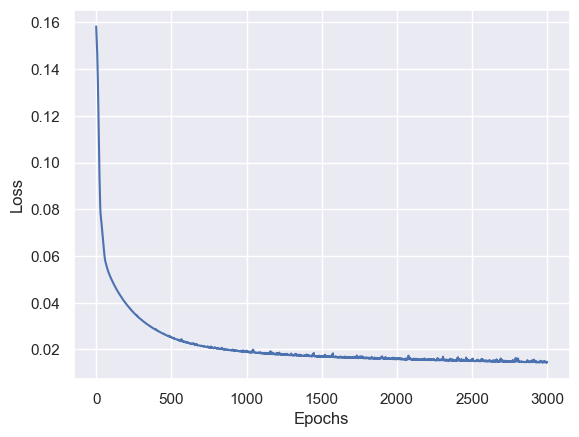

In [32]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

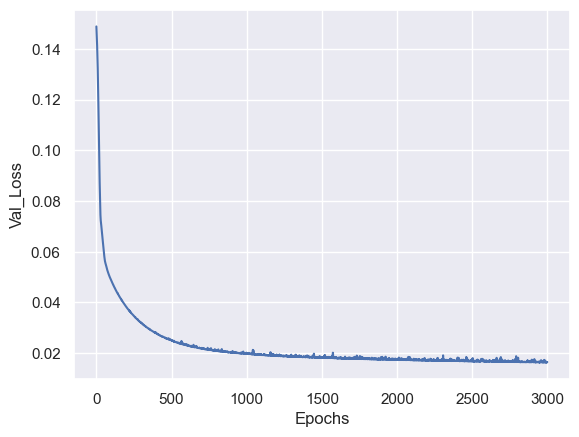

In [33]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [42]:
#modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\TEFF-Dwarfs.h5


In [35]:
predTeff = modelTEFF.predict(X_test)

42/42 [==============================] - 0s 6ms/step


In [36]:
predaux = encoder.decode_DataFrame(predTeff, 'teffMedium')
Y_test['TEFF_PredictDecoded'] = predaux

In [37]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n05s44_0022746    5969.45     4.408   -0.005       -0.005   
iDR4_3_STRIPE82-0026_0046410   5740.98     4.353   -0.084        0.003   
iDR4_3_STRIPE82-0024_0041378   5826.60     4.274   -0.199        0.025   
iDR4_3_STRIPE82-0028_0037378   5638.54     4.480   -0.015    -9999.000   
iDR4_3_SPLUS-n05s43_0026061    5734.69     4.386   -0.407        0.150   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5654.02     4.304   -0.145        0.119   
iDR4_3_SPLUS-n06s41_0038172    5520.94     4.040   -0.027        0.009   
iDR4_3_SPLUS-n05s43_0039108    5672.88     4.460   -0.424        0.083   
iDR4_3_SPLUS-n07s41_0027340    5437.77     4.479   -0.094        0.012   
iDR4_3_STRIPE82-0104_0037773   5990.54     4.228   -0.362    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n05s44_0022746      0.02068    -0.00463    -0.14314    -0.00135   
iDR4_3_STRIPE82-0026_0046410    -0.02099    -0.00631     0.03257     0.01964   
iDR4_3_STRIPE82-0024_0041378     0.02604     0.05242     0.05260     0.05211   
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n05s43_0026061      0.09236     0.13633     0.20307     0.23083   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06922     0.09751     0.16856     0.20524   
iDR4_3_SPLUS-n06s41_0038172      0.07142     0.00881     0.10894     0.03428   
iDR4_3_SPLUS-n05s43_0039108      0.09888     0.06333    -0.01452     0.14063   
iDR4_3_SPLUS-n07s41_0027340     -0.04901     0.01818    -0.02734     0.03363   
iDR4_3_STRIPE82-0104_0037773 -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n05s44_0022746     -0.00272    -0.01857     0.644667   
iDR4_3_STRIPE82-0026_0046410    -0.00231    -0.01724     0.365044   
iDR4_3_STRIPE82-0024_0041378     0.01274    -0.01553     0.469834   
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000     0.239669   
iDR4_3_SPLUS-n05s43_0026061      0.13193     0.04049     0.357346   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.12598     0.04160     0.258615   
iDR4_3_SPLUS-n06s41_0038172      0.00501     0.05196     0.095739   
iDR4_3_SPLUS-n05s43_0039108      0.10158     0.01561     0.281697   
iDR4_3_SPLUS-n07s41_0027340     -0.01231     0.02639    -0.006052   
iDR4_3_STRIPE82-0104_0037773 -9999.00000 -9999.00000     0.670479   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n05s44_0022746           5830.572754  
iDR4_3_STRIPE82-0026_0046410          5707.495605  
iDR4_3_STRIPE82-0024_0041378          5828.537109  
iDR4_3_STRIPE82-0028_0037378          5592.265625  
iDR4_3_SPLUS-n05s43_0026061           5646.103027  
...                                           ...  
iDR4_3_STRIPE82-0028_0033168          5562.366211  
iDR4_3_SPLUS-n06s41_0038172           5691.011230  
iDR4_3_SPLUS-n05s43_0039108           5640.886719  
iDR4_3_SPLUS-n07s41_0027340           5455.870117  
iDR4_3_STRIPE82-0104_0037773          6056.707520  

[1333 rows x 12 columns]

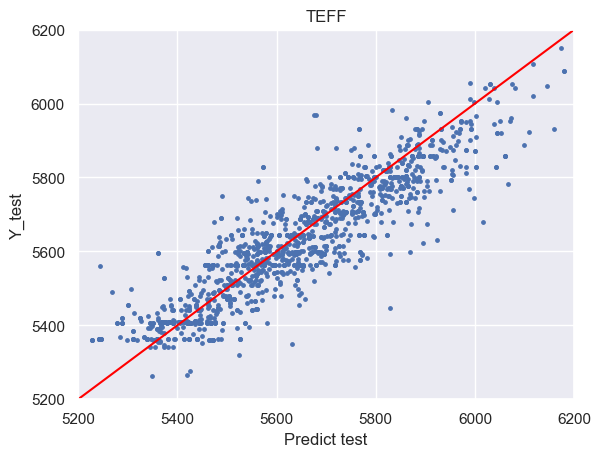

In [38]:
plt.scatter(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
plt.xlim(5200, 6200)
plt.ylim(5200, 6200)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([5000, 7000], [5000, 7000], c='red')

In [39]:
score = r2_score(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 81.0%


In [40]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n05s44_0022746    5969.45     4.408   -0.005       -0.005   
iDR4_3_STRIPE82-0026_0046410   5740.98     4.353   -0.084        0.003   
iDR4_3_STRIPE82-0024_0041378   5826.60     4.274   -0.199        0.025   
iDR4_3_STRIPE82-0028_0037378   5638.54     4.480   -0.015    -9999.000   
iDR4_3_SPLUS-n05s43_0026061    5734.69     4.386   -0.407        0.150   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5654.02     4.304   -0.145        0.119   
iDR4_3_SPLUS-n06s41_0038172    5520.94     4.040   -0.027        0.009   
iDR4_3_SPLUS-n05s43_0039108    5672.88     4.460   -0.424        0.083   
iDR4_3_SPLUS-n07s41_0027340    5437.77     4.479   -0.094        0.012   
iDR4_3_STRIPE82-0104_0037773   5990.54     4.228   -0.362    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n05s44_0022746      0.02068    -0.00463    -0.14314    -0.00135   
iDR4_3_STRIPE82-0026_0046410    -0.02099    -0.00631     0.03257     0.01964   
iDR4_3_STRIPE82-0024_0041378     0.02604     0.05242     0.05260     0.05211   
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n05s43_0026061      0.09236     0.13633     0.20307     0.23083   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06922     0.09751     0.16856     0.20524   
iDR4_3_SPLUS-n06s41_0038172      0.07142     0.00881     0.10894     0.03428   
iDR4_3_SPLUS-n05s43_0039108      0.09888     0.06333    -0.01452     0.14063   
iDR4_3_SPLUS-n07s41_0027340     -0.04901     0.01818    -0.02734     0.03363   
iDR4_3_STRIPE82-0104_0037773 -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n05s44_0022746     -0.00272    -0.01857     0.644667   
iDR4_3_STRIPE82-0026_0046410    -0.00231    -0.01724     0.365044   
iDR4_3_STRIPE82-0024_0041378     0.01274    -0.01553     0.469834   
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000     0.239669   
iDR4_3_SPLUS-n05s43_0026061      0.13193     0.04049     0.357346   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.12598     0.04160     0.258615   
iDR4_3_SPLUS-n06s41_0038172      0.00501     0.05196     0.095739   
iDR4_3_SPLUS-n05s43_0039108      0.10158     0.01561     0.281697   
iDR4_3_SPLUS-n07s41_0027340     -0.01231     0.02639    -0.006052   
iDR4_3_STRIPE82-0104_0037773 -9999.00000 -9999.00000     0.670479   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n05s44_0022746           5830.572754  
iDR4_3_STRIPE82-0026_0046410          5707.495605  
iDR4_3_STRIPE82-0024_0041378          5828.537109  
iDR4_3_STRIPE82-0028_0037378          5592.265625  
iDR4_3_SPLUS-n05s43_0026061           5646.103027  
...                                           ...  
iDR4_3_STRIPE82-0028_0033168          5562.366211  
iDR4_3_SPLUS-n06s41_0038172           5691.011230  
iDR4_3_SPLUS-n05s43_0039108           5640.886719  
iDR4_3_SPLUS-n07s41_0027340           5455.870117  
iDR4_3_STRIPE82-0104_0037773          6056.707520  

[1333 rows x 12 columns]

In [41]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [43]:
Parametro = "LOGG"
columnTrain = 'logg_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [44]:
modelLOGG = baseline_model_teste()

In [46]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 5000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/5000
2/2 - 1s - loss: 18.5578 - val_loss: 18.5889 - 875ms/epoch - 438ms/step
Epoch 2/5000
2/2 - 0s - loss: 18.5268 - val_loss: 18.5572 - 48ms/epoch - 24ms/step
Epoch 3/5000
2/2 - 0s - loss: 18.4954 - val_loss: 18.5239 - 47ms/epoch - 24ms/step
Epoch 4/5000
2/2 - 0s - loss: 18.4619 - val_loss: 18.4877 - 46ms/epoch - 23ms/step
Epoch 5/5000
2/2 - 0s - loss: 18.4254 - val_loss: 18.4473 - 44ms/epoch - 22ms/step
Epoch 6/5000
2/2 - 0s - loss: 18.3845 - val_loss: 18.4010 - 47ms/epoch - 24ms/step
Epoch 7/5000
2/2 - 0s - loss: 18.3374 - val_loss: 18.3475 - 44ms/epoch - 22ms/step
Epoch 8/5000
2/2 - 0s - loss: 18.2833 - val_loss: 18.2855 - 46ms/epoch - 23ms/step
Epoch 9/5000
2/2 - 0s - loss: 18.2204 - val_loss: 18.2131 - 46ms/epoch - 23ms/step
Epoch 10/5000
2/2 - 0s - loss: 18.1469 - val_loss: 18.1280 - 47ms/epoch - 24ms/step
Epoch 11/5000
2/2 - 0s - loss: 18.0605 - val_loss: 18.0277 - 45ms/epoch - 23ms/step
Epoch 12/5000
2/2 - 0s - loss: 17.9589 - val_loss: 17.9093 - 47ms/epoch - 24ms/step

Epoch 101/5000
2/2 - 0s - loss: 0.3653 - val_loss: 0.3636 - 51ms/epoch - 26ms/step
Epoch 102/5000
2/2 - 0s - loss: 0.3603 - val_loss: 0.3591 - 51ms/epoch - 25ms/step
Epoch 103/5000
2/2 - 0s - loss: 0.3553 - val_loss: 0.3546 - 56ms/epoch - 28ms/step
Epoch 104/5000
2/2 - 0s - loss: 0.3502 - val_loss: 0.3501 - 52ms/epoch - 26ms/step
Epoch 105/5000
2/2 - 0s - loss: 0.3450 - val_loss: 0.3455 - 53ms/epoch - 27ms/step
Epoch 106/5000
2/2 - 0s - loss: 0.3399 - val_loss: 0.3409 - 51ms/epoch - 26ms/step
Epoch 107/5000
2/2 - 0s - loss: 0.3346 - val_loss: 0.3362 - 50ms/epoch - 25ms/step
Epoch 108/5000
2/2 - 0s - loss: 0.3295 - val_loss: 0.3315 - 52ms/epoch - 26ms/step
Epoch 109/5000
2/2 - 0s - loss: 0.3243 - val_loss: 0.3267 - 56ms/epoch - 28ms/step
Epoch 110/5000
2/2 - 0s - loss: 0.3191 - val_loss: 0.3220 - 54ms/epoch - 27ms/step
Epoch 111/5000
2/2 - 0s - loss: 0.3139 - val_loss: 0.3173 - 53ms/epoch - 27ms/step
Epoch 112/5000
2/2 - 0s - loss: 0.3088 - val_loss: 0.3125 - 51ms/epoch - 26ms/step
Epoc

Epoch 200/5000
2/2 - 0s - loss: 0.0966 - val_loss: 0.0876 - 52ms/epoch - 26ms/step
Epoch 201/5000
2/2 - 0s - loss: 0.0959 - val_loss: 0.0869 - 49ms/epoch - 25ms/step
Epoch 202/5000
2/2 - 0s - loss: 0.0953 - val_loss: 0.0863 - 52ms/epoch - 26ms/step
Epoch 203/5000
2/2 - 0s - loss: 0.0947 - val_loss: 0.0857 - 52ms/epoch - 26ms/step
Epoch 204/5000
2/2 - 0s - loss: 0.0941 - val_loss: 0.0851 - 51ms/epoch - 25ms/step
Epoch 205/5000
2/2 - 0s - loss: 0.0935 - val_loss: 0.0845 - 50ms/epoch - 25ms/step
Epoch 206/5000
2/2 - 0s - loss: 0.0929 - val_loss: 0.0839 - 54ms/epoch - 27ms/step
Epoch 207/5000
2/2 - 0s - loss: 0.0923 - val_loss: 0.0833 - 53ms/epoch - 27ms/step
Epoch 208/5000
2/2 - 0s - loss: 0.0917 - val_loss: 0.0827 - 52ms/epoch - 26ms/step
Epoch 209/5000
2/2 - 0s - loss: 0.0912 - val_loss: 0.0821 - 55ms/epoch - 28ms/step
Epoch 210/5000
2/2 - 0s - loss: 0.0906 - val_loss: 0.0817 - 48ms/epoch - 24ms/step
Epoch 211/5000
2/2 - 0s - loss: 0.0900 - val_loss: 0.0811 - 52ms/epoch - 26ms/step
Epoc

Epoch 299/5000
2/2 - 0s - loss: 0.0628 - val_loss: 0.0582 - 53ms/epoch - 27ms/step
Epoch 300/5000
2/2 - 0s - loss: 0.0627 - val_loss: 0.0581 - 54ms/epoch - 27ms/step
Epoch 301/5000
2/2 - 0s - loss: 0.0625 - val_loss: 0.0580 - 55ms/epoch - 28ms/step
Epoch 302/5000
2/2 - 0s - loss: 0.0623 - val_loss: 0.0579 - 58ms/epoch - 29ms/step
Epoch 303/5000
2/2 - 0s - loss: 0.0622 - val_loss: 0.0578 - 59ms/epoch - 29ms/step
Epoch 304/5000
2/2 - 0s - loss: 0.0621 - val_loss: 0.0576 - 53ms/epoch - 27ms/step
Epoch 305/5000
2/2 - 0s - loss: 0.0619 - val_loss: 0.0576 - 60ms/epoch - 30ms/step
Epoch 306/5000
2/2 - 0s - loss: 0.0618 - val_loss: 0.0574 - 59ms/epoch - 29ms/step
Epoch 307/5000
2/2 - 0s - loss: 0.0616 - val_loss: 0.0573 - 55ms/epoch - 28ms/step
Epoch 308/5000
2/2 - 0s - loss: 0.0615 - val_loss: 0.0573 - 56ms/epoch - 28ms/step
Epoch 309/5000
2/2 - 0s - loss: 0.0614 - val_loss: 0.0571 - 59ms/epoch - 30ms/step
Epoch 310/5000
2/2 - 0s - loss: 0.0612 - val_loss: 0.0570 - 54ms/epoch - 27ms/step
Epoc

Epoch 398/5000
2/2 - 0s - loss: 0.0542 - val_loss: 0.0513 - 45ms/epoch - 23ms/step
Epoch 399/5000
2/2 - 0s - loss: 0.0542 - val_loss: 0.0513 - 43ms/epoch - 22ms/step
Epoch 400/5000
2/2 - 0s - loss: 0.0541 - val_loss: 0.0513 - 44ms/epoch - 22ms/step
Epoch 401/5000
2/2 - 0s - loss: 0.0541 - val_loss: 0.0512 - 44ms/epoch - 22ms/step
Epoch 402/5000
2/2 - 0s - loss: 0.0540 - val_loss: 0.0512 - 42ms/epoch - 21ms/step
Epoch 403/5000
2/2 - 0s - loss: 0.0540 - val_loss: 0.0511 - 42ms/epoch - 21ms/step
Epoch 404/5000
2/2 - 0s - loss: 0.0539 - val_loss: 0.0511 - 43ms/epoch - 22ms/step
Epoch 405/5000
2/2 - 0s - loss: 0.0539 - val_loss: 0.0510 - 43ms/epoch - 22ms/step
Epoch 406/5000
2/2 - 0s - loss: 0.0538 - val_loss: 0.0510 - 44ms/epoch - 22ms/step
Epoch 407/5000
2/2 - 0s - loss: 0.0538 - val_loss: 0.0510 - 46ms/epoch - 23ms/step
Epoch 408/5000
2/2 - 0s - loss: 0.0537 - val_loss: 0.0509 - 47ms/epoch - 24ms/step
Epoch 409/5000
2/2 - 0s - loss: 0.0537 - val_loss: 0.0509 - 46ms/epoch - 23ms/step
Epoc

Epoch 497/5000
2/2 - 0s - loss: 0.0505 - val_loss: 0.0480 - 51ms/epoch - 26ms/step
Epoch 498/5000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0480 - 52ms/epoch - 26ms/step
Epoch 499/5000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0479 - 53ms/epoch - 27ms/step
Epoch 500/5000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0479 - 52ms/epoch - 26ms/step
Epoch 501/5000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0479 - 54ms/epoch - 27ms/step
Epoch 502/5000
2/2 - 0s - loss: 0.0503 - val_loss: 0.0478 - 53ms/epoch - 27ms/step
Epoch 503/5000
2/2 - 0s - loss: 0.0503 - val_loss: 0.0478 - 52ms/epoch - 26ms/step
Epoch 504/5000
2/2 - 0s - loss: 0.0503 - val_loss: 0.0478 - 54ms/epoch - 27ms/step
Epoch 505/5000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0478 - 59ms/epoch - 30ms/step
Epoch 506/5000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0478 - 49ms/epoch - 25ms/step
Epoch 507/5000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0477 - 49ms/epoch - 25ms/step
Epoch 508/5000
2/2 - 0s - loss: 0.0501 - val_loss: 0.0477 - 52ms/epoch - 26ms/step
Epoc

Epoch 596/5000
2/2 - 0s - loss: 0.0479 - val_loss: 0.0457 - 51ms/epoch - 26ms/step
Epoch 597/5000
2/2 - 0s - loss: 0.0479 - val_loss: 0.0457 - 61ms/epoch - 31ms/step
Epoch 598/5000
2/2 - 0s - loss: 0.0479 - val_loss: 0.0457 - 73ms/epoch - 37ms/step
Epoch 599/5000
2/2 - 0s - loss: 0.0478 - val_loss: 0.0456 - 68ms/epoch - 34ms/step
Epoch 600/5000
2/2 - 0s - loss: 0.0478 - val_loss: 0.0456 - 71ms/epoch - 36ms/step
Epoch 601/5000
2/2 - 0s - loss: 0.0478 - val_loss: 0.0456 - 64ms/epoch - 32ms/step
Epoch 602/5000
2/2 - 0s - loss: 0.0478 - val_loss: 0.0456 - 74ms/epoch - 37ms/step
Epoch 603/5000
2/2 - 0s - loss: 0.0478 - val_loss: 0.0456 - 69ms/epoch - 35ms/step
Epoch 604/5000
2/2 - 0s - loss: 0.0478 - val_loss: 0.0455 - 69ms/epoch - 35ms/step
Epoch 605/5000
2/2 - 0s - loss: 0.0477 - val_loss: 0.0455 - 71ms/epoch - 36ms/step
Epoch 606/5000
2/2 - 0s - loss: 0.0477 - val_loss: 0.0456 - 67ms/epoch - 34ms/step
Epoch 607/5000
2/2 - 0s - loss: 0.0477 - val_loss: 0.0455 - 74ms/epoch - 37ms/step
Epoc

Epoch 695/5000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0438 - 51ms/epoch - 26ms/step
Epoch 696/5000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0438 - 53ms/epoch - 27ms/step
Epoch 697/5000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0438 - 49ms/epoch - 25ms/step
Epoch 698/5000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0437 - 53ms/epoch - 26ms/step
Epoch 699/5000
2/2 - 0s - loss: 0.0457 - val_loss: 0.0437 - 54ms/epoch - 27ms/step
Epoch 700/5000
2/2 - 0s - loss: 0.0457 - val_loss: 0.0437 - 55ms/epoch - 27ms/step
Epoch 701/5000
2/2 - 0s - loss: 0.0457 - val_loss: 0.0437 - 50ms/epoch - 25ms/step
Epoch 702/5000
2/2 - 0s - loss: 0.0457 - val_loss: 0.0437 - 48ms/epoch - 24ms/step
Epoch 703/5000
2/2 - 0s - loss: 0.0457 - val_loss: 0.0437 - 49ms/epoch - 25ms/step
Epoch 704/5000
2/2 - 0s - loss: 0.0457 - val_loss: 0.0436 - 54ms/epoch - 27ms/step
Epoch 705/5000
2/2 - 0s - loss: 0.0456 - val_loss: 0.0436 - 52ms/epoch - 26ms/step
Epoch 706/5000
2/2 - 0s - loss: 0.0456 - val_loss: 0.0436 - 54ms/epoch - 27ms/step
Epoc

Epoch 794/5000
2/2 - 0s - loss: 0.0440 - val_loss: 0.0422 - 53ms/epoch - 27ms/step
Epoch 795/5000
2/2 - 0s - loss: 0.0440 - val_loss: 0.0422 - 58ms/epoch - 29ms/step
Epoch 796/5000
2/2 - 0s - loss: 0.0440 - val_loss: 0.0422 - 51ms/epoch - 26ms/step
Epoch 797/5000
2/2 - 0s - loss: 0.0440 - val_loss: 0.0421 - 51ms/epoch - 26ms/step
Epoch 798/5000
2/2 - 0s - loss: 0.0440 - val_loss: 0.0421 - 51ms/epoch - 26ms/step
Epoch 799/5000
2/2 - 0s - loss: 0.0440 - val_loss: 0.0421 - 57ms/epoch - 29ms/step
Epoch 800/5000
2/2 - 0s - loss: 0.0439 - val_loss: 0.0421 - 53ms/epoch - 27ms/step
Epoch 801/5000
2/2 - 0s - loss: 0.0439 - val_loss: 0.0421 - 53ms/epoch - 27ms/step
Epoch 802/5000
2/2 - 0s - loss: 0.0439 - val_loss: 0.0421 - 54ms/epoch - 27ms/step
Epoch 803/5000
2/2 - 0s - loss: 0.0439 - val_loss: 0.0421 - 51ms/epoch - 26ms/step
Epoch 804/5000
2/2 - 0s - loss: 0.0439 - val_loss: 0.0420 - 52ms/epoch - 26ms/step
Epoch 805/5000
2/2 - 0s - loss: 0.0439 - val_loss: 0.0420 - 48ms/epoch - 24ms/step
Epoc

Epoch 893/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0409 - 63ms/epoch - 32ms/step
Epoch 894/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0408 - 55ms/epoch - 28ms/step
Epoch 895/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0408 - 54ms/epoch - 27ms/step
Epoch 896/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0408 - 50ms/epoch - 25ms/step
Epoch 897/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0408 - 58ms/epoch - 29ms/step
Epoch 898/5000
2/2 - 0s - loss: 0.0426 - val_loss: 0.0408 - 52ms/epoch - 26ms/step
Epoch 899/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0408 - 52ms/epoch - 26ms/step
Epoch 900/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0408 - 54ms/epoch - 27ms/step
Epoch 901/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0407 - 53ms/epoch - 27ms/step
Epoch 902/5000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0408 - 49ms/epoch - 25ms/step
Epoch 903/5000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0407 - 50ms/epoch - 25ms/step
Epoch 904/5000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0407 - 58ms/epoch - 29ms/step
Epoc

Epoch 992/5000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0396 - 53ms/epoch - 27ms/step
Epoch 993/5000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0396 - 53ms/epoch - 27ms/step
Epoch 994/5000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0395 - 60ms/epoch - 30ms/step
Epoch 995/5000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0395 - 52ms/epoch - 26ms/step
Epoch 996/5000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0395 - 54ms/epoch - 27ms/step
Epoch 997/5000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0395 - 54ms/epoch - 27ms/step
Epoch 998/5000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0395 - 56ms/epoch - 28ms/step
Epoch 999/5000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0395 - 55ms/epoch - 28ms/step
Epoch 1000/5000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0394 - 56ms/epoch - 28ms/step
Epoch 1001/5000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0394 - 48ms/epoch - 24ms/step
Epoch 1002/5000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0394 - 47ms/epoch - 24ms/step
Epoch 1003/5000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0395 - 45ms/epoch - 23ms/step


Epoch 1090/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0385 - 58ms/epoch - 29ms/step
Epoch 1091/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0385 - 51ms/epoch - 26ms/step
Epoch 1092/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0384 - 49ms/epoch - 25ms/step
Epoch 1093/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0384 - 55ms/epoch - 28ms/step
Epoch 1094/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0384 - 53ms/epoch - 26ms/step
Epoch 1095/5000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0385 - 104ms/epoch - 52ms/step
Epoch 1096/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0384 - 49ms/epoch - 25ms/step
Epoch 1097/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0385 - 70ms/epoch - 35ms/step
Epoch 1098/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0384 - 51ms/epoch - 26ms/step
Epoch 1099/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0384 - 69ms/epoch - 34ms/step
Epoch 1100/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0383 - 102ms/epoch - 51ms/step
Epoch 1101/5000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0383 - 55ms/epoch - 

Epoch 1188/5000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0374 - 42ms/epoch - 21ms/step
Epoch 1189/5000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0374 - 45ms/epoch - 23ms/step
Epoch 1190/5000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0374 - 44ms/epoch - 22ms/step
Epoch 1191/5000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0374 - 45ms/epoch - 23ms/step
Epoch 1192/5000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0374 - 44ms/epoch - 22ms/step
Epoch 1193/5000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0375 - 46ms/epoch - 23ms/step
Epoch 1194/5000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0374 - 44ms/epoch - 22ms/step
Epoch 1195/5000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0374 - 44ms/epoch - 22ms/step
Epoch 1196/5000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0374 - 44ms/epoch - 22ms/step
Epoch 1197/5000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0373 - 42ms/epoch - 21ms/step
Epoch 1198/5000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0374 - 43ms/epoch - 21ms/step
Epoch 1199/5000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0373 - 44ms/epoch - 22

Epoch 1286/5000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0366 - 53ms/epoch - 27ms/step
Epoch 1287/5000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0366 - 53ms/epoch - 26ms/step
Epoch 1288/5000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0366 - 58ms/epoch - 29ms/step
Epoch 1289/5000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0366 - 55ms/epoch - 28ms/step
Epoch 1290/5000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0365 - 51ms/epoch - 26ms/step
Epoch 1291/5000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0365 - 54ms/epoch - 27ms/step
Epoch 1292/5000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0365 - 58ms/epoch - 29ms/step
Epoch 1293/5000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0365 - 60ms/epoch - 30ms/step
Epoch 1294/5000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0365 - 57ms/epoch - 29ms/step
Epoch 1295/5000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0365 - 53ms/epoch - 26ms/step
Epoch 1296/5000
2/2 - 0s - loss: 0.0378 - val_loss: 0.0365 - 52ms/epoch - 26ms/step
Epoch 1297/5000
2/2 - 0s - loss: 0.0378 - val_loss: 0.0365 - 53ms/epoch - 27

Epoch 1384/5000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0357 - 51ms/epoch - 26ms/step
Epoch 1385/5000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0357 - 49ms/epoch - 25ms/step
Epoch 1386/5000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0357 - 51ms/epoch - 26ms/step
Epoch 1387/5000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0357 - 49ms/epoch - 25ms/step
Epoch 1388/5000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0357 - 53ms/epoch - 27ms/step
Epoch 1389/5000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0357 - 57ms/epoch - 29ms/step
Epoch 1390/5000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0358 - 49ms/epoch - 25ms/step
Epoch 1391/5000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0357 - 50ms/epoch - 25ms/step
Epoch 1392/5000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0357 - 51ms/epoch - 25ms/step
Epoch 1393/5000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0357 - 48ms/epoch - 24ms/step
Epoch 1394/5000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0357 - 51ms/epoch - 26ms/step
Epoch 1395/5000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0357 - 53ms/epoch - 27

Epoch 1482/5000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0350 - 50ms/epoch - 25ms/step
Epoch 1483/5000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0350 - 50ms/epoch - 25ms/step
Epoch 1484/5000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0350 - 53ms/epoch - 27ms/step
Epoch 1485/5000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0350 - 49ms/epoch - 25ms/step
Epoch 1486/5000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0350 - 52ms/epoch - 26ms/step
Epoch 1487/5000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0350 - 48ms/epoch - 24ms/step
Epoch 1488/5000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0350 - 52ms/epoch - 26ms/step
Epoch 1489/5000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0350 - 50ms/epoch - 25ms/step
Epoch 1490/5000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0350 - 52ms/epoch - 26ms/step
Epoch 1491/5000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0350 - 52ms/epoch - 26ms/step
Epoch 1492/5000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0349 - 57ms/epoch - 28ms/step
Epoch 1493/5000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0351 - 50ms/epoch - 25

Epoch 1580/5000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0343 - 43ms/epoch - 22ms/step
Epoch 1581/5000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0344 - 42ms/epoch - 21ms/step
Epoch 1582/5000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0344 - 43ms/epoch - 21ms/step
Epoch 1583/5000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0344 - 46ms/epoch - 23ms/step
Epoch 1584/5000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0343 - 45ms/epoch - 23ms/step
Epoch 1585/5000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0343 - 43ms/epoch - 22ms/step
Epoch 1586/5000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0343 - 44ms/epoch - 22ms/step
Epoch 1587/5000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0343 - 43ms/epoch - 22ms/step
Epoch 1588/5000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0343 - 43ms/epoch - 22ms/step
Epoch 1589/5000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0344 - 47ms/epoch - 24ms/step
Epoch 1590/5000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0343 - 44ms/epoch - 22ms/step
Epoch 1591/5000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0343 - 43ms/epoch - 22

Epoch 1678/5000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0337 - 53ms/epoch - 27ms/step
Epoch 1679/5000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0338 - 56ms/epoch - 28ms/step
Epoch 1680/5000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0337 - 56ms/epoch - 28ms/step
Epoch 1681/5000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0337 - 57ms/epoch - 29ms/step
Epoch 1682/5000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0337 - 42ms/epoch - 21ms/step
Epoch 1683/5000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0336 - 45ms/epoch - 23ms/step
Epoch 1684/5000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0337 - 43ms/epoch - 22ms/step
Epoch 1685/5000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0337 - 44ms/epoch - 22ms/step
Epoch 1686/5000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0336 - 47ms/epoch - 24ms/step
Epoch 1687/5000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0336 - 46ms/epoch - 23ms/step
Epoch 1688/5000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0336 - 45ms/epoch - 23ms/step
Epoch 1689/5000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0336 - 44ms/epoch - 22

Epoch 1776/5000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0332 - 52ms/epoch - 26ms/step
Epoch 1777/5000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0331 - 53ms/epoch - 26ms/step
Epoch 1778/5000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0333 - 49ms/epoch - 25ms/step
Epoch 1779/5000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0332 - 55ms/epoch - 28ms/step
Epoch 1780/5000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0333 - 54ms/epoch - 27ms/step
Epoch 1781/5000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0332 - 55ms/epoch - 28ms/step
Epoch 1782/5000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0332 - 58ms/epoch - 29ms/step
Epoch 1783/5000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0331 - 53ms/epoch - 27ms/step
Epoch 1784/5000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0331 - 55ms/epoch - 27ms/step
Epoch 1785/5000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0330 - 55ms/epoch - 28ms/step
Epoch 1786/5000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0331 - 50ms/epoch - 25ms/step
Epoch 1787/5000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0330 - 54ms/epoch - 27

Epoch 1874/5000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0326 - 50ms/epoch - 25ms/step
Epoch 1875/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0325 - 55ms/epoch - 28ms/step
Epoch 1876/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0325 - 57ms/epoch - 29ms/step
Epoch 1877/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0325 - 55ms/epoch - 28ms/step
Epoch 1878/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0325 - 54ms/epoch - 27ms/step
Epoch 1879/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0325 - 51ms/epoch - 25ms/step
Epoch 1880/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0326 - 56ms/epoch - 28ms/step
Epoch 1881/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0326 - 56ms/epoch - 28ms/step
Epoch 1882/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0326 - 50ms/epoch - 25ms/step
Epoch 1883/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0325 - 55ms/epoch - 27ms/step
Epoch 1884/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0325 - 52ms/epoch - 26ms/step
Epoch 1885/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0325 - 52ms/epoch - 26

Epoch 1972/5000
2/2 - 0s - loss: 0.0333 - val_loss: 0.0321 - 52ms/epoch - 26ms/step
Epoch 1973/5000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0320 - 57ms/epoch - 28ms/step
Epoch 1974/5000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0320 - 49ms/epoch - 25ms/step
Epoch 1975/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0320 - 59ms/epoch - 29ms/step
Epoch 1976/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0320 - 53ms/epoch - 27ms/step
Epoch 1977/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0320 - 53ms/epoch - 27ms/step
Epoch 1978/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0320 - 63ms/epoch - 32ms/step
Epoch 1979/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0320 - 54ms/epoch - 27ms/step
Epoch 1980/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0320 - 52ms/epoch - 26ms/step
Epoch 1981/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0319 - 48ms/epoch - 24ms/step
Epoch 1982/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0320 - 53ms/epoch - 27ms/step
Epoch 1983/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0320 - 58ms/epoch - 29

Epoch 2070/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0315 - 54ms/epoch - 27ms/step
Epoch 2071/5000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0316 - 58ms/epoch - 29ms/step
Epoch 2072/5000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0314 - 55ms/epoch - 28ms/step
Epoch 2073/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0314 - 54ms/epoch - 27ms/step
Epoch 2074/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0314 - 56ms/epoch - 28ms/step
Epoch 2075/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0314 - 53ms/epoch - 27ms/step
Epoch 2076/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0314 - 59ms/epoch - 30ms/step
Epoch 2077/5000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0314 - 59ms/epoch - 30ms/step
Epoch 2078/5000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0314 - 56ms/epoch - 28ms/step
Epoch 2079/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0314 - 56ms/epoch - 28ms/step
Epoch 2080/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0315 - 52ms/epoch - 26ms/step
Epoch 2081/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0314 - 48ms/epoch - 24

Epoch 2168/5000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0309 - 61ms/epoch - 30ms/step
Epoch 2169/5000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0309 - 50ms/epoch - 25ms/step
Epoch 2170/5000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0309 - 72ms/epoch - 36ms/step
Epoch 2171/5000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0310 - 99ms/epoch - 50ms/step
Epoch 2172/5000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0309 - 48ms/epoch - 24ms/step
Epoch 2173/5000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0310 - 70ms/epoch - 35ms/step
Epoch 2174/5000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0309 - 52ms/epoch - 26ms/step
Epoch 2175/5000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0310 - 70ms/epoch - 35ms/step
Epoch 2176/5000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0309 - 51ms/epoch - 26ms/step
Epoch 2177/5000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0309 - 68ms/epoch - 34ms/step
Epoch 2178/5000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0308 - 49ms/epoch - 25ms/step
Epoch 2179/5000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0309 - 70ms/epoch - 35

Epoch 2266/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0304 - 54ms/epoch - 27ms/step
Epoch 2267/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0304 - 55ms/epoch - 28ms/step
Epoch 2268/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0304 - 57ms/epoch - 28ms/step
Epoch 2269/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0304 - 53ms/epoch - 27ms/step
Epoch 2270/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0304 - 58ms/epoch - 29ms/step
Epoch 2271/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0304 - 54ms/epoch - 27ms/step
Epoch 2272/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0304 - 56ms/epoch - 28ms/step
Epoch 2273/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0304 - 54ms/epoch - 27ms/step
Epoch 2274/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0306 - 58ms/epoch - 29ms/step
Epoch 2275/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0304 - 70ms/epoch - 35ms/step
Epoch 2276/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0304 - 60ms/epoch - 30ms/step
Epoch 2277/5000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0306 - 56ms/epoch - 28

Epoch 2364/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0299 - 45ms/epoch - 23ms/step
Epoch 2365/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0299 - 45ms/epoch - 23ms/step
Epoch 2366/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0299 - 49ms/epoch - 25ms/step
Epoch 2367/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0299 - 52ms/epoch - 26ms/step
Epoch 2368/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0299 - 51ms/epoch - 26ms/step
Epoch 2369/5000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0299 - 51ms/epoch - 26ms/step
Epoch 2370/5000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0299 - 47ms/epoch - 24ms/step
Epoch 2371/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0299 - 48ms/epoch - 24ms/step
Epoch 2372/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0299 - 47ms/epoch - 24ms/step
Epoch 2373/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0299 - 51ms/epoch - 26ms/step
Epoch 2374/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0300 - 47ms/epoch - 24ms/step
Epoch 2375/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0298 - 50ms/epoch - 25

Epoch 2462/5000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0295 - 44ms/epoch - 22ms/step
Epoch 2463/5000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0298 - 46ms/epoch - 23ms/step
Epoch 2464/5000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0298 - 48ms/epoch - 24ms/step
Epoch 2465/5000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0300 - 47ms/epoch - 24ms/step
Epoch 2466/5000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0298 - 45ms/epoch - 23ms/step
Epoch 2467/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0295 - 46ms/epoch - 23ms/step
Epoch 2468/5000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0294 - 44ms/epoch - 22ms/step
Epoch 2469/5000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0295 - 53ms/epoch - 27ms/step
Epoch 2470/5000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0296 - 62ms/epoch - 31ms/step
Epoch 2471/5000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0294 - 58ms/epoch - 29ms/step
Epoch 2472/5000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0294 - 58ms/epoch - 29ms/step
Epoch 2473/5000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0294 - 47ms/epoch - 24

Epoch 2560/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0291 - 43ms/epoch - 22ms/step
Epoch 2561/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0290 - 44ms/epoch - 22ms/step
Epoch 2562/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0292 - 44ms/epoch - 22ms/step
Epoch 2563/5000
2/2 - 0s - loss: 0.0300 - val_loss: 0.0289 - 47ms/epoch - 24ms/step
Epoch 2564/5000
2/2 - 0s - loss: 0.0300 - val_loss: 0.0289 - 44ms/epoch - 22ms/step
Epoch 2565/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0289 - 42ms/epoch - 21ms/step
Epoch 2566/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0290 - 45ms/epoch - 23ms/step
Epoch 2567/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0289 - 44ms/epoch - 22ms/step
Epoch 2568/5000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0289 - 46ms/epoch - 23ms/step
Epoch 2569/5000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0290 - 43ms/epoch - 22ms/step
Epoch 2570/5000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0289 - 45ms/epoch - 23ms/step
Epoch 2571/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0289 - 47ms/epoch - 24

Epoch 2658/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0285 - 54ms/epoch - 27ms/step
Epoch 2659/5000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0285 - 49ms/epoch - 25ms/step
Epoch 2660/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0285 - 57ms/epoch - 28ms/step
Epoch 2661/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0285 - 62ms/epoch - 31ms/step
Epoch 2662/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0285 - 58ms/epoch - 29ms/step
Epoch 2663/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0284 - 61ms/epoch - 31ms/step
Epoch 2664/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0285 - 51ms/epoch - 25ms/step
Epoch 2665/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0285 - 51ms/epoch - 26ms/step
Epoch 2666/5000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0287 - 51ms/epoch - 26ms/step
Epoch 2667/5000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0284 - 51ms/epoch - 26ms/step
Epoch 2668/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0287 - 52ms/epoch - 26ms/step
Epoch 2669/5000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0285 - 54ms/epoch - 27

Epoch 2756/5000
2/2 - 0s - loss: 0.0291 - val_loss: 0.0283 - 44ms/epoch - 22ms/step
Epoch 2757/5000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0280 - 46ms/epoch - 23ms/step
Epoch 2758/5000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0281 - 49ms/epoch - 25ms/step
Epoch 2759/5000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0281 - 54ms/epoch - 27ms/step
Epoch 2760/5000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0280 - 52ms/epoch - 26ms/step
Epoch 2761/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0280 - 49ms/epoch - 25ms/step
Epoch 2762/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0281 - 50ms/epoch - 25ms/step
Epoch 2763/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0280 - 49ms/epoch - 24ms/step
Epoch 2764/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0281 - 50ms/epoch - 25ms/step
Epoch 2765/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0281 - 54ms/epoch - 27ms/step
Epoch 2766/5000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0280 - 50ms/epoch - 25ms/step
Epoch 2767/5000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0280 - 49ms/epoch - 24

Epoch 2854/5000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0276 - 58ms/epoch - 29ms/step
Epoch 2855/5000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0275 - 63ms/epoch - 31ms/step
Epoch 2856/5000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0278 - 57ms/epoch - 28ms/step
Epoch 2857/5000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0278 - 56ms/epoch - 28ms/step
Epoch 2858/5000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0277 - 75ms/epoch - 38ms/step
Epoch 2859/5000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0275 - 71ms/epoch - 36ms/step
Epoch 2860/5000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0275 - 77ms/epoch - 38ms/step
Epoch 2861/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0275 - 73ms/epoch - 37ms/step
Epoch 2862/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0275 - 57ms/epoch - 29ms/step
Epoch 2863/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0275 - 59ms/epoch - 29ms/step
Epoch 2864/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0275 - 64ms/epoch - 32ms/step
Epoch 2865/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0276 - 63ms/epoch - 32

Epoch 2952/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0273 - 48ms/epoch - 24ms/step
Epoch 2953/5000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0271 - 53ms/epoch - 27ms/step
Epoch 2954/5000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0272 - 58ms/epoch - 29ms/step
Epoch 2955/5000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0274 - 52ms/epoch - 26ms/step
Epoch 2956/5000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0272 - 53ms/epoch - 27ms/step
Epoch 2957/5000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0271 - 54ms/epoch - 27ms/step
Epoch 2958/5000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0271 - 58ms/epoch - 29ms/step
Epoch 2959/5000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0271 - 55ms/epoch - 28ms/step
Epoch 2960/5000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0272 - 52ms/epoch - 26ms/step
Epoch 2961/5000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0271 - 51ms/epoch - 26ms/step
Epoch 2962/5000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0277 - 52ms/epoch - 26ms/step
Epoch 2963/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0278 - 49ms/epoch - 25

Epoch 3050/5000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0275 - 52ms/epoch - 26ms/step
Epoch 3051/5000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0269 - 54ms/epoch - 27ms/step
Epoch 3052/5000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0269 - 60ms/epoch - 30ms/step
Epoch 3053/5000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0268 - 50ms/epoch - 25ms/step
Epoch 3054/5000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0276 - 56ms/epoch - 28ms/step
Epoch 3055/5000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0268 - 50ms/epoch - 25ms/step
Epoch 3056/5000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0268 - 52ms/epoch - 26ms/step
Epoch 3057/5000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0268 - 52ms/epoch - 26ms/step
Epoch 3058/5000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0269 - 49ms/epoch - 25ms/step
Epoch 3059/5000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0269 - 58ms/epoch - 29ms/step
Epoch 3060/5000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0270 - 59ms/epoch - 30ms/step
Epoch 3061/5000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0267 - 58ms/epoch - 29

Epoch 3148/5000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0264 - 47ms/epoch - 24ms/step
Epoch 3149/5000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0263 - 54ms/epoch - 27ms/step
Epoch 3150/5000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0263 - 52ms/epoch - 26ms/step
Epoch 3151/5000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0263 - 52ms/epoch - 26ms/step
Epoch 3152/5000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0263 - 54ms/epoch - 27ms/step
Epoch 3153/5000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0263 - 56ms/epoch - 28ms/step
Epoch 3154/5000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0263 - 50ms/epoch - 25ms/step
Epoch 3155/5000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0263 - 54ms/epoch - 27ms/step
Epoch 3156/5000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0263 - 57ms/epoch - 28ms/step
Epoch 3157/5000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0263 - 53ms/epoch - 27ms/step
Epoch 3158/5000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0263 - 53ms/epoch - 27ms/step
Epoch 3159/5000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0263 - 57ms/epoch - 28

Epoch 3246/5000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0263 - 57ms/epoch - 29ms/step
Epoch 3247/5000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0260 - 63ms/epoch - 32ms/step
Epoch 3248/5000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0261 - 61ms/epoch - 31ms/step
Epoch 3249/5000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0265 - 59ms/epoch - 29ms/step
Epoch 3250/5000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0260 - 56ms/epoch - 28ms/step
Epoch 3251/5000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0259 - 56ms/epoch - 28ms/step
Epoch 3252/5000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0260 - 52ms/epoch - 26ms/step
Epoch 3253/5000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0259 - 53ms/epoch - 27ms/step
Epoch 3254/5000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0261 - 54ms/epoch - 27ms/step
Epoch 3255/5000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0259 - 55ms/epoch - 27ms/step
Epoch 3256/5000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0259 - 55ms/epoch - 27ms/step
Epoch 3257/5000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0259 - 54ms/epoch - 27

Epoch 3344/5000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0259 - 58ms/epoch - 29ms/step
Epoch 3345/5000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0255 - 53ms/epoch - 27ms/step
Epoch 3346/5000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0255 - 53ms/epoch - 27ms/step
Epoch 3347/5000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0257 - 50ms/epoch - 25ms/step
Epoch 3348/5000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0255 - 52ms/epoch - 26ms/step
Epoch 3349/5000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0255 - 55ms/epoch - 28ms/step
Epoch 3350/5000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0258 - 62ms/epoch - 31ms/step
Epoch 3351/5000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0255 - 52ms/epoch - 26ms/step
Epoch 3352/5000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0256 - 52ms/epoch - 26ms/step
Epoch 3353/5000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0257 - 52ms/epoch - 26ms/step
Epoch 3354/5000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0256 - 58ms/epoch - 29ms/step
Epoch 3355/5000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0257 - 58ms/epoch - 29

Epoch 3442/5000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0251 - 69ms/epoch - 34ms/step
Epoch 3443/5000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0252 - 54ms/epoch - 27ms/step
Epoch 3444/5000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0253 - 69ms/epoch - 35ms/step
Epoch 3445/5000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0252 - 58ms/epoch - 29ms/step
Epoch 3446/5000
2/2 - 0s - loss: 0.0261 - val_loss: 0.0252 - 53ms/epoch - 27ms/step
Epoch 3447/5000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0251 - 51ms/epoch - 26ms/step
Epoch 3448/5000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0251 - 56ms/epoch - 28ms/step
Epoch 3449/5000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0253 - 53ms/epoch - 27ms/step
Epoch 3450/5000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0251 - 61ms/epoch - 31ms/step
Epoch 3451/5000
2/2 - 0s - loss: 0.0261 - val_loss: 0.0251 - 58ms/epoch - 29ms/step
Epoch 3452/5000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0252 - 54ms/epoch - 27ms/step
Epoch 3453/5000
2/2 - 0s - loss: 0.0261 - val_loss: 0.0251 - 54ms/epoch - 27

Epoch 3540/5000
2/2 - 0s - loss: 0.0258 - val_loss: 0.0249 - 55ms/epoch - 28ms/step
Epoch 3541/5000
2/2 - 0s - loss: 0.0258 - val_loss: 0.0252 - 54ms/epoch - 27ms/step
Epoch 3542/5000
2/2 - 0s - loss: 0.0258 - val_loss: 0.0249 - 54ms/epoch - 27ms/step
Epoch 3543/5000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0248 - 62ms/epoch - 31ms/step
Epoch 3544/5000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0250 - 66ms/epoch - 33ms/step
Epoch 3545/5000
2/2 - 0s - loss: 0.0258 - val_loss: 0.0248 - 63ms/epoch - 31ms/step
Epoch 3546/5000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0251 - 52ms/epoch - 26ms/step
Epoch 3547/5000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0253 - 55ms/epoch - 28ms/step
Epoch 3548/5000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0248 - 53ms/epoch - 27ms/step
Epoch 3549/5000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0248 - 50ms/epoch - 25ms/step
Epoch 3550/5000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0249 - 58ms/epoch - 29ms/step
Epoch 3551/5000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0248 - 52ms/epoch - 26

Epoch 3638/5000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0247 - 50ms/epoch - 25ms/step
Epoch 3639/5000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0246 - 52ms/epoch - 26ms/step
Epoch 3640/5000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0245 - 55ms/epoch - 28ms/step
Epoch 3641/5000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0245 - 54ms/epoch - 27ms/step
Epoch 3642/5000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0245 - 51ms/epoch - 26ms/step
Epoch 3643/5000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0245 - 52ms/epoch - 26ms/step
Epoch 3644/5000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0245 - 55ms/epoch - 28ms/step
Epoch 3645/5000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0246 - 53ms/epoch - 27ms/step
Epoch 3646/5000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0246 - 104ms/epoch - 52ms/step
Epoch 3647/5000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0245 - 53ms/epoch - 27ms/step
Epoch 3648/5000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0244 - 78ms/epoch - 39ms/step
Epoch 3649/5000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0245 - 51ms/epoch - 2

Epoch 3736/5000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0241 - 52ms/epoch - 26ms/step
Epoch 3737/5000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0241 - 51ms/epoch - 26ms/step
Epoch 3738/5000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0241 - 50ms/epoch - 25ms/step
Epoch 3739/5000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0242 - 53ms/epoch - 27ms/step
Epoch 3740/5000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0241 - 52ms/epoch - 26ms/step
Epoch 3741/5000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0243 - 62ms/epoch - 31ms/step
Epoch 3742/5000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0241 - 56ms/epoch - 28ms/step
Epoch 3743/5000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0242 - 52ms/epoch - 26ms/step
Epoch 3744/5000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0242 - 63ms/epoch - 32ms/step
Epoch 3745/5000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0241 - 64ms/epoch - 32ms/step
Epoch 3746/5000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0241 - 58ms/epoch - 29ms/step
Epoch 3747/5000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0242 - 57ms/epoch - 29

Epoch 3834/5000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0238 - 55ms/epoch - 28ms/step
Epoch 3835/5000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0239 - 53ms/epoch - 27ms/step
Epoch 3836/5000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0239 - 53ms/epoch - 27ms/step
Epoch 3837/5000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0238 - 54ms/epoch - 27ms/step
Epoch 3838/5000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0241 - 56ms/epoch - 28ms/step
Epoch 3839/5000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0238 - 59ms/epoch - 30ms/step
Epoch 3840/5000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0239 - 51ms/epoch - 26ms/step
Epoch 3841/5000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0239 - 54ms/epoch - 27ms/step
Epoch 3842/5000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0238 - 57ms/epoch - 29ms/step
Epoch 3843/5000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0238 - 55ms/epoch - 28ms/step
Epoch 3844/5000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0239 - 50ms/epoch - 25ms/step
Epoch 3845/5000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0238 - 51ms/epoch - 26

Epoch 3932/5000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0236 - 58ms/epoch - 29ms/step
Epoch 3933/5000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0240 - 54ms/epoch - 27ms/step
Epoch 3934/5000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0238 - 59ms/epoch - 30ms/step
Epoch 3935/5000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0235 - 54ms/epoch - 27ms/step
Epoch 3936/5000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0236 - 56ms/epoch - 28ms/step
Epoch 3937/5000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0235 - 51ms/epoch - 26ms/step
Epoch 3938/5000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0237 - 57ms/epoch - 29ms/step
Epoch 3939/5000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0235 - 59ms/epoch - 30ms/step
Epoch 3940/5000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0236 - 48ms/epoch - 24ms/step
Epoch 3941/5000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0237 - 53ms/epoch - 26ms/step
Epoch 3942/5000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0236 - 56ms/epoch - 28ms/step
Epoch 3943/5000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0236 - 52ms/epoch - 26

Epoch 4030/5000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0235 - 53ms/epoch - 27ms/step
Epoch 4031/5000
2/2 - 0s - loss: 0.0242 - val_loss: 0.0232 - 52ms/epoch - 26ms/step
Epoch 4032/5000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0232 - 49ms/epoch - 25ms/step
Epoch 4033/5000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0238 - 57ms/epoch - 29ms/step
Epoch 4034/5000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0233 - 55ms/epoch - 28ms/step
Epoch 4035/5000
2/2 - 0s - loss: 0.0242 - val_loss: 0.0232 - 57ms/epoch - 29ms/step
Epoch 4036/5000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0236 - 55ms/epoch - 28ms/step
Epoch 4037/5000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0233 - 60ms/epoch - 30ms/step
Epoch 4038/5000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0235 - 53ms/epoch - 27ms/step
Epoch 4039/5000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0233 - 49ms/epoch - 25ms/step
Epoch 4040/5000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0232 - 54ms/epoch - 27ms/step
Epoch 4041/5000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0238 - 54ms/epoch - 27

Epoch 4128/5000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0230 - 50ms/epoch - 25ms/step
Epoch 4129/5000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0229 - 57ms/epoch - 28ms/step
Epoch 4130/5000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0230 - 59ms/epoch - 30ms/step
Epoch 4131/5000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0229 - 55ms/epoch - 28ms/step
Epoch 4132/5000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0230 - 57ms/epoch - 28ms/step
Epoch 4133/5000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0230 - 54ms/epoch - 27ms/step
Epoch 4134/5000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0229 - 52ms/epoch - 26ms/step
Epoch 4135/5000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0232 - 56ms/epoch - 28ms/step
Epoch 4136/5000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0231 - 51ms/epoch - 26ms/step
Epoch 4137/5000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0234 - 51ms/epoch - 26ms/step
Epoch 4138/5000
2/2 - 0s - loss: 0.0242 - val_loss: 0.0230 - 54ms/epoch - 27ms/step
Epoch 4139/5000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0229 - 52ms/epoch - 26

Epoch 4226/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0227 - 52ms/epoch - 26ms/step
Epoch 4227/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0228 - 48ms/epoch - 24ms/step
Epoch 4228/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0227 - 53ms/epoch - 27ms/step
Epoch 4229/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0228 - 54ms/epoch - 27ms/step
Epoch 4230/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0227 - 54ms/epoch - 27ms/step
Epoch 4231/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0227 - 53ms/epoch - 27ms/step
Epoch 4232/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0230 - 54ms/epoch - 27ms/step
Epoch 4233/5000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0226 - 55ms/epoch - 28ms/step
Epoch 4234/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0227 - 55ms/epoch - 28ms/step
Epoch 4235/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0229 - 55ms/epoch - 27ms/step
Epoch 4236/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0228 - 54ms/epoch - 27ms/step
Epoch 4237/5000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0227 - 53ms/epoch - 27

Epoch 4324/5000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0224 - 54ms/epoch - 27ms/step
Epoch 4325/5000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0224 - 56ms/epoch - 28ms/step
Epoch 4326/5000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0229 - 55ms/epoch - 28ms/step
Epoch 4327/5000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0224 - 54ms/epoch - 27ms/step
Epoch 4328/5000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0225 - 56ms/epoch - 28ms/step
Epoch 4329/5000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0227 - 53ms/epoch - 27ms/step
Epoch 4330/5000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0225 - 52ms/epoch - 26ms/step
Epoch 4331/5000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0225 - 56ms/epoch - 28ms/step
Epoch 4332/5000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0226 - 58ms/epoch - 29ms/step
Epoch 4333/5000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0225 - 54ms/epoch - 27ms/step
Epoch 4334/5000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0225 - 53ms/epoch - 27ms/step
Epoch 4335/5000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0224 - 50ms/epoch - 25

Epoch 4422/5000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0226 - 47ms/epoch - 24ms/step
Epoch 4423/5000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0222 - 51ms/epoch - 26ms/step
Epoch 4424/5000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0222 - 54ms/epoch - 27ms/step
Epoch 4425/5000
2/2 - 0s - loss: 0.0229 - val_loss: 0.0221 - 53ms/epoch - 27ms/step
Epoch 4426/5000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0222 - 61ms/epoch - 31ms/step
Epoch 4427/5000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0226 - 55ms/epoch - 27ms/step
Epoch 4428/5000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0223 - 62ms/epoch - 31ms/step
Epoch 4429/5000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0222 - 53ms/epoch - 27ms/step
Epoch 4430/5000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0222 - 51ms/epoch - 25ms/step
Epoch 4431/5000
2/2 - 0s - loss: 0.0229 - val_loss: 0.0221 - 49ms/epoch - 25ms/step
Epoch 4432/5000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0223 - 48ms/epoch - 24ms/step
Epoch 4433/5000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0221 - 53ms/epoch - 27

Epoch 4520/5000
2/2 - 0s - loss: 0.0229 - val_loss: 0.0219 - 54ms/epoch - 27ms/step
Epoch 4521/5000
2/2 - 0s - loss: 0.0227 - val_loss: 0.0222 - 61ms/epoch - 31ms/step
Epoch 4522/5000
2/2 - 0s - loss: 0.0228 - val_loss: 0.0219 - 58ms/epoch - 29ms/step
Epoch 4523/5000
2/2 - 0s - loss: 0.0227 - val_loss: 0.0219 - 56ms/epoch - 28ms/step
Epoch 4524/5000
2/2 - 0s - loss: 0.0227 - val_loss: 0.0219 - 51ms/epoch - 25ms/step
Epoch 4525/5000
2/2 - 0s - loss: 0.0227 - val_loss: 0.0221 - 56ms/epoch - 28ms/step
Epoch 4526/5000
2/2 - 0s - loss: 0.0227 - val_loss: 0.0220 - 56ms/epoch - 28ms/step
Epoch 4527/5000
2/2 - 0s - loss: 0.0228 - val_loss: 0.0219 - 58ms/epoch - 29ms/step
Epoch 4528/5000
2/2 - 0s - loss: 0.0228 - val_loss: 0.0223 - 60ms/epoch - 30ms/step
Epoch 4529/5000
2/2 - 0s - loss: 0.0228 - val_loss: 0.0219 - 59ms/epoch - 30ms/step
Epoch 4530/5000
2/2 - 0s - loss: 0.0227 - val_loss: 0.0219 - 55ms/epoch - 28ms/step
Epoch 4531/5000
2/2 - 0s - loss: 0.0227 - val_loss: 0.0219 - 51ms/epoch - 26

Epoch 4618/5000
2/2 - 0s - loss: 0.0227 - val_loss: 0.0217 - 43ms/epoch - 22ms/step
Epoch 4619/5000
2/2 - 0s - loss: 0.0225 - val_loss: 0.0217 - 43ms/epoch - 22ms/step
Epoch 4620/5000
2/2 - 0s - loss: 0.0225 - val_loss: 0.0219 - 41ms/epoch - 21ms/step
Epoch 4621/5000
2/2 - 0s - loss: 0.0225 - val_loss: 0.0217 - 43ms/epoch - 22ms/step
Epoch 4622/5000
2/2 - 0s - loss: 0.0227 - val_loss: 0.0218 - 41ms/epoch - 21ms/step
Epoch 4623/5000
2/2 - 0s - loss: 0.0226 - val_loss: 0.0228 - 43ms/epoch - 22ms/step
Epoch 4624/5000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0217 - 42ms/epoch - 21ms/step
Epoch 4625/5000
2/2 - 0s - loss: 0.0228 - val_loss: 0.0217 - 49ms/epoch - 25ms/step
Epoch 4626/5000
2/2 - 0s - loss: 0.0226 - val_loss: 0.0224 - 45ms/epoch - 23ms/step
Epoch 4627/5000
2/2 - 0s - loss: 0.0228 - val_loss: 0.0218 - 45ms/epoch - 23ms/step
Epoch 4628/5000
2/2 - 0s - loss: 0.0228 - val_loss: 0.0216 - 43ms/epoch - 22ms/step
Epoch 4629/5000
2/2 - 0s - loss: 0.0224 - val_loss: 0.0216 - 45ms/epoch - 23

Epoch 4716/5000
2/2 - 0s - loss: 0.0222 - val_loss: 0.0215 - 79ms/epoch - 40ms/step
Epoch 4717/5000
2/2 - 0s - loss: 0.0222 - val_loss: 0.0215 - 123ms/epoch - 62ms/step
Epoch 4718/5000
2/2 - 0s - loss: 0.0223 - val_loss: 0.0215 - 55ms/epoch - 27ms/step
Epoch 4719/5000
2/2 - 0s - loss: 0.0222 - val_loss: 0.0215 - 53ms/epoch - 26ms/step
Epoch 4720/5000
2/2 - 0s - loss: 0.0222 - val_loss: 0.0214 - 52ms/epoch - 26ms/step
Epoch 4721/5000
2/2 - 0s - loss: 0.0222 - val_loss: 0.0215 - 53ms/epoch - 27ms/step
Epoch 4722/5000
2/2 - 0s - loss: 0.0222 - val_loss: 0.0215 - 57ms/epoch - 28ms/step
Epoch 4723/5000
2/2 - 0s - loss: 0.0222 - val_loss: 0.0215 - 51ms/epoch - 26ms/step
Epoch 4724/5000
2/2 - 0s - loss: 0.0222 - val_loss: 0.0219 - 56ms/epoch - 28ms/step
Epoch 4725/5000
2/2 - 0s - loss: 0.0226 - val_loss: 0.0215 - 56ms/epoch - 28ms/step
Epoch 4726/5000
2/2 - 0s - loss: 0.0223 - val_loss: 0.0218 - 54ms/epoch - 27ms/step
Epoch 4727/5000
2/2 - 0s - loss: 0.0225 - val_loss: 0.0219 - 58ms/epoch - 2

Epoch 4814/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0214 - 47ms/epoch - 24ms/step
Epoch 4815/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0212 - 53ms/epoch - 27ms/step
Epoch 4816/5000
2/2 - 0s - loss: 0.0221 - val_loss: 0.0212 - 46ms/epoch - 23ms/step
Epoch 4817/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0212 - 45ms/epoch - 22ms/step
Epoch 4818/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0214 - 41ms/epoch - 21ms/step
Epoch 4819/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0215 - 41ms/epoch - 21ms/step
Epoch 4820/5000
2/2 - 0s - loss: 0.0223 - val_loss: 0.0213 - 43ms/epoch - 22ms/step
Epoch 4821/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0212 - 45ms/epoch - 23ms/step
Epoch 4822/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0212 - 43ms/epoch - 22ms/step
Epoch 4823/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0213 - 43ms/epoch - 22ms/step
Epoch 4824/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0213 - 43ms/epoch - 22ms/step
Epoch 4825/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0212 - 45ms/epoch - 23

Epoch 4912/5000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0212 - 54ms/epoch - 27ms/step
Epoch 4913/5000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0210 - 56ms/epoch - 28ms/step
Epoch 4914/5000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0210 - 55ms/epoch - 28ms/step
Epoch 4915/5000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0211 - 51ms/epoch - 26ms/step
Epoch 4916/5000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0210 - 60ms/epoch - 30ms/step
Epoch 4917/5000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0210 - 60ms/epoch - 30ms/step
Epoch 4918/5000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0211 - 67ms/epoch - 33ms/step
Epoch 4919/5000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0210 - 54ms/epoch - 27ms/step
Epoch 4920/5000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0210 - 52ms/epoch - 26ms/step
Epoch 4921/5000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0214 - 50ms/epoch - 25ms/step
Epoch 4922/5000
2/2 - 0s - loss: 0.0219 - val_loss: 0.0210 - 53ms/epoch - 26ms/step
Epoch 4923/5000
2/2 - 0s - loss: 0.0219 - val_loss: 0.0211 - 97ms/epoch - 49

Text(0, 0.5, 'Loss')

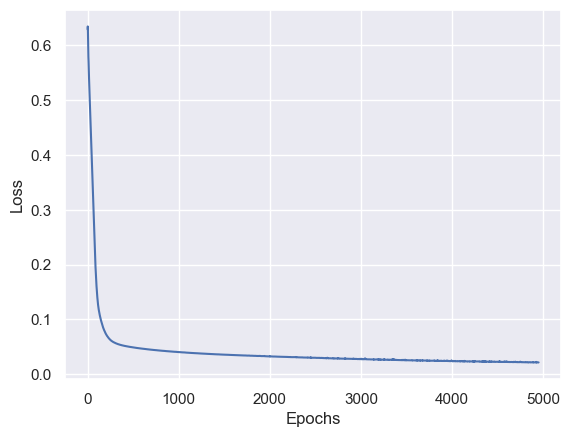

In [47]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][50:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

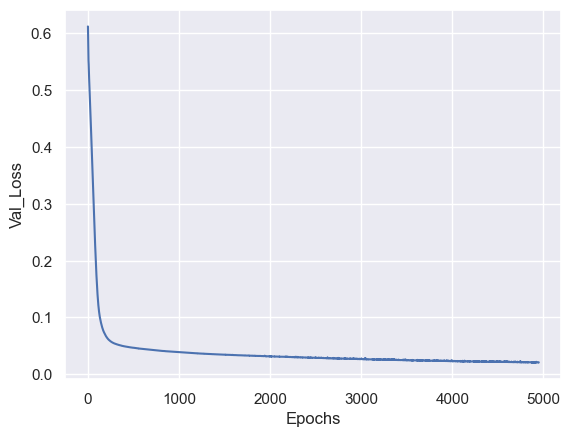

In [48]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][50:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [49]:
#modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\LOGG-Dwarfs.h5


In [50]:
predlogg = modelLOGG.predict(X_test)

42/42 [==============================] - 0s 6ms/step


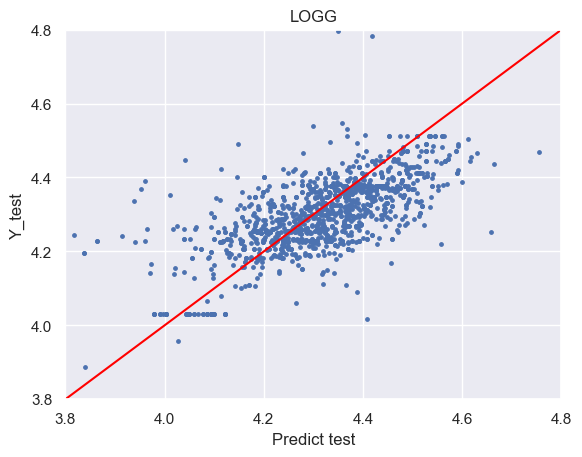

In [51]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
plt.xlim(3.8, 4.8)
plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([3, 5], [3, 5], c='red')

plt.grid(True)

In [52]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 49.0%


In [53]:
Y_test['LOGG_Predict'] = predlogg

In [54]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n05s44_0022746    5969.45     4.408   -0.005       -0.005   
iDR4_3_STRIPE82-0026_0046410   5740.98     4.353   -0.084        0.003   
iDR4_3_STRIPE82-0024_0041378   5826.60     4.274   -0.199        0.025   
iDR4_3_STRIPE82-0028_0037378   5638.54     4.480   -0.015    -9999.000   
iDR4_3_SPLUS-n05s43_0026061    5734.69     4.386   -0.407        0.150   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5654.02     4.304   -0.145        0.119   
iDR4_3_SPLUS-n06s41_0038172    5520.94     4.040   -0.027        0.009   
iDR4_3_SPLUS-n05s43_0039108    5672.88     4.460   -0.424        0.083   
iDR4_3_SPLUS-n07s41_0027340    5437.77     4.479   -0.094        0.012   
iDR4_3_STRIPE82-0104_0037773   5990.54     4.228   -0.362    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n05s44_0022746      0.02068    -0.00463    -0.14314    -0.00135   
iDR4_3_STRIPE82-0026_0046410    -0.02099    -0.00631     0.03257     0.01964   
iDR4_3_STRIPE82-0024_0041378     0.02604     0.05242     0.05260     0.05211   
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n05s43_0026061      0.09236     0.13633     0.20307     0.23083   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06922     0.09751     0.16856     0.20524   
iDR4_3_SPLUS-n06s41_0038172      0.07142     0.00881     0.10894     0.03428   
iDR4_3_SPLUS-n05s43_0039108      0.09888     0.06333    -0.01452     0.14063   
iDR4_3_SPLUS-n07s41_0027340     -0.04901     0.01818    -0.02734     0.03363   
iDR4_3_STRIPE82-0104_0037773 -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n05s44_0022746     -0.00272    -0.01857     0.644667   
iDR4_3_STRIPE82-0026_0046410    -0.00231    -0.01724     0.365044   
iDR4_3_STRIPE82-0024_0041378     0.01274    -0.01553     0.469834   
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000     0.239669   
iDR4_3_SPLUS-n05s43_0026061      0.13193     0.04049     0.357346   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.12598     0.04160     0.258615   
iDR4_3_SPLUS-n06s41_0038172      0.00501     0.05196     0.095739   
iDR4_3_SPLUS-n05s43_0039108      0.10158     0.01561     0.281697   
iDR4_3_SPLUS-n07s41_0027340     -0.01231     0.02639    -0.006052   
iDR4_3_STRIPE82-0104_0037773 -9999.00000 -9999.00000     0.670479   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_SPLUS-n05s44_0022746           5830.572754      4.251314  
iDR4_3_STRIPE82-0026_0046410          5707.495605      4.324688  
iDR4_3_STRIPE82-0024_0041378          5828.537109      4.234036  
iDR4_3_STRIPE82-0028_0037378          5592.265625      4.471438  
iDR4_3_SPLUS-n05s43_0026061           5646.103027      4.226245  
...                                           ...           ...  
iDR4_3_STRIPE82-0028_0033168          5562.366211      4.254277  
iDR4_3_SPLUS-n06s41_0038172           5691.011230      4.261150  
iDR4_3_SPLUS-n05s43_0039108           5640.886719      4.393206  
iDR4_3_SPLUS-n07s41_0027340           5455.870117      4.392639  
iDR4_3_STRIPE82-0104_0037773          6056.707520      4.284931  

[1333 rows x 13 columns]

In [55]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [80]:
Parametro = "FEH"
columnTrain = 'feh_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [81]:
modelFEH = baseline_model_teste()

In [82]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 0.1421 - val_loss: 0.1311 - 776ms/epoch - 388ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.1408 - val_loss: 0.1300 - 47ms/epoch - 24ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.1396 - val_loss: 0.1288 - 45ms/epoch - 23ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1383 - val_loss: 0.1276 - 47ms/epoch - 24ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.1370 - val_loss: 0.1263 - 43ms/epoch - 22ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.1356 - val_loss: 0.1248 - 41ms/epoch - 21ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.1340 - val_loss: 0.1232 - 44ms/epoch - 22ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.1322 - val_loss: 0.1214 - 44ms/epoch - 22ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.1303 - val_loss: 0.1195 - 47ms/epoch - 24ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.1282 - val_loss: 0.1173 - 46ms/epoch - 23ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.1258 - val_loss: 0.1150 - 46ms/epoch - 23ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.1232 - val_loss: 0.1123 - 46ms/epoch - 23ms/step
Epoch 13/2000
2/2 - 0s 

Epoch 101/2000
2/2 - 0s - loss: 0.0456 - val_loss: 0.0455 - 51ms/epoch - 26ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.0454 - val_loss: 0.0454 - 50ms/epoch - 25ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.0453 - val_loss: 0.0453 - 52ms/epoch - 26ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.0452 - val_loss: 0.0452 - 57ms/epoch - 28ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.0450 - val_loss: 0.0450 - 59ms/epoch - 30ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.0449 - val_loss: 0.0449 - 62ms/epoch - 31ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.0447 - val_loss: 0.0447 - 54ms/epoch - 27ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.0446 - val_loss: 0.0446 - 54ms/epoch - 27ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0445 - 57ms/epoch - 28ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.0443 - val_loss: 0.0443 - 52ms/epoch - 26ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.0442 - val_loss: 0.0442 - 56ms/epoch - 28ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.0441 - val_loss: 0.0441 - 57ms/epoch - 28ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0350 - 53ms/epoch - 27ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0350 - 50ms/epoch - 25ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.0347 - val_loss: 0.0349 - 55ms/epoch - 28ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0348 - 56ms/epoch - 28ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0348 - 55ms/epoch - 28ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0346 - 56ms/epoch - 28ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0346 - 50ms/epoch - 25ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0345 - 52ms/epoch - 26ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0344 - 51ms/epoch - 26ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0343 - 60ms/epoch - 30ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0342 - 54ms/epoch - 27ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0342 - 52ms/epoch - 26ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0286 - 121ms/epoch - 61ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0285 - 45ms/epoch - 22ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0286 - 69ms/epoch - 35ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0284 - 44ms/epoch - 22ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0284 - 47ms/epoch - 24ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0283 - 45ms/epoch - 23ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0283 - 43ms/epoch - 22ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0282 - 56ms/epoch - 28ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0282 - 43ms/epoch - 21ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0281 - 96ms/epoch - 48ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0281 - 44ms/epoch - 22ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0281 - 76ms/epoch - 38ms/step
Epo

Epoch 398/2000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0247 - 64ms/epoch - 32ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0244 - 58ms/epoch - 29ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0244 - 55ms/epoch - 28ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0244 - 53ms/epoch - 27ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0243 - 51ms/epoch - 26ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0244 - 54ms/epoch - 27ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0243 - 53ms/epoch - 27ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0242 - 58ms/epoch - 29ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0242 - 58ms/epoch - 29ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0242 - 51ms/epoch - 26ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0241 - 57ms/epoch - 28ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0241 - 52ms/epoch - 26ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.0210 - val_loss: 0.0216 - 51ms/epoch - 26ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.0209 - val_loss: 0.0216 - 84ms/epoch - 42ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.0209 - val_loss: 0.0216 - 50ms/epoch - 25ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.0209 - val_loss: 0.0216 - 70ms/epoch - 35ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.0209 - val_loss: 0.0215 - 50ms/epoch - 25ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0215 - 58ms/epoch - 29ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0215 - 53ms/epoch - 26ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0215 - 70ms/epoch - 35ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0215 - 51ms/epoch - 26ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0214 - 70ms/epoch - 35ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0214 - 50ms/epoch - 25ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0213 - 69ms/epoch - 34ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.0189 - val_loss: 0.0197 - 49ms/epoch - 25ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0196 - 53ms/epoch - 27ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.0189 - val_loss: 0.0196 - 54ms/epoch - 27ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0197 - 52ms/epoch - 26ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0196 - 54ms/epoch - 27ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0197 - 59ms/epoch - 30ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0195 - 56ms/epoch - 28ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0195 - 56ms/epoch - 28ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0195 - 63ms/epoch - 32ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0195 - 62ms/epoch - 31ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0195 - 57ms/epoch - 29ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.0186 - val_loss: 0.0195 - 54ms/epoch - 27ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0183 - 55ms/epoch - 28ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0182 - 50ms/epoch - 25ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0183 - 53ms/epoch - 27ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0182 - 54ms/epoch - 27ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0182 - 51ms/epoch - 26ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0183 - 51ms/epoch - 26ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0181 - 53ms/epoch - 27ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0183 - 55ms/epoch - 28ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0183 - 56ms/epoch - 28ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0181 - 57ms/epoch - 29ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0183 - 59ms/epoch - 30ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0187 - 112ms/epoch - 56ms/step
Epo

Epoch 794/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0173 - 57ms/epoch - 29ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0178 - 54ms/epoch - 27ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.0166 - val_loss: 0.0176 - 50ms/epoch - 25ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.0166 - val_loss: 0.0172 - 52ms/epoch - 26ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0171 - 53ms/epoch - 27ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0172 - 51ms/epoch - 25ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0174 - 48ms/epoch - 24ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0173 - 52ms/epoch - 26ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0172 - 52ms/epoch - 26ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0171 - 56ms/epoch - 28ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0171 - 54ms/epoch - 27ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0171 - 51ms/epoch - 26ms/step
Epoc

Epoch 893/2000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0164 - 50ms/epoch - 25ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0164 - 50ms/epoch - 25ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0165 - 52ms/epoch - 26ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0164 - 52ms/epoch - 26ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0164 - 50ms/epoch - 25ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0164 - 50ms/epoch - 25ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0164 - 53ms/epoch - 27ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0164 - 52ms/epoch - 26ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0164 - 50ms/epoch - 25ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0164 - 50ms/epoch - 25ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0165 - 53ms/epoch - 26ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0167 - 53ms/epoch - 27ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0158 - 53ms/epoch - 27ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0158 - 54ms/epoch - 27ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0162 - 52ms/epoch - 26ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0159 - 54ms/epoch - 27ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0158 - 57ms/epoch - 28ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0161 - 56ms/epoch - 28ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0159 - 65ms/epoch - 33ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0158 - 58ms/epoch - 29ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0158 - 61ms/epoch - 30ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0158 - 53ms/epoch - 27ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0158 - 57ms/epoch - 29ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0158 - 57ms/epoch - 28ms/step


Epoch 1090/2000
2/2 - 0s - loss: 0.0144 - val_loss: 0.0154 - 51ms/epoch - 26ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0154 - 54ms/epoch - 27ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0156 - 51ms/epoch - 26ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.0144 - val_loss: 0.0155 - 54ms/epoch - 27ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0153 - 53ms/epoch - 27ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0153 - 50ms/epoch - 25ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0154 - 55ms/epoch - 27ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0153 - 58ms/epoch - 29ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0153 - 52ms/epoch - 26ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0153 - 51ms/epoch - 26ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0153 - 57ms/epoch - 29ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0153 - 57ms/epoch - 28

Epoch 1188/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0155 - 50ms/epoch - 25ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0150 - 57ms/epoch - 29ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0150 - 54ms/epoch - 27ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0152 - 56ms/epoch - 28ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0150 - 52ms/epoch - 26ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0150 - 56ms/epoch - 28ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0150 - 54ms/epoch - 27ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0150 - 55ms/epoch - 28ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0150 - 56ms/epoch - 28ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0151 - 50ms/epoch - 25ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0150 - 54ms/epoch - 27ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0149 - 52ms/epoch - 26

Epoch 1286/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0146 - 46ms/epoch - 23ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0148 - 50ms/epoch - 25ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.0136 - val_loss: 0.0146 - 55ms/epoch - 28ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0148 - 57ms/epoch - 28ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0146 - 56ms/epoch - 28ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0148 - 52ms/epoch - 26ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0146 - 52ms/epoch - 26ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0146 - 50ms/epoch - 25ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0147 - 46ms/epoch - 23ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0146 - 52ms/epoch - 26ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0146 - 52ms/epoch - 26ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0147 - 53ms/epoch - 27

Epoch 1384/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0143 - 49ms/epoch - 25ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0148 - 43ms/epoch - 22ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0145 - 46ms/epoch - 23ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0144 - 43ms/epoch - 22ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0149 - 44ms/epoch - 22ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0145 - 45ms/epoch - 23ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0144 - 43ms/epoch - 22ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0145 - 44ms/epoch - 22ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0143 - 43ms/epoch - 22ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0143 - 44ms/epoch - 22ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0144 - 47ms/epoch - 23ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0145 - 42ms/epoch - 21

Epoch 1482/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0141 - 80ms/epoch - 40ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0141 - 55ms/epoch - 27ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0143 - 57ms/epoch - 28ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0141 - 54ms/epoch - 27ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0141 - 54ms/epoch - 27ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0141 - 78ms/epoch - 39ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0141 - 58ms/epoch - 29ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0141 - 55ms/epoch - 27ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0141 - 56ms/epoch - 28ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0141 - 52ms/epoch - 26ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0141 - 61ms/epoch - 31ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0141 - 54ms/epoch - 27

Epoch 1580/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0139 - 50ms/epoch - 25ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0140 - 54ms/epoch - 27ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0139 - 51ms/epoch - 26ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0139 - 54ms/epoch - 27ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0139 - 54ms/epoch - 27ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0139 - 57ms/epoch - 29ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0140 - 54ms/epoch - 27ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0140 - 55ms/epoch - 27ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0139 - 51ms/epoch - 25ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0138 - 56ms/epoch - 28ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0139 - 53ms/epoch - 26ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0139 - 58ms/epoch - 29

Epoch 1678/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0142 - 60ms/epoch - 30ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0136 - 55ms/epoch - 27ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0137 - 52ms/epoch - 26ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0138 - 56ms/epoch - 28ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0138 - 59ms/epoch - 29ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0139 - 51ms/epoch - 25ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0137 - 54ms/epoch - 27ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0138 - 53ms/epoch - 27ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0138 - 53ms/epoch - 27ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0137 - 52ms/epoch - 26ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0139 - 63ms/epoch - 32ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0137 - 52ms/epoch - 26

Epoch 1776/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0136 - 53ms/epoch - 27ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0141 - 55ms/epoch - 28ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0135 - 53ms/epoch - 27ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0137 - 50ms/epoch - 25ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0136 - 51ms/epoch - 25ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0136 - 53ms/epoch - 27ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0139 - 52ms/epoch - 26ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0136 - 55ms/epoch - 28ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0136 - 52ms/epoch - 26ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0138 - 51ms/epoch - 26ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0135 - 51ms/epoch - 26ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0135 - 50ms/epoch - 25

Epoch 1874/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0133 - 50ms/epoch - 25ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0133 - 48ms/epoch - 24ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0135 - 55ms/epoch - 27ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0133 - 55ms/epoch - 28ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0135 - 46ms/epoch - 23ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0134 - 54ms/epoch - 27ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0133 - 58ms/epoch - 29ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0135 - 53ms/epoch - 27ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0134 - 55ms/epoch - 28ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0133 - 55ms/epoch - 28ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0137 - 60ms/epoch - 30ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0134 - 59ms/epoch - 30

Epoch 1972/2000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0132 - 53ms/epoch - 26ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0138 - 50ms/epoch - 25ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0133 - 50ms/epoch - 25ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0133 - 52ms/epoch - 26ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0133 - 52ms/epoch - 26ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0132 - 54ms/epoch - 27ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0134 - 51ms/epoch - 26ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0133 - 48ms/epoch - 24ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0134 - 51ms/epoch - 25ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0133 - 53ms/epoch - 27ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0132 - 54ms/epoch - 27ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0134 - 50ms/epoch - 25

Text(0, 0.5, 'Loss')

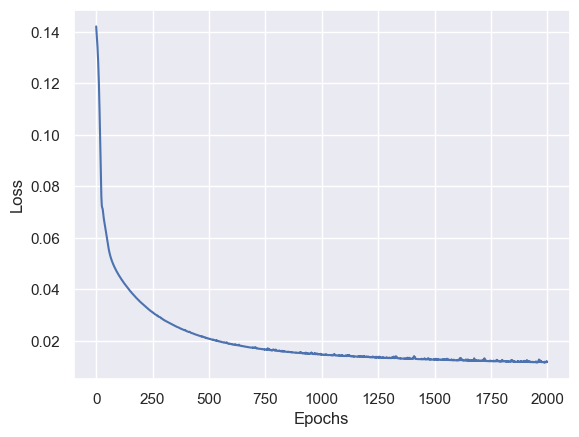

In [83]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

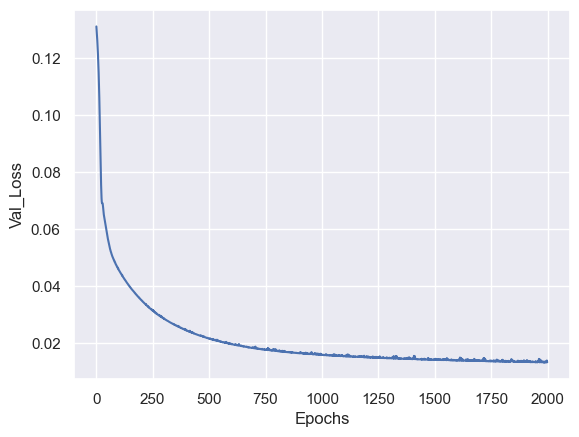

In [84]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [89]:
#modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\FEH-Dwarfs.h5


In [86]:
predfeh = modelFEH.predict(X_test)

42/42 [==============================] - 0s 3ms/step


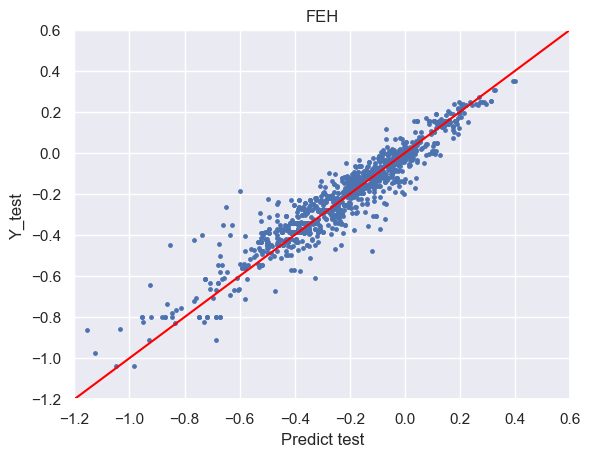

In [87]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-1.2, 0.6)
plt.ylim(-1.2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [88]:
score = r2_score(Y_test['feh_cnn'], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 91.0%


In [90]:
Y_test['FEH_Predict'] = predfeh

In [91]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n05s44_0022746    5969.45     4.408   -0.005       -0.005   
iDR4_3_STRIPE82-0026_0046410   5740.98     4.353   -0.084        0.003   
iDR4_3_STRIPE82-0024_0041378   5826.60     4.274   -0.199        0.025   
iDR4_3_STRIPE82-0028_0037378   5638.54     4.480   -0.015    -9999.000   
iDR4_3_SPLUS-n05s43_0026061    5734.69     4.386   -0.407        0.150   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0033168   5654.02     4.304   -0.145        0.119   
iDR4_3_SPLUS-n06s41_0038172    5520.94     4.040   -0.027        0.009   
iDR4_3_SPLUS-n05s43_0039108    5672.88     4.460   -0.424        0.083   
iDR4_3_SPLUS-n07s41_0027340    5437.77     4.479   -0.094        0.012   
iDR4_3_STRIPE82-0104_0037773   5990.54     4.228   -0.362    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n05s44_0022746      0.02068    -0.00463    -0.14314    -0.00135   
iDR4_3_STRIPE82-0026_0046410    -0.02099    -0.00631     0.03257     0.01964   
iDR4_3_STRIPE82-0024_0041378     0.02604     0.05242     0.05260     0.05211   
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n05s43_0026061      0.09236     0.13633     0.20307     0.23083   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0028_0033168     0.06922     0.09751     0.16856     0.20524   
iDR4_3_SPLUS-n06s41_0038172      0.07142     0.00881     0.10894     0.03428   
iDR4_3_SPLUS-n05s43_0039108      0.09888     0.06333    -0.01452     0.14063   
iDR4_3_SPLUS-n07s41_0027340     -0.04901     0.01818    -0.02734     0.03363   
iDR4_3_STRIPE82-0104_0037773 -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n05s44_0022746     -0.00272    -0.01857     0.644667   
iDR4_3_STRIPE82-0026_0046410    -0.00231    -0.01724     0.365044   
iDR4_3_STRIPE82-0024_0041378     0.01274    -0.01553     0.469834   
iDR4_3_STRIPE82-0028_0037378 -9999.00000 -9999.00000     0.239669   
iDR4_3_SPLUS-n05s43_0026061      0.13193     0.04049     0.357346   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0028_0033168     0.12598     0.04160     0.258615   
iDR4_3_SPLUS-n06s41_0038172      0.00501     0.05196     0.095739   
iDR4_3_SPLUS-n05s43_0039108      0.10158     0.01561     0.281697   
iDR4_3_SPLUS-n07s41_0027340     -0.01231     0.02639    -0.006052   
iDR4_3_STRIPE82-0104_0037773 -9999.00000 -9999.00000     0.670479   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_SPLUS-n05s44_0022746           5830.572754      4.251314    -0.042717  
iDR4_3_STRIPE82-0026_0046410          5707.495605      4.324688    -0.068135  
iDR4_3_STRIPE82-0024_0041378          5828.537109      4.234036    -0.158337  
iDR4_3_STRIPE82-0028_0037378          5592.265625      4.471438    -0.007763  
iDR4_3_SPLUS-n05s43_0026061           5646.103027      4.226245    -0.451674  
...                                           ...           ...          ...  
iDR4_3_STRIPE82-0028_0033168          5562.366211      4.254277    -0.118726  
iDR4_3_SPLUS-n06s41_0038172           5691.011230      4.261150     0.003150  
iDR4_3_SPLUS-n05s43_0039108           5640.886719      4.393206    -0.453230  
iDR4_3_SPLUS-n07s41_0027340           5455.870117      4.392639    -0.094622  
iDR4_3_STRIPE82-0104_0037773          6056.707520      4.284931    -0.351319  

[1333 rows x 14 columns]

In [92]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros parametros

In [6]:
AnasCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Dwarfs.csv", index_col = 'ID')

In [7]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520   0.3921  0.4478  0.8661  0.9116  1.1129  1.2790   
iDR4_3_SPLUS-n01s25_0024112   0.3391  0.4531  1.0079  1.1154  1.4390  1.6384   
iDR4_3_SPLUS-n01s25_0031268   0.3477  0.4169  1.1348  1.1954  1.5455  1.7339   
iDR4_3_SPLUS-n01s25_0031421   0.3142  0.3588  1.0420  1.1060  1.4728  1.6532   
iDR4_3_SPLUS-n01s25_0034872   0.3833  0.4234  0.9569  1.0194  1.3218  1.5028   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0030169  0.3754  0.4434  0.9385  1.0015  1.3158  1.5041   
iDR4_3_STRIPE82-0168_0030542  0.4235  0.5140  1.0267  1.0893  1.3207  1.4944   
iDR4_3_STRIPE82-0169_0032496  0.3890  0.3576  0.8780  0.9546  1.2349  1.4044   
iDR4_3_STRIPE82-0169_0033863  0.3542  0.4172  0.9882  1.0829  1.4197  1.5856   
iDR4_3_STRIPE82-0170_0012209  0.3275  0.3593  0.9281  0.9849  1.2826  1.4692   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0027520   1.4622  1.4520  1.5498  1.5666  ...   6141.00   
iDR4_3_SPLUS-n01s25_0024112   1.9085  1.9484  2.0183  2.0590  ...   5658.72   
iDR4_3_SPLUS-n01s25_0031268   1.9803  2.0097  2.1192  2.0844  ...   5545.21   
iDR4_3_SPLUS-n01s25_0031421   1.9258  1.9547  2.0805  2.0761  ...   5428.41   
iDR4_3_SPLUS-n01s25_0034872   1.7322  1.7604  1.8647  1.8819  ...   5663.81   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0030169  1.6412  1.7863  1.8272  1.9134  ...   5738.14   
iDR4_3_STRIPE82-0168_0030542  1.6219  1.6546  1.7353  1.7092  ...   5977.37   
iDR4_3_STRIPE82-0169_0032496  1.6370  1.6532  1.7642  1.7755  ...   5835.70   
iDR4_3_STRIPE82-0169_0033863  1.8701  1.8831  1.9970  2.0140  ...   5761.97   
iDR4_3_STRIPE82-0170_0012209  1.7095  1.7675  1.8441  1.8943  ...   5601.22   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0027520      4.333   -0.366        0.054     0.08447   
iDR4_3_SPLUS-n01s25_0024112      4.114   -0.011        0.018     0.00760   
iDR4_3_SPLUS-n01s25_0031268      4.371   -0.170        0.072     0.06633   
iDR4_3_SPLUS-n01s25_0031421      4.542   -0.460        0.040     0.04774   
iDR4_3_SPLUS-n01s25_0034872      4.158   -0.201        0.037     0.07670   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0168_0030169     4.470   -0.216    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0168_0030542     4.267   -0.219    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0169_0032496     4.358   -0.502    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0169_0033863     4.207   -0.030    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0012209     4.470   -0.400    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0027520     -0.02369    -0.11940     0.09115     0.07510   
iDR4_3_SPLUS-n01s25_0024112     -0.00187     0.07835     0.03116     0.01523   
iDR4_3_SPLUS-n01s25_0031268      0.05495     0.04061     0.14143     0.05714   
iDR4_3_SPLUS-n01s25_0031421      0.00900    -0.05772     0.08026     0.01691   
iDR4_3_SPLUS-n01s25_0034872      0.03822     0.23675     0.07967     0.01824   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0168_0030169 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0168_0030542 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0169_0032496 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0169_0033863 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [8]:
AnasCoresParams = AnasCores.loc[AnasCores['alpha_m_cnn'] != -9999]

In [9]:
print('cfe =', AnasCoresParams['c_fe'].min())
print('cafe = ', AnasCoresParams['ca_fe'].min())
print('nfe = ', AnasCoresParams['n_fe'].min())
print('mgfe = ', AnasCoresParams['mg_fe'].min())
print('sife = ', AnasCoresParams['si_fe'].min())
print('nife = ', AnasCoresParams['ni_fe'].min())

cfe = -0.23809
cafe =  -0.11283
nfe =  -0.28011
mgfe =  -0.26852
sife =  -0.10938
nife =  -0.2868


In [10]:
xtrain = AnasCoresParams.iloc[:, :66]

In [11]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [12]:
ytrain = AnasCoresParams[columnYtrain]

In [13]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [14]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [15]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [16]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0030564   5660.24     4.056   -0.956        0.246   
iDR4_3_STRIPE82-0026_0055354   5389.94     4.378   -0.353        0.131   
iDR4_3_STRIPE82-0026_0055354   5476.56     4.511   -0.425        0.160   
iDR4_3_SPLUS-s02s23_0001813    5823.78     4.284    0.018       -0.004   
iDR4_3_SPLUS-n02n27_0040307    5961.30     4.298   -0.498        0.052   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0033335    5557.02     4.383   -0.680        0.176   
iDR4_3_STRIPE82-0026_0051498   5644.89     4.379   -0.401        0.070   
iDR4_3_SPLUS-n07s43_0052159    5856.57     4.310   -0.574        0.133   
iDR4_3_STRIPE82-0024_0033734   5407.46     4.086    0.114        0.000   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0030564  0.26149  0.17125 -0.02060  0.33459  0.22452   
iDR4_3_STRIPE82-0026_0055354  0.05224  0.14798 -0.09113  0.19951  0.09237   
iDR4_3_STRIPE82-0026_0055354  0.08743  0.14381  0.23128  0.23816  0.17027   
iDR4_3_SPLUS-s02s23_0001813   0.01215 -0.00054  0.26834  0.01510 -0.00606   
iDR4_3_SPLUS-n02n27_0040307   0.11575  0.10684  0.05188  0.07724  0.04637   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0033335   0.20119  0.20564 -0.05531  0.26289  0.16825   
iDR4_3_STRIPE82-0026_0051498  0.05757  0.08006 -0.00527  0.11223  0.05705   
iDR4_3_SPLUS-n07s43_0052159   0.12070  0.27770 -0.10408  0.21106  0.09006   
iDR4_3_STRIPE82-0024_0033734  0.04154  0.00397  0.14313  0.03065  0.05357   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0024_0030564  0.09300  
iDR4_3_STRIPE82-0026_0055354  0.02761  
iDR4_3_STRIPE82-0026_0055354  0.02332  
iDR4_3_SPLUS-s02s23_0001813   0.02205  
iDR4_3_SPLUS-n02n27_0040307  -0.01119  
...                               ...  
iDR4_3_SPLUS-n05s44_0033335   0.12831  
iDR4_3_STRIPE82-0026_0051498 -0.00078  
iDR4_3_SPLUS-n07s43_0052159  -0.00112  
iDR4_3_STRIPE82-0024_0033734  0.05678  
iDR4_3_STRIPE82-0026_0051498 -0.02686  

[4216 rows x 10 columns]

### Alpha

In [152]:
Parametro = "Alpha"
columnTrain = 'alpha_m_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [18]:
modelAlpha = baseline_model_teste()

In [19]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
3/3 - 3s - loss: 0.0566 - val_loss: 0.0560 - 3s/epoch - 912ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.0560 - val_loss: 0.0554 - 46ms/epoch - 15ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.0554 - val_loss: 0.0548 - 49ms/epoch - 16ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.0548 - val_loss: 0.0542 - 45ms/epoch - 15ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.0542 - val_loss: 0.0536 - 45ms/epoch - 15ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.0536 - val_loss: 0.0530 - 45ms/epoch - 15ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.0530 - val_loss: 0.0524 - 47ms/epoch - 16ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.0524 - val_loss: 0.0518 - 44ms/epoch - 15ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.0518 - val_loss: 0.0513 - 47ms/epoch - 16ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.0513 - val_loss: 0.0508 - 46ms/epoch - 15ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.0508 - val_loss: 0.0503 - 45ms/epoch - 15ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.0503 - val_loss: 0.0499 - 48ms/epoch - 16ms/step
Epoch 13/2000
3/3 - 0s - l

3/3 - 0s - loss: 0.0251 - val_loss: 0.0249 - 51ms/epoch - 17ms/step
Epoch 102/2000
3/3 - 0s - loss: 0.0249 - val_loss: 0.0247 - 57ms/epoch - 19ms/step
Epoch 103/2000
3/3 - 0s - loss: 0.0247 - val_loss: 0.0246 - 63ms/epoch - 21ms/step
Epoch 104/2000
3/3 - 0s - loss: 0.0245 - val_loss: 0.0244 - 66ms/epoch - 22ms/step
Epoch 105/2000
3/3 - 0s - loss: 0.0244 - val_loss: 0.0242 - 55ms/epoch - 18ms/step
Epoch 106/2000
3/3 - 0s - loss: 0.0242 - val_loss: 0.0240 - 52ms/epoch - 17ms/step
Epoch 107/2000
3/3 - 0s - loss: 0.0240 - val_loss: 0.0239 - 53ms/epoch - 18ms/step
Epoch 108/2000
3/3 - 0s - loss: 0.0239 - val_loss: 0.0237 - 51ms/epoch - 17ms/step
Epoch 109/2000
3/3 - 0s - loss: 0.0237 - val_loss: 0.0235 - 51ms/epoch - 17ms/step
Epoch 110/2000
3/3 - 0s - loss: 0.0235 - val_loss: 0.0234 - 50ms/epoch - 17ms/step
Epoch 111/2000
3/3 - 0s - loss: 0.0233 - val_loss: 0.0232 - 50ms/epoch - 17ms/step
Epoch 112/2000
3/3 - 0s - loss: 0.0232 - val_loss: 0.0230 - 52ms/epoch - 17ms/step
Epoch 113/2000
3/3 

Epoch 200/2000
3/3 - 0s - loss: 0.0129 - val_loss: 0.0128 - 51ms/epoch - 17ms/step
Epoch 201/2000
3/3 - 0s - loss: 0.0128 - val_loss: 0.0128 - 53ms/epoch - 18ms/step
Epoch 202/2000
3/3 - 0s - loss: 0.0127 - val_loss: 0.0127 - 52ms/epoch - 17ms/step
Epoch 203/2000
3/3 - 0s - loss: 0.0127 - val_loss: 0.0126 - 51ms/epoch - 17ms/step
Epoch 204/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0125 - 53ms/epoch - 18ms/step
Epoch 205/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0124 - 54ms/epoch - 18ms/step
Epoch 206/2000
3/3 - 0s - loss: 0.0124 - val_loss: 0.0124 - 53ms/epoch - 18ms/step
Epoch 207/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0123 - 52ms/epoch - 17ms/step
Epoch 208/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0122 - 54ms/epoch - 18ms/step
Epoch 209/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0121 - 59ms/epoch - 20ms/step
Epoch 210/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0121 - 57ms/epoch - 19ms/step
Epoch 211/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0120 - 56ms/epoch - 19ms/step
Epoc

Epoch 299/2000
3/3 - 0s - loss: 0.0074 - val_loss: 0.0074 - 57ms/epoch - 19ms/step
Epoch 300/2000
3/3 - 0s - loss: 0.0074 - val_loss: 0.0074 - 56ms/epoch - 19ms/step
Epoch 301/2000
3/3 - 0s - loss: 0.0073 - val_loss: 0.0073 - 58ms/epoch - 19ms/step
Epoch 302/2000
3/3 - 0s - loss: 0.0073 - val_loss: 0.0073 - 55ms/epoch - 18ms/step
Epoch 303/2000
3/3 - 0s - loss: 0.0073 - val_loss: 0.0073 - 56ms/epoch - 19ms/step
Epoch 304/2000
3/3 - 0s - loss: 0.0072 - val_loss: 0.0073 - 61ms/epoch - 20ms/step
Epoch 305/2000
3/3 - 0s - loss: 0.0072 - val_loss: 0.0072 - 58ms/epoch - 19ms/step
Epoch 306/2000
3/3 - 0s - loss: 0.0072 - val_loss: 0.0072 - 58ms/epoch - 19ms/step
Epoch 307/2000
3/3 - 0s - loss: 0.0072 - val_loss: 0.0071 - 56ms/epoch - 19ms/step
Epoch 308/2000
3/3 - 0s - loss: 0.0071 - val_loss: 0.0071 - 58ms/epoch - 19ms/step
Epoch 309/2000
3/3 - 0s - loss: 0.0071 - val_loss: 0.0071 - 60ms/epoch - 20ms/step
Epoch 310/2000
3/3 - 0s - loss: 0.0070 - val_loss: 0.0070 - 57ms/epoch - 19ms/step
Epoc

Epoch 398/2000
3/3 - 0s - loss: 0.0049 - val_loss: 0.0049 - 58ms/epoch - 19ms/step
Epoch 399/2000
3/3 - 0s - loss: 0.0049 - val_loss: 0.0049 - 60ms/epoch - 20ms/step
Epoch 400/2000
3/3 - 0s - loss: 0.0049 - val_loss: 0.0049 - 63ms/epoch - 21ms/step
Epoch 401/2000
3/3 - 0s - loss: 0.0049 - val_loss: 0.0049 - 59ms/epoch - 20ms/step
Epoch 402/2000
3/3 - 0s - loss: 0.0048 - val_loss: 0.0048 - 57ms/epoch - 19ms/step
Epoch 403/2000
3/3 - 0s - loss: 0.0048 - val_loss: 0.0048 - 61ms/epoch - 20ms/step
Epoch 404/2000
3/3 - 0s - loss: 0.0048 - val_loss: 0.0048 - 59ms/epoch - 20ms/step
Epoch 405/2000
3/3 - 0s - loss: 0.0048 - val_loss: 0.0048 - 58ms/epoch - 19ms/step
Epoch 406/2000
3/3 - 0s - loss: 0.0048 - val_loss: 0.0048 - 61ms/epoch - 20ms/step
Epoch 407/2000
3/3 - 0s - loss: 0.0047 - val_loss: 0.0048 - 58ms/epoch - 19ms/step
Epoch 408/2000
3/3 - 0s - loss: 0.0047 - val_loss: 0.0047 - 61ms/epoch - 20ms/step
Epoch 409/2000
3/3 - 0s - loss: 0.0047 - val_loss: 0.0047 - 63ms/epoch - 21ms/step
Epoc

Epoch 497/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0037 - 61ms/epoch - 20ms/step
Epoch 498/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0037 - 61ms/epoch - 20ms/step
Epoch 499/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0037 - 61ms/epoch - 20ms/step
Epoch 500/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0037 - 60ms/epoch - 20ms/step
Epoch 501/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0037 - 66ms/epoch - 22ms/step
Epoch 502/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0036 - 59ms/epoch - 20ms/step
Epoch 503/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0036 - 63ms/epoch - 21ms/step
Epoch 504/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0036 - 58ms/epoch - 19ms/step
Epoch 505/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0036 - 59ms/epoch - 20ms/step
Epoch 506/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0036 - 62ms/epoch - 21ms/step
Epoch 507/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0036 - 60ms/epoch - 20ms/step
Epoch 508/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0036 - 59ms/epoch - 20ms/step
Epoc

Epoch 596/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 60ms/epoch - 20ms/step
Epoch 597/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 62ms/epoch - 21ms/step
Epoch 598/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 57ms/epoch - 19ms/step
Epoch 599/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 59ms/epoch - 20ms/step
Epoch 600/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 60ms/epoch - 20ms/step
Epoch 601/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 63ms/epoch - 21ms/step
Epoch 602/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 62ms/epoch - 21ms/step
Epoch 603/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0030 - 62ms/epoch - 21ms/step
Epoch 604/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 67ms/epoch - 22ms/step
Epoch 605/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0030 - 60ms/epoch - 20ms/step
Epoch 606/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0030 - 63ms/epoch - 21ms/step
Epoch 607/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0030 - 57ms/epoch - 19ms/step
Epoc

Epoch 695/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 63ms/epoch - 21ms/step
Epoch 696/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0028 - 61ms/epoch - 20ms/step
Epoch 697/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 57ms/epoch - 19ms/step
Epoch 698/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0028 - 61ms/epoch - 20ms/step
Epoch 699/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0028 - 59ms/epoch - 20ms/step
Epoch 700/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 64ms/epoch - 21ms/step
Epoch 701/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 702/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0027 - 63ms/epoch - 21ms/step
Epoch 703/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0027 - 65ms/epoch - 22ms/step
Epoch 704/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 705/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0027 - 64ms/epoch - 21ms/step
Epoch 706/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 61ms/epoch - 20ms/step
Epoc

Epoch 794/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 60ms/epoch - 20ms/step
Epoch 795/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 61ms/epoch - 20ms/step
Epoch 796/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 57ms/epoch - 19ms/step
Epoch 797/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 58ms/epoch - 19ms/step
Epoch 798/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 60ms/epoch - 20ms/step
Epoch 799/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 59ms/epoch - 20ms/step
Epoch 800/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 60ms/epoch - 20ms/step
Epoch 801/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 62ms/epoch - 21ms/step
Epoch 802/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 60ms/epoch - 20ms/step
Epoch 803/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 60ms/epoch - 20ms/step
Epoch 804/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 60ms/epoch - 20ms/step
Epoch 805/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 60ms/epoch - 20ms/step
Epoc

Epoch 893/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 61ms/epoch - 20ms/step
Epoch 894/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 65ms/epoch - 22ms/step
Epoch 895/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 64ms/epoch - 21ms/step
Epoch 896/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 66ms/epoch - 22ms/step
Epoch 897/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 68ms/epoch - 23ms/step
Epoch 898/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 62ms/epoch - 21ms/step
Epoch 899/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 58ms/epoch - 19ms/step
Epoch 900/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 62ms/epoch - 21ms/step
Epoch 901/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 65ms/epoch - 22ms/step
Epoch 902/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 61ms/epoch - 20ms/step
Epoch 903/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0023 - 64ms/epoch - 21ms/step
Epoch 904/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 65ms/epoch - 22ms/step
Epoc

Epoch 992/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0023 - 61ms/epoch - 20ms/step
Epoch 993/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0022 - 62ms/epoch - 21ms/step
Epoch 994/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0022 - 65ms/epoch - 22ms/step
Epoch 995/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 63ms/epoch - 21ms/step
Epoch 996/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 68ms/epoch - 23ms/step
Epoch 997/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0022 - 63ms/epoch - 21ms/step
Epoch 998/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 62ms/epoch - 21ms/step
Epoch 999/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 64ms/epoch - 21ms/step
Epoch 1000/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0022 - 64ms/epoch - 21ms/step
Epoch 1001/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0023 - 61ms/epoch - 20ms/step
Epoch 1002/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 63ms/epoch - 21ms/step
Epoch 1003/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0023 - 61ms/epoch - 20ms/step


Epoch 1090/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0022 - 54ms/epoch - 18ms/step
Epoch 1091/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0022 - 64ms/epoch - 21ms/step
Epoch 1092/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0022 - 53ms/epoch - 18ms/step
Epoch 1093/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0021 - 69ms/epoch - 23ms/step
Epoch 1094/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 52ms/epoch - 17ms/step
Epoch 1095/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 54ms/epoch - 18ms/step
Epoch 1096/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 55ms/epoch - 18ms/step
Epoch 1097/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 56ms/epoch - 19ms/step
Epoch 1098/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 57ms/epoch - 19ms/step
Epoch 1099/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 57ms/epoch - 19ms/step
Epoch 1100/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 55ms/epoch - 18ms/step
Epoch 1101/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 55ms/epoch - 18

Epoch 1188/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 51ms/epoch - 17ms/step
Epoch 1189/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 51ms/epoch - 17ms/step
Epoch 1190/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 53ms/epoch - 18ms/step
Epoch 1191/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 52ms/epoch - 17ms/step
Epoch 1192/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 52ms/epoch - 17ms/step
Epoch 1193/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 52ms/epoch - 17ms/step
Epoch 1194/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 51ms/epoch - 17ms/step
Epoch 1195/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 57ms/epoch - 19ms/step
Epoch 1196/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 56ms/epoch - 19ms/step
Epoch 1197/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 54ms/epoch - 18ms/step
Epoch 1198/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 55ms/epoch - 18ms/step
Epoch 1199/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 56ms/epoch - 19

Epoch 1286/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0021 - 58ms/epoch - 19ms/step
Epoch 1287/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0020 - 54ms/epoch - 18ms/step
Epoch 1288/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0020 - 55ms/epoch - 18ms/step
Epoch 1289/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0021 - 57ms/epoch - 19ms/step
Epoch 1290/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0021 - 59ms/epoch - 20ms/step
Epoch 1291/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0020 - 52ms/epoch - 17ms/step
Epoch 1292/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0020 - 56ms/epoch - 19ms/step
Epoch 1293/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0020 - 55ms/epoch - 18ms/step
Epoch 1294/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0021 - 55ms/epoch - 18ms/step
Epoch 1295/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0020 - 58ms/epoch - 19ms/step
Epoch 1296/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0021 - 62ms/epoch - 21ms/step
Epoch 1297/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0020 - 59ms/epoch - 20

Epoch 1384/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 68ms/epoch - 23ms/step
Epoch 1385/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0020 - 65ms/epoch - 22ms/step
Epoch 1386/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 74ms/epoch - 25ms/step
Epoch 1387/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 69ms/epoch - 23ms/step
Epoch 1388/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 65ms/epoch - 22ms/step
Epoch 1389/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 62ms/epoch - 21ms/step
Epoch 1390/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 70ms/epoch - 23ms/step
Epoch 1391/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 66ms/epoch - 22ms/step
Epoch 1392/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 122ms/epoch - 41ms/step
Epoch 1393/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 96ms/epoch - 32ms/step
Epoch 1394/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 76ms/epoch - 25ms/step
Epoch 1395/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 77ms/epoch - 2

Epoch 1482/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 60ms/epoch - 20ms/step
Epoch 1483/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 60ms/epoch - 20ms/step
Epoch 1484/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 59ms/epoch - 20ms/step
Epoch 1485/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 61ms/epoch - 20ms/step
Epoch 1486/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 60ms/epoch - 20ms/step
Epoch 1487/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 52ms/epoch - 17ms/step
Epoch 1488/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 59ms/epoch - 20ms/step
Epoch 1489/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 57ms/epoch - 19ms/step
Epoch 1490/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 56ms/epoch - 19ms/step
Epoch 1491/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 61ms/epoch - 20ms/step
Epoch 1492/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 63ms/epoch - 21ms/step
Epoch 1493/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 62ms/epoch - 21

Epoch 1580/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 57ms/epoch - 19ms/step
Epoch 1581/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 52ms/epoch - 17ms/step
Epoch 1582/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 57ms/epoch - 19ms/step
Epoch 1583/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 55ms/epoch - 18ms/step
Epoch 1584/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 58ms/epoch - 19ms/step
Epoch 1585/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 86ms/epoch - 29ms/step
Epoch 1586/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 81ms/epoch - 27ms/step
Epoch 1587/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 53ms/epoch - 18ms/step
Epoch 1588/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0019 - 51ms/epoch - 17ms/step
Epoch 1589/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 51ms/epoch - 17ms/step
Epoch 1590/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 52ms/epoch - 17ms/step
Epoch 1591/2000
3/3 - 0s - loss: 0.0018 - val_loss: 0.0020 - 68ms/epoch - 23

Epoch 1678/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 59ms/epoch - 20ms/step
Epoch 1679/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 58ms/epoch - 19ms/step
Epoch 1680/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 59ms/epoch - 20ms/step
Epoch 1681/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 58ms/epoch - 19ms/step
Epoch 1682/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 61ms/epoch - 20ms/step
Epoch 1683/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 58ms/epoch - 19ms/step
Epoch 1684/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 63ms/epoch - 21ms/step
Epoch 1685/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 62ms/epoch - 21ms/step
Epoch 1686/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 56ms/epoch - 19ms/step
Epoch 1687/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 58ms/epoch - 19ms/step
Epoch 1688/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 56ms/epoch - 19ms/step
Epoch 1689/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 59ms/epoch - 20

Epoch 1776/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0018 - 60ms/epoch - 20ms/step
Epoch 1777/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 61ms/epoch - 20ms/step
Epoch 1778/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0018 - 63ms/epoch - 21ms/step
Epoch 1779/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0018 - 61ms/epoch - 20ms/step
Epoch 1780/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 62ms/epoch - 21ms/step
Epoch 1781/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0018 - 63ms/epoch - 21ms/step
Epoch 1782/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 59ms/epoch - 20ms/step
Epoch 1783/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0018 - 61ms/epoch - 20ms/step
Epoch 1784/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0018 - 58ms/epoch - 19ms/step
Epoch 1785/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 57ms/epoch - 19ms/step
Epoch 1786/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 57ms/epoch - 19ms/step
Epoch 1787/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0018 - 59ms/epoch - 20

Epoch 1874/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0018 - 54ms/epoch - 18ms/step
Epoch 1875/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 53ms/epoch - 18ms/step
Epoch 1876/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 55ms/epoch - 18ms/step
Epoch 1877/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 51ms/epoch - 17ms/step
Epoch 1878/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 54ms/epoch - 18ms/step
Epoch 1879/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 55ms/epoch - 18ms/step
Epoch 1880/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 53ms/epoch - 18ms/step
Epoch 1881/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 59ms/epoch - 20ms/step
Epoch 1882/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0018 - 55ms/epoch - 18ms/step
Epoch 1883/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0019 - 55ms/epoch - 18ms/step
Epoch 1884/2000
3/3 - 0s - loss: 0.0017 - val_loss: 0.0018 - 53ms/epoch - 18ms/step
Epoch 1885/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 55ms/epoch - 18

Epoch 1972/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 60ms/epoch - 20ms/step
Epoch 1973/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 62ms/epoch - 21ms/step
Epoch 1974/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 57ms/epoch - 19ms/step
Epoch 1975/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 59ms/epoch - 20ms/step
Epoch 1976/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 58ms/epoch - 19ms/step
Epoch 1977/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 59ms/epoch - 20ms/step
Epoch 1978/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 58ms/epoch - 19ms/step
Epoch 1979/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 59ms/epoch - 20ms/step
Epoch 1980/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 57ms/epoch - 19ms/step
Epoch 1981/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 62ms/epoch - 21ms/step
Epoch 1982/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 57ms/epoch - 19ms/step
Epoch 1983/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0018 - 56ms/epoch - 19

Text(0, 0.5, 'Loss')

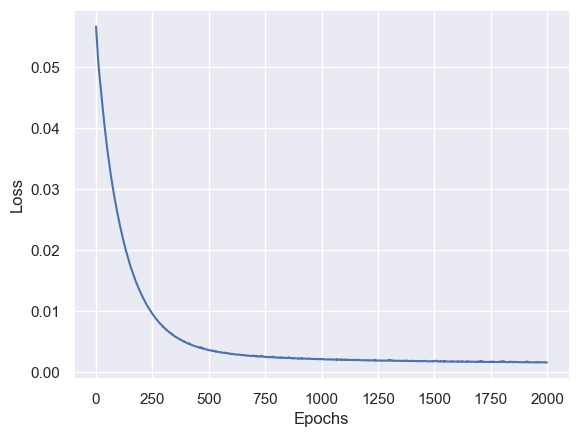

In [23]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

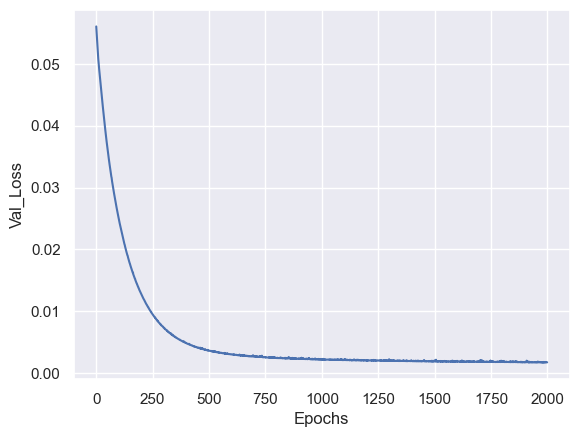

In [24]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [30]:
#modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\Alpha-Dwarfs.h5


In [25]:
predalpha = modelAlpha.predict(X_test)

37/37 [==============================] - 0s 1ms/step


In [26]:
predalpha

array([[0.03182632],
       [0.07896434],
       [0.10435659],
       ...,
       [0.0246201 ],
       [0.1500407 ],
       [0.00219869]], dtype=float32)

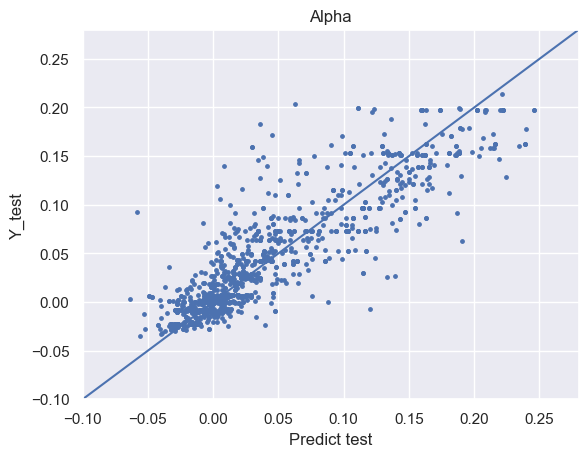

In [153]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [147]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 78.0%


In [33]:
Y_test['alpha_predict'] = predalpha

In [34]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n04s42_0000922    5614.61     4.483   -0.321        0.015   
iDR4_3_SPLUS-s02s24_0026448    5560.31     4.130   -0.243        0.106   
iDR4_3_STRIPE82-0004_0022982   5544.87     3.961   -0.099        0.093   
iDR4_3_SPLUS-s02s24_0017447    5761.52     4.284   -0.077       -0.011   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0165_0023666   5658.80     4.347   -0.320        0.020   
iDR4_3_STRIPE82-0026_0048604   5439.85     4.357    0.155       -0.018   
iDR4_3_STRIPE82-0024_0041378   5935.10     4.354   -0.190        0.023   
iDR4_3_STRIPE82-0163_0030594   5461.22     4.171   -0.579        0.077   
iDR4_3_SPLUS-n05s43_0035236    5921.95     4.228   -0.027       -0.001   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n04s42_0000922  -0.01566  0.01452 -0.01405  0.04827 -0.00999   
iDR4_3_SPLUS-s02s24_0026448   0.13407  0.09465  0.18043  0.16192  0.08490   
iDR4_3_STRIPE82-0004_0022982  0.12628  0.07488  0.07711  0.16188  0.07047   
iDR4_3_SPLUS-s02s24_0017447  -0.01317  0.00475  0.05066 -0.00191 -0.01277   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0165_0023666 -0.02459  0.04167 -0.08318  0.04102 -0.00799   
iDR4_3_STRIPE82-0026_0048604 -0.01583  0.01494  0.08558 -0.01884  0.03580   
iDR4_3_STRIPE82-0024_0041378  0.06236 -0.00044 -0.02583  0.05630  0.06819   
iDR4_3_STRIPE82-0163_0030594  0.06860  0.04682  0.04739  0.13962  0.06204   
iDR4_3_SPLUS-n05s43_0035236   0.00060 -0.02050  0.10687 -0.00689  0.01619   

                                ni_fe  alpha_predict  
ID                                                    
iDR4_3_SPLUS-n04s42_0000922   0.00288       0.031826  
iDR4_3_SPLUS-s02s24_0026448   0.06735       0.078964  
iDR4_3_STRIPE82-0004_0022982  0.04280       0.104357  
iDR4_3_SPLUS-s02s24_0017447  -0.02995       0.015733  
iDR4_3_STRIPE82-0026_0051498 -0.02686       0.072819  
...                               ...            ...  
iDR4_3_STRIPE82-0165_0023666 -0.01725       0.067154  
iDR4_3_STRIPE82-0026_0048604  0.02289      -0.023077  
iDR4_3_STRIPE82-0024_0041378  0.00515       0.024620  
iDR4_3_STRIPE82-0163_0030594  0.03031       0.150041  
iDR4_3_SPLUS-n05s43_0035236  -0.01197       0.002199  

[1172 rows x 11 columns]

In [35]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [154]:
Parametro = "CFE"
columnTrain = 'c_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [37]:
modelCFE = baseline_model_teste()

In [38]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 1000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
3/3 - 1s - loss: 0.0557 - val_loss: 0.0550 - 591ms/epoch - 197ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.0552 - val_loss: 0.0546 - 133ms/epoch - 44ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.0547 - val_loss: 0.0541 - 177ms/epoch - 59ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.0542 - val_loss: 0.0536 - 45ms/epoch - 15ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.0537 - val_loss: 0.0531 - 46ms/epoch - 15ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.0532 - val_loss: 0.0527 - 46ms/epoch - 15ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.0527 - val_loss: 0.0522 - 45ms/epoch - 15ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.0522 - val_loss: 0.0517 - 45ms/epoch - 15ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.0517 - val_loss: 0.0513 - 45ms/epoch - 15ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.0512 - val_loss: 0.0508 - 43ms/epoch - 14ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.0508 - val_loss: 0.0504 - 44ms/epoch - 15ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.0503 - val_loss: 0.0499 - 45ms/epoch - 15ms/step
Epoch 13/2000
3/3 - 0

Epoch 101/2000
3/3 - 0s - loss: 0.0252 - val_loss: 0.0251 - 70ms/epoch - 23ms/step
Epoch 102/2000
3/3 - 0s - loss: 0.0250 - val_loss: 0.0250 - 61ms/epoch - 20ms/step
Epoch 103/2000
3/3 - 0s - loss: 0.0248 - val_loss: 0.0247 - 62ms/epoch - 21ms/step
Epoch 104/2000
3/3 - 0s - loss: 0.0246 - val_loss: 0.0246 - 55ms/epoch - 18ms/step
Epoch 105/2000
3/3 - 0s - loss: 0.0245 - val_loss: 0.0244 - 70ms/epoch - 23ms/step
Epoch 106/2000
3/3 - 0s - loss: 0.0243 - val_loss: 0.0242 - 59ms/epoch - 20ms/step
Epoch 107/2000
3/3 - 0s - loss: 0.0241 - val_loss: 0.0241 - 69ms/epoch - 23ms/step
Epoch 108/2000
3/3 - 0s - loss: 0.0240 - val_loss: 0.0239 - 54ms/epoch - 18ms/step
Epoch 109/2000
3/3 - 0s - loss: 0.0238 - val_loss: 0.0237 - 68ms/epoch - 23ms/step
Epoch 110/2000
3/3 - 0s - loss: 0.0236 - val_loss: 0.0236 - 56ms/epoch - 19ms/step
Epoch 111/2000
3/3 - 0s - loss: 0.0235 - val_loss: 0.0234 - 68ms/epoch - 23ms/step
Epoch 112/2000
3/3 - 0s - loss: 0.0233 - val_loss: 0.0233 - 58ms/epoch - 19ms/step
Epoc

Epoch 200/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0131 - 59ms/epoch - 20ms/step
Epoch 201/2000
3/3 - 0s - loss: 0.0130 - val_loss: 0.0130 - 58ms/epoch - 19ms/step
Epoch 202/2000
3/3 - 0s - loss: 0.0129 - val_loss: 0.0130 - 57ms/epoch - 19ms/step
Epoch 203/2000
3/3 - 0s - loss: 0.0129 - val_loss: 0.0129 - 61ms/epoch - 20ms/step
Epoch 204/2000
3/3 - 0s - loss: 0.0128 - val_loss: 0.0128 - 58ms/epoch - 19ms/step
Epoch 205/2000
3/3 - 0s - loss: 0.0127 - val_loss: 0.0127 - 55ms/epoch - 18ms/step
Epoch 206/2000
3/3 - 0s - loss: 0.0127 - val_loss: 0.0127 - 62ms/epoch - 21ms/step
Epoch 207/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0126 - 62ms/epoch - 21ms/step
Epoch 208/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0125 - 57ms/epoch - 19ms/step
Epoch 209/2000
3/3 - 0s - loss: 0.0124 - val_loss: 0.0125 - 58ms/epoch - 19ms/step
Epoch 210/2000
3/3 - 0s - loss: 0.0124 - val_loss: 0.0124 - 61ms/epoch - 20ms/step
Epoch 211/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0124 - 57ms/epoch - 19ms/step
Epoc

Epoch 299/2000
3/3 - 0s - loss: 0.0078 - val_loss: 0.0079 - 61ms/epoch - 20ms/step
Epoch 300/2000
3/3 - 0s - loss: 0.0078 - val_loss: 0.0078 - 57ms/epoch - 19ms/step
Epoch 301/2000
3/3 - 0s - loss: 0.0077 - val_loss: 0.0078 - 61ms/epoch - 20ms/step
Epoch 302/2000
3/3 - 0s - loss: 0.0077 - val_loss: 0.0078 - 56ms/epoch - 19ms/step
Epoch 303/2000
3/3 - 0s - loss: 0.0077 - val_loss: 0.0077 - 53ms/epoch - 18ms/step
Epoch 304/2000
3/3 - 0s - loss: 0.0076 - val_loss: 0.0077 - 62ms/epoch - 21ms/step
Epoch 305/2000
3/3 - 0s - loss: 0.0076 - val_loss: 0.0077 - 63ms/epoch - 21ms/step
Epoch 306/2000
3/3 - 0s - loss: 0.0076 - val_loss: 0.0076 - 56ms/epoch - 19ms/step
Epoch 307/2000
3/3 - 0s - loss: 0.0075 - val_loss: 0.0076 - 57ms/epoch - 19ms/step
Epoch 308/2000
3/3 - 0s - loss: 0.0075 - val_loss: 0.0077 - 62ms/epoch - 21ms/step
Epoch 309/2000
3/3 - 0s - loss: 0.0075 - val_loss: 0.0075 - 59ms/epoch - 20ms/step
Epoch 310/2000
3/3 - 0s - loss: 0.0076 - val_loss: 0.0075 - 63ms/epoch - 21ms/step
Epoc

Epoch 398/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0055 - 66ms/epoch - 22ms/step
Epoch 399/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0056 - 62ms/epoch - 21ms/step
Epoch 400/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0055 - 61ms/epoch - 20ms/step
Epoch 401/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0054 - 74ms/epoch - 25ms/step
Epoch 402/2000
3/3 - 0s - loss: 0.0053 - val_loss: 0.0054 - 69ms/epoch - 23ms/step
Epoch 403/2000
3/3 - 0s - loss: 0.0053 - val_loss: 0.0054 - 66ms/epoch - 22ms/step
Epoch 404/2000
3/3 - 0s - loss: 0.0053 - val_loss: 0.0054 - 68ms/epoch - 23ms/step
Epoch 405/2000
3/3 - 0s - loss: 0.0053 - val_loss: 0.0054 - 63ms/epoch - 21ms/step
Epoch 406/2000
3/3 - 0s - loss: 0.0053 - val_loss: 0.0053 - 53ms/epoch - 18ms/step
Epoch 407/2000
3/3 - 0s - loss: 0.0052 - val_loss: 0.0054 - 59ms/epoch - 20ms/step
Epoch 408/2000
3/3 - 0s - loss: 0.0053 - val_loss: 0.0053 - 59ms/epoch - 20ms/step
Epoch 409/2000
3/3 - 0s - loss: 0.0053 - val_loss: 0.0053 - 64ms/epoch - 21ms/step
Epoc

Epoch 497/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 59ms/epoch - 20ms/step
Epoch 498/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 61ms/epoch - 20ms/step
Epoch 499/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 62ms/epoch - 21ms/step
Epoch 500/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 64ms/epoch - 21ms/step
Epoch 501/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 60ms/epoch - 20ms/step
Epoch 502/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 64ms/epoch - 21ms/step
Epoch 503/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 59ms/epoch - 20ms/step
Epoch 504/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 63ms/epoch - 21ms/step
Epoch 505/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 61ms/epoch - 20ms/step
Epoch 506/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 65ms/epoch - 22ms/step
Epoch 507/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 58ms/epoch - 19ms/step
Epoch 508/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0043 - 61ms/epoch - 20ms/step
Epoc

Epoch 596/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0038 - 60ms/epoch - 20ms/step
Epoch 597/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0037 - 57ms/epoch - 19ms/step
Epoch 598/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0039 - 64ms/epoch - 21ms/step
Epoch 599/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0038 - 66ms/epoch - 22ms/step
Epoch 600/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0038 - 66ms/epoch - 22ms/step
Epoch 601/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0037 - 59ms/epoch - 20ms/step
Epoch 602/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0038 - 57ms/epoch - 19ms/step
Epoch 603/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0037 - 62ms/epoch - 21ms/step
Epoch 604/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0038 - 62ms/epoch - 21ms/step
Epoch 605/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0037 - 59ms/epoch - 20ms/step
Epoch 606/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0037 - 56ms/epoch - 19ms/step
Epoch 607/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0037 - 59ms/epoch - 20ms/step
Epoc

Epoch 695/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0035 - 57ms/epoch - 19ms/step
Epoch 696/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0034 - 58ms/epoch - 19ms/step
Epoch 697/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0035 - 60ms/epoch - 20ms/step
Epoch 698/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0034 - 59ms/epoch - 20ms/step
Epoch 699/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0035 - 60ms/epoch - 20ms/step
Epoch 700/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0034 - 58ms/epoch - 19ms/step
Epoch 701/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0035 - 59ms/epoch - 20ms/step
Epoch 702/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0034 - 63ms/epoch - 21ms/step
Epoch 703/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0034 - 58ms/epoch - 19ms/step
Epoch 704/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0034 - 62ms/epoch - 21ms/step
Epoch 705/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0034 - 57ms/epoch - 19ms/step
Epoch 706/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0034 - 61ms/epoch - 20ms/step
Epoc

Epoch 794/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 58ms/epoch - 19ms/step
Epoch 795/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 57ms/epoch - 19ms/step
Epoch 796/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0033 - 65ms/epoch - 22ms/step
Epoch 797/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 58ms/epoch - 19ms/step
Epoch 798/2000
3/3 - 0s - loss: 0.0032 - val_loss: 0.0034 - 63ms/epoch - 21ms/step
Epoch 799/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 54ms/epoch - 18ms/step
Epoch 800/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0033 - 57ms/epoch - 19ms/step
Epoch 801/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 58ms/epoch - 19ms/step
Epoch 802/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 62ms/epoch - 21ms/step
Epoch 803/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 57ms/epoch - 19ms/step
Epoch 804/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 57ms/epoch - 19ms/step
Epoch 805/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 61ms/epoch - 20ms/step
Epoc

Epoch 893/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0034 - 60ms/epoch - 20ms/step
Epoch 894/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 62ms/epoch - 21ms/step
Epoch 895/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0033 - 55ms/epoch - 18ms/step
Epoch 896/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 59ms/epoch - 20ms/step
Epoch 897/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0034 - 56ms/epoch - 19ms/step
Epoch 898/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0031 - 54ms/epoch - 18ms/step
Epoch 899/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0032 - 59ms/epoch - 20ms/step
Epoch 900/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 59ms/epoch - 20ms/step
Epoch 901/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 59ms/epoch - 20ms/step
Epoch 902/2000
3/3 - 0s - loss: 0.0029 - val_loss: 0.0031 - 60ms/epoch - 20ms/step
Epoch 903/2000
3/3 - 0s - loss: 0.0029 - val_loss: 0.0031 - 63ms/epoch - 21ms/step
Epoch 904/2000
3/3 - 0s - loss: 0.0029 - val_loss: 0.0031 - 63ms/epoch - 21ms/step
Epoc

Epoch 992/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 60ms/epoch - 20ms/step
Epoch 993/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 56ms/epoch - 19ms/step
Epoch 994/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0031 - 57ms/epoch - 19ms/step
Epoch 995/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 59ms/epoch - 20ms/step
Epoch 996/2000
3/3 - 0s - loss: 0.0029 - val_loss: 0.0031 - 58ms/epoch - 19ms/step
Epoch 997/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 58ms/epoch - 19ms/step
Epoch 998/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 61ms/epoch - 20ms/step
Epoch 999/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 59ms/epoch - 20ms/step
Epoch 1000/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 58ms/epoch - 19ms/step
Epoch 1001/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 59ms/epoch - 20ms/step
Epoch 1002/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 61ms/epoch - 20ms/step
Epoch 1003/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0031 - 57ms/epoch - 19ms/step


Epoch 1090/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 58ms/epoch - 19ms/step
Epoch 1091/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 61ms/epoch - 20ms/step
Epoch 1092/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 60ms/epoch - 20ms/step
Epoch 1093/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 57ms/epoch - 19ms/step
Epoch 1094/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 65ms/epoch - 22ms/step
Epoch 1095/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 61ms/epoch - 20ms/step
Epoch 1096/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 62ms/epoch - 21ms/step
Epoch 1097/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 61ms/epoch - 20ms/step
Epoch 1098/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0030 - 56ms/epoch - 19ms/step
Epoch 1099/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 56ms/epoch - 19ms/step
Epoch 1100/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 55ms/epoch - 18ms/step
Epoch 1101/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 56ms/epoch - 19

Epoch 1188/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0030 - 59ms/epoch - 20ms/step
Epoch 1189/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 60ms/epoch - 20ms/step
Epoch 1190/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0029 - 59ms/epoch - 20ms/step
Epoch 1191/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0029 - 59ms/epoch - 20ms/step
Epoch 1192/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 56ms/epoch - 19ms/step
Epoch 1193/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0029 - 57ms/epoch - 19ms/step
Epoch 1194/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0029 - 61ms/epoch - 20ms/step
Epoch 1195/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0029 - 57ms/epoch - 19ms/step
Epoch 1196/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0029 - 58ms/epoch - 19ms/step
Epoch 1197/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0028 - 57ms/epoch - 19ms/step
Epoch 1198/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0029 - 62ms/epoch - 21ms/step
Epoch 1199/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0030 - 63ms/epoch - 21

Epoch 1286/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0029 - 55ms/epoch - 18ms/step
Epoch 1287/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 57ms/epoch - 19ms/step
Epoch 1288/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 61ms/epoch - 20ms/step
Epoch 1289/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 57ms/epoch - 19ms/step
Epoch 1290/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 59ms/epoch - 20ms/step
Epoch 1291/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 59ms/epoch - 20ms/step
Epoch 1292/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 58ms/epoch - 19ms/step
Epoch 1293/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 54ms/epoch - 18ms/step
Epoch 1294/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0029 - 66ms/epoch - 22ms/step
Epoch 1295/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 56ms/epoch - 19ms/step
Epoch 1296/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 54ms/epoch - 18ms/step
Epoch 1297/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 57ms/epoch - 19

Epoch 1384/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 69ms/epoch - 23ms/step
Epoch 1385/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 108ms/epoch - 36ms/step
Epoch 1386/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 66ms/epoch - 22ms/step
Epoch 1387/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 70ms/epoch - 23ms/step
Epoch 1388/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 61ms/epoch - 20ms/step
Epoch 1389/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 68ms/epoch - 23ms/step
Epoch 1390/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 64ms/epoch - 21ms/step
Epoch 1391/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 69ms/epoch - 23ms/step
Epoch 1392/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 1393/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 62ms/epoch - 21ms/step
Epoch 1394/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 57ms/epoch - 19ms/step
Epoch 1395/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 68ms/epoch - 2

Epoch 1482/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 64ms/epoch - 21ms/step
Epoch 1483/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 65ms/epoch - 22ms/step
Epoch 1484/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 1485/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 1486/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 66ms/epoch - 22ms/step
Epoch 1487/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 1488/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 66ms/epoch - 22ms/step
Epoch 1489/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0029 - 59ms/epoch - 20ms/step
Epoch 1490/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 65ms/epoch - 22ms/step
Epoch 1491/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 61ms/epoch - 20ms/step
Epoch 1492/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 61ms/epoch - 20ms/step
Epoch 1493/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 58ms/epoch - 19

Epoch 1580/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 58ms/epoch - 19ms/step
Epoch 1581/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0028 - 59ms/epoch - 20ms/step
Epoch 1582/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 62ms/epoch - 21ms/step
Epoch 1583/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 59ms/epoch - 20ms/step
Epoch 1584/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 62ms/epoch - 21ms/step
Epoch 1585/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 62ms/epoch - 21ms/step
Epoch 1586/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 1587/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 64ms/epoch - 21ms/step
Epoch 1588/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0028 - 58ms/epoch - 19ms/step
Epoch 1589/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 62ms/epoch - 21ms/step
Epoch 1590/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 1591/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 107ms/epoch - 3

Epoch 1678/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 62ms/epoch - 21ms/step
Epoch 1679/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 56ms/epoch - 19ms/step
Epoch 1680/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 59ms/epoch - 20ms/step
Epoch 1681/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 61ms/epoch - 20ms/step
Epoch 1682/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 57ms/epoch - 19ms/step
Epoch 1683/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 60ms/epoch - 20ms/step
Epoch 1684/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 62ms/epoch - 21ms/step
Epoch 1685/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 57ms/epoch - 19ms/step
Epoch 1686/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 64ms/epoch - 21ms/step
Epoch 1687/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 57ms/epoch - 19ms/step
Epoch 1688/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 61ms/epoch - 20ms/step
Epoch 1689/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0028 - 56ms/epoch - 19

Epoch 1776/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 57ms/epoch - 19ms/step
Epoch 1777/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 56ms/epoch - 19ms/step
Epoch 1778/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 60ms/epoch - 20ms/step
Epoch 1779/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 60ms/epoch - 20ms/step
Epoch 1780/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 61ms/epoch - 20ms/step
Epoch 1781/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 64ms/epoch - 21ms/step
Epoch 1782/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 57ms/epoch - 19ms/step
Epoch 1783/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 58ms/epoch - 19ms/step
Epoch 1784/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 59ms/epoch - 20ms/step
Epoch 1785/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0028 - 67ms/epoch - 22ms/step
Epoch 1786/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 57ms/epoch - 19ms/step
Epoch 1787/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 60ms/epoch - 20

Epoch 1874/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 60ms/epoch - 20ms/step
Epoch 1875/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 60ms/epoch - 20ms/step
Epoch 1876/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 57ms/epoch - 19ms/step
Epoch 1877/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 60ms/epoch - 20ms/step
Epoch 1878/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 61ms/epoch - 20ms/step
Epoch 1879/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 67ms/epoch - 22ms/step
Epoch 1880/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0028 - 54ms/epoch - 18ms/step
Epoch 1881/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 57ms/epoch - 19ms/step
Epoch 1882/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 61ms/epoch - 20ms/step
Epoch 1883/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 65ms/epoch - 22ms/step
Epoch 1884/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 58ms/epoch - 19ms/step
Epoch 1885/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0027 - 62ms/epoch - 21

Epoch 1972/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 55ms/epoch - 18ms/step
Epoch 1973/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0026 - 56ms/epoch - 19ms/step
Epoch 1974/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0026 - 63ms/epoch - 21ms/step
Epoch 1975/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 1976/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 60ms/epoch - 20ms/step
Epoch 1977/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0026 - 54ms/epoch - 18ms/step
Epoch 1978/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 55ms/epoch - 18ms/step
Epoch 1979/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0026 - 58ms/epoch - 19ms/step
Epoch 1980/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0026 - 64ms/epoch - 21ms/step
Epoch 1981/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0027 - 57ms/epoch - 19ms/step
Epoch 1982/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 58ms/epoch - 19ms/step
Epoch 1983/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0026 - 60ms/epoch - 20

Text(0, 0.5, 'Loss')

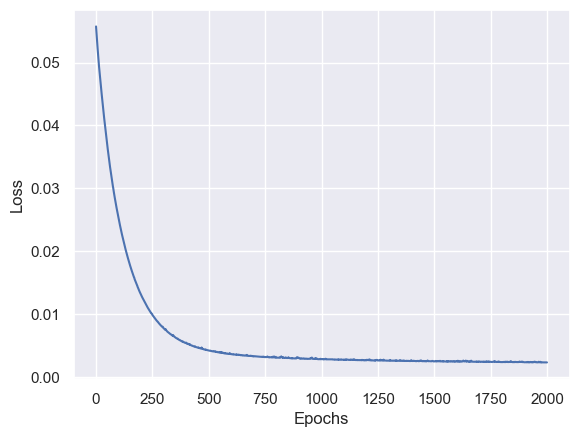

In [39]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

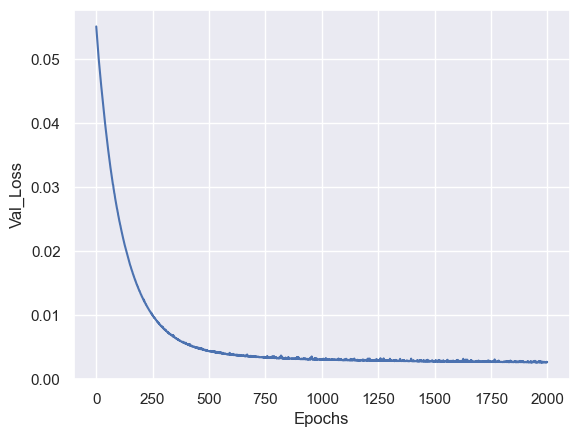

In [40]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [48]:
#modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CFE-Dwarfs.h5


In [42]:
predCFE = modelCFE.predict(X_test)

37/37 [==============================] - 0s 2ms/step


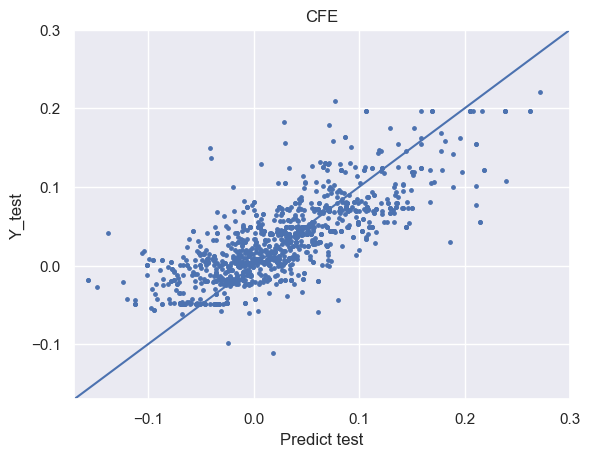

In [156]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [151]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 57.99999999999999%


In [45]:
Y_test['CFE_predict'] = predCFE

In [46]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n04s42_0000922    5614.61     4.483   -0.321        0.015   
iDR4_3_SPLUS-s02s24_0026448    5560.31     4.130   -0.243        0.106   
iDR4_3_STRIPE82-0004_0022982   5544.87     3.961   -0.099        0.093   
iDR4_3_SPLUS-s02s24_0017447    5761.52     4.284   -0.077       -0.011   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0165_0023666   5658.80     4.347   -0.320        0.020   
iDR4_3_STRIPE82-0026_0048604   5439.85     4.357    0.155       -0.018   
iDR4_3_STRIPE82-0024_0041378   5935.10     4.354   -0.190        0.023   
iDR4_3_STRIPE82-0163_0030594   5461.22     4.171   -0.579        0.077   
iDR4_3_SPLUS-n05s43_0035236    5921.95     4.228   -0.027       -0.001   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n04s42_0000922  -0.01566  0.01452 -0.01405  0.04827 -0.00999   
iDR4_3_SPLUS-s02s24_0026448   0.13407  0.09465  0.18043  0.16192  0.08490   
iDR4_3_STRIPE82-0004_0022982  0.12628  0.07488  0.07711  0.16188  0.07047   
iDR4_3_SPLUS-s02s24_0017447  -0.01317  0.00475  0.05066 -0.00191 -0.01277   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0165_0023666 -0.02459  0.04167 -0.08318  0.04102 -0.00799   
iDR4_3_STRIPE82-0026_0048604 -0.01583  0.01494  0.08558 -0.01884  0.03580   
iDR4_3_STRIPE82-0024_0041378  0.06236 -0.00044 -0.02583  0.05630  0.06819   
iDR4_3_STRIPE82-0163_0030594  0.06860  0.04682  0.04739  0.13962  0.06204   
iDR4_3_SPLUS-n05s43_0035236   0.00060 -0.02050  0.10687 -0.00689  0.01619   

                                ni_fe  alpha_predict  CFE_predict  
ID                                                                 
iDR4_3_SPLUS-n04s42_0000922   0.00288       0.031826     0.041717  
iDR4_3_SPLUS-s02s24_0026448   0.06735       0.078964     0.090356  
iDR4_3_STRIPE82-0004_0022982  0.04280       0.104357     0.084881  
iDR4_3_SPLUS-s02s24_0017447  -0.02995       0.015733    -0.001886  
iDR4_3_STRIPE82-0026_0051498 -0.02686       0.072819     0.049584  
...                               ...            ...          ...  
iDR4_3_STRIPE82-0165_0023666 -0.01725       0.067154     0.047232  
iDR4_3_STRIPE82-0026_0048604  0.02289      -0.023077     0.003027  
iDR4_3_STRIPE82-0024_0041378  0.00515       0.024620     0.029432  
iDR4_3_STRIPE82-0163_0030594  0.03031       0.150041     0.076970  
iDR4_3_SPLUS-n05s43_0035236  -0.01197       0.002199     0.009469  

[1172 rows x 12 columns]

In [47]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [157]:
Parametro = "CAFE"
columnTrain = 'ca_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [131]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0030564   5660.24     4.056   -0.956        0.246   
iDR4_3_STRIPE82-0026_0055354   5389.94     4.378   -0.353        0.131   
iDR4_3_STRIPE82-0026_0055354   5476.56     4.511   -0.425        0.160   
iDR4_3_SPLUS-s02s23_0001813    5823.78     4.284    0.018       -0.004   
iDR4_3_SPLUS-n02n27_0040307    5961.30     4.298   -0.498        0.052   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0033335    5557.02     4.383   -0.680        0.176   
iDR4_3_STRIPE82-0026_0051498   5644.89     4.379   -0.401        0.070   
iDR4_3_SPLUS-n07s43_0052159    5856.57     4.310   -0.574        0.133   
iDR4_3_STRIPE82-0024_0033734   5407.46     4.086    0.114        0.000   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0030564  0.26149  0.17125 -0.02060  0.33459  0.22452   
iDR4_3_STRIPE82-0026_0055354  0.05224  0.14798 -0.09113  0.19951  0.09237   
iDR4_3_STRIPE82-0026_0055354  0.08743  0.14381  0.23128  0.23816  0.17027   
iDR4_3_SPLUS-s02s23_0001813   0.01215 -0.00054  0.26834  0.01510 -0.00606   
iDR4_3_SPLUS-n02n27_0040307   0.11575  0.10684  0.05188  0.07724  0.04637   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0033335   0.20119  0.20564 -0.05531  0.26289  0.16825   
iDR4_3_STRIPE82-0026_0051498  0.05757  0.08006 -0.00527  0.11223  0.05705   
iDR4_3_SPLUS-n07s43_0052159   0.12070  0.27770 -0.10408  0.21106  0.09006   
iDR4_3_STRIPE82-0024_0033734  0.04154  0.00397  0.14313  0.03065  0.05357   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0024_0030564  0.09300  
iDR4_3_STRIPE82-0026_0055354  0.02761  
iDR4_3_STRIPE82-0026_0055354  0.02332  
iDR4_3_SPLUS-s02s23_0001813   0.02205  
iDR4_3_SPLUS-n02n27_0040307  -0.01119  
...                               ...  
iDR4_3_SPLUS-n05s44_0033335   0.12831  
iDR4_3_STRIPE82-0026_0051498 -0.00078  
iDR4_3_SPLUS-n07s43_0052159  -0.00112  
iDR4_3_STRIPE82-0024_0033734  0.05678  
iDR4_3_STRIPE82-0026_0051498 -0.02686  

[4216 rows x 10 columns]

In [132]:
modelCAFE = baseline_model_teste()

In [133]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 1200, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1200
3/3 - 1s - loss: 0.0566 - val_loss: 0.0555 - 547ms/epoch - 182ms/step
Epoch 2/1200
3/3 - 0s - loss: 0.0559 - val_loss: 0.0549 - 57ms/epoch - 19ms/step
Epoch 3/1200
3/3 - 0s - loss: 0.0553 - val_loss: 0.0543 - 58ms/epoch - 19ms/step
Epoch 4/1200
3/3 - 0s - loss: 0.0547 - val_loss: 0.0537 - 53ms/epoch - 18ms/step
Epoch 5/1200
3/3 - 0s - loss: 0.0541 - val_loss: 0.0531 - 57ms/epoch - 19ms/step
Epoch 6/1200
3/3 - 0s - loss: 0.0535 - val_loss: 0.0526 - 56ms/epoch - 19ms/step
Epoch 7/1200
3/3 - 0s - loss: 0.0530 - val_loss: 0.0521 - 51ms/epoch - 17ms/step
Epoch 8/1200
3/3 - 0s - loss: 0.0524 - val_loss: 0.0516 - 57ms/epoch - 19ms/step
Epoch 9/1200
3/3 - 0s - loss: 0.0519 - val_loss: 0.0512 - 55ms/epoch - 18ms/step
Epoch 10/1200
3/3 - 0s - loss: 0.0514 - val_loss: 0.0507 - 55ms/epoch - 18ms/step
Epoch 11/1200
3/3 - 0s - loss: 0.0509 - val_loss: 0.0502 - 56ms/epoch - 19ms/step
Epoch 12/1200
3/3 - 0s - loss: 0.0504 - val_loss: 0.0498 - 64ms/epoch - 21ms/step
Epoch 13/1200
3/3 - 0s 

Epoch 101/1200
3/3 - 0s - loss: 0.0252 - val_loss: 0.0250 - 53ms/epoch - 18ms/step
Epoch 102/1200
3/3 - 0s - loss: 0.0250 - val_loss: 0.0249 - 51ms/epoch - 17ms/step
Epoch 103/1200
3/3 - 0s - loss: 0.0248 - val_loss: 0.0247 - 52ms/epoch - 17ms/step
Epoch 104/1200
3/3 - 0s - loss: 0.0246 - val_loss: 0.0245 - 50ms/epoch - 17ms/step
Epoch 105/1200
3/3 - 0s - loss: 0.0245 - val_loss: 0.0243 - 49ms/epoch - 16ms/step
Epoch 106/1200
3/3 - 0s - loss: 0.0243 - val_loss: 0.0241 - 47ms/epoch - 16ms/step
Epoch 107/1200
3/3 - 0s - loss: 0.0241 - val_loss: 0.0240 - 48ms/epoch - 16ms/step
Epoch 108/1200
3/3 - 0s - loss: 0.0240 - val_loss: 0.0238 - 49ms/epoch - 16ms/step
Epoch 109/1200
3/3 - 0s - loss: 0.0238 - val_loss: 0.0236 - 50ms/epoch - 17ms/step
Epoch 110/1200
3/3 - 0s - loss: 0.0236 - val_loss: 0.0235 - 49ms/epoch - 16ms/step
Epoch 111/1200
3/3 - 0s - loss: 0.0235 - val_loss: 0.0233 - 48ms/epoch - 16ms/step
Epoch 112/1200
3/3 - 0s - loss: 0.0233 - val_loss: 0.0231 - 50ms/epoch - 17ms/step
Epoc

Epoch 200/1200
3/3 - 0s - loss: 0.0131 - val_loss: 0.0131 - 73ms/epoch - 24ms/step
Epoch 201/1200
3/3 - 0s - loss: 0.0130 - val_loss: 0.0129 - 55ms/epoch - 18ms/step
Epoch 202/1200
3/3 - 0s - loss: 0.0129 - val_loss: 0.0128 - 57ms/epoch - 19ms/step
Epoch 203/1200
3/3 - 0s - loss: 0.0128 - val_loss: 0.0129 - 60ms/epoch - 20ms/step
Epoch 204/1200
3/3 - 0s - loss: 0.0128 - val_loss: 0.0127 - 59ms/epoch - 20ms/step
Epoch 205/1200
3/3 - 0s - loss: 0.0127 - val_loss: 0.0126 - 59ms/epoch - 20ms/step
Epoch 206/1200
3/3 - 0s - loss: 0.0126 - val_loss: 0.0125 - 59ms/epoch - 20ms/step
Epoch 207/1200
3/3 - 0s - loss: 0.0125 - val_loss: 0.0125 - 57ms/epoch - 19ms/step
Epoch 208/1200
3/3 - 0s - loss: 0.0125 - val_loss: 0.0124 - 55ms/epoch - 18ms/step
Epoch 209/1200
3/3 - 0s - loss: 0.0124 - val_loss: 0.0123 - 64ms/epoch - 21ms/step
Epoch 210/1200
3/3 - 0s - loss: 0.0123 - val_loss: 0.0123 - 55ms/epoch - 18ms/step
Epoch 211/1200
3/3 - 0s - loss: 0.0122 - val_loss: 0.0122 - 59ms/epoch - 20ms/step
Epoc

Epoch 299/1200
3/3 - 0s - loss: 0.0076 - val_loss: 0.0076 - 54ms/epoch - 18ms/step
Epoch 300/1200
3/3 - 0s - loss: 0.0076 - val_loss: 0.0076 - 57ms/epoch - 19ms/step
Epoch 301/1200
3/3 - 0s - loss: 0.0076 - val_loss: 0.0076 - 68ms/epoch - 23ms/step
Epoch 302/1200
3/3 - 0s - loss: 0.0075 - val_loss: 0.0075 - 62ms/epoch - 21ms/step
Epoch 303/1200
3/3 - 0s - loss: 0.0075 - val_loss: 0.0075 - 59ms/epoch - 20ms/step
Epoch 304/1200
3/3 - 0s - loss: 0.0074 - val_loss: 0.0074 - 59ms/epoch - 20ms/step
Epoch 305/1200
3/3 - 0s - loss: 0.0074 - val_loss: 0.0074 - 60ms/epoch - 20ms/step
Epoch 306/1200
3/3 - 0s - loss: 0.0074 - val_loss: 0.0074 - 55ms/epoch - 18ms/step
Epoch 307/1200
3/3 - 0s - loss: 0.0073 - val_loss: 0.0073 - 60ms/epoch - 20ms/step
Epoch 308/1200
3/3 - 0s - loss: 0.0073 - val_loss: 0.0073 - 59ms/epoch - 20ms/step
Epoch 309/1200
3/3 - 0s - loss: 0.0073 - val_loss: 0.0073 - 60ms/epoch - 20ms/step
Epoch 310/1200
3/3 - 0s - loss: 0.0072 - val_loss: 0.0072 - 65ms/epoch - 22ms/step
Epoc

Epoch 398/1200
3/3 - 0s - loss: 0.0051 - val_loss: 0.0051 - 58ms/epoch - 19ms/step
Epoch 399/1200
3/3 - 0s - loss: 0.0052 - val_loss: 0.0051 - 58ms/epoch - 19ms/step
Epoch 400/1200
3/3 - 0s - loss: 0.0051 - val_loss: 0.0051 - 60ms/epoch - 20ms/step
Epoch 401/1200
3/3 - 0s - loss: 0.0051 - val_loss: 0.0050 - 65ms/epoch - 22ms/step
Epoch 402/1200
3/3 - 0s - loss: 0.0050 - val_loss: 0.0051 - 63ms/epoch - 21ms/step
Epoch 403/1200
3/3 - 0s - loss: 0.0050 - val_loss: 0.0050 - 60ms/epoch - 20ms/step
Epoch 404/1200
3/3 - 0s - loss: 0.0050 - val_loss: 0.0051 - 61ms/epoch - 20ms/step
Epoch 405/1200
3/3 - 0s - loss: 0.0050 - val_loss: 0.0049 - 62ms/epoch - 21ms/step
Epoch 406/1200
3/3 - 0s - loss: 0.0050 - val_loss: 0.0050 - 57ms/epoch - 19ms/step
Epoch 407/1200
3/3 - 0s - loss: 0.0050 - val_loss: 0.0049 - 62ms/epoch - 21ms/step
Epoch 408/1200
3/3 - 0s - loss: 0.0049 - val_loss: 0.0049 - 58ms/epoch - 19ms/step
Epoch 409/1200
3/3 - 0s - loss: 0.0049 - val_loss: 0.0049 - 56ms/epoch - 19ms/step
Epoc

Epoch 497/1200
3/3 - 0s - loss: 0.0039 - val_loss: 0.0039 - 56ms/epoch - 19ms/step
Epoch 498/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0038 - 54ms/epoch - 18ms/step
Epoch 499/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0038 - 61ms/epoch - 20ms/step
Epoch 500/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0039 - 58ms/epoch - 19ms/step
Epoch 501/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0038 - 65ms/epoch - 22ms/step
Epoch 502/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0039 - 54ms/epoch - 18ms/step
Epoch 503/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0038 - 58ms/epoch - 19ms/step
Epoch 504/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0039 - 55ms/epoch - 18ms/step
Epoch 505/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0038 - 58ms/epoch - 19ms/step
Epoch 506/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0038 - 58ms/epoch - 19ms/step
Epoch 507/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0038 - 58ms/epoch - 19ms/step
Epoch 508/1200
3/3 - 0s - loss: 0.0038 - val_loss: 0.0038 - 57ms/epoch - 19ms/step
Epoc

Epoch 596/1200
3/3 - 0s - loss: 0.0033 - val_loss: 0.0032 - 48ms/epoch - 16ms/step
Epoch 597/1200
3/3 - 0s - loss: 0.0033 - val_loss: 0.0033 - 50ms/epoch - 17ms/step
Epoch 598/1200
3/3 - 0s - loss: 0.0032 - val_loss: 0.0033 - 48ms/epoch - 16ms/step
Epoch 599/1200
3/3 - 0s - loss: 0.0032 - val_loss: 0.0033 - 49ms/epoch - 16ms/step
Epoch 600/1200
3/3 - 0s - loss: 0.0032 - val_loss: 0.0033 - 45ms/epoch - 15ms/step
Epoch 601/1200
3/3 - 0s - loss: 0.0032 - val_loss: 0.0032 - 47ms/epoch - 16ms/step
Epoch 602/1200
3/3 - 0s - loss: 0.0032 - val_loss: 0.0033 - 50ms/epoch - 17ms/step
Epoch 603/1200
3/3 - 0s - loss: 0.0032 - val_loss: 0.0032 - 47ms/epoch - 16ms/step
Epoch 604/1200
3/3 - 0s - loss: 0.0032 - val_loss: 0.0033 - 47ms/epoch - 16ms/step
Epoch 605/1200
3/3 - 0s - loss: 0.0032 - val_loss: 0.0032 - 46ms/epoch - 15ms/step
Epoch 606/1200
3/3 - 0s - loss: 0.0032 - val_loss: 0.0032 - 49ms/epoch - 16ms/step
Epoch 607/1200
3/3 - 0s - loss: 0.0032 - val_loss: 0.0032 - 46ms/epoch - 15ms/step
Epoc

Epoch 695/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0029 - 58ms/epoch - 19ms/step
Epoch 696/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0029 - 60ms/epoch - 20ms/step
Epoch 697/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0029 - 56ms/epoch - 19ms/step
Epoch 698/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0029 - 61ms/epoch - 20ms/step
Epoch 699/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0029 - 64ms/epoch - 21ms/step
Epoch 700/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0029 - 56ms/epoch - 19ms/step
Epoch 701/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0029 - 58ms/epoch - 19ms/step
Epoch 702/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0030 - 59ms/epoch - 20ms/step
Epoch 703/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0029 - 60ms/epoch - 20ms/step
Epoch 704/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0030 - 60ms/epoch - 20ms/step
Epoch 705/1200
3/3 - 0s - loss: 0.0029 - val_loss: 0.0029 - 58ms/epoch - 19ms/step
Epoch 706/1200
3/3 - 0s - loss: 0.0030 - val_loss: 0.0029 - 59ms/epoch - 20ms/step
Epoc

Epoch 794/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 55ms/epoch - 18ms/step
Epoch 795/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 57ms/epoch - 19ms/step
Epoch 796/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0028 - 58ms/epoch - 19ms/step
Epoch 797/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 55ms/epoch - 18ms/step
Epoch 798/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 54ms/epoch - 18ms/step
Epoch 799/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 58ms/epoch - 19ms/step
Epoch 800/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0028 - 60ms/epoch - 20ms/step
Epoch 801/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 69ms/epoch - 23ms/step
Epoch 802/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 62ms/epoch - 21ms/step
Epoch 803/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 804/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 56ms/epoch - 19ms/step
Epoch 805/1200
3/3 - 0s - loss: 0.0027 - val_loss: 0.0027 - 57ms/epoch - 19ms/step
Epoc

Epoch 893/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 63ms/epoch - 21ms/step
Epoch 894/1200
3/3 - 0s - loss: 0.0026 - val_loss: 0.0026 - 63ms/epoch - 21ms/step
Epoch 895/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 55ms/epoch - 18ms/step
Epoch 896/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 62ms/epoch - 21ms/step
Epoch 897/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 56ms/epoch - 19ms/step
Epoch 898/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 61ms/epoch - 20ms/step
Epoch 899/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 60ms/epoch - 20ms/step
Epoch 900/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 62ms/epoch - 21ms/step
Epoch 901/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 62ms/epoch - 21ms/step
Epoch 902/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 64ms/epoch - 21ms/step
Epoch 903/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 60ms/epoch - 20ms/step
Epoch 904/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 59ms/epoch - 20ms/step
Epoc

Epoch 992/1200
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 62ms/epoch - 21ms/step
Epoch 993/1200
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 58ms/epoch - 19ms/step
Epoch 994/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 995/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0025 - 62ms/epoch - 21ms/step
Epoch 996/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0025 - 59ms/epoch - 20ms/step
Epoch 997/1200
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 57ms/epoch - 19ms/step
Epoch 998/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 59ms/epoch - 20ms/step
Epoch 999/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0025 - 59ms/epoch - 20ms/step
Epoch 1000/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0026 - 60ms/epoch - 20ms/step
Epoch 1001/1200
3/3 - 0s - loss: 0.0025 - val_loss: 0.0025 - 61ms/epoch - 20ms/step
Epoch 1002/1200
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 67ms/epoch - 22ms/step
Epoch 1003/1200
3/3 - 0s - loss: 0.0024 - val_loss: 0.0024 - 58ms/epoch - 19ms/step


Epoch 1090/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 58ms/epoch - 19ms/step
Epoch 1091/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 59ms/epoch - 20ms/step
Epoch 1092/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 61ms/epoch - 20ms/step
Epoch 1093/1200
3/3 - 0s - loss: 0.0024 - val_loss: 0.0024 - 62ms/epoch - 21ms/step
Epoch 1094/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 60ms/epoch - 20ms/step
Epoch 1095/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 79ms/epoch - 26ms/step
Epoch 1096/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 60ms/epoch - 20ms/step
Epoch 1097/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 61ms/epoch - 20ms/step
Epoch 1098/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 63ms/epoch - 21ms/step
Epoch 1099/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 66ms/epoch - 22ms/step
Epoch 1100/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 60ms/epoch - 20ms/step
Epoch 1101/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 64ms/epoch - 21

Epoch 1188/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 61ms/epoch - 20ms/step
Epoch 1189/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 60ms/epoch - 20ms/step
Epoch 1190/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 62ms/epoch - 21ms/step
Epoch 1191/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 64ms/epoch - 21ms/step
Epoch 1192/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 61ms/epoch - 20ms/step
Epoch 1193/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 56ms/epoch - 19ms/step
Epoch 1194/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 57ms/epoch - 19ms/step
Epoch 1195/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 57ms/epoch - 19ms/step
Epoch 1196/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 63ms/epoch - 21ms/step
Epoch 1197/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 66ms/epoch - 22ms/step
Epoch 1198/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 64ms/epoch - 21ms/step
Epoch 1199/1200
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 63ms/epoch - 21

Text(0, 0.5, 'Loss')

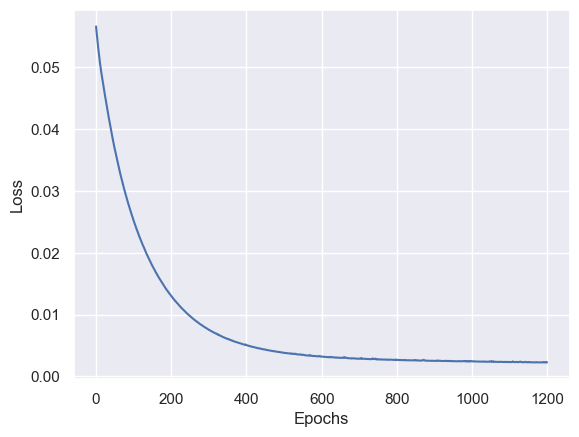

In [134]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

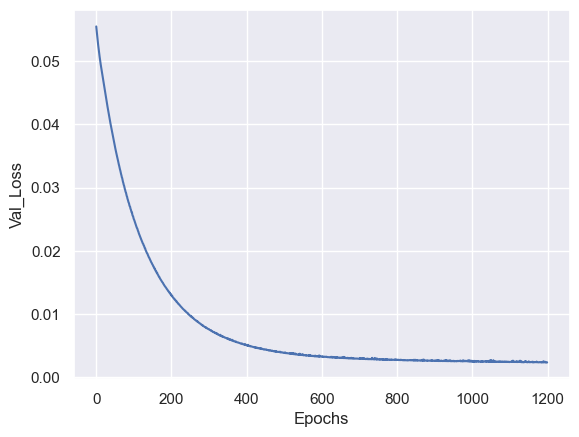

In [135]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [55]:
#modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CAFE-Dwarfs.h5


In [136]:
predCAFE = modelCAFE.predict(X_test)

37/37 [==============================] - 0s 3ms/step


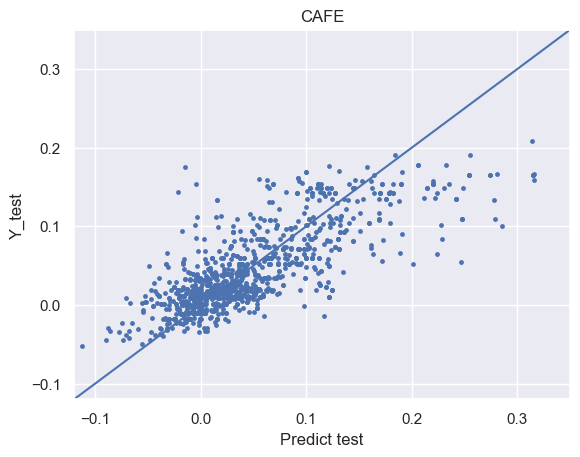

In [158]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [138]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 61.0%


In [139]:
Y_test['CAFE_predict'] = predCAFE

In [140]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n04s42_0000922    5614.61     4.483   -0.321        0.015   
iDR4_3_SPLUS-s02s24_0026448    5560.31     4.130   -0.243        0.106   
iDR4_3_STRIPE82-0004_0022982   5544.87     3.961   -0.099        0.093   
iDR4_3_SPLUS-s02s24_0017447    5761.52     4.284   -0.077       -0.011   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0165_0023666   5658.80     4.347   -0.320        0.020   
iDR4_3_STRIPE82-0026_0048604   5439.85     4.357    0.155       -0.018   
iDR4_3_STRIPE82-0024_0041378   5935.10     4.354   -0.190        0.023   
iDR4_3_STRIPE82-0163_0030594   5461.22     4.171   -0.579        0.077   
iDR4_3_SPLUS-n05s43_0035236    5921.95     4.228   -0.027       -0.001   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n04s42_0000922  -0.01566  0.01452 -0.01405  0.04827 -0.00999   
iDR4_3_SPLUS-s02s24_0026448   0.13407  0.09465  0.18043  0.16192  0.08490   
iDR4_3_STRIPE82-0004_0022982  0.12628  0.07488  0.07711  0.16188  0.07047   
iDR4_3_SPLUS-s02s24_0017447  -0.01317  0.00475  0.05066 -0.00191 -0.01277   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0165_0023666 -0.02459  0.04167 -0.08318  0.04102 -0.00799   
iDR4_3_STRIPE82-0026_0048604 -0.01583  0.01494  0.08558 -0.01884  0.03580   
iDR4_3_STRIPE82-0024_0041378  0.06236 -0.00044 -0.02583  0.05630  0.06819   
iDR4_3_STRIPE82-0163_0030594  0.06860  0.04682  0.04739  0.13962  0.06204   
iDR4_3_SPLUS-n05s43_0035236   0.00060 -0.02050  0.10687 -0.00689  0.01619   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n04s42_0000922   0.00288       0.031826     0.041717   
iDR4_3_SPLUS-s02s24_0026448   0.06735       0.078964     0.090356   
iDR4_3_STRIPE82-0004_0022982  0.04280       0.104357     0.084881   
iDR4_3_SPLUS-s02s24_0017447  -0.02995       0.015733    -0.001886   
iDR4_3_STRIPE82-0026_0051498 -0.02686       0.072819     0.049584   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0165_0023666 -0.01725       0.067154     0.047232   
iDR4_3_STRIPE82-0026_0048604  0.02289      -0.023077     0.003027   
iDR4_3_STRIPE82-0024_0041378  0.00515       0.024620     0.029432   
iDR4_3_STRIPE82-0163_0030594  0.03031       0.150041     0.076970   
iDR4_3_SPLUS-n05s43_0035236  -0.01197       0.002199     0.009469   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_SPLUS-n04s42_0000922       0.036102     0.018725      0.062342   
iDR4_3_SPLUS-s02s24_0026448       0.052726     0.117048      0.151424   
iDR4_3_STRIPE82-0004_0022982      0.083700     0.053592      0.189259   
iDR4_3_SPLUS-s02s24_0017447       0.036373     0.021180      0.015744   
iDR4_3_STRIPE82-0026_0051498      0.059980     0.018950      0.113221   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0165_0023666      0.082037    -0.006235      0.078811   
iDR4_3_STRIPE82-0026_0048604     -0.017991     0.074290     -0.001422   
iDR4_3_STRIPE82-0024_0041378      0.017039     0.090615      0.037429   
iDR4_3_STRIPE82-0163_0030594      0.115488    -0.059289      0.224790   
iDR4_3_SPLUS-n05s43_0035236      -0.004839     0.020839     -0.007620   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_SPLUS-n04s42_0000922       0.011189      0.017904  
iDR4_3_SPLUS-s02s24_0026448       0.0632

In [141]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [159]:
Parametro = "NFE"
columnTrain = 'n_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [63]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0030564   5660.24     4.056   -0.956        0.246   
iDR4_3_STRIPE82-0026_0055354   5389.94     4.378   -0.353        0.131   
iDR4_3_STRIPE82-0026_0055354   5476.56     4.511   -0.425        0.160   
iDR4_3_SPLUS-s02s23_0001813    5823.78     4.284    0.018       -0.004   
iDR4_3_SPLUS-n02n27_0040307    5961.30     4.298   -0.498        0.052   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0033335    5557.02     4.383   -0.680        0.176   
iDR4_3_STRIPE82-0026_0051498   5644.89     4.379   -0.401        0.070   
iDR4_3_SPLUS-n07s43_0052159    5856.57     4.310   -0.574        0.133   
iDR4_3_STRIPE82-0024_0033734   5407.46     4.086    0.114        0.000   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0030564  0.26149  0.17125 -0.02060  0.33459  0.22452   
iDR4_3_STRIPE82-0026_0055354  0.05224  0.14798 -0.09113  0.19951  0.09237   
iDR4_3_STRIPE82-0026_0055354  0.08743  0.14381  0.23128  0.23816  0.17027   
iDR4_3_SPLUS-s02s23_0001813   0.01215 -0.00054  0.26834  0.01510 -0.00606   
iDR4_3_SPLUS-n02n27_0040307   0.11575  0.10684  0.05188  0.07724  0.04637   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0033335   0.20119  0.20564 -0.05531  0.26289  0.16825   
iDR4_3_STRIPE82-0026_0051498  0.05757  0.08006 -0.00527  0.11223  0.05705   
iDR4_3_SPLUS-n07s43_0052159   0.12070  0.27770 -0.10408  0.21106  0.09006   
iDR4_3_STRIPE82-0024_0033734  0.04154  0.00397  0.14313  0.03065  0.05357   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0024_0030564  0.09300  
iDR4_3_STRIPE82-0026_0055354  0.02761  
iDR4_3_STRIPE82-0026_0055354  0.02332  
iDR4_3_SPLUS-s02s23_0001813   0.02205  
iDR4_3_SPLUS-n02n27_0040307  -0.01119  
...                               ...  
iDR4_3_SPLUS-n05s44_0033335   0.12831  
iDR4_3_STRIPE82-0026_0051498 -0.00078  
iDR4_3_SPLUS-n07s43_0052159  -0.00112  
iDR4_3_STRIPE82-0024_0033734  0.05678  
iDR4_3_STRIPE82-0026_0051498 -0.02686  

[4216 rows x 10 columns]

In [64]:
modelNFE = baseline_model_teste()

In [65]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
3/3 - 1s - loss: 0.0651 - val_loss: 0.0657 - 570ms/epoch - 190ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.0641 - val_loss: 0.0650 - 112ms/epoch - 37ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.0633 - val_loss: 0.0643 - 130ms/epoch - 43ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.0627 - val_loss: 0.0636 - 98ms/epoch - 33ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.0620 - val_loss: 0.0630 - 93ms/epoch - 31ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.0613 - val_loss: 0.0624 - 94ms/epoch - 31ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.0607 - val_loss: 0.0619 - 81ms/epoch - 27ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.0602 - val_loss: 0.0615 - 77ms/epoch - 26ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.0597 - val_loss: 0.0611 - 52ms/epoch - 17ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.0594 - val_loss: 0.0607 - 51ms/epoch - 17ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.0590 - val_loss: 0.0603 - 51ms/epoch - 17ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.0585 - val_loss: 0.0599 - 54ms/epoch - 18ms/step
Epoch 13/2000
3/3 - 0

Epoch 101/2000
3/3 - 0s - loss: 0.0328 - val_loss: 0.0339 - 57ms/epoch - 19ms/step
Epoch 102/2000
3/3 - 0s - loss: 0.0327 - val_loss: 0.0337 - 59ms/epoch - 20ms/step
Epoch 103/2000
3/3 - 0s - loss: 0.0325 - val_loss: 0.0336 - 61ms/epoch - 20ms/step
Epoch 104/2000
3/3 - 0s - loss: 0.0324 - val_loss: 0.0334 - 58ms/epoch - 19ms/step
Epoch 105/2000
3/3 - 0s - loss: 0.0323 - val_loss: 0.0332 - 60ms/epoch - 20ms/step
Epoch 106/2000
3/3 - 0s - loss: 0.0320 - val_loss: 0.0331 - 60ms/epoch - 20ms/step
Epoch 107/2000
3/3 - 0s - loss: 0.0319 - val_loss: 0.0329 - 57ms/epoch - 19ms/step
Epoch 108/2000
3/3 - 0s - loss: 0.0317 - val_loss: 0.0328 - 57ms/epoch - 19ms/step
Epoch 109/2000
3/3 - 0s - loss: 0.0315 - val_loss: 0.0327 - 59ms/epoch - 20ms/step
Epoch 110/2000
3/3 - 0s - loss: 0.0315 - val_loss: 0.0324 - 58ms/epoch - 19ms/step
Epoch 111/2000
3/3 - 0s - loss: 0.0312 - val_loss: 0.0323 - 58ms/epoch - 19ms/step
Epoch 112/2000
3/3 - 0s - loss: 0.0311 - val_loss: 0.0322 - 59ms/epoch - 20ms/step
Epoc

Epoch 200/2000
3/3 - 0s - loss: 0.0213 - val_loss: 0.0223 - 61ms/epoch - 20ms/step
Epoch 201/2000
3/3 - 0s - loss: 0.0211 - val_loss: 0.0223 - 63ms/epoch - 21ms/step
Epoch 202/2000
3/3 - 0s - loss: 0.0210 - val_loss: 0.0222 - 61ms/epoch - 20ms/step
Epoch 203/2000
3/3 - 0s - loss: 0.0210 - val_loss: 0.0221 - 60ms/epoch - 20ms/step
Epoch 204/2000
3/3 - 0s - loss: 0.0210 - val_loss: 0.0221 - 60ms/epoch - 20ms/step
Epoch 205/2000
3/3 - 0s - loss: 0.0208 - val_loss: 0.0219 - 64ms/epoch - 21ms/step
Epoch 206/2000
3/3 - 0s - loss: 0.0208 - val_loss: 0.0218 - 60ms/epoch - 20ms/step
Epoch 207/2000
3/3 - 0s - loss: 0.0207 - val_loss: 0.0218 - 65ms/epoch - 22ms/step
Epoch 208/2000
3/3 - 0s - loss: 0.0206 - val_loss: 0.0218 - 63ms/epoch - 21ms/step
Epoch 209/2000
3/3 - 0s - loss: 0.0205 - val_loss: 0.0217 - 61ms/epoch - 20ms/step
Epoch 210/2000
3/3 - 0s - loss: 0.0205 - val_loss: 0.0216 - 60ms/epoch - 20ms/step
Epoch 211/2000
3/3 - 0s - loss: 0.0204 - val_loss: 0.0215 - 61ms/epoch - 20ms/step
Epoc

Epoch 299/2000
3/3 - 0s - loss: 0.0159 - val_loss: 0.0172 - 63ms/epoch - 21ms/step
Epoch 300/2000
3/3 - 0s - loss: 0.0159 - val_loss: 0.0174 - 65ms/epoch - 22ms/step
Epoch 301/2000
3/3 - 0s - loss: 0.0161 - val_loss: 0.0171 - 63ms/epoch - 21ms/step
Epoch 302/2000
3/3 - 0s - loss: 0.0158 - val_loss: 0.0171 - 66ms/epoch - 22ms/step
Epoch 303/2000
3/3 - 0s - loss: 0.0157 - val_loss: 0.0170 - 61ms/epoch - 20ms/step
Epoch 304/2000
3/3 - 0s - loss: 0.0157 - val_loss: 0.0170 - 57ms/epoch - 19ms/step
Epoch 305/2000
3/3 - 0s - loss: 0.0157 - val_loss: 0.0170 - 58ms/epoch - 19ms/step
Epoch 306/2000
3/3 - 0s - loss: 0.0157 - val_loss: 0.0169 - 60ms/epoch - 20ms/step
Epoch 307/2000
3/3 - 0s - loss: 0.0156 - val_loss: 0.0169 - 58ms/epoch - 19ms/step
Epoch 308/2000
3/3 - 0s - loss: 0.0156 - val_loss: 0.0168 - 58ms/epoch - 19ms/step
Epoch 309/2000
3/3 - 0s - loss: 0.0155 - val_loss: 0.0168 - 59ms/epoch - 20ms/step
Epoch 310/2000
3/3 - 0s - loss: 0.0155 - val_loss: 0.0169 - 64ms/epoch - 21ms/step
Epoc

Epoch 398/2000
3/3 - 0s - loss: 0.0134 - val_loss: 0.0154 - 56ms/epoch - 19ms/step
Epoch 399/2000
3/3 - 0s - loss: 0.0137 - val_loss: 0.0148 - 56ms/epoch - 19ms/step
Epoch 400/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0149 - 58ms/epoch - 19ms/step
Epoch 401/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0149 - 58ms/epoch - 19ms/step
Epoch 402/2000
3/3 - 0s - loss: 0.0134 - val_loss: 0.0149 - 75ms/epoch - 25ms/step
Epoch 403/2000
3/3 - 0s - loss: 0.0134 - val_loss: 0.0148 - 98ms/epoch - 33ms/step
Epoch 404/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0146 - 98ms/epoch - 33ms/step
Epoch 405/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0146 - 100ms/epoch - 33ms/step
Epoch 406/2000
3/3 - 0s - loss: 0.0132 - val_loss: 0.0149 - 98ms/epoch - 33ms/step
Epoch 407/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0147 - 99ms/epoch - 33ms/step
Epoch 408/2000
3/3 - 0s - loss: 0.0132 - val_loss: 0.0146 - 98ms/epoch - 33ms/step
Epoch 409/2000
3/3 - 0s - loss: 0.0132 - val_loss: 0.0146 - 99ms/epoch - 33ms/step
Epo

Epoch 497/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0136 - 63ms/epoch - 21ms/step
Epoch 498/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0137 - 59ms/epoch - 20ms/step
Epoch 499/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0138 - 58ms/epoch - 19ms/step
Epoch 500/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0138 - 57ms/epoch - 19ms/step
Epoch 501/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0137 - 65ms/epoch - 22ms/step
Epoch 502/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0138 - 61ms/epoch - 20ms/step
Epoch 503/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0139 - 62ms/epoch - 21ms/step
Epoch 504/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0140 - 57ms/epoch - 19ms/step
Epoch 505/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0136 - 58ms/epoch - 19ms/step
Epoch 506/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0135 - 58ms/epoch - 19ms/step
Epoch 507/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0137 - 60ms/epoch - 20ms/step
Epoch 508/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0135 - 71ms/epoch - 24ms/step
Epoc

Epoch 596/2000
3/3 - 0s - loss: 0.0112 - val_loss: 0.0129 - 60ms/epoch - 20ms/step
Epoch 597/2000
3/3 - 0s - loss: 0.0112 - val_loss: 0.0129 - 57ms/epoch - 19ms/step
Epoch 598/2000
3/3 - 0s - loss: 0.0112 - val_loss: 0.0130 - 59ms/epoch - 20ms/step
Epoch 599/2000
3/3 - 0s - loss: 0.0112 - val_loss: 0.0129 - 57ms/epoch - 19ms/step
Epoch 600/2000
3/3 - 0s - loss: 0.0112 - val_loss: 0.0129 - 58ms/epoch - 19ms/step
Epoch 601/2000
3/3 - 0s - loss: 0.0112 - val_loss: 0.0129 - 56ms/epoch - 19ms/step
Epoch 602/2000
3/3 - 0s - loss: 0.0112 - val_loss: 0.0128 - 57ms/epoch - 19ms/step
Epoch 603/2000
3/3 - 0s - loss: 0.0111 - val_loss: 0.0129 - 56ms/epoch - 19ms/step
Epoch 604/2000
3/3 - 0s - loss: 0.0111 - val_loss: 0.0129 - 57ms/epoch - 19ms/step
Epoch 605/2000
3/3 - 0s - loss: 0.0111 - val_loss: 0.0130 - 57ms/epoch - 19ms/step
Epoch 606/2000
3/3 - 0s - loss: 0.0112 - val_loss: 0.0131 - 56ms/epoch - 19ms/step
Epoch 607/2000
3/3 - 0s - loss: 0.0113 - val_loss: 0.0132 - 64ms/epoch - 21ms/step
Epoc

Epoch 695/2000
3/3 - 0s - loss: 0.0107 - val_loss: 0.0125 - 60ms/epoch - 20ms/step
Epoch 696/2000
3/3 - 0s - loss: 0.0108 - val_loss: 0.0131 - 58ms/epoch - 19ms/step
Epoch 697/2000
3/3 - 0s - loss: 0.0108 - val_loss: 0.0125 - 56ms/epoch - 19ms/step
Epoch 698/2000
3/3 - 0s - loss: 0.0107 - val_loss: 0.0126 - 60ms/epoch - 20ms/step
Epoch 699/2000
3/3 - 0s - loss: 0.0108 - val_loss: 0.0132 - 58ms/epoch - 19ms/step
Epoch 700/2000
3/3 - 0s - loss: 0.0109 - val_loss: 0.0124 - 59ms/epoch - 20ms/step
Epoch 701/2000
3/3 - 0s - loss: 0.0108 - val_loss: 0.0127 - 60ms/epoch - 20ms/step
Epoch 702/2000
3/3 - 0s - loss: 0.0110 - val_loss: 0.0131 - 66ms/epoch - 22ms/step
Epoch 703/2000
3/3 - 0s - loss: 0.0109 - val_loss: 0.0126 - 83ms/epoch - 28ms/step
Epoch 704/2000
3/3 - 0s - loss: 0.0108 - val_loss: 0.0125 - 62ms/epoch - 21ms/step
Epoch 705/2000
3/3 - 0s - loss: 0.0106 - val_loss: 0.0124 - 70ms/epoch - 23ms/step
Epoch 706/2000
3/3 - 0s - loss: 0.0106 - val_loss: 0.0124 - 74ms/epoch - 25ms/step
Epoc

Epoch 794/2000
3/3 - 0s - loss: 0.0103 - val_loss: 0.0122 - 60ms/epoch - 20ms/step
Epoch 795/2000
3/3 - 0s - loss: 0.0102 - val_loss: 0.0124 - 58ms/epoch - 19ms/step
Epoch 796/2000
3/3 - 0s - loss: 0.0103 - val_loss: 0.0122 - 58ms/epoch - 19ms/step
Epoch 797/2000
3/3 - 0s - loss: 0.0103 - val_loss: 0.0121 - 57ms/epoch - 19ms/step
Epoch 798/2000
3/3 - 0s - loss: 0.0103 - val_loss: 0.0126 - 55ms/epoch - 18ms/step
Epoch 799/2000
3/3 - 0s - loss: 0.0105 - val_loss: 0.0125 - 58ms/epoch - 19ms/step
Epoch 800/2000
3/3 - 0s - loss: 0.0104 - val_loss: 0.0129 - 61ms/epoch - 20ms/step
Epoch 801/2000
3/3 - 0s - loss: 0.0106 - val_loss: 0.0121 - 59ms/epoch - 20ms/step
Epoch 802/2000
3/3 - 0s - loss: 0.0104 - val_loss: 0.0125 - 57ms/epoch - 19ms/step
Epoch 803/2000
3/3 - 0s - loss: 0.0107 - val_loss: 0.0125 - 59ms/epoch - 20ms/step
Epoch 804/2000
3/3 - 0s - loss: 0.0103 - val_loss: 0.0122 - 56ms/epoch - 19ms/step
Epoch 805/2000
3/3 - 0s - loss: 0.0103 - val_loss: 0.0125 - 57ms/epoch - 19ms/step
Epoc

Epoch 893/2000
3/3 - 0s - loss: 0.0100 - val_loss: 0.0119 - 56ms/epoch - 19ms/step
Epoch 894/2000
3/3 - 0s - loss: 0.0099 - val_loss: 0.0120 - 60ms/epoch - 20ms/step
Epoch 895/2000
3/3 - 0s - loss: 0.0099 - val_loss: 0.0119 - 54ms/epoch - 18ms/step
Epoch 896/2000
3/3 - 0s - loss: 0.0099 - val_loss: 0.0120 - 65ms/epoch - 22ms/step
Epoch 897/2000
3/3 - 0s - loss: 0.0099 - val_loss: 0.0119 - 57ms/epoch - 19ms/step
Epoch 898/2000
3/3 - 0s - loss: 0.0099 - val_loss: 0.0120 - 57ms/epoch - 19ms/step
Epoch 899/2000
3/3 - 0s - loss: 0.0100 - val_loss: 0.0120 - 59ms/epoch - 20ms/step
Epoch 900/2000
3/3 - 0s - loss: 0.0100 - val_loss: 0.0119 - 59ms/epoch - 20ms/step
Epoch 901/2000
3/3 - 0s - loss: 0.0099 - val_loss: 0.0118 - 58ms/epoch - 19ms/step
Epoch 902/2000
3/3 - 0s - loss: 0.0099 - val_loss: 0.0122 - 59ms/epoch - 20ms/step
Epoch 903/2000
3/3 - 0s - loss: 0.0100 - val_loss: 0.0118 - 60ms/epoch - 20ms/step
Epoch 904/2000
3/3 - 0s - loss: 0.0099 - val_loss: 0.0120 - 55ms/epoch - 18ms/step
Epoc

Epoch 992/2000
3/3 - 0s - loss: 0.0097 - val_loss: 0.0118 - 58ms/epoch - 19ms/step
Epoch 993/2000
3/3 - 0s - loss: 0.0097 - val_loss: 0.0117 - 59ms/epoch - 20ms/step
Epoch 994/2000
3/3 - 0s - loss: 0.0096 - val_loss: 0.0117 - 58ms/epoch - 19ms/step
Epoch 995/2000
3/3 - 0s - loss: 0.0096 - val_loss: 0.0122 - 56ms/epoch - 19ms/step
Epoch 996/2000
3/3 - 0s - loss: 0.0098 - val_loss: 0.0117 - 54ms/epoch - 18ms/step
Epoch 997/2000
3/3 - 0s - loss: 0.0097 - val_loss: 0.0117 - 57ms/epoch - 19ms/step
Epoch 998/2000
3/3 - 0s - loss: 0.0096 - val_loss: 0.0116 - 57ms/epoch - 19ms/step
Epoch 999/2000
3/3 - 0s - loss: 0.0096 - val_loss: 0.0118 - 62ms/epoch - 21ms/step
Epoch 1000/2000
3/3 - 0s - loss: 0.0098 - val_loss: 0.0118 - 58ms/epoch - 19ms/step
Epoch 1001/2000
3/3 - 0s - loss: 0.0097 - val_loss: 0.0117 - 55ms/epoch - 18ms/step
Epoch 1002/2000
3/3 - 0s - loss: 0.0097 - val_loss: 0.0120 - 57ms/epoch - 19ms/step
Epoch 1003/2000
3/3 - 0s - loss: 0.0098 - val_loss: 0.0123 - 59ms/epoch - 20ms/step


Epoch 1090/2000
3/3 - 0s - loss: 0.0095 - val_loss: 0.0117 - 61ms/epoch - 20ms/step
Epoch 1091/2000
3/3 - 0s - loss: 0.0094 - val_loss: 0.0116 - 62ms/epoch - 21ms/step
Epoch 1092/2000
3/3 - 0s - loss: 0.0094 - val_loss: 0.0118 - 57ms/epoch - 19ms/step
Epoch 1093/2000
3/3 - 0s - loss: 0.0096 - val_loss: 0.0115 - 59ms/epoch - 20ms/step
Epoch 1094/2000
3/3 - 0s - loss: 0.0094 - val_loss: 0.0116 - 57ms/epoch - 19ms/step
Epoch 1095/2000
3/3 - 0s - loss: 0.0094 - val_loss: 0.0116 - 56ms/epoch - 19ms/step
Epoch 1096/2000
3/3 - 0s - loss: 0.0095 - val_loss: 0.0115 - 60ms/epoch - 20ms/step
Epoch 1097/2000
3/3 - 0s - loss: 0.0094 - val_loss: 0.0116 - 56ms/epoch - 19ms/step
Epoch 1098/2000
3/3 - 0s - loss: 0.0093 - val_loss: 0.0116 - 60ms/epoch - 20ms/step
Epoch 1099/2000
3/3 - 0s - loss: 0.0094 - val_loss: 0.0115 - 58ms/epoch - 19ms/step
Epoch 1100/2000
3/3 - 0s - loss: 0.0093 - val_loss: 0.0116 - 59ms/epoch - 20ms/step
Epoch 1101/2000
3/3 - 0s - loss: 0.0094 - val_loss: 0.0115 - 57ms/epoch - 19

Epoch 1188/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0115 - 60ms/epoch - 20ms/step
Epoch 1189/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0114 - 58ms/epoch - 19ms/step
Epoch 1190/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0114 - 58ms/epoch - 19ms/step
Epoch 1191/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0115 - 61ms/epoch - 20ms/step
Epoch 1192/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0114 - 55ms/epoch - 18ms/step
Epoch 1193/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0117 - 58ms/epoch - 19ms/step
Epoch 1194/2000
3/3 - 0s - loss: 0.0093 - val_loss: 0.0118 - 59ms/epoch - 20ms/step
Epoch 1195/2000
3/3 - 0s - loss: 0.0093 - val_loss: 0.0114 - 57ms/epoch - 19ms/step
Epoch 1196/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0114 - 57ms/epoch - 19ms/step
Epoch 1197/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0116 - 57ms/epoch - 19ms/step
Epoch 1198/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0114 - 54ms/epoch - 18ms/step
Epoch 1199/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0114 - 57ms/epoch - 19

Epoch 1286/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0118 - 61ms/epoch - 20ms/step
Epoch 1287/2000
3/3 - 0s - loss: 0.0093 - val_loss: 0.0115 - 62ms/epoch - 21ms/step
Epoch 1288/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0113 - 62ms/epoch - 21ms/step
Epoch 1289/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0115 - 59ms/epoch - 20ms/step
Epoch 1290/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0119 - 63ms/epoch - 21ms/step
Epoch 1291/2000
3/3 - 0s - loss: 0.0094 - val_loss: 0.0113 - 62ms/epoch - 21ms/step
Epoch 1292/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0113 - 60ms/epoch - 20ms/step
Epoch 1293/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0112 - 60ms/epoch - 20ms/step
Epoch 1294/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0112 - 60ms/epoch - 20ms/step
Epoch 1295/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0116 - 62ms/epoch - 21ms/step
Epoch 1296/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0112 - 60ms/epoch - 20ms/step
Epoch 1297/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0113 - 59ms/epoch - 20

Epoch 1384/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0112 - 61ms/epoch - 20ms/step
Epoch 1385/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0113 - 108ms/epoch - 36ms/step
Epoch 1386/2000
3/3 - 0s - loss: 0.0090 - val_loss: 0.0112 - 99ms/epoch - 33ms/step
Epoch 1387/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0111 - 60ms/epoch - 20ms/step
Epoch 1388/2000
3/3 - 0s - loss: 0.0088 - val_loss: 0.0116 - 62ms/epoch - 21ms/step
Epoch 1389/2000
3/3 - 0s - loss: 0.0090 - val_loss: 0.0111 - 63ms/epoch - 21ms/step
Epoch 1390/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0111 - 59ms/epoch - 20ms/step
Epoch 1391/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0112 - 60ms/epoch - 20ms/step
Epoch 1392/2000
3/3 - 0s - loss: 0.0088 - val_loss: 0.0111 - 59ms/epoch - 20ms/step
Epoch 1393/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0111 - 59ms/epoch - 20ms/step
Epoch 1394/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0111 - 60ms/epoch - 20ms/step
Epoch 1395/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0113 - 60ms/epoch - 2

Epoch 1482/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0111 - 63ms/epoch - 21ms/step
Epoch 1483/2000
3/3 - 0s - loss: 0.0088 - val_loss: 0.0111 - 56ms/epoch - 19ms/step
Epoch 1484/2000
3/3 - 0s - loss: 0.0088 - val_loss: 0.0111 - 58ms/epoch - 19ms/step
Epoch 1485/2000
3/3 - 0s - loss: 0.0088 - val_loss: 0.0114 - 57ms/epoch - 19ms/step
Epoch 1486/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0111 - 58ms/epoch - 19ms/step
Epoch 1487/2000
3/3 - 0s - loss: 0.0088 - val_loss: 0.0113 - 76ms/epoch - 25ms/step
Epoch 1488/2000
3/3 - 0s - loss: 0.0088 - val_loss: 0.0120 - 97ms/epoch - 32ms/step
Epoch 1489/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0112 - 98ms/epoch - 33ms/step
Epoch 1490/2000
3/3 - 0s - loss: 0.0090 - val_loss: 0.0112 - 99ms/epoch - 33ms/step
Epoch 1491/2000
3/3 - 0s - loss: 0.0090 - val_loss: 0.0116 - 98ms/epoch - 33ms/step
Epoch 1492/2000
3/3 - 0s - loss: 0.0090 - val_loss: 0.0112 - 98ms/epoch - 33ms/step
Epoch 1493/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0110 - 98ms/epoch - 33

Epoch 1580/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0109 - 59ms/epoch - 20ms/step
Epoch 1581/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0111 - 58ms/epoch - 19ms/step
Epoch 1582/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0109 - 55ms/epoch - 18ms/step
Epoch 1583/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0109 - 65ms/epoch - 22ms/step
Epoch 1584/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0110 - 58ms/epoch - 19ms/step
Epoch 1585/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0110 - 57ms/epoch - 19ms/step
Epoch 1586/2000
3/3 - 0s - loss: 0.0087 - val_loss: 0.0109 - 58ms/epoch - 19ms/step
Epoch 1587/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0111 - 57ms/epoch - 19ms/step
Epoch 1588/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0111 - 57ms/epoch - 19ms/step
Epoch 1589/2000
3/3 - 0s - loss: 0.0087 - val_loss: 0.0113 - 59ms/epoch - 20ms/step
Epoch 1590/2000
3/3 - 0s - loss: 0.0089 - val_loss: 0.0112 - 57ms/epoch - 19ms/step
Epoch 1591/2000
3/3 - 0s - loss: 0.0087 - val_loss: 0.0112 - 59ms/epoch - 20

Epoch 1678/2000
3/3 - 0s - loss: 0.0085 - val_loss: 0.0109 - 60ms/epoch - 20ms/step
Epoch 1679/2000
3/3 - 0s - loss: 0.0084 - val_loss: 0.0110 - 58ms/epoch - 19ms/step
Epoch 1680/2000
3/3 - 0s - loss: 0.0084 - val_loss: 0.0109 - 60ms/epoch - 20ms/step
Epoch 1681/2000
3/3 - 0s - loss: 0.0085 - val_loss: 0.0111 - 61ms/epoch - 20ms/step
Epoch 1682/2000
3/3 - 0s - loss: 0.0085 - val_loss: 0.0108 - 60ms/epoch - 20ms/step
Epoch 1683/2000
3/3 - 0s - loss: 0.0085 - val_loss: 0.0111 - 60ms/epoch - 20ms/step
Epoch 1684/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0109 - 60ms/epoch - 20ms/step
Epoch 1685/2000
3/3 - 0s - loss: 0.0085 - val_loss: 0.0115 - 64ms/epoch - 21ms/step
Epoch 1686/2000
3/3 - 0s - loss: 0.0087 - val_loss: 0.0110 - 59ms/epoch - 20ms/step
Epoch 1687/2000
3/3 - 0s - loss: 0.0085 - val_loss: 0.0109 - 58ms/epoch - 19ms/step
Epoch 1688/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0110 - 60ms/epoch - 20ms/step
Epoch 1689/2000
3/3 - 0s - loss: 0.0084 - val_loss: 0.0109 - 57ms/epoch - 19

Epoch 1776/2000
3/3 - 0s - loss: 0.0084 - val_loss: 0.0109 - 63ms/epoch - 21ms/step
Epoch 1777/2000
3/3 - 0s - loss: 0.0084 - val_loss: 0.0108 - 60ms/epoch - 20ms/step
Epoch 1778/2000
3/3 - 0s - loss: 0.0083 - val_loss: 0.0108 - 63ms/epoch - 21ms/step
Epoch 1779/2000
3/3 - 0s - loss: 0.0083 - val_loss: 0.0111 - 60ms/epoch - 20ms/step
Epoch 1780/2000
3/3 - 0s - loss: 0.0084 - val_loss: 0.0109 - 65ms/epoch - 22ms/step
Epoch 1781/2000
3/3 - 0s - loss: 0.0083 - val_loss: 0.0111 - 59ms/epoch - 20ms/step
Epoch 1782/2000
3/3 - 0s - loss: 0.0084 - val_loss: 0.0109 - 60ms/epoch - 20ms/step
Epoch 1783/2000
3/3 - 0s - loss: 0.0084 - val_loss: 0.0110 - 58ms/epoch - 19ms/step
Epoch 1784/2000
3/3 - 0s - loss: 0.0085 - val_loss: 0.0110 - 59ms/epoch - 20ms/step
Epoch 1785/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0118 - 59ms/epoch - 20ms/step
Epoch 1786/2000
3/3 - 0s - loss: 0.0088 - val_loss: 0.0112 - 57ms/epoch - 19ms/step
Epoch 1787/2000
3/3 - 0s - loss: 0.0086 - val_loss: 0.0107 - 60ms/epoch - 20

Epoch 1874/2000
3/3 - 0s - loss: 0.0083 - val_loss: 0.0109 - 57ms/epoch - 19ms/step
Epoch 1875/2000
3/3 - 0s - loss: 0.0084 - val_loss: 0.0108 - 58ms/epoch - 19ms/step
Epoch 1876/2000
3/3 - 0s - loss: 0.0083 - val_loss: 0.0107 - 62ms/epoch - 21ms/step
Epoch 1877/2000
3/3 - 0s - loss: 0.0083 - val_loss: 0.0107 - 58ms/epoch - 19ms/step
Epoch 1878/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0107 - 60ms/epoch - 20ms/step
Epoch 1879/2000
3/3 - 0s - loss: 0.0083 - val_loss: 0.0107 - 58ms/epoch - 19ms/step
Epoch 1880/2000
3/3 - 0s - loss: 0.0083 - val_loss: 0.0106 - 57ms/epoch - 19ms/step
Epoch 1881/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0106 - 56ms/epoch - 19ms/step
Epoch 1882/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0108 - 59ms/epoch - 20ms/step
Epoch 1883/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0107 - 58ms/epoch - 19ms/step
Epoch 1884/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0107 - 54ms/epoch - 18ms/step
Epoch 1885/2000
3/3 - 0s - loss: 0.0083 - val_loss: 0.0106 - 58ms/epoch - 19

Epoch 1972/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0106 - 59ms/epoch - 20ms/step
Epoch 1973/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0107 - 57ms/epoch - 19ms/step
Epoch 1974/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0107 - 59ms/epoch - 20ms/step
Epoch 1975/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0107 - 58ms/epoch - 19ms/step
Epoch 1976/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0108 - 58ms/epoch - 19ms/step
Epoch 1977/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0106 - 61ms/epoch - 20ms/step
Epoch 1978/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0107 - 60ms/epoch - 20ms/step
Epoch 1979/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0106 - 56ms/epoch - 19ms/step
Epoch 1980/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0108 - 60ms/epoch - 20ms/step
Epoch 1981/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0107 - 60ms/epoch - 20ms/step
Epoch 1982/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0107 - 58ms/epoch - 19ms/step
Epoch 1983/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0106 - 61ms/epoch - 20

Text(0, 0.5, 'Loss')

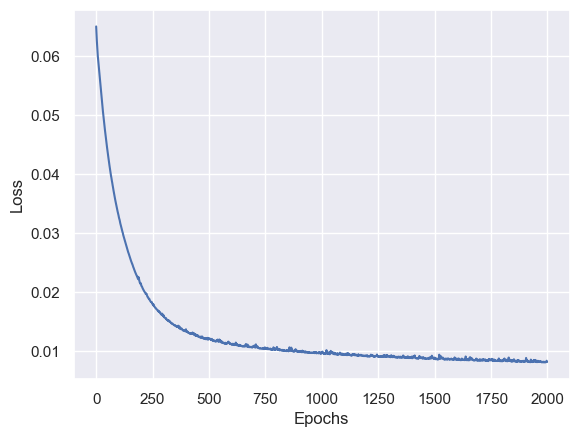

In [66]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

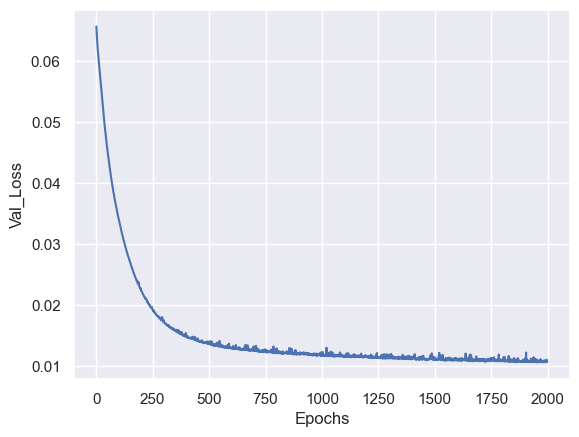

In [67]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [68]:
#modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NFE-Dwarfs.h5


In [69]:
predNFE = modelNFE.predict(X_test)

37/37 [==============================] - 0s 1ms/step


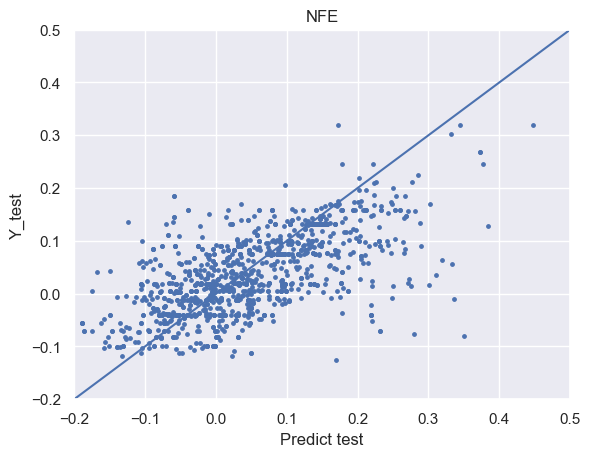

In [160]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [161]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 37.0%


In [72]:
Y_test['NFE_predict'] = predNFE

In [73]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n04s42_0000922    5614.61     4.483   -0.321        0.015   
iDR4_3_SPLUS-s02s24_0026448    5560.31     4.130   -0.243        0.106   
iDR4_3_STRIPE82-0004_0022982   5544.87     3.961   -0.099        0.093   
iDR4_3_SPLUS-s02s24_0017447    5761.52     4.284   -0.077       -0.011   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0165_0023666   5658.80     4.347   -0.320        0.020   
iDR4_3_STRIPE82-0026_0048604   5439.85     4.357    0.155       -0.018   
iDR4_3_STRIPE82-0024_0041378   5935.10     4.354   -0.190        0.023   
iDR4_3_STRIPE82-0163_0030594   5461.22     4.171   -0.579        0.077   
iDR4_3_SPLUS-n05s43_0035236    5921.95     4.228   -0.027       -0.001   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n04s42_0000922  -0.01566  0.01452 -0.01405  0.04827 -0.00999   
iDR4_3_SPLUS-s02s24_0026448   0.13407  0.09465  0.18043  0.16192  0.08490   
iDR4_3_STRIPE82-0004_0022982  0.12628  0.07488  0.07711  0.16188  0.07047   
iDR4_3_SPLUS-s02s24_0017447  -0.01317  0.00475  0.05066 -0.00191 -0.01277   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0165_0023666 -0.02459  0.04167 -0.08318  0.04102 -0.00799   
iDR4_3_STRIPE82-0026_0048604 -0.01583  0.01494  0.08558 -0.01884  0.03580   
iDR4_3_STRIPE82-0024_0041378  0.06236 -0.00044 -0.02583  0.05630  0.06819   
iDR4_3_STRIPE82-0163_0030594  0.06860  0.04682  0.04739  0.13962  0.06204   
iDR4_3_SPLUS-n05s43_0035236   0.00060 -0.02050  0.10687 -0.00689  0.01619   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n04s42_0000922   0.00288       0.031826     0.041717   
iDR4_3_SPLUS-s02s24_0026448   0.06735       0.078964     0.090356   
iDR4_3_STRIPE82-0004_0022982  0.04280       0.104357     0.084881   
iDR4_3_SPLUS-s02s24_0017447  -0.02995       0.015733    -0.001886   
iDR4_3_STRIPE82-0026_0051498 -0.02686       0.072819     0.049584   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0165_0023666 -0.01725       0.067154     0.047232   
iDR4_3_STRIPE82-0026_0048604  0.02289      -0.023077     0.003027   
iDR4_3_STRIPE82-0024_0041378  0.00515       0.024620     0.029432   
iDR4_3_STRIPE82-0163_0030594  0.03031       0.150041     0.076970   
iDR4_3_SPLUS-n05s43_0035236  -0.01197       0.002199     0.009469   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_SPLUS-n04s42_0000922       0.038043     0.018725  
iDR4_3_SPLUS-s02s24_0026448       0.065679     0.117048  
iDR4_3_STRIPE82-0004_0022982      0.079115     0.053592  
iDR4_3_SPLUS-s02s24_0017447       0.031909     0.021180  
iDR4_3_STRIPE82-0026_0051498      0.055392     0.018950  
...                                    ...          ...  
iDR4_3_STRIPE82-0165_0023666      0.076051    -0.006235  
iDR4_3_STRIPE82-0026_0048604     -0.012550     0.074290  
iDR4_3_STRIPE82-0024_0041378      0.017224     0.090615  
iDR4_3_STRIPE82-0163_0030594      0.128650    -0.059289  
iDR4_3_SPLUS-n05s43_0035236      -0.005815     0.020839  

[1172 rows x 14 columns]

In [74]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [162]:
Parametro = "MGFE"
columnTrain = 'mg_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [76]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0030564   5660.24     4.056   -0.956        0.246   
iDR4_3_STRIPE82-0026_0055354   5389.94     4.378   -0.353        0.131   
iDR4_3_STRIPE82-0026_0055354   5476.56     4.511   -0.425        0.160   
iDR4_3_SPLUS-s02s23_0001813    5823.78     4.284    0.018       -0.004   
iDR4_3_SPLUS-n02n27_0040307    5961.30     4.298   -0.498        0.052   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0033335    5557.02     4.383   -0.680        0.176   
iDR4_3_STRIPE82-0026_0051498   5644.89     4.379   -0.401        0.070   
iDR4_3_SPLUS-n07s43_0052159    5856.57     4.310   -0.574        0.133   
iDR4_3_STRIPE82-0024_0033734   5407.46     4.086    0.114        0.000   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0030564  0.26149  0.17125 -0.02060  0.33459  0.22452   
iDR4_3_STRIPE82-0026_0055354  0.05224  0.14798 -0.09113  0.19951  0.09237   
iDR4_3_STRIPE82-0026_0055354  0.08743  0.14381  0.23128  0.23816  0.17027   
iDR4_3_SPLUS-s02s23_0001813   0.01215 -0.00054  0.26834  0.01510 -0.00606   
iDR4_3_SPLUS-n02n27_0040307   0.11575  0.10684  0.05188  0.07724  0.04637   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0033335   0.20119  0.20564 -0.05531  0.26289  0.16825   
iDR4_3_STRIPE82-0026_0051498  0.05757  0.08006 -0.00527  0.11223  0.05705   
iDR4_3_SPLUS-n07s43_0052159   0.12070  0.27770 -0.10408  0.21106  0.09006   
iDR4_3_STRIPE82-0024_0033734  0.04154  0.00397  0.14313  0.03065  0.05357   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0024_0030564  0.09300  
iDR4_3_STRIPE82-0026_0055354  0.02761  
iDR4_3_STRIPE82-0026_0055354  0.02332  
iDR4_3_SPLUS-s02s23_0001813   0.02205  
iDR4_3_SPLUS-n02n27_0040307  -0.01119  
...                               ...  
iDR4_3_SPLUS-n05s44_0033335   0.12831  
iDR4_3_STRIPE82-0026_0051498 -0.00078  
iDR4_3_SPLUS-n07s43_0052159  -0.00112  
iDR4_3_STRIPE82-0024_0033734  0.05678  
iDR4_3_STRIPE82-0026_0051498 -0.02686  

[4216 rows x 10 columns]

In [77]:
modelMGFE = baseline_model_teste()

In [78]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
3/3 - 1s - loss: 0.0639 - val_loss: 0.0630 - 812ms/epoch - 271ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.0629 - val_loss: 0.0621 - 45ms/epoch - 15ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.0620 - val_loss: 0.0612 - 126ms/epoch - 42ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.0611 - val_loss: 0.0602 - 94ms/epoch - 31ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.0601 - val_loss: 0.0591 - 43ms/epoch - 14ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.0590 - val_loss: 0.0580 - 60ms/epoch - 20ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.0579 - val_loss: 0.0570 - 94ms/epoch - 31ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.0569 - val_loss: 0.0560 - 45ms/epoch - 15ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.0561 - val_loss: 0.0553 - 44ms/epoch - 15ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.0553 - val_loss: 0.0546 - 46ms/epoch - 15ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.0546 - val_loss: 0.0540 - 45ms/epoch - 15ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.0540 - val_loss: 0.0534 - 45ms/epoch - 15ms/step
Epoch 13/2000
3/3 - 0s

Epoch 101/2000
3/3 - 0s - loss: 0.0285 - val_loss: 0.0283 - 55ms/epoch - 18ms/step
Epoch 102/2000
3/3 - 0s - loss: 0.0283 - val_loss: 0.0281 - 54ms/epoch - 18ms/step
Epoch 103/2000
3/3 - 0s - loss: 0.0282 - val_loss: 0.0280 - 54ms/epoch - 18ms/step
Epoch 104/2000
3/3 - 0s - loss: 0.0280 - val_loss: 0.0278 - 51ms/epoch - 17ms/step
Epoch 105/2000
3/3 - 0s - loss: 0.0278 - val_loss: 0.0276 - 56ms/epoch - 19ms/step
Epoch 106/2000
3/3 - 0s - loss: 0.0276 - val_loss: 0.0276 - 55ms/epoch - 18ms/step
Epoch 107/2000
3/3 - 0s - loss: 0.0275 - val_loss: 0.0272 - 55ms/epoch - 18ms/step
Epoch 108/2000
3/3 - 0s - loss: 0.0273 - val_loss: 0.0271 - 55ms/epoch - 18ms/step
Epoch 109/2000
3/3 - 0s - loss: 0.0271 - val_loss: 0.0270 - 54ms/epoch - 18ms/step
Epoch 110/2000
3/3 - 0s - loss: 0.0269 - val_loss: 0.0268 - 54ms/epoch - 18ms/step
Epoch 111/2000
3/3 - 0s - loss: 0.0268 - val_loss: 0.0266 - 53ms/epoch - 18ms/step
Epoch 112/2000
3/3 - 0s - loss: 0.0266 - val_loss: 0.0264 - 55ms/epoch - 18ms/step
Epoc

Epoch 200/2000
3/3 - 0s - loss: 0.0165 - val_loss: 0.0165 - 55ms/epoch - 18ms/step
Epoch 201/2000
3/3 - 0s - loss: 0.0164 - val_loss: 0.0164 - 60ms/epoch - 20ms/step
Epoch 202/2000
3/3 - 0s - loss: 0.0163 - val_loss: 0.0165 - 56ms/epoch - 19ms/step
Epoch 203/2000
3/3 - 0s - loss: 0.0163 - val_loss: 0.0163 - 56ms/epoch - 19ms/step
Epoch 204/2000
3/3 - 0s - loss: 0.0163 - val_loss: 0.0163 - 56ms/epoch - 19ms/step
Epoch 205/2000
3/3 - 0s - loss: 0.0162 - val_loss: 0.0160 - 58ms/epoch - 19ms/step
Epoch 206/2000
3/3 - 0s - loss: 0.0160 - val_loss: 0.0160 - 58ms/epoch - 19ms/step
Epoch 207/2000
3/3 - 0s - loss: 0.0159 - val_loss: 0.0160 - 57ms/epoch - 19ms/step
Epoch 208/2000
3/3 - 0s - loss: 0.0159 - val_loss: 0.0158 - 60ms/epoch - 20ms/step
Epoch 209/2000
3/3 - 0s - loss: 0.0158 - val_loss: 0.0158 - 59ms/epoch - 20ms/step
Epoch 210/2000
3/3 - 0s - loss: 0.0158 - val_loss: 0.0158 - 56ms/epoch - 19ms/step
Epoch 211/2000
3/3 - 0s - loss: 0.0157 - val_loss: 0.0156 - 62ms/epoch - 21ms/step
Epoc

Epoch 299/2000
3/3 - 0s - loss: 0.0110 - val_loss: 0.0110 - 60ms/epoch - 20ms/step
Epoch 300/2000
3/3 - 0s - loss: 0.0109 - val_loss: 0.0110 - 59ms/epoch - 20ms/step
Epoch 301/2000
3/3 - 0s - loss: 0.0109 - val_loss: 0.0110 - 58ms/epoch - 19ms/step
Epoch 302/2000
3/3 - 0s - loss: 0.0108 - val_loss: 0.0109 - 60ms/epoch - 20ms/step
Epoch 303/2000
3/3 - 0s - loss: 0.0108 - val_loss: 0.0109 - 61ms/epoch - 20ms/step
Epoch 304/2000
3/3 - 0s - loss: 0.0108 - val_loss: 0.0108 - 59ms/epoch - 20ms/step
Epoch 305/2000
3/3 - 0s - loss: 0.0107 - val_loss: 0.0108 - 60ms/epoch - 20ms/step
Epoch 306/2000
3/3 - 0s - loss: 0.0107 - val_loss: 0.0108 - 57ms/epoch - 19ms/step
Epoch 307/2000
3/3 - 0s - loss: 0.0107 - val_loss: 0.0107 - 55ms/epoch - 18ms/step
Epoch 308/2000
3/3 - 0s - loss: 0.0106 - val_loss: 0.0107 - 59ms/epoch - 20ms/step
Epoch 309/2000
3/3 - 0s - loss: 0.0106 - val_loss: 0.0107 - 57ms/epoch - 19ms/step
Epoch 310/2000
3/3 - 0s - loss: 0.0106 - val_loss: 0.0106 - 72ms/epoch - 24ms/step
Epoc

Epoch 398/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0083 - 58ms/epoch - 19ms/step
Epoch 399/2000
3/3 - 0s - loss: 0.0083 - val_loss: 0.0084 - 60ms/epoch - 20ms/step
Epoch 400/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0083 - 65ms/epoch - 22ms/step
Epoch 401/2000
3/3 - 0s - loss: 0.0082 - val_loss: 0.0084 - 59ms/epoch - 20ms/step
Epoch 402/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0082 - 62ms/epoch - 21ms/step
Epoch 403/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0083 - 61ms/epoch - 20ms/step
Epoch 404/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0082 - 60ms/epoch - 20ms/step
Epoch 405/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0082 - 62ms/epoch - 21ms/step
Epoch 406/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0082 - 56ms/epoch - 19ms/step
Epoch 407/2000
3/3 - 0s - loss: 0.0081 - val_loss: 0.0082 - 58ms/epoch - 19ms/step
Epoch 408/2000
3/3 - 0s - loss: 0.0080 - val_loss: 0.0081 - 62ms/epoch - 21ms/step
Epoch 409/2000
3/3 - 0s - loss: 0.0080 - val_loss: 0.0082 - 62ms/epoch - 21ms/step
Epoc

Epoch 497/2000
3/3 - 0s - loss: 0.0068 - val_loss: 0.0071 - 60ms/epoch - 20ms/step
Epoch 498/2000
3/3 - 0s - loss: 0.0068 - val_loss: 0.0069 - 63ms/epoch - 21ms/step
Epoch 499/2000
3/3 - 0s - loss: 0.0068 - val_loss: 0.0069 - 59ms/epoch - 20ms/step
Epoch 500/2000
3/3 - 0s - loss: 0.0068 - val_loss: 0.0069 - 64ms/epoch - 21ms/step
Epoch 501/2000
3/3 - 0s - loss: 0.0067 - val_loss: 0.0069 - 59ms/epoch - 20ms/step
Epoch 502/2000
3/3 - 0s - loss: 0.0067 - val_loss: 0.0071 - 60ms/epoch - 20ms/step
Epoch 503/2000
3/3 - 0s - loss: 0.0068 - val_loss: 0.0069 - 63ms/epoch - 21ms/step
Epoch 504/2000
3/3 - 0s - loss: 0.0068 - val_loss: 0.0070 - 60ms/epoch - 20ms/step
Epoch 505/2000
3/3 - 0s - loss: 0.0067 - val_loss: 0.0069 - 62ms/epoch - 21ms/step
Epoch 506/2000
3/3 - 0s - loss: 0.0067 - val_loss: 0.0068 - 62ms/epoch - 21ms/step
Epoch 507/2000
3/3 - 0s - loss: 0.0067 - val_loss: 0.0072 - 65ms/epoch - 22ms/step
Epoch 508/2000
3/3 - 0s - loss: 0.0068 - val_loss: 0.0070 - 66ms/epoch - 22ms/step
Epoc

Epoch 596/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0062 - 71ms/epoch - 24ms/step
Epoch 597/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0062 - 57ms/epoch - 19ms/step
Epoch 598/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0062 - 50ms/epoch - 17ms/step
Epoch 599/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0062 - 51ms/epoch - 17ms/step
Epoch 600/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0062 - 49ms/epoch - 16ms/step
Epoch 601/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0062 - 55ms/epoch - 18ms/step
Epoch 602/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0061 - 63ms/epoch - 21ms/step
Epoch 603/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0062 - 60ms/epoch - 20ms/step
Epoch 604/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0061 - 53ms/epoch - 18ms/step
Epoch 605/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0061 - 53ms/epoch - 18ms/step
Epoch 606/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0062 - 51ms/epoch - 17ms/step
Epoch 607/2000
3/3 - 0s - loss: 0.0059 - val_loss: 0.0061 - 50ms/epoch - 17ms/step
Epoc

Epoch 695/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0057 - 57ms/epoch - 19ms/step
Epoch 696/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0057 - 61ms/epoch - 20ms/step
Epoch 697/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0056 - 57ms/epoch - 19ms/step
Epoch 698/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0056 - 62ms/epoch - 21ms/step
Epoch 699/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0057 - 58ms/epoch - 19ms/step
Epoch 700/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0056 - 60ms/epoch - 20ms/step
Epoch 701/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0056 - 60ms/epoch - 20ms/step
Epoch 702/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0056 - 59ms/epoch - 20ms/step
Epoch 703/2000
3/3 - 0s - loss: 0.0053 - val_loss: 0.0057 - 60ms/epoch - 20ms/step
Epoch 704/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0056 - 59ms/epoch - 20ms/step
Epoch 705/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0058 - 57ms/epoch - 19ms/step
Epoch 706/2000
3/3 - 0s - loss: 0.0054 - val_loss: 0.0056 - 61ms/epoch - 20ms/step
Epoc

Epoch 794/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0054 - 58ms/epoch - 19ms/step
Epoch 795/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0053 - 60ms/epoch - 20ms/step
Epoch 796/2000
3/3 - 0s - loss: 0.0051 - val_loss: 0.0053 - 59ms/epoch - 20ms/step
Epoch 797/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0053 - 58ms/epoch - 19ms/step
Epoch 798/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0053 - 57ms/epoch - 19ms/step
Epoch 799/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0053 - 62ms/epoch - 21ms/step
Epoch 800/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0054 - 63ms/epoch - 21ms/step
Epoch 801/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0053 - 57ms/epoch - 19ms/step
Epoch 802/2000
3/3 - 0s - loss: 0.0051 - val_loss: 0.0053 - 58ms/epoch - 19ms/step
Epoch 803/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0053 - 59ms/epoch - 20ms/step
Epoch 804/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0053 - 60ms/epoch - 20ms/step
Epoch 805/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0053 - 58ms/epoch - 19ms/step
Epoc

Epoch 893/2000
3/3 - 0s - loss: 0.0048 - val_loss: 0.0051 - 63ms/epoch - 21ms/step
Epoch 894/2000
3/3 - 0s - loss: 0.0048 - val_loss: 0.0053 - 60ms/epoch - 20ms/step
Epoch 895/2000
3/3 - 0s - loss: 0.0048 - val_loss: 0.0050 - 70ms/epoch - 23ms/step
Epoch 896/2000
3/3 - 0s - loss: 0.0048 - val_loss: 0.0050 - 64ms/epoch - 21ms/step
Epoch 897/2000
3/3 - 0s - loss: 0.0048 - val_loss: 0.0051 - 64ms/epoch - 21ms/step
Epoch 898/2000
3/3 - 0s - loss: 0.0047 - val_loss: 0.0050 - 67ms/epoch - 22ms/step
Epoch 899/2000
3/3 - 0s - loss: 0.0047 - val_loss: 0.0050 - 65ms/epoch - 22ms/step
Epoch 900/2000
3/3 - 0s - loss: 0.0047 - val_loss: 0.0051 - 65ms/epoch - 22ms/step
Epoch 901/2000
3/3 - 0s - loss: 0.0047 - val_loss: 0.0051 - 62ms/epoch - 21ms/step
Epoch 902/2000
3/3 - 0s - loss: 0.0047 - val_loss: 0.0051 - 67ms/epoch - 22ms/step
Epoch 903/2000
3/3 - 0s - loss: 0.0047 - val_loss: 0.0050 - 67ms/epoch - 22ms/step
Epoch 904/2000
3/3 - 0s - loss: 0.0047 - val_loss: 0.0050 - 59ms/epoch - 20ms/step
Epoc

Epoch 992/2000
3/3 - 0s - loss: 0.0046 - val_loss: 0.0048 - 57ms/epoch - 19ms/step
Epoch 993/2000
3/3 - 0s - loss: 0.0046 - val_loss: 0.0048 - 58ms/epoch - 19ms/step
Epoch 994/2000
3/3 - 0s - loss: 0.0046 - val_loss: 0.0049 - 63ms/epoch - 21ms/step
Epoch 995/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0048 - 57ms/epoch - 19ms/step
Epoch 996/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0048 - 57ms/epoch - 19ms/step
Epoch 997/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0048 - 61ms/epoch - 20ms/step
Epoch 998/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0051 - 59ms/epoch - 20ms/step
Epoch 999/2000
3/3 - 0s - loss: 0.0046 - val_loss: 0.0048 - 59ms/epoch - 20ms/step
Epoch 1000/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0048 - 59ms/epoch - 20ms/step
Epoch 1001/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0048 - 62ms/epoch - 21ms/step
Epoch 1002/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0048 - 58ms/epoch - 19ms/step
Epoch 1003/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0048 - 55ms/epoch - 18ms/step


Epoch 1090/2000
3/3 - 0s - loss: 0.0044 - val_loss: 0.0047 - 61ms/epoch - 20ms/step
Epoch 1091/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0046 - 57ms/epoch - 19ms/step
Epoch 1092/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0046 - 60ms/epoch - 20ms/step
Epoch 1093/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0047 - 64ms/epoch - 21ms/step
Epoch 1094/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0046 - 54ms/epoch - 18ms/step
Epoch 1095/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0046 - 60ms/epoch - 20ms/step
Epoch 1096/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0047 - 53ms/epoch - 18ms/step
Epoch 1097/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0046 - 61ms/epoch - 20ms/step
Epoch 1098/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0046 - 62ms/epoch - 21ms/step
Epoch 1099/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0046 - 60ms/epoch - 20ms/step
Epoch 1100/2000
3/3 - 0s - loss: 0.0044 - val_loss: 0.0047 - 64ms/epoch - 21ms/step
Epoch 1101/2000
3/3 - 0s - loss: 0.0044 - val_loss: 0.0049 - 61ms/epoch - 20

Epoch 1188/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0045 - 61ms/epoch - 20ms/step
Epoch 1189/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0046 - 59ms/epoch - 20ms/step
Epoch 1190/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0047 - 61ms/epoch - 20ms/step
Epoch 1191/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0045 - 60ms/epoch - 20ms/step
Epoch 1192/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0046 - 58ms/epoch - 19ms/step
Epoch 1193/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0047 - 62ms/epoch - 21ms/step
Epoch 1194/2000
3/3 - 0s - loss: 0.0042 - val_loss: 0.0046 - 61ms/epoch - 20ms/step
Epoch 1195/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0047 - 60ms/epoch - 20ms/step
Epoch 1196/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0046 - 61ms/epoch - 20ms/step
Epoch 1197/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0046 - 63ms/epoch - 21ms/step
Epoch 1198/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0049 - 60ms/epoch - 20ms/step
Epoch 1199/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0045 - 68ms/epoch - 23

Epoch 1286/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0044 - 70ms/epoch - 23ms/step
Epoch 1287/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0044 - 52ms/epoch - 17ms/step
Epoch 1288/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0045 - 69ms/epoch - 23ms/step
Epoch 1289/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0044 - 53ms/epoch - 18ms/step
Epoch 1290/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0044 - 52ms/epoch - 17ms/step
Epoch 1291/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0045 - 73ms/epoch - 24ms/step
Epoch 1292/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0044 - 61ms/epoch - 20ms/step
Epoch 1293/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0043 - 52ms/epoch - 17ms/step
Epoch 1294/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0045 - 52ms/epoch - 17ms/step
Epoch 1295/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0044 - 51ms/epoch - 17ms/step
Epoch 1296/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0044 - 51ms/epoch - 17ms/step
Epoch 1297/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0047 - 51ms/epoch - 17

Epoch 1384/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0043 - 63ms/epoch - 21ms/step
Epoch 1385/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0043 - 59ms/epoch - 20ms/step
Epoch 1386/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0043 - 75ms/epoch - 25ms/step
Epoch 1387/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0042 - 58ms/epoch - 19ms/step
Epoch 1388/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0042 - 61ms/epoch - 20ms/step
Epoch 1389/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0044 - 63ms/epoch - 21ms/step
Epoch 1390/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0042 - 65ms/epoch - 22ms/step
Epoch 1391/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0044 - 60ms/epoch - 20ms/step
Epoch 1392/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0045 - 62ms/epoch - 21ms/step
Epoch 1393/2000
3/3 - 0s - loss: 0.0041 - val_loss: 0.0043 - 59ms/epoch - 20ms/step
Epoch 1394/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0044 - 70ms/epoch - 23ms/step
Epoch 1395/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0043 - 78ms/epoch - 26

Epoch 1482/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0042 - 62ms/epoch - 21ms/step
Epoch 1483/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0042 - 57ms/epoch - 19ms/step
Epoch 1484/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0043 - 56ms/epoch - 19ms/step
Epoch 1485/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0042 - 56ms/epoch - 19ms/step
Epoch 1486/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0043 - 57ms/epoch - 19ms/step
Epoch 1487/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0042 - 62ms/epoch - 21ms/step
Epoch 1488/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0042 - 64ms/epoch - 21ms/step
Epoch 1489/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0042 - 58ms/epoch - 19ms/step
Epoch 1490/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0041 - 62ms/epoch - 21ms/step
Epoch 1491/2000
3/3 - 0s - loss: 0.0038 - val_loss: 0.0041 - 60ms/epoch - 20ms/step
Epoch 1492/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0042 - 112ms/epoch - 37ms/step
Epoch 1493/2000
3/3 - 0s - loss: 0.0038 - val_loss: 0.0042 - 74ms/epoch - 2

Epoch 1580/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0041 - 60ms/epoch - 20ms/step
Epoch 1581/2000
3/3 - 0s - loss: 0.0038 - val_loss: 0.0041 - 59ms/epoch - 20ms/step
Epoch 1582/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0041 - 60ms/epoch - 20ms/step
Epoch 1583/2000
3/3 - 0s - loss: 0.0038 - val_loss: 0.0041 - 67ms/epoch - 22ms/step
Epoch 1584/2000
3/3 - 0s - loss: 0.0038 - val_loss: 0.0041 - 64ms/epoch - 21ms/step
Epoch 1585/2000
3/3 - 0s - loss: 0.0038 - val_loss: 0.0040 - 64ms/epoch - 21ms/step
Epoch 1586/2000
3/3 - 0s - loss: 0.0038 - val_loss: 0.0042 - 60ms/epoch - 20ms/step
Epoch 1587/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0040 - 62ms/epoch - 21ms/step
Epoch 1588/2000
3/3 - 0s - loss: 0.0038 - val_loss: 0.0041 - 64ms/epoch - 21ms/step
Epoch 1589/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0040 - 61ms/epoch - 20ms/step
Epoch 1590/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0041 - 62ms/epoch - 21ms/step
Epoch 1591/2000
3/3 - 0s - loss: 0.0038 - val_loss: 0.0042 - 61ms/epoch - 20

Epoch 1678/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0042 - 61ms/epoch - 20ms/step
Epoch 1679/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0040 - 57ms/epoch - 19ms/step
Epoch 1680/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0041 - 55ms/epoch - 18ms/step
Epoch 1681/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0040 - 64ms/epoch - 21ms/step
Epoch 1682/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0040 - 69ms/epoch - 23ms/step
Epoch 1683/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0040 - 58ms/epoch - 19ms/step
Epoch 1684/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0040 - 58ms/epoch - 19ms/step
Epoch 1685/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0041 - 61ms/epoch - 20ms/step
Epoch 1686/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0039 - 60ms/epoch - 20ms/step
Epoch 1687/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0040 - 62ms/epoch - 21ms/step
Epoch 1688/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0040 - 59ms/epoch - 20ms/step
Epoch 1689/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0040 - 59ms/epoch - 20

Epoch 1776/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0039 - 59ms/epoch - 20ms/step
Epoch 1777/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0039 - 62ms/epoch - 21ms/step
Epoch 1778/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0039 - 59ms/epoch - 20ms/step
Epoch 1779/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0039 - 57ms/epoch - 19ms/step
Epoch 1780/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0039 - 63ms/epoch - 21ms/step
Epoch 1781/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0040 - 60ms/epoch - 20ms/step
Epoch 1782/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0039 - 61ms/epoch - 20ms/step
Epoch 1783/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0039 - 65ms/epoch - 22ms/step
Epoch 1784/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0040 - 67ms/epoch - 22ms/step
Epoch 1785/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0040 - 61ms/epoch - 20ms/step
Epoch 1786/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0040 - 55ms/epoch - 18ms/step
Epoch 1787/2000
3/3 - 0s - loss: 0.0037 - val_loss: 0.0039 - 59ms/epoch - 20

Epoch 1874/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0038 - 54ms/epoch - 18ms/step
Epoch 1875/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0038 - 56ms/epoch - 19ms/step
Epoch 1876/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0039 - 54ms/epoch - 18ms/step
Epoch 1877/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0038 - 64ms/epoch - 21ms/step
Epoch 1878/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0038 - 53ms/epoch - 18ms/step
Epoch 1879/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0038 - 54ms/epoch - 18ms/step
Epoch 1880/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0039 - 55ms/epoch - 18ms/step
Epoch 1881/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0039 - 55ms/epoch - 18ms/step
Epoch 1882/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0039 - 55ms/epoch - 18ms/step
Epoch 1883/2000
3/3 - 0s - loss: 0.0036 - val_loss: 0.0039 - 54ms/epoch - 18ms/step
Epoch 1884/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0039 - 54ms/epoch - 18ms/step
Epoch 1885/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0038 - 55ms/epoch - 18

Epoch 1972/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0037 - 60ms/epoch - 20ms/step
Epoch 1973/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0038 - 58ms/epoch - 19ms/step
Epoch 1974/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0039 - 61ms/epoch - 20ms/step
Epoch 1975/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0038 - 59ms/epoch - 20ms/step
Epoch 1976/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0038 - 58ms/epoch - 19ms/step
Epoch 1977/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0037 - 58ms/epoch - 19ms/step
Epoch 1978/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0038 - 60ms/epoch - 20ms/step
Epoch 1979/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0038 - 60ms/epoch - 20ms/step
Epoch 1980/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0038 - 61ms/epoch - 20ms/step
Epoch 1981/2000
3/3 - 0s - loss: 0.0035 - val_loss: 0.0037 - 60ms/epoch - 20ms/step
Epoch 1982/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0038 - 59ms/epoch - 20ms/step
Epoch 1983/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0037 - 61ms/epoch - 20

Text(0, 0.5, 'Loss')

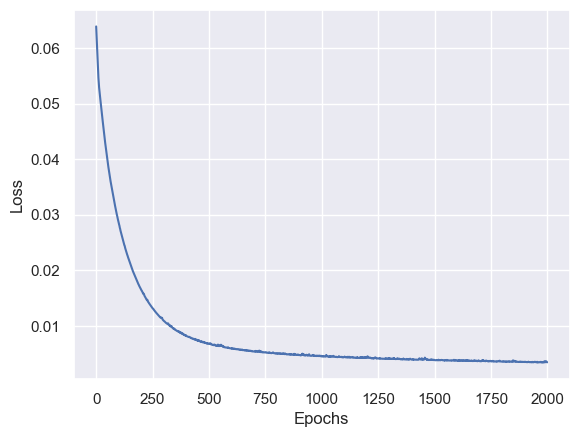

In [79]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

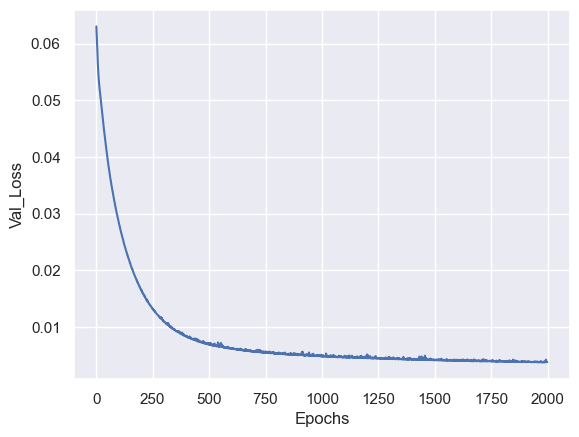

In [80]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [81]:
#modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\MGFE-Dwarfs.h5


In [82]:
predMGFE = modelMGFE.predict(X_test)

37/37 [==============================] - 0s 3ms/step


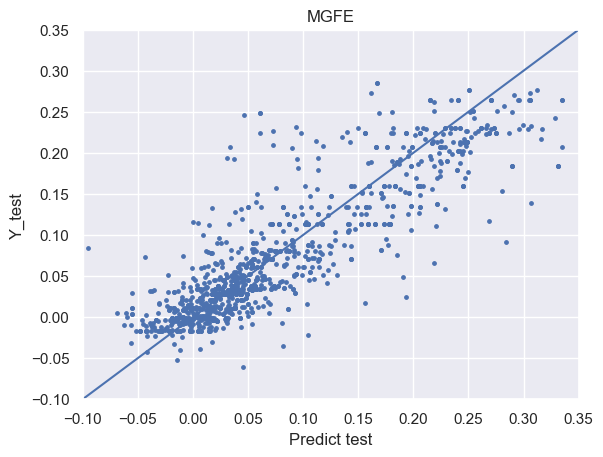

In [163]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.35)
plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [84]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 77.0%


In [85]:
Y_test['MGFE_predict'] = predMGFE

In [86]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n04s42_0000922    5614.61     4.483   -0.321        0.015   
iDR4_3_SPLUS-s02s24_0026448    5560.31     4.130   -0.243        0.106   
iDR4_3_STRIPE82-0004_0022982   5544.87     3.961   -0.099        0.093   
iDR4_3_SPLUS-s02s24_0017447    5761.52     4.284   -0.077       -0.011   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0165_0023666   5658.80     4.347   -0.320        0.020   
iDR4_3_STRIPE82-0026_0048604   5439.85     4.357    0.155       -0.018   
iDR4_3_STRIPE82-0024_0041378   5935.10     4.354   -0.190        0.023   
iDR4_3_STRIPE82-0163_0030594   5461.22     4.171   -0.579        0.077   
iDR4_3_SPLUS-n05s43_0035236    5921.95     4.228   -0.027       -0.001   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n04s42_0000922  -0.01566  0.01452 -0.01405  0.04827 -0.00999   
iDR4_3_SPLUS-s02s24_0026448   0.13407  0.09465  0.18043  0.16192  0.08490   
iDR4_3_STRIPE82-0004_0022982  0.12628  0.07488  0.07711  0.16188  0.07047   
iDR4_3_SPLUS-s02s24_0017447  -0.01317  0.00475  0.05066 -0.00191 -0.01277   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0165_0023666 -0.02459  0.04167 -0.08318  0.04102 -0.00799   
iDR4_3_STRIPE82-0026_0048604 -0.01583  0.01494  0.08558 -0.01884  0.03580   
iDR4_3_STRIPE82-0024_0041378  0.06236 -0.00044 -0.02583  0.05630  0.06819   
iDR4_3_STRIPE82-0163_0030594  0.06860  0.04682  0.04739  0.13962  0.06204   
iDR4_3_SPLUS-n05s43_0035236   0.00060 -0.02050  0.10687 -0.00689  0.01619   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n04s42_0000922   0.00288       0.031826     0.041717   
iDR4_3_SPLUS-s02s24_0026448   0.06735       0.078964     0.090356   
iDR4_3_STRIPE82-0004_0022982  0.04280       0.104357     0.084881   
iDR4_3_SPLUS-s02s24_0017447  -0.02995       0.015733    -0.001886   
iDR4_3_STRIPE82-0026_0051498 -0.02686       0.072819     0.049584   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0165_0023666 -0.01725       0.067154     0.047232   
iDR4_3_STRIPE82-0026_0048604  0.02289      -0.023077     0.003027   
iDR4_3_STRIPE82-0024_0041378  0.00515       0.024620     0.029432   
iDR4_3_STRIPE82-0163_0030594  0.03031       0.150041     0.076970   
iDR4_3_SPLUS-n05s43_0035236  -0.01197       0.002199     0.009469   

                              CAFE_predict  NFE_predict  MGFE_predict  
ID                                                                     
iDR4_3_SPLUS-n04s42_0000922       0.038043     0.018725      0.062342  
iDR4_3_SPLUS-s02s24_0026448       0.065679     0.117048      0.151424  
iDR4_3_STRIPE82-0004_0022982      0.079115     0.053592      0.189259  
iDR4_3_SPLUS-s02s24_0017447       0.031909     0.021180      0.015744  
iDR4_3_STRIPE82-0026_0051498      0.055392     0.018950      0.113221  
...                                    ...          ...           ...  
iDR4_3_STRIPE82-0165_0023666      0.076051    -0.006235      0.078811  
iDR4_3_STRIPE82-0026_0048604     -0.012550     0.074290     -0.001422  
iDR4_3_STRIPE82-0024_0041378      0.017224     0.090615      0.037429  
iDR4_3_STRIPE82-0163_0030594      0.128650    -0.059289      0.224790  
iDR4_3_SPLUS-n05s43_0035236      -0.005815     0.020839     -0.007620  

[1172 rows x 15 columns]

In [87]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [164]:
Parametro = "SIFE"
columnTrain = 'si_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [103]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0030564   5660.24     4.056   -0.956        0.246   
iDR4_3_STRIPE82-0026_0055354   5389.94     4.378   -0.353        0.131   
iDR4_3_STRIPE82-0026_0055354   5476.56     4.511   -0.425        0.160   
iDR4_3_SPLUS-s02s23_0001813    5823.78     4.284    0.018       -0.004   
iDR4_3_SPLUS-n02n27_0040307    5961.30     4.298   -0.498        0.052   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0033335    5557.02     4.383   -0.680        0.176   
iDR4_3_STRIPE82-0026_0051498   5644.89     4.379   -0.401        0.070   
iDR4_3_SPLUS-n07s43_0052159    5856.57     4.310   -0.574        0.133   
iDR4_3_STRIPE82-0024_0033734   5407.46     4.086    0.114        0.000   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0030564  0.26149  0.17125 -0.02060  0.33459  0.22452   
iDR4_3_STRIPE82-0026_0055354  0.05224  0.14798 -0.09113  0.19951  0.09237   
iDR4_3_STRIPE82-0026_0055354  0.08743  0.14381  0.23128  0.23816  0.17027   
iDR4_3_SPLUS-s02s23_0001813   0.01215 -0.00054  0.26834  0.01510 -0.00606   
iDR4_3_SPLUS-n02n27_0040307   0.11575  0.10684  0.05188  0.07724  0.04637   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0033335   0.20119  0.20564 -0.05531  0.26289  0.16825   
iDR4_3_STRIPE82-0026_0051498  0.05757  0.08006 -0.00527  0.11223  0.05705   
iDR4_3_SPLUS-n07s43_0052159   0.12070  0.27770 -0.10408  0.21106  0.09006   
iDR4_3_STRIPE82-0024_0033734  0.04154  0.00397  0.14313  0.03065  0.05357   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0024_0030564  0.09300  
iDR4_3_STRIPE82-0026_0055354  0.02761  
iDR4_3_STRIPE82-0026_0055354  0.02332  
iDR4_3_SPLUS-s02s23_0001813   0.02205  
iDR4_3_SPLUS-n02n27_0040307  -0.01119  
...                               ...  
iDR4_3_SPLUS-n05s44_0033335   0.12831  
iDR4_3_STRIPE82-0026_0051498 -0.00078  
iDR4_3_SPLUS-n07s43_0052159  -0.00112  
iDR4_3_STRIPE82-0024_0033734  0.05678  
iDR4_3_STRIPE82-0026_0051498 -0.02686  

[4216 rows x 10 columns]

In [104]:
modelSIFE = baseline_model_teste()

In [105]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
3/3 - 1s - loss: 0.0560 - val_loss: 0.0555 - 828ms/epoch - 276ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.0554 - val_loss: 0.0549 - 47ms/epoch - 16ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.0548 - val_loss: 0.0543 - 44ms/epoch - 15ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.0542 - val_loss: 0.0537 - 44ms/epoch - 15ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.0537 - val_loss: 0.0532 - 45ms/epoch - 15ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.0531 - val_loss: 0.0527 - 45ms/epoch - 15ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.0526 - val_loss: 0.0522 - 47ms/epoch - 16ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.0521 - val_loss: 0.0518 - 46ms/epoch - 15ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.0517 - val_loss: 0.0513 - 45ms/epoch - 15ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.0512 - val_loss: 0.0508 - 45ms/epoch - 15ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.0508 - val_loss: 0.0504 - 45ms/epoch - 15ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.0503 - val_loss: 0.0499 - 46ms/epoch - 15ms/step
Epoch 13/2000
3/3 - 0s 

Epoch 101/2000
3/3 - 0s - loss: 0.0248 - val_loss: 0.0248 - 52ms/epoch - 17ms/step
Epoch 102/2000
3/3 - 0s - loss: 0.0247 - val_loss: 0.0246 - 52ms/epoch - 17ms/step
Epoch 103/2000
3/3 - 0s - loss: 0.0245 - val_loss: 0.0244 - 49ms/epoch - 16ms/step
Epoch 104/2000
3/3 - 0s - loss: 0.0243 - val_loss: 0.0242 - 52ms/epoch - 17ms/step
Epoch 105/2000
3/3 - 0s - loss: 0.0241 - val_loss: 0.0240 - 76ms/epoch - 25ms/step
Epoch 106/2000
3/3 - 0s - loss: 0.0240 - val_loss: 0.0239 - 51ms/epoch - 17ms/step
Epoch 107/2000
3/3 - 0s - loss: 0.0238 - val_loss: 0.0237 - 52ms/epoch - 17ms/step
Epoch 108/2000
3/3 - 0s - loss: 0.0236 - val_loss: 0.0235 - 50ms/epoch - 17ms/step
Epoch 109/2000
3/3 - 0s - loss: 0.0234 - val_loss: 0.0234 - 52ms/epoch - 17ms/step
Epoch 110/2000
3/3 - 0s - loss: 0.0233 - val_loss: 0.0232 - 55ms/epoch - 18ms/step
Epoch 111/2000
3/3 - 0s - loss: 0.0231 - val_loss: 0.0231 - 51ms/epoch - 17ms/step
Epoch 112/2000
3/3 - 0s - loss: 0.0229 - val_loss: 0.0229 - 95ms/epoch - 32ms/step
Epoc

Epoch 200/2000
3/3 - 0s - loss: 0.0129 - val_loss: 0.0129 - 56ms/epoch - 19ms/step
Epoch 201/2000
3/3 - 0s - loss: 0.0128 - val_loss: 0.0129 - 54ms/epoch - 18ms/step
Epoch 202/2000
3/3 - 0s - loss: 0.0127 - val_loss: 0.0128 - 57ms/epoch - 19ms/step
Epoch 203/2000
3/3 - 0s - loss: 0.0127 - val_loss: 0.0127 - 55ms/epoch - 18ms/step
Epoch 204/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0126 - 55ms/epoch - 18ms/step
Epoch 205/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0125 - 53ms/epoch - 18ms/step
Epoch 206/2000
3/3 - 0s - loss: 0.0124 - val_loss: 0.0125 - 55ms/epoch - 18ms/step
Epoch 207/2000
3/3 - 0s - loss: 0.0124 - val_loss: 0.0124 - 55ms/epoch - 18ms/step
Epoch 208/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0123 - 57ms/epoch - 19ms/step
Epoch 209/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0122 - 58ms/epoch - 19ms/step
Epoch 210/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0122 - 55ms/epoch - 18ms/step
Epoch 211/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0122 - 58ms/epoch - 19ms/step
Epoc

Epoch 299/2000
3/3 - 0s - loss: 0.0076 - val_loss: 0.0077 - 60ms/epoch - 20ms/step
Epoch 300/2000
3/3 - 0s - loss: 0.0076 - val_loss: 0.0077 - 59ms/epoch - 20ms/step
Epoch 301/2000
3/3 - 0s - loss: 0.0076 - val_loss: 0.0076 - 60ms/epoch - 20ms/step
Epoch 302/2000
3/3 - 0s - loss: 0.0075 - val_loss: 0.0076 - 58ms/epoch - 19ms/step
Epoch 303/2000
3/3 - 0s - loss: 0.0075 - val_loss: 0.0076 - 59ms/epoch - 20ms/step
Epoch 304/2000
3/3 - 0s - loss: 0.0075 - val_loss: 0.0075 - 54ms/epoch - 18ms/step
Epoch 305/2000
3/3 - 0s - loss: 0.0074 - val_loss: 0.0075 - 52ms/epoch - 17ms/step
Epoch 306/2000
3/3 - 0s - loss: 0.0074 - val_loss: 0.0075 - 55ms/epoch - 18ms/step
Epoch 307/2000
3/3 - 0s - loss: 0.0074 - val_loss: 0.0075 - 58ms/epoch - 19ms/step
Epoch 308/2000
3/3 - 0s - loss: 0.0074 - val_loss: 0.0074 - 60ms/epoch - 20ms/step
Epoch 309/2000
3/3 - 0s - loss: 0.0073 - val_loss: 0.0074 - 56ms/epoch - 19ms/step
Epoch 310/2000
3/3 - 0s - loss: 0.0073 - val_loss: 0.0073 - 56ms/epoch - 19ms/step
Epoc

Epoch 398/2000
3/3 - 0s - loss: 0.0052 - val_loss: 0.0053 - 61ms/epoch - 20ms/step
Epoch 399/2000
3/3 - 0s - loss: 0.0052 - val_loss: 0.0053 - 62ms/epoch - 21ms/step
Epoch 400/2000
3/3 - 0s - loss: 0.0052 - val_loss: 0.0052 - 61ms/epoch - 20ms/step
Epoch 401/2000
3/3 - 0s - loss: 0.0051 - val_loss: 0.0052 - 59ms/epoch - 20ms/step
Epoch 402/2000
3/3 - 0s - loss: 0.0051 - val_loss: 0.0052 - 59ms/epoch - 20ms/step
Epoch 403/2000
3/3 - 0s - loss: 0.0051 - val_loss: 0.0052 - 57ms/epoch - 19ms/step
Epoch 404/2000
3/3 - 0s - loss: 0.0051 - val_loss: 0.0052 - 62ms/epoch - 21ms/step
Epoch 405/2000
3/3 - 0s - loss: 0.0051 - val_loss: 0.0052 - 60ms/epoch - 20ms/step
Epoch 406/2000
3/3 - 0s - loss: 0.0051 - val_loss: 0.0051 - 62ms/epoch - 21ms/step
Epoch 407/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0051 - 59ms/epoch - 20ms/step
Epoch 408/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0051 - 62ms/epoch - 21ms/step
Epoch 409/2000
3/3 - 0s - loss: 0.0050 - val_loss: 0.0051 - 60ms/epoch - 20ms/step
Epoc

Epoch 497/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0041 - 56ms/epoch - 19ms/step
Epoch 498/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0041 - 58ms/epoch - 19ms/step
Epoch 499/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0041 - 61ms/epoch - 20ms/step
Epoch 500/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0041 - 57ms/epoch - 19ms/step
Epoch 501/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0041 - 58ms/epoch - 19ms/step
Epoch 502/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0041 - 56ms/epoch - 19ms/step
Epoch 503/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0041 - 60ms/epoch - 20ms/step
Epoch 504/2000
3/3 - 0s - loss: 0.0040 - val_loss: 0.0040 - 57ms/epoch - 19ms/step
Epoch 505/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0041 - 58ms/epoch - 19ms/step
Epoch 506/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0040 - 59ms/epoch - 20ms/step
Epoch 507/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0041 - 55ms/epoch - 18ms/step
Epoch 508/2000
3/3 - 0s - loss: 0.0039 - val_loss: 0.0040 - 59ms/epoch - 20ms/step
Epoc

Epoch 596/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0035 - 62ms/epoch - 21ms/step
Epoch 597/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0035 - 60ms/epoch - 20ms/step
Epoch 598/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0035 - 55ms/epoch - 18ms/step
Epoch 599/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0035 - 59ms/epoch - 20ms/step
Epoch 600/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0035 - 59ms/epoch - 20ms/step
Epoch 601/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0035 - 61ms/epoch - 20ms/step
Epoch 602/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0036 - 57ms/epoch - 19ms/step
Epoch 603/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0035 - 61ms/epoch - 20ms/step
Epoch 604/2000
3/3 - 0s - loss: 0.0034 - val_loss: 0.0035 - 63ms/epoch - 21ms/step
Epoch 605/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0035 - 57ms/epoch - 19ms/step
Epoch 606/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0035 - 62ms/epoch - 21ms/step
Epoch 607/2000
3/3 - 0s - loss: 0.0033 - val_loss: 0.0034 - 60ms/epoch - 20ms/step
Epoc

Epoch 695/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 60ms/epoch - 20ms/step
Epoch 696/2000
3/3 - 0s - loss: 0.0031 - val_loss: 0.0032 - 59ms/epoch - 20ms/step
Epoch 697/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 58ms/epoch - 19ms/step
Epoch 698/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 59ms/epoch - 20ms/step
Epoch 699/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0032 - 58ms/epoch - 19ms/step
Epoch 700/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 58ms/epoch - 19ms/step
Epoch 701/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0032 - 55ms/epoch - 18ms/step
Epoch 702/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 57ms/epoch - 19ms/step
Epoch 703/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0032 - 56ms/epoch - 19ms/step
Epoch 704/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 59ms/epoch - 20ms/step
Epoch 705/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0032 - 60ms/epoch - 20ms/step
Epoch 706/2000
3/3 - 0s - loss: 0.0030 - val_loss: 0.0031 - 60ms/epoch - 20ms/step
Epoc

Epoch 794/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0029 - 58ms/epoch - 19ms/step
Epoch 795/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0029 - 58ms/epoch - 19ms/step
Epoch 796/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0029 - 68ms/epoch - 23ms/step
Epoch 797/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 60ms/epoch - 20ms/step
Epoch 798/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 60ms/epoch - 20ms/step
Epoch 799/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 58ms/epoch - 19ms/step
Epoch 800/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 62ms/epoch - 21ms/step
Epoch 801/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0029 - 63ms/epoch - 21ms/step
Epoch 802/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0029 - 65ms/epoch - 22ms/step
Epoch 803/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 62ms/epoch - 21ms/step
Epoch 804/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 64ms/epoch - 21ms/step
Epoch 805/2000
3/3 - 0s - loss: 0.0028 - val_loss: 0.0030 - 59ms/epoch - 20ms/step
Epoc

Epoch 893/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 60ms/epoch - 20ms/step
Epoch 894/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 55ms/epoch - 18ms/step
Epoch 895/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 59ms/epoch - 20ms/step
Epoch 896/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 59ms/epoch - 20ms/step
Epoch 897/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 57ms/epoch - 19ms/step
Epoch 898/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 64ms/epoch - 21ms/step
Epoch 899/2000
3/3 - 0s - loss: 0.0027 - val_loss: 0.0028 - 59ms/epoch - 20ms/step
Epoch 900/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 57ms/epoch - 19ms/step
Epoch 901/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 63ms/epoch - 21ms/step
Epoch 902/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 60ms/epoch - 20ms/step
Epoch 903/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 904/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0028 - 58ms/epoch - 19ms/step
Epoc

Epoch 992/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0029 - 59ms/epoch - 20ms/step
Epoch 993/2000
3/3 - 0s - loss: 0.0026 - val_loss: 0.0027 - 58ms/epoch - 19ms/step
Epoch 994/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 54ms/epoch - 18ms/step
Epoch 995/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 63ms/epoch - 21ms/step
Epoch 996/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 57ms/epoch - 19ms/step
Epoch 997/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 62ms/epoch - 21ms/step
Epoch 998/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 60ms/epoch - 20ms/step
Epoch 999/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 57ms/epoch - 19ms/step
Epoch 1000/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 59ms/epoch - 20ms/step
Epoch 1001/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 54ms/epoch - 18ms/step
Epoch 1002/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 60ms/epoch - 20ms/step
Epoch 1003/2000
3/3 - 0s - loss: 0.0025 - val_loss: 0.0027 - 57ms/epoch - 19ms/step


Epoch 1090/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 56ms/epoch - 19ms/step
Epoch 1091/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 61ms/epoch - 20ms/step
Epoch 1092/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 56ms/epoch - 19ms/step
Epoch 1093/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 59ms/epoch - 20ms/step
Epoch 1094/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 62ms/epoch - 21ms/step
Epoch 1095/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 55ms/epoch - 18ms/step
Epoch 1096/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 57ms/epoch - 19ms/step
Epoch 1097/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 58ms/epoch - 19ms/step
Epoch 1098/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 59ms/epoch - 20ms/step
Epoch 1099/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 56ms/epoch - 19ms/step
Epoch 1100/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 64ms/epoch - 21ms/step
Epoch 1101/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 57ms/epoch - 19

Epoch 1188/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 61ms/epoch - 20ms/step
Epoch 1189/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 60ms/epoch - 20ms/step
Epoch 1190/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 63ms/epoch - 21ms/step
Epoch 1191/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 76ms/epoch - 25ms/step
Epoch 1192/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0026 - 60ms/epoch - 20ms/step
Epoch 1193/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 58ms/epoch - 19ms/step
Epoch 1194/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 60ms/epoch - 20ms/step
Epoch 1195/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 58ms/epoch - 19ms/step
Epoch 1196/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 61ms/epoch - 20ms/step
Epoch 1197/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0026 - 57ms/epoch - 19ms/step
Epoch 1198/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 60ms/epoch - 20ms/step
Epoch 1199/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0026 - 60ms/epoch - 20

Epoch 1286/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 56ms/epoch - 19ms/step
Epoch 1287/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 63ms/epoch - 21ms/step
Epoch 1288/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 58ms/epoch - 19ms/step
Epoch 1289/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 60ms/epoch - 20ms/step
Epoch 1290/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0025 - 57ms/epoch - 19ms/step
Epoch 1291/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 56ms/epoch - 19ms/step
Epoch 1292/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0025 - 59ms/epoch - 20ms/step
Epoch 1293/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 59ms/epoch - 20ms/step
Epoch 1294/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 61ms/epoch - 20ms/step
Epoch 1295/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 62ms/epoch - 21ms/step
Epoch 1296/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 59ms/epoch - 20ms/step
Epoch 1297/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 58ms/epoch - 19

Epoch 1384/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 63ms/epoch - 21ms/step
Epoch 1385/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 60ms/epoch - 20ms/step
Epoch 1386/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 59ms/epoch - 20ms/step
Epoch 1387/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 61ms/epoch - 20ms/step
Epoch 1388/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 59ms/epoch - 20ms/step
Epoch 1389/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 64ms/epoch - 21ms/step
Epoch 1390/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 57ms/epoch - 19ms/step
Epoch 1391/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 61ms/epoch - 20ms/step
Epoch 1392/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 61ms/epoch - 20ms/step
Epoch 1393/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 59ms/epoch - 20ms/step
Epoch 1394/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 60ms/epoch - 20ms/step
Epoch 1395/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 60ms/epoch - 20

Epoch 1482/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0024 - 57ms/epoch - 19ms/step
Epoch 1483/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 59ms/epoch - 20ms/step
Epoch 1484/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 76ms/epoch - 25ms/step
Epoch 1485/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0024 - 59ms/epoch - 20ms/step
Epoch 1486/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 60ms/epoch - 20ms/step
Epoch 1487/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 61ms/epoch - 20ms/step
Epoch 1488/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0024 - 60ms/epoch - 20ms/step
Epoch 1489/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0023 - 61ms/epoch - 20ms/step
Epoch 1490/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 59ms/epoch - 20ms/step
Epoch 1491/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 61ms/epoch - 20ms/step
Epoch 1492/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 59ms/epoch - 20ms/step
Epoch 1493/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 59ms/epoch - 20

Epoch 1580/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 74ms/epoch - 25ms/step
Epoch 1581/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 60ms/epoch - 20ms/step
Epoch 1582/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 69ms/epoch - 23ms/step
Epoch 1583/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 60ms/epoch - 20ms/step
Epoch 1584/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 58ms/epoch - 19ms/step
Epoch 1585/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 57ms/epoch - 19ms/step
Epoch 1586/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 61ms/epoch - 20ms/step
Epoch 1587/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 56ms/epoch - 19ms/step
Epoch 1588/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 59ms/epoch - 20ms/step
Epoch 1589/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0024 - 110ms/epoch - 37ms/step
Epoch 1590/2000
3/3 - 0s - loss: 0.0022 - val_loss: 0.0023 - 57ms/epoch - 19ms/step
Epoch 1591/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 75ms/epoch - 2

Epoch 1678/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 59ms/epoch - 20ms/step
Epoch 1679/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0023 - 59ms/epoch - 20ms/step
Epoch 1680/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 61ms/epoch - 20ms/step
Epoch 1681/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0022 - 61ms/epoch - 20ms/step
Epoch 1682/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 60ms/epoch - 20ms/step
Epoch 1683/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 60ms/epoch - 20ms/step
Epoch 1684/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0023 - 65ms/epoch - 22ms/step
Epoch 1685/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 60ms/epoch - 20ms/step
Epoch 1686/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 58ms/epoch - 19ms/step
Epoch 1687/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 63ms/epoch - 21ms/step
Epoch 1688/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 63ms/epoch - 21ms/step
Epoch 1689/2000
3/3 - 0s - loss: 0.0021 - val_loss: 0.0023 - 61ms/epoch - 20

Epoch 1776/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 59ms/epoch - 20ms/step
Epoch 1777/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 58ms/epoch - 19ms/step
Epoch 1778/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 60ms/epoch - 20ms/step
Epoch 1779/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 56ms/epoch - 19ms/step
Epoch 1780/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 59ms/epoch - 20ms/step
Epoch 1781/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 61ms/epoch - 20ms/step
Epoch 1782/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 59ms/epoch - 20ms/step
Epoch 1783/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 63ms/epoch - 21ms/step
Epoch 1784/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 60ms/epoch - 20ms/step
Epoch 1785/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 61ms/epoch - 20ms/step
Epoch 1786/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 60ms/epoch - 20ms/step
Epoch 1787/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 58ms/epoch - 19

Epoch 1874/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 56ms/epoch - 19ms/step
Epoch 1875/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 59ms/epoch - 20ms/step
Epoch 1876/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 59ms/epoch - 20ms/step
Epoch 1877/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 60ms/epoch - 20ms/step
Epoch 1878/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 59ms/epoch - 20ms/step
Epoch 1879/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 57ms/epoch - 19ms/step
Epoch 1880/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 56ms/epoch - 19ms/step
Epoch 1881/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 61ms/epoch - 20ms/step
Epoch 1882/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 57ms/epoch - 19ms/step
Epoch 1883/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0023 - 61ms/epoch - 20ms/step
Epoch 1884/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 59ms/epoch - 20ms/step
Epoch 1885/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 61ms/epoch - 20

Epoch 1972/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0023 - 62ms/epoch - 21ms/step
Epoch 1973/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 60ms/epoch - 20ms/step
Epoch 1974/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 57ms/epoch - 19ms/step
Epoch 1975/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 59ms/epoch - 20ms/step
Epoch 1976/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0021 - 60ms/epoch - 20ms/step
Epoch 1977/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0022 - 63ms/epoch - 21ms/step
Epoch 1978/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 59ms/epoch - 20ms/step
Epoch 1979/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 58ms/epoch - 19ms/step
Epoch 1980/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 58ms/epoch - 19ms/step
Epoch 1981/2000
3/3 - 0s - loss: 0.0020 - val_loss: 0.0022 - 61ms/epoch - 20ms/step
Epoch 1982/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0022 - 60ms/epoch - 20ms/step
Epoch 1983/2000
3/3 - 0s - loss: 0.0019 - val_loss: 0.0022 - 60ms/epoch - 20

Text(0, 0.5, 'Loss')

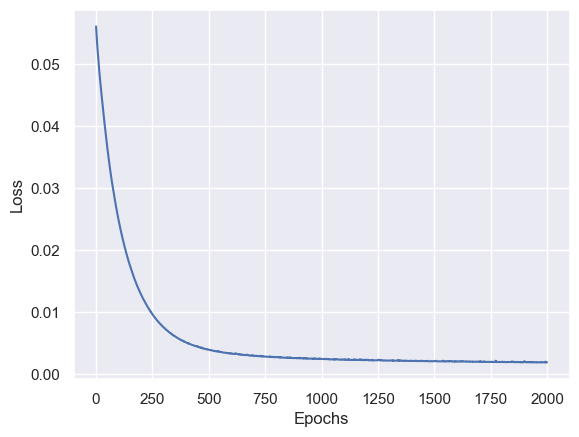

In [106]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

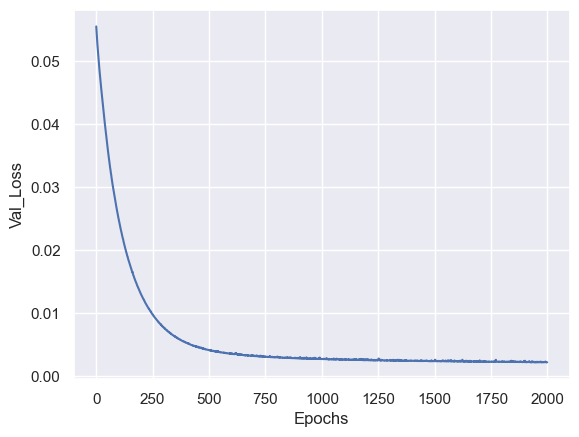

In [107]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [108]:
#modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\SIFE-Dwarfs.h5


In [109]:
predSIFE = modelSIFE.predict(X_test)

37/37 [==============================] - 0s 3ms/step


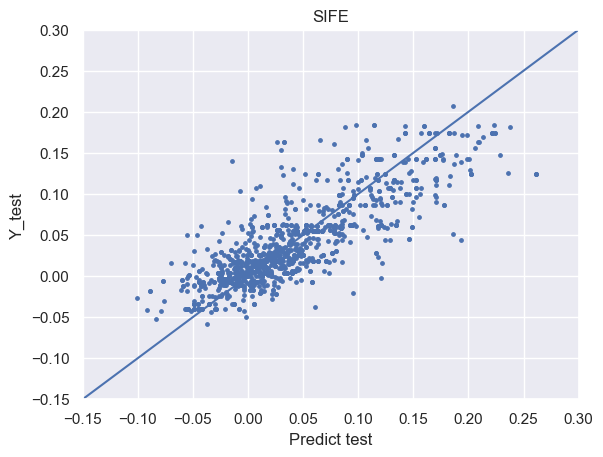

In [165]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [112]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 68.0%


In [113]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [114]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n04s42_0000922    5614.61     4.483   -0.321        0.015   
iDR4_3_SPLUS-s02s24_0026448    5560.31     4.130   -0.243        0.106   
iDR4_3_STRIPE82-0004_0022982   5544.87     3.961   -0.099        0.093   
iDR4_3_SPLUS-s02s24_0017447    5761.52     4.284   -0.077       -0.011   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0165_0023666   5658.80     4.347   -0.320        0.020   
iDR4_3_STRIPE82-0026_0048604   5439.85     4.357    0.155       -0.018   
iDR4_3_STRIPE82-0024_0041378   5935.10     4.354   -0.190        0.023   
iDR4_3_STRIPE82-0163_0030594   5461.22     4.171   -0.579        0.077   
iDR4_3_SPLUS-n05s43_0035236    5921.95     4.228   -0.027       -0.001   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n04s42_0000922  -0.01566  0.01452 -0.01405  0.04827 -0.00999   
iDR4_3_SPLUS-s02s24_0026448   0.13407  0.09465  0.18043  0.16192  0.08490   
iDR4_3_STRIPE82-0004_0022982  0.12628  0.07488  0.07711  0.16188  0.07047   
iDR4_3_SPLUS-s02s24_0017447  -0.01317  0.00475  0.05066 -0.00191 -0.01277   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0165_0023666 -0.02459  0.04167 -0.08318  0.04102 -0.00799   
iDR4_3_STRIPE82-0026_0048604 -0.01583  0.01494  0.08558 -0.01884  0.03580   
iDR4_3_STRIPE82-0024_0041378  0.06236 -0.00044 -0.02583  0.05630  0.06819   
iDR4_3_STRIPE82-0163_0030594  0.06860  0.04682  0.04739  0.13962  0.06204   
iDR4_3_SPLUS-n05s43_0035236   0.00060 -0.02050  0.10687 -0.00689  0.01619   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n04s42_0000922   0.00288       0.031826     0.041717   
iDR4_3_SPLUS-s02s24_0026448   0.06735       0.078964     0.090356   
iDR4_3_STRIPE82-0004_0022982  0.04280       0.104357     0.084881   
iDR4_3_SPLUS-s02s24_0017447  -0.02995       0.015733    -0.001886   
iDR4_3_STRIPE82-0026_0051498 -0.02686       0.072819     0.049584   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0165_0023666 -0.01725       0.067154     0.047232   
iDR4_3_STRIPE82-0026_0048604  0.02289      -0.023077     0.003027   
iDR4_3_STRIPE82-0024_0041378  0.00515       0.024620     0.029432   
iDR4_3_STRIPE82-0163_0030594  0.03031       0.150041     0.076970   
iDR4_3_SPLUS-n05s43_0035236  -0.01197       0.002199     0.009469   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_SPLUS-n04s42_0000922       0.038043     0.018725      0.062342   
iDR4_3_SPLUS-s02s24_0026448       0.065679     0.117048      0.151424   
iDR4_3_STRIPE82-0004_0022982      0.079115     0.053592      0.189259   
iDR4_3_SPLUS-s02s24_0017447       0.031909     0.021180      0.015744   
iDR4_3_STRIPE82-0026_0051498      0.055392     0.018950      0.113221   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0165_0023666      0.076051    -0.006235      0.078811   
iDR4_3_STRIPE82-0026_0048604     -0.012550     0.074290     -0.001422   
iDR4_3_STRIPE82-0024_0041378      0.017224     0.090615      0.037429   
iDR4_3_STRIPE82-0163_0030594      0.128650    -0.059289      0.224790   
iDR4_3_SPLUS-n05s43_0035236      -0.005815     0.020839     -0.007620   

                              SIFE_predict  
ID                                          
iDR4_3_SPLUS-n04s42_0000922       0.011189  
iDR4_3_SPLUS-s02s24_0026448       0.063202  
iDR4_3_STRIPE82-0004_0022982      0.0

In [115]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [166]:
Parametro = "NIFE"
columnTrain = 'ni_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [117]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0030564   5660.24     4.056   -0.956        0.246   
iDR4_3_STRIPE82-0026_0055354   5389.94     4.378   -0.353        0.131   
iDR4_3_STRIPE82-0026_0055354   5476.56     4.511   -0.425        0.160   
iDR4_3_SPLUS-s02s23_0001813    5823.78     4.284    0.018       -0.004   
iDR4_3_SPLUS-n02n27_0040307    5961.30     4.298   -0.498        0.052   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0033335    5557.02     4.383   -0.680        0.176   
iDR4_3_STRIPE82-0026_0051498   5644.89     4.379   -0.401        0.070   
iDR4_3_SPLUS-n07s43_0052159    5856.57     4.310   -0.574        0.133   
iDR4_3_STRIPE82-0024_0033734   5407.46     4.086    0.114        0.000   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0030564  0.26149  0.17125 -0.02060  0.33459  0.22452   
iDR4_3_STRIPE82-0026_0055354  0.05224  0.14798 -0.09113  0.19951  0.09237   
iDR4_3_STRIPE82-0026_0055354  0.08743  0.14381  0.23128  0.23816  0.17027   
iDR4_3_SPLUS-s02s23_0001813   0.01215 -0.00054  0.26834  0.01510 -0.00606   
iDR4_3_SPLUS-n02n27_0040307   0.11575  0.10684  0.05188  0.07724  0.04637   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0033335   0.20119  0.20564 -0.05531  0.26289  0.16825   
iDR4_3_STRIPE82-0026_0051498  0.05757  0.08006 -0.00527  0.11223  0.05705   
iDR4_3_SPLUS-n07s43_0052159   0.12070  0.27770 -0.10408  0.21106  0.09006   
iDR4_3_STRIPE82-0024_0033734  0.04154  0.00397  0.14313  0.03065  0.05357   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0024_0030564  0.09300  
iDR4_3_STRIPE82-0026_0055354  0.02761  
iDR4_3_STRIPE82-0026_0055354  0.02332  
iDR4_3_SPLUS-s02s23_0001813   0.02205  
iDR4_3_SPLUS-n02n27_0040307  -0.01119  
...                               ...  
iDR4_3_SPLUS-n05s44_0033335   0.12831  
iDR4_3_STRIPE82-0026_0051498 -0.00078  
iDR4_3_SPLUS-n07s43_0052159  -0.00112  
iDR4_3_STRIPE82-0024_0033734  0.05678  
iDR4_3_STRIPE82-0026_0051498 -0.02686  

[4216 rows x 10 columns]

In [118]:
modelNIFE = baseline_model_teste()

In [119]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
3/3 - 1s - loss: 0.0526 - val_loss: 0.0521 - 739ms/epoch - 246ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.0521 - val_loss: 0.0517 - 153ms/epoch - 51ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.0516 - val_loss: 0.0512 - 49ms/epoch - 16ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.0512 - val_loss: 0.0508 - 44ms/epoch - 15ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.0508 - val_loss: 0.0504 - 46ms/epoch - 15ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.0503 - val_loss: 0.0500 - 49ms/epoch - 16ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.0499 - val_loss: 0.0496 - 46ms/epoch - 15ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.0495 - val_loss: 0.0492 - 48ms/epoch - 16ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.0491 - val_loss: 0.0488 - 45ms/epoch - 15ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.0488 - val_loss: 0.0484 - 44ms/epoch - 15ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.0484 - val_loss: 0.0480 - 47ms/epoch - 16ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.0480 - val_loss: 0.0476 - 48ms/epoch - 16ms/step
Epoch 13/2000
3/3 - 0s

Epoch 101/2000
3/3 - 0s - loss: 0.0224 - val_loss: 0.0223 - 49ms/epoch - 16ms/step
Epoch 102/2000
3/3 - 0s - loss: 0.0222 - val_loss: 0.0221 - 50ms/epoch - 17ms/step
Epoch 103/2000
3/3 - 0s - loss: 0.0220 - val_loss: 0.0219 - 57ms/epoch - 19ms/step
Epoch 104/2000
3/3 - 0s - loss: 0.0218 - val_loss: 0.0217 - 62ms/epoch - 21ms/step
Epoch 105/2000
3/3 - 0s - loss: 0.0216 - val_loss: 0.0215 - 54ms/epoch - 18ms/step
Epoch 106/2000
3/3 - 0s - loss: 0.0215 - val_loss: 0.0213 - 63ms/epoch - 21ms/step
Epoch 107/2000
3/3 - 0s - loss: 0.0213 - val_loss: 0.0211 - 49ms/epoch - 16ms/step
Epoch 108/2000
3/3 - 0s - loss: 0.0211 - val_loss: 0.0210 - 51ms/epoch - 17ms/step
Epoch 109/2000
3/3 - 0s - loss: 0.0209 - val_loss: 0.0208 - 49ms/epoch - 16ms/step
Epoch 110/2000
3/3 - 0s - loss: 0.0207 - val_loss: 0.0206 - 50ms/epoch - 17ms/step
Epoch 111/2000
3/3 - 0s - loss: 0.0206 - val_loss: 0.0204 - 53ms/epoch - 18ms/step
Epoch 112/2000
3/3 - 0s - loss: 0.0204 - val_loss: 0.0203 - 57ms/epoch - 19ms/step
Epoc

Epoch 200/2000
3/3 - 0s - loss: 0.0098 - val_loss: 0.0098 - 59ms/epoch - 20ms/step
Epoch 201/2000
3/3 - 0s - loss: 0.0098 - val_loss: 0.0097 - 62ms/epoch - 21ms/step
Epoch 202/2000
3/3 - 0s - loss: 0.0097 - val_loss: 0.0096 - 59ms/epoch - 20ms/step
Epoch 203/2000
3/3 - 0s - loss: 0.0096 - val_loss: 0.0095 - 56ms/epoch - 19ms/step
Epoch 204/2000
3/3 - 0s - loss: 0.0095 - val_loss: 0.0095 - 64ms/epoch - 21ms/step
Epoch 205/2000
3/3 - 0s - loss: 0.0094 - val_loss: 0.0094 - 60ms/epoch - 20ms/step
Epoch 206/2000
3/3 - 0s - loss: 0.0094 - val_loss: 0.0093 - 55ms/epoch - 18ms/step
Epoch 207/2000
3/3 - 0s - loss: 0.0093 - val_loss: 0.0092 - 58ms/epoch - 19ms/step
Epoch 208/2000
3/3 - 0s - loss: 0.0092 - val_loss: 0.0092 - 59ms/epoch - 20ms/step
Epoch 209/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0091 - 58ms/epoch - 19ms/step
Epoch 210/2000
3/3 - 0s - loss: 0.0091 - val_loss: 0.0090 - 59ms/epoch - 20ms/step
Epoch 211/2000
3/3 - 0s - loss: 0.0090 - val_loss: 0.0089 - 61ms/epoch - 20ms/step
Epoc

Epoch 299/2000
3/3 - 0s - loss: 0.0046 - val_loss: 0.0046 - 56ms/epoch - 19ms/step
Epoch 300/2000
3/3 - 0s - loss: 0.0046 - val_loss: 0.0045 - 73ms/epoch - 24ms/step
Epoch 301/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0045 - 73ms/epoch - 24ms/step
Epoch 302/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0045 - 59ms/epoch - 20ms/step
Epoch 303/2000
3/3 - 0s - loss: 0.0045 - val_loss: 0.0045 - 57ms/epoch - 19ms/step
Epoch 304/2000
3/3 - 0s - loss: 0.0044 - val_loss: 0.0044 - 90ms/epoch - 30ms/step
Epoch 305/2000
3/3 - 0s - loss: 0.0044 - val_loss: 0.0044 - 73ms/epoch - 24ms/step
Epoch 306/2000
3/3 - 0s - loss: 0.0044 - val_loss: 0.0044 - 59ms/epoch - 20ms/step
Epoch 307/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0043 - 54ms/epoch - 18ms/step
Epoch 308/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0043 - 60ms/epoch - 20ms/step
Epoch 309/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0043 - 62ms/epoch - 21ms/step
Epoch 310/2000
3/3 - 0s - loss: 0.0043 - val_loss: 0.0042 - 59ms/epoch - 20ms/step
Epoc

Epoch 398/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0025 - 52ms/epoch - 17ms/step
Epoch 399/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0024 - 52ms/epoch - 17ms/step
Epoch 400/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0024 - 54ms/epoch - 18ms/step
Epoch 401/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0024 - 55ms/epoch - 18ms/step
Epoch 402/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0024 - 54ms/epoch - 18ms/step
Epoch 403/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0024 - 52ms/epoch - 17ms/step
Epoch 404/2000
3/3 - 0s - loss: 0.0024 - val_loss: 0.0024 - 53ms/epoch - 18ms/step
Epoch 405/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0024 - 54ms/epoch - 18ms/step
Epoch 406/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 56ms/epoch - 19ms/step
Epoch 407/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 55ms/epoch - 18ms/step
Epoch 408/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 62ms/epoch - 21ms/step
Epoch 409/2000
3/3 - 0s - loss: 0.0023 - val_loss: 0.0023 - 71ms/epoch - 24ms/step
Epoc

Epoch 497/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0016 - 68ms/epoch - 23ms/step
Epoch 498/2000
3/3 - 0s - loss: 0.0016 - val_loss: 0.0016 - 52ms/epoch - 17ms/step
Epoch 499/2000
3/3 - 0s - loss: 0.0015 - val_loss: 0.0016 - 55ms/epoch - 18ms/step
Epoch 500/2000
3/3 - 0s - loss: 0.0015 - val_loss: 0.0016 - 52ms/epoch - 17ms/step
Epoch 501/2000
3/3 - 0s - loss: 0.0015 - val_loss: 0.0015 - 88ms/epoch - 29ms/step
Epoch 502/2000
3/3 - 0s - loss: 0.0015 - val_loss: 0.0015 - 52ms/epoch - 17ms/step
Epoch 503/2000
3/3 - 0s - loss: 0.0015 - val_loss: 0.0015 - 104ms/epoch - 35ms/step
Epoch 504/2000
3/3 - 0s - loss: 0.0015 - val_loss: 0.0015 - 51ms/epoch - 17ms/step
Epoch 505/2000
3/3 - 0s - loss: 0.0015 - val_loss: 0.0015 - 78ms/epoch - 26ms/step
Epoch 506/2000
3/3 - 0s - loss: 0.0015 - val_loss: 0.0015 - 52ms/epoch - 17ms/step
Epoch 507/2000
3/3 - 0s - loss: 0.0015 - val_loss: 0.0015 - 68ms/epoch - 23ms/step
Epoch 508/2000
3/3 - 0s - loss: 0.0015 - val_loss: 0.0015 - 51ms/epoch - 17ms/step
Epo

Epoch 596/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 54ms/epoch - 18ms/step
Epoch 597/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 60ms/epoch - 20ms/step
Epoch 598/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 60ms/epoch - 20ms/step
Epoch 599/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 57ms/epoch - 19ms/step
Epoch 600/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 61ms/epoch - 20ms/step
Epoch 601/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 60ms/epoch - 20ms/step
Epoch 602/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 57ms/epoch - 19ms/step
Epoch 603/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 60ms/epoch - 20ms/step
Epoch 604/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 56ms/epoch - 19ms/step
Epoch 605/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 57ms/epoch - 19ms/step
Epoch 606/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 57ms/epoch - 19ms/step
Epoch 607/2000
3/3 - 0s - loss: 0.0012 - val_loss: 0.0012 - 59ms/epoch - 20ms/step
Epoc

Epoch 695/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 61ms/epoch - 20ms/step
Epoch 696/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 58ms/epoch - 19ms/step
Epoch 697/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 57ms/epoch - 19ms/step
Epoch 698/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 59ms/epoch - 20ms/step
Epoch 699/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 57ms/epoch - 19ms/step
Epoch 700/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 58ms/epoch - 19ms/step
Epoch 701/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 63ms/epoch - 21ms/step
Epoch 702/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 59ms/epoch - 20ms/step
Epoch 703/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 56ms/epoch - 19ms/step
Epoch 704/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 61ms/epoch - 20ms/step
Epoch 705/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0011 - 59ms/epoch - 20ms/step
Epoch 706/2000
3/3 - 0s - loss: 0.0010 - val_loss: 0.0010 - 60ms/epoch - 20ms/step
Epoc

Epoch 792/2000
3/3 - 0s - loss: 9.8304e-04 - val_loss: 0.0010 - 49ms/epoch - 16ms/step
Epoch 793/2000
3/3 - 0s - loss: 9.7948e-04 - val_loss: 9.9976e-04 - 52ms/epoch - 17ms/step
Epoch 794/2000
3/3 - 0s - loss: 9.8158e-04 - val_loss: 9.9963e-04 - 50ms/epoch - 17ms/step
Epoch 795/2000
3/3 - 0s - loss: 9.7895e-04 - val_loss: 0.0010 - 51ms/epoch - 17ms/step
Epoch 796/2000
3/3 - 0s - loss: 9.7882e-04 - val_loss: 0.0010 - 50ms/epoch - 17ms/step
Epoch 797/2000
3/3 - 0s - loss: 9.7593e-04 - val_loss: 9.9935e-04 - 52ms/epoch - 17ms/step
Epoch 798/2000
3/3 - 0s - loss: 9.7688e-04 - val_loss: 0.0010 - 52ms/epoch - 17ms/step
Epoch 799/2000
3/3 - 0s - loss: 9.8441e-04 - val_loss: 0.0010 - 51ms/epoch - 17ms/step
Epoch 800/2000
3/3 - 0s - loss: 9.8582e-04 - val_loss: 9.9743e-04 - 55ms/epoch - 18ms/step
Epoch 801/2000
3/3 - 0s - loss: 9.8001e-04 - val_loss: 9.9956e-04 - 58ms/epoch - 19ms/step
Epoch 802/2000
3/3 - 0s - loss: 9.7824e-04 - val_loss: 9.9558e-04 - 52ms/epoch - 17ms/step
Epoch 803/2000
3/3 

Epoch 883/2000
3/3 - 0s - loss: 9.5581e-04 - val_loss: 9.7627e-04 - 53ms/epoch - 18ms/step
Epoch 884/2000
3/3 - 0s - loss: 9.5354e-04 - val_loss: 9.8044e-04 - 56ms/epoch - 19ms/step
Epoch 885/2000
3/3 - 0s - loss: 9.5452e-04 - val_loss: 9.7889e-04 - 54ms/epoch - 18ms/step
Epoch 886/2000
3/3 - 0s - loss: 9.5314e-04 - val_loss: 9.7431e-04 - 55ms/epoch - 18ms/step
Epoch 887/2000
3/3 - 0s - loss: 9.5486e-04 - val_loss: 9.7425e-04 - 57ms/epoch - 19ms/step
Epoch 888/2000
3/3 - 0s - loss: 9.5261e-04 - val_loss: 9.7598e-04 - 56ms/epoch - 19ms/step
Epoch 889/2000
3/3 - 0s - loss: 9.5232e-04 - val_loss: 9.8385e-04 - 56ms/epoch - 19ms/step
Epoch 890/2000
3/3 - 0s - loss: 9.5447e-04 - val_loss: 9.7804e-04 - 55ms/epoch - 18ms/step
Epoch 891/2000
3/3 - 0s - loss: 9.5085e-04 - val_loss: 9.7653e-04 - 50ms/epoch - 17ms/step
Epoch 892/2000
3/3 - 0s - loss: 9.5256e-04 - val_loss: 9.7632e-04 - 62ms/epoch - 21ms/step
Epoch 893/2000
3/3 - 0s - loss: 9.4936e-04 - val_loss: 9.7677e-04 - 58ms/epoch - 19ms/step

3/3 - 0s - loss: 9.3816e-04 - val_loss: 9.6205e-04 - 60ms/epoch - 20ms/step
Epoch 974/2000
3/3 - 0s - loss: 9.3851e-04 - val_loss: 9.6045e-04 - 61ms/epoch - 20ms/step
Epoch 975/2000
3/3 - 0s - loss: 9.3560e-04 - val_loss: 9.6141e-04 - 63ms/epoch - 21ms/step
Epoch 976/2000
3/3 - 0s - loss: 9.3581e-04 - val_loss: 9.6804e-04 - 61ms/epoch - 20ms/step
Epoch 977/2000
3/3 - 0s - loss: 9.4215e-04 - val_loss: 9.5893e-04 - 65ms/epoch - 22ms/step
Epoch 978/2000
3/3 - 0s - loss: 9.3793e-04 - val_loss: 9.6034e-04 - 57ms/epoch - 19ms/step
Epoch 979/2000
3/3 - 0s - loss: 9.3577e-04 - val_loss: 9.6963e-04 - 61ms/epoch - 20ms/step
Epoch 980/2000
3/3 - 0s - loss: 9.3802e-04 - val_loss: 9.6340e-04 - 60ms/epoch - 20ms/step
Epoch 981/2000
3/3 - 0s - loss: 9.3821e-04 - val_loss: 9.6132e-04 - 58ms/epoch - 19ms/step
Epoch 982/2000
3/3 - 0s - loss: 9.3910e-04 - val_loss: 9.5888e-04 - 57ms/epoch - 19ms/step
Epoch 983/2000
3/3 - 0s - loss: 9.3585e-04 - val_loss: 9.6088e-04 - 63ms/epoch - 21ms/step
Epoch 984/2000

Epoch 1063/2000
3/3 - 0s - loss: 9.3143e-04 - val_loss: 9.6069e-04 - 59ms/epoch - 20ms/step
Epoch 1064/2000
3/3 - 0s - loss: 9.2793e-04 - val_loss: 9.5228e-04 - 60ms/epoch - 20ms/step
Epoch 1065/2000
3/3 - 0s - loss: 9.2589e-04 - val_loss: 9.5324e-04 - 59ms/epoch - 20ms/step
Epoch 1066/2000
3/3 - 0s - loss: 9.3108e-04 - val_loss: 9.5540e-04 - 56ms/epoch - 19ms/step
Epoch 1067/2000
3/3 - 0s - loss: 9.3129e-04 - val_loss: 9.5208e-04 - 58ms/epoch - 19ms/step
Epoch 1068/2000
3/3 - 0s - loss: 9.3196e-04 - val_loss: 9.5502e-04 - 62ms/epoch - 21ms/step
Epoch 1069/2000
3/3 - 0s - loss: 9.2939e-04 - val_loss: 9.5655e-04 - 57ms/epoch - 19ms/step
Epoch 1070/2000
3/3 - 0s - loss: 9.2690e-04 - val_loss: 9.5620e-04 - 57ms/epoch - 19ms/step
Epoch 1071/2000
3/3 - 0s - loss: 9.3094e-04 - val_loss: 9.6033e-04 - 58ms/epoch - 19ms/step
Epoch 1072/2000
3/3 - 0s - loss: 9.3402e-04 - val_loss: 9.5367e-04 - 56ms/epoch - 19ms/step
Epoch 1073/2000
3/3 - 0s - loss: 9.3048e-04 - val_loss: 9.5153e-04 - 57ms/epoch 

3/3 - 0s - loss: 9.2122e-04 - val_loss: 9.4966e-04 - 57ms/epoch - 19ms/step
Epoch 1153/2000
3/3 - 0s - loss: 9.1967e-04 - val_loss: 9.5032e-04 - 62ms/epoch - 21ms/step
Epoch 1154/2000
3/3 - 0s - loss: 9.1897e-04 - val_loss: 9.4875e-04 - 54ms/epoch - 18ms/step
Epoch 1155/2000
3/3 - 0s - loss: 9.2426e-04 - val_loss: 9.4822e-04 - 56ms/epoch - 19ms/step
Epoch 1156/2000
3/3 - 0s - loss: 9.1931e-04 - val_loss: 9.4575e-04 - 58ms/epoch - 19ms/step
Epoch 1157/2000
3/3 - 0s - loss: 9.1924e-04 - val_loss: 9.4397e-04 - 59ms/epoch - 20ms/step
Epoch 1158/2000
3/3 - 0s - loss: 9.2206e-04 - val_loss: 9.4787e-04 - 57ms/epoch - 19ms/step
Epoch 1159/2000
3/3 - 0s - loss: 9.2411e-04 - val_loss: 9.4836e-04 - 60ms/epoch - 20ms/step
Epoch 1160/2000
3/3 - 0s - loss: 9.1920e-04 - val_loss: 9.5445e-04 - 64ms/epoch - 21ms/step
Epoch 1161/2000
3/3 - 0s - loss: 9.2720e-04 - val_loss: 9.6052e-04 - 55ms/epoch - 18ms/step
Epoch 1162/2000
3/3 - 0s - loss: 9.3567e-04 - val_loss: 9.4680e-04 - 58ms/epoch - 19ms/step
Epoc

Epoch 1242/2000
3/3 - 0s - loss: 9.2719e-04 - val_loss: 9.4489e-04 - 60ms/epoch - 20ms/step
Epoch 1243/2000
3/3 - 0s - loss: 9.2352e-04 - val_loss: 9.4651e-04 - 64ms/epoch - 21ms/step
Epoch 1244/2000
3/3 - 0s - loss: 9.1702e-04 - val_loss: 9.5222e-04 - 69ms/epoch - 23ms/step
Epoch 1245/2000
3/3 - 0s - loss: 9.1873e-04 - val_loss: 9.6674e-04 - 64ms/epoch - 21ms/step
Epoch 1246/2000
3/3 - 0s - loss: 9.2645e-04 - val_loss: 9.4874e-04 - 58ms/epoch - 19ms/step
Epoch 1247/2000
3/3 - 0s - loss: 9.2162e-04 - val_loss: 9.4489e-04 - 59ms/epoch - 20ms/step
Epoch 1248/2000
3/3 - 0s - loss: 9.1468e-04 - val_loss: 9.4774e-04 - 62ms/epoch - 21ms/step
Epoch 1249/2000
3/3 - 0s - loss: 9.1337e-04 - val_loss: 9.4180e-04 - 62ms/epoch - 21ms/step
Epoch 1250/2000
3/3 - 0s - loss: 9.1544e-04 - val_loss: 9.6030e-04 - 59ms/epoch - 20ms/step
Epoch 1251/2000
3/3 - 0s - loss: 9.3606e-04 - val_loss: 9.4260e-04 - 56ms/epoch - 19ms/step
Epoch 1252/2000
3/3 - 0s - loss: 9.2782e-04 - val_loss: 9.4354e-04 - 61ms/epoch 

3/3 - 0s - loss: 9.1327e-04 - val_loss: 9.4544e-04 - 58ms/epoch - 19ms/step
Epoch 1332/2000
3/3 - 0s - loss: 9.1524e-04 - val_loss: 9.4397e-04 - 57ms/epoch - 19ms/step
Epoch 1333/2000
3/3 - 0s - loss: 9.1259e-04 - val_loss: 9.4465e-04 - 61ms/epoch - 20ms/step
Epoch 1334/2000
3/3 - 0s - loss: 9.1101e-04 - val_loss: 9.4318e-04 - 59ms/epoch - 20ms/step
Epoch 1335/2000
3/3 - 0s - loss: 9.1793e-04 - val_loss: 9.3776e-04 - 57ms/epoch - 19ms/step
Epoch 1336/2000
3/3 - 0s - loss: 9.1035e-04 - val_loss: 9.4165e-04 - 60ms/epoch - 20ms/step
Epoch 1337/2000
3/3 - 0s - loss: 9.0995e-04 - val_loss: 9.3811e-04 - 61ms/epoch - 20ms/step
Epoch 1338/2000
3/3 - 0s - loss: 9.0864e-04 - val_loss: 9.4465e-04 - 57ms/epoch - 19ms/step
Epoch 1339/2000
3/3 - 0s - loss: 9.0874e-04 - val_loss: 9.4086e-04 - 59ms/epoch - 20ms/step
Epoch 1340/2000
3/3 - 0s - loss: 9.0879e-04 - val_loss: 9.3797e-04 - 57ms/epoch - 19ms/step
Epoch 1341/2000
3/3 - 0s - loss: 9.0859e-04 - val_loss: 9.3704e-04 - 56ms/epoch - 19ms/step
Epoc

Epoch 1421/2000
3/3 - 0s - loss: 9.0607e-04 - val_loss: 9.3333e-04 - 59ms/epoch - 20ms/step
Epoch 1422/2000
3/3 - 0s - loss: 9.0526e-04 - val_loss: 9.3492e-04 - 56ms/epoch - 19ms/step
Epoch 1423/2000
3/3 - 0s - loss: 9.0286e-04 - val_loss: 9.3390e-04 - 59ms/epoch - 20ms/step
Epoch 1424/2000
3/3 - 0s - loss: 9.0303e-04 - val_loss: 9.3550e-04 - 56ms/epoch - 19ms/step
Epoch 1425/2000
3/3 - 0s - loss: 9.0330e-04 - val_loss: 9.3628e-04 - 63ms/epoch - 21ms/step
Epoch 1426/2000
3/3 - 0s - loss: 9.0273e-04 - val_loss: 9.3683e-04 - 54ms/epoch - 18ms/step
Epoch 1427/2000
3/3 - 0s - loss: 9.0374e-04 - val_loss: 9.3512e-04 - 58ms/epoch - 19ms/step
Epoch 1428/2000
3/3 - 0s - loss: 9.0212e-04 - val_loss: 9.3880e-04 - 58ms/epoch - 19ms/step
Epoch 1429/2000
3/3 - 0s - loss: 9.0366e-04 - val_loss: 9.3375e-04 - 58ms/epoch - 19ms/step
Epoch 1430/2000
3/3 - 0s - loss: 9.0351e-04 - val_loss: 9.3413e-04 - 61ms/epoch - 20ms/step
Epoch 1431/2000
3/3 - 0s - loss: 9.0432e-04 - val_loss: 9.3335e-04 - 62ms/epoch 

3/3 - 0s - loss: 9.0458e-04 - val_loss: 9.2832e-04 - 58ms/epoch - 19ms/step
Epoch 1511/2000
3/3 - 0s - loss: 9.0189e-04 - val_loss: 9.3033e-04 - 61ms/epoch - 20ms/step
Epoch 1512/2000
3/3 - 0s - loss: 9.0096e-04 - val_loss: 9.3009e-04 - 57ms/epoch - 19ms/step
Epoch 1513/2000
3/3 - 0s - loss: 9.0254e-04 - val_loss: 9.3137e-04 - 63ms/epoch - 21ms/step
Epoch 1514/2000
3/3 - 0s - loss: 8.9943e-04 - val_loss: 9.2946e-04 - 60ms/epoch - 20ms/step
Epoch 1515/2000
3/3 - 0s - loss: 9.0275e-04 - val_loss: 9.2740e-04 - 68ms/epoch - 23ms/step
Epoch 1516/2000
3/3 - 0s - loss: 9.0103e-04 - val_loss: 9.3058e-04 - 59ms/epoch - 20ms/step
Epoch 1517/2000
3/3 - 0s - loss: 8.9859e-04 - val_loss: 9.4856e-04 - 59ms/epoch - 20ms/step
Epoch 1518/2000
3/3 - 0s - loss: 9.1774e-04 - val_loss: 9.4075e-04 - 60ms/epoch - 20ms/step
Epoch 1519/2000
3/3 - 0s - loss: 9.1486e-04 - val_loss: 9.3077e-04 - 62ms/epoch - 21ms/step
Epoch 1520/2000
3/3 - 0s - loss: 9.2097e-04 - val_loss: 9.2877e-04 - 61ms/epoch - 20ms/step
Epoc

Epoch 1600/2000
3/3 - 0s - loss: 9.0424e-04 - val_loss: 9.3378e-04 - 55ms/epoch - 18ms/step
Epoch 1601/2000
3/3 - 0s - loss: 9.0846e-04 - val_loss: 9.2593e-04 - 54ms/epoch - 18ms/step
Epoch 1602/2000
3/3 - 0s - loss: 8.9658e-04 - val_loss: 9.2570e-04 - 57ms/epoch - 19ms/step
Epoch 1603/2000
3/3 - 0s - loss: 8.9492e-04 - val_loss: 9.2448e-04 - 59ms/epoch - 20ms/step
Epoch 1604/2000
3/3 - 0s - loss: 8.9360e-04 - val_loss: 9.3696e-04 - 60ms/epoch - 20ms/step
Epoch 1605/2000
3/3 - 0s - loss: 9.0039e-04 - val_loss: 9.2547e-04 - 56ms/epoch - 19ms/step
Epoch 1606/2000
3/3 - 0s - loss: 8.9875e-04 - val_loss: 9.3011e-04 - 59ms/epoch - 20ms/step
Epoch 1607/2000
3/3 - 0s - loss: 9.0075e-04 - val_loss: 9.2713e-04 - 61ms/epoch - 20ms/step
Epoch 1608/2000
3/3 - 0s - loss: 8.9594e-04 - val_loss: 9.2941e-04 - 57ms/epoch - 19ms/step
Epoch 1609/2000
3/3 - 0s - loss: 8.9699e-04 - val_loss: 9.3031e-04 - 61ms/epoch - 20ms/step
Epoch 1610/2000
3/3 - 0s - loss: 8.9637e-04 - val_loss: 9.2894e-04 - 57ms/epoch 

3/3 - 0s - loss: 8.9614e-04 - val_loss: 9.2569e-04 - 56ms/epoch - 19ms/step
Epoch 1690/2000
3/3 - 0s - loss: 8.9872e-04 - val_loss: 9.2150e-04 - 63ms/epoch - 21ms/step
Epoch 1691/2000
3/3 - 0s - loss: 8.9551e-04 - val_loss: 9.2495e-04 - 59ms/epoch - 20ms/step
Epoch 1692/2000
3/3 - 0s - loss: 8.9417e-04 - val_loss: 9.2772e-04 - 58ms/epoch - 19ms/step
Epoch 1693/2000
3/3 - 0s - loss: 8.9434e-04 - val_loss: 9.2239e-04 - 60ms/epoch - 20ms/step
Epoch 1694/2000
3/3 - 0s - loss: 8.9158e-04 - val_loss: 9.2208e-04 - 59ms/epoch - 20ms/step
Epoch 1695/2000
3/3 - 0s - loss: 8.9040e-04 - val_loss: 9.2274e-04 - 58ms/epoch - 19ms/step
Epoch 1696/2000
3/3 - 0s - loss: 8.9131e-04 - val_loss: 9.2407e-04 - 66ms/epoch - 22ms/step
Epoch 1697/2000
3/3 - 0s - loss: 8.9129e-04 - val_loss: 9.2336e-04 - 57ms/epoch - 19ms/step
Epoch 1698/2000
3/3 - 0s - loss: 8.9723e-04 - val_loss: 9.2406e-04 - 58ms/epoch - 19ms/step
Epoch 1699/2000
3/3 - 0s - loss: 8.9522e-04 - val_loss: 9.2294e-04 - 61ms/epoch - 20ms/step
Epoc

Epoch 1779/2000
3/3 - 0s - loss: 8.8593e-04 - val_loss: 9.1873e-04 - 62ms/epoch - 21ms/step
Epoch 1780/2000
3/3 - 0s - loss: 8.8681e-04 - val_loss: 9.1777e-04 - 58ms/epoch - 19ms/step
Epoch 1781/2000
3/3 - 0s - loss: 8.8687e-04 - val_loss: 9.2093e-04 - 59ms/epoch - 20ms/step
Epoch 1782/2000
3/3 - 0s - loss: 8.8886e-04 - val_loss: 9.2366e-04 - 65ms/epoch - 22ms/step
Epoch 1783/2000
3/3 - 0s - loss: 8.8966e-04 - val_loss: 9.1792e-04 - 112ms/epoch - 37ms/step
Epoch 1784/2000
3/3 - 0s - loss: 8.8764e-04 - val_loss: 9.1861e-04 - 60ms/epoch - 20ms/step
Epoch 1785/2000
3/3 - 0s - loss: 8.8744e-04 - val_loss: 9.1917e-04 - 75ms/epoch - 25ms/step
Epoch 1786/2000
3/3 - 0s - loss: 8.8633e-04 - val_loss: 9.2103e-04 - 57ms/epoch - 19ms/step
Epoch 1787/2000
3/3 - 0s - loss: 8.8790e-04 - val_loss: 9.2288e-04 - 69ms/epoch - 23ms/step
Epoch 1788/2000
3/3 - 0s - loss: 8.8747e-04 - val_loss: 9.1988e-04 - 60ms/epoch - 20ms/step
Epoch 1789/2000
3/3 - 0s - loss: 8.8515e-04 - val_loss: 9.1993e-04 - 58ms/epoch

3/3 - 0s - loss: 8.8937e-04 - val_loss: 9.1956e-04 - 57ms/epoch - 19ms/step
Epoch 1869/2000
3/3 - 0s - loss: 8.8497e-04 - val_loss: 9.2600e-04 - 65ms/epoch - 22ms/step
Epoch 1870/2000
3/3 - 0s - loss: 8.8929e-04 - val_loss: 9.2312e-04 - 58ms/epoch - 19ms/step
Epoch 1871/2000
3/3 - 0s - loss: 8.8580e-04 - val_loss: 9.1681e-04 - 62ms/epoch - 21ms/step
Epoch 1872/2000
3/3 - 0s - loss: 8.8476e-04 - val_loss: 9.2112e-04 - 69ms/epoch - 23ms/step
Epoch 1873/2000
3/3 - 0s - loss: 8.8610e-04 - val_loss: 9.1968e-04 - 62ms/epoch - 21ms/step
Epoch 1874/2000
3/3 - 0s - loss: 8.8484e-04 - val_loss: 9.2528e-04 - 85ms/epoch - 28ms/step
Epoch 1875/2000
3/3 - 0s - loss: 8.9043e-04 - val_loss: 9.1995e-04 - 71ms/epoch - 24ms/step
Epoch 1876/2000
3/3 - 0s - loss: 8.8417e-04 - val_loss: 9.2061e-04 - 69ms/epoch - 23ms/step
Epoch 1877/2000
3/3 - 0s - loss: 8.9446e-04 - val_loss: 9.1942e-04 - 68ms/epoch - 23ms/step
Epoch 1878/2000
3/3 - 0s - loss: 8.8841e-04 - val_loss: 9.1731e-04 - 69ms/epoch - 23ms/step
Epoc

Epoch 1958/2000
3/3 - 0s - loss: 8.8052e-04 - val_loss: 9.1489e-04 - 61ms/epoch - 20ms/step
Epoch 1959/2000
3/3 - 0s - loss: 8.8131e-04 - val_loss: 9.1293e-04 - 61ms/epoch - 20ms/step
Epoch 1960/2000
3/3 - 0s - loss: 8.8113e-04 - val_loss: 9.1035e-04 - 61ms/epoch - 20ms/step
Epoch 1961/2000
3/3 - 0s - loss: 8.8216e-04 - val_loss: 9.1344e-04 - 61ms/epoch - 20ms/step
Epoch 1962/2000
3/3 - 0s - loss: 8.8233e-04 - val_loss: 9.1416e-04 - 57ms/epoch - 19ms/step
Epoch 1963/2000
3/3 - 0s - loss: 8.7963e-04 - val_loss: 9.1428e-04 - 59ms/epoch - 20ms/step
Epoch 1964/2000
3/3 - 0s - loss: 8.8109e-04 - val_loss: 9.1802e-04 - 57ms/epoch - 19ms/step
Epoch 1965/2000
3/3 - 0s - loss: 8.8301e-04 - val_loss: 9.1229e-04 - 63ms/epoch - 21ms/step
Epoch 1966/2000
3/3 - 0s - loss: 8.8389e-04 - val_loss: 9.1250e-04 - 59ms/epoch - 20ms/step
Epoch 1967/2000
3/3 - 0s - loss: 8.8198e-04 - val_loss: 9.1289e-04 - 65ms/epoch - 22ms/step
Epoch 1968/2000
3/3 - 0s - loss: 8.8092e-04 - val_loss: 9.1292e-04 - 60ms/epoch 

Text(0, 0.5, 'Loss')

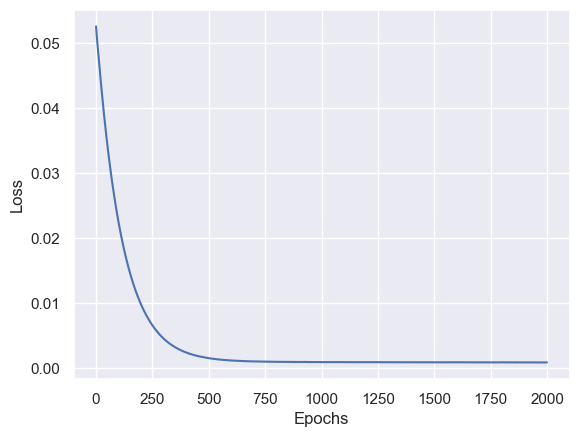

In [120]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

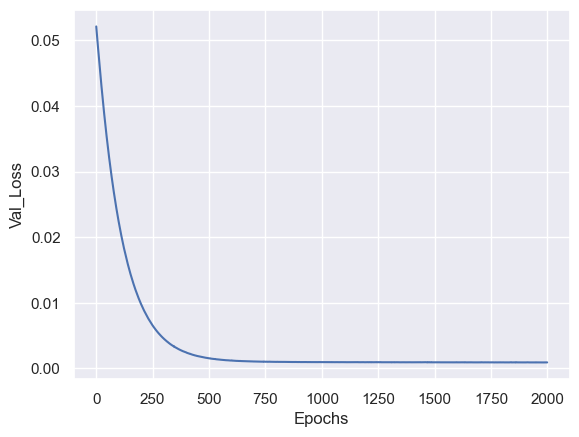

In [121]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [122]:
#modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NIFE-Dwarfs.h5


In [123]:
predNIFE = modelNIFE.predict(X_test)

37/37 [==============================] - 0s 3ms/step


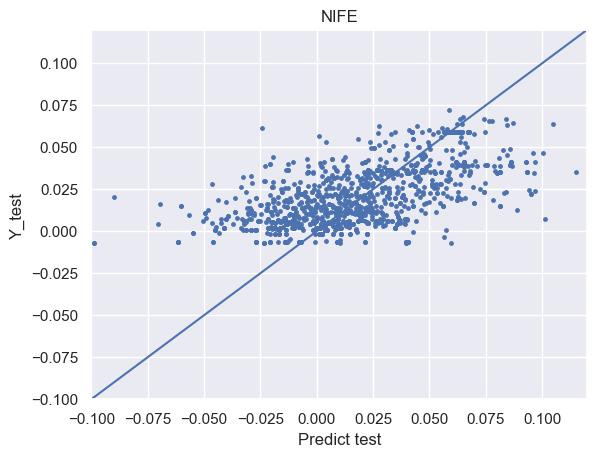

In [167]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [126]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 34.0%


In [127]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [128]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n04s42_0000922    5614.61     4.483   -0.321        0.015   
iDR4_3_SPLUS-s02s24_0026448    5560.31     4.130   -0.243        0.106   
iDR4_3_STRIPE82-0004_0022982   5544.87     3.961   -0.099        0.093   
iDR4_3_SPLUS-s02s24_0017447    5761.52     4.284   -0.077       -0.011   
iDR4_3_STRIPE82-0026_0051498   5604.31     4.446   -0.499        0.116   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0165_0023666   5658.80     4.347   -0.320        0.020   
iDR4_3_STRIPE82-0026_0048604   5439.85     4.357    0.155       -0.018   
iDR4_3_STRIPE82-0024_0041378   5935.10     4.354   -0.190        0.023   
iDR4_3_STRIPE82-0163_0030594   5461.22     4.171   -0.579        0.077   
iDR4_3_SPLUS-n05s43_0035236    5921.95     4.228   -0.027       -0.001   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n04s42_0000922  -0.01566  0.01452 -0.01405  0.04827 -0.00999   
iDR4_3_SPLUS-s02s24_0026448   0.13407  0.09465  0.18043  0.16192  0.08490   
iDR4_3_STRIPE82-0004_0022982  0.12628  0.07488  0.07711  0.16188  0.07047   
iDR4_3_SPLUS-s02s24_0017447  -0.01317  0.00475  0.05066 -0.00191 -0.01277   
iDR4_3_STRIPE82-0026_0051498  0.08918  0.10518 -0.01105  0.17845  0.12085   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0165_0023666 -0.02459  0.04167 -0.08318  0.04102 -0.00799   
iDR4_3_STRIPE82-0026_0048604 -0.01583  0.01494  0.08558 -0.01884  0.03580   
iDR4_3_STRIPE82-0024_0041378  0.06236 -0.00044 -0.02583  0.05630  0.06819   
iDR4_3_STRIPE82-0163_0030594  0.06860  0.04682  0.04739  0.13962  0.06204   
iDR4_3_SPLUS-n05s43_0035236   0.00060 -0.02050  0.10687 -0.00689  0.01619   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n04s42_0000922   0.00288       0.031826     0.041717   
iDR4_3_SPLUS-s02s24_0026448   0.06735       0.078964     0.090356   
iDR4_3_STRIPE82-0004_0022982  0.04280       0.104357     0.084881   
iDR4_3_SPLUS-s02s24_0017447  -0.02995       0.015733    -0.001886   
iDR4_3_STRIPE82-0026_0051498 -0.02686       0.072819     0.049584   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0165_0023666 -0.01725       0.067154     0.047232   
iDR4_3_STRIPE82-0026_0048604  0.02289      -0.023077     0.003027   
iDR4_3_STRIPE82-0024_0041378  0.00515       0.024620     0.029432   
iDR4_3_STRIPE82-0163_0030594  0.03031       0.150041     0.076970   
iDR4_3_SPLUS-n05s43_0035236  -0.01197       0.002199     0.009469   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_SPLUS-n04s42_0000922       0.038043     0.018725      0.062342   
iDR4_3_SPLUS-s02s24_0026448       0.065679     0.117048      0.151424   
iDR4_3_STRIPE82-0004_0022982      0.079115     0.053592      0.189259   
iDR4_3_SPLUS-s02s24_0017447       0.031909     0.021180      0.015744   
iDR4_3_STRIPE82-0026_0051498      0.055392     0.018950      0.113221   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0165_0023666      0.076051    -0.006235      0.078811   
iDR4_3_STRIPE82-0026_0048604     -0.012550     0.074290     -0.001422   
iDR4_3_STRIPE82-0024_0041378      0.017224     0.090615      0.037429   
iDR4_3_STRIPE82-0163_0030594      0.128650    -0.059289      0.224790   
iDR4_3_SPLUS-n05s43_0035236      -0.005815     0.020839     -0.007620   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_SPLUS-n04s42_0000922       0.011189      0.017904  
iDR4_3_SPLUS-s02s24_0026448       0.0632

In [129]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

# Giants

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

NomeBase = "LamostMedium"

Loaded  10 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

In [3]:
# define baseline model
def baseline_model_teste1():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')

    encoded0 = Dense(200, name='encoded0', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(input_x0)
    a0 = LeakyReLU(alpha=0.01)(encoded0)
    drop0 = Dropout(0.2)(a0)  # 20% dropout

    encoded1 = Dense(300, name='encoded1', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop0)
    a1 = LeakyReLU(alpha=0.01)(encoded1)
    drop1 = Dropout(0.2)(a1)  # 20% dropout

    encoded2 = Dense(500, name='encoded2', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop1)
    a2 = LeakyReLU(alpha=0.01)(encoded2)
    drop2 = Dropout(0.2)(a2)  # 20% dropout

    encoded3 = Dense(300, name='encoded3', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop2)
    a3 = LeakyReLU(alpha=0.01)(encoded3)
    drop3 = Dropout(0.2)(a3)  # 20% dropout

    encoded4 = Dense(100, name='encoded4', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop3)
    a4 = LeakyReLU(alpha=0.01)(encoded4)
    drop4 = Dropout(0.2)(a4)  # 20% dropout

    encoded5 = Dense(50, name='encoded5', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop4)
    a5 = LeakyReLU(alpha=0.01)(encoded5)

    output_y0 = Dense(1, name='oup0', kernel_initializer='he_normal', activation='linear')(a5)
    
    trainable_model = Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return trainable_model

In [4]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [6]:
GigCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Giants.csv", index_col = 'ID')

In [7]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s26_0045087   0.3150  0.5812  1.2739  1.4481  2.0087  2.2011   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s26_0045087   2.6997  2.7722  2.9449  3.0170  ...   4827.18   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201     0.09857   
iDR4_3_SPLUS-n01s26_0045087      3.162   -0.188        0.157     0.12756   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197     0.10864   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026      0.20527    -0.05186     0.28106     0.16079   
iDR4_3_SPLUS-n01s26_0045087      0.13231     0.03145     0.24134     0.13181   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0168_0021419     0.19329    -0.16436     0.27598     0.13263   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [8]:
xtrain = GigCores.iloc[:, :66]

In [9]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [10]:
ytrain = GigCores[columnYtrain]

In [11]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffMedium')

In [12]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [13]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [14]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [15]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0036201   5037.72     3.637    0.011    -9999.000   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_SPLUS-n06s44_0036362    5192.51     3.734   -0.439        0.067   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_STRIPE82-0024_0036201   5004.99     3.746   -0.008        0.057   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s42_0045596    4997.88     3.757    0.027        0.062   
iDR4_3_STRIPE82-0028_0025061   5025.45     3.227   -0.337    -9999.000   
iDR4_3_SPLUS-n07s43_0047313    5178.59     3.469   -0.333        0.027   
iDR4_3_STRIPE82-0101_0091026   4864.97     2.427   -0.409    -9999.000   
iDR4_3_STRIPE82-0109_0066939   4840.77     2.571   -0.008    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_SPLUS-n06s44_0036362      0.08010     0.10334    -0.17856     0.11915   
iDR4_3_STRIPE82-0024_0036201     0.10002     0.06828     0.00861     0.11226   
iDR4_3_STRIPE82-0024_0036201     0.12900     0.04661    -0.01019     0.11996   
...                                  ...         ...         ...         ...   
iDR4_3_SPLUS-n06s42_0045596      0.12224     0.05240     0.03504     0.12735   
iDR4_3_STRIPE82-0028_0025061 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n07s43_0047313      0.02903     0.07342     0.00969     0.07872   
iDR4_3_STRIPE82-0101_0091026 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0109_0066939 -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  
ID                                                                 
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.131301  
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643  
iDR4_3_SPLUS-n06s44_0036362      0.02420     0.04788     0.008120  
iDR4_3_STRIPE82-0024_0036201     0.03774     0.03733    -0.093786  
iDR4_3_STRIPE82-0024_0036201     0.06104     0.05978    -0.160781  
...                                  ...         ...          ...  
iDR4_3_SPLUS-n06s42_0045596      0.04429     0.05725    -0.167185  
iDR4_3_STRIPE82-0028_0025061 -9999.00000 -9999.00000    -0.142353  
iDR4_3_SPLUS-n07s43_0047313     -0.01739     0.01715    -0.004418  
iDR4_3_STRIPE82-0101_0091026 -9999.00000 -9999.00000    -0.286899  
iDR4_3_STRIPE82-0109_0066939 -9999.00000 -9999.00000    -0.308696  

[1264 rows x 11 columns]

### Teff

In [46]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [47]:
modelTEFF = baseline_model_teste()

In [48]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 1000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 1s - loss: 0.1391 - val_loss: 0.1257 - 616ms/epoch - 308ms/step
Epoch 2/3000
2/2 - 0s - loss: 0.1381 - val_loss: 0.1249 - 253ms/epoch - 126ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.1372 - val_loss: 0.1240 - 44ms/epoch - 22ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.1364 - val_loss: 0.1232 - 43ms/epoch - 22ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.1355 - val_loss: 0.1223 - 42ms/epoch - 21ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.1346 - val_loss: 0.1214 - 47ms/epoch - 24ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.1336 - val_loss: 0.1203 - 42ms/epoch - 21ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.1325 - val_loss: 0.1192 - 43ms/epoch - 22ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.1313 - val_loss: 0.1179 - 48ms/epoch - 24ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.1300 - val_loss: 0.1164 - 42ms/epoch - 21ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.1285 - val_loss: 0.1148 - 41ms/epoch - 21ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.1268 - val_loss: 0.1130 - 44ms/epoch - 22ms/step
Epoch 13/3000
2/2 - 0

Epoch 101/3000
2/2 - 0s - loss: 0.0418 - val_loss: 0.0416 - 55ms/epoch - 27ms/step
Epoch 102/3000
2/2 - 0s - loss: 0.0417 - val_loss: 0.0415 - 58ms/epoch - 29ms/step
Epoch 103/3000
2/2 - 0s - loss: 0.0415 - val_loss: 0.0415 - 47ms/epoch - 24ms/step
Epoch 104/3000
2/2 - 0s - loss: 0.0414 - val_loss: 0.0412 - 45ms/epoch - 23ms/step
Epoch 105/3000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0412 - 51ms/epoch - 25ms/step
Epoch 106/3000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0411 - 47ms/epoch - 24ms/step
Epoch 107/3000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0409 - 46ms/epoch - 23ms/step
Epoch 108/3000
2/2 - 0s - loss: 0.0409 - val_loss: 0.0407 - 45ms/epoch - 22ms/step
Epoch 109/3000
2/2 - 0s - loss: 0.0407 - val_loss: 0.0407 - 50ms/epoch - 25ms/step
Epoch 110/3000
2/2 - 0s - loss: 0.0406 - val_loss: 0.0405 - 48ms/epoch - 24ms/step
Epoch 111/3000
2/2 - 0s - loss: 0.0405 - val_loss: 0.0404 - 50ms/epoch - 25ms/step
Epoch 112/3000
2/2 - 0s - loss: 0.0403 - val_loss: 0.0405 - 50ms/epoch - 25ms/step
Epoc

Epoch 200/3000
2/2 - 0s - loss: 0.0317 - val_loss: 0.0318 - 53ms/epoch - 27ms/step
Epoch 201/3000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0317 - 54ms/epoch - 27ms/step
Epoch 202/3000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0316 - 53ms/epoch - 26ms/step
Epoch 203/3000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0317 - 51ms/epoch - 25ms/step
Epoch 204/3000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0315 - 56ms/epoch - 28ms/step
Epoch 205/3000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0315 - 50ms/epoch - 25ms/step
Epoch 206/3000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0314 - 53ms/epoch - 26ms/step
Epoch 207/3000
2/2 - 0s - loss: 0.0311 - val_loss: 0.0312 - 47ms/epoch - 24ms/step
Epoch 208/3000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0312 - 52ms/epoch - 26ms/step
Epoch 209/3000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0313 - 56ms/epoch - 28ms/step
Epoch 210/3000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0310 - 55ms/epoch - 28ms/step
Epoch 211/3000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0309 - 46ms/epoch - 23ms/step
Epoc

Epoch 299/3000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0253 - 50ms/epoch - 25ms/step
Epoch 300/3000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0252 - 43ms/epoch - 22ms/step
Epoch 301/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0255 - 53ms/epoch - 26ms/step
Epoch 302/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0250 - 52ms/epoch - 26ms/step
Epoch 303/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0250 - 51ms/epoch - 26ms/step
Epoch 304/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0253 - 49ms/epoch - 25ms/step
Epoch 305/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0249 - 55ms/epoch - 28ms/step
Epoch 306/3000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0250 - 45ms/epoch - 23ms/step
Epoch 307/3000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0250 - 51ms/epoch - 26ms/step
Epoch 308/3000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0248 - 70ms/epoch - 35ms/step
Epoch 309/3000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0249 - 53ms/epoch - 27ms/step
Epoch 310/3000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0248 - 49ms/epoch - 25ms/step
Epoc

Epoch 398/3000
2/2 - 0s - loss: 0.0209 - val_loss: 0.0209 - 53ms/epoch - 27ms/step
Epoch 399/3000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0210 - 47ms/epoch - 24ms/step
Epoch 400/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0211 - 61ms/epoch - 31ms/step
Epoch 401/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0208 - 50ms/epoch - 25ms/step
Epoch 402/3000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0210 - 50ms/epoch - 25ms/step
Epoch 403/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0209 - 58ms/epoch - 29ms/step
Epoch 404/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0206 - 50ms/epoch - 25ms/step
Epoch 405/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0210 - 52ms/epoch - 26ms/step
Epoch 406/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0206 - 49ms/epoch - 25ms/step
Epoch 407/3000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0206 - 46ms/epoch - 23ms/step
Epoch 408/3000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0211 - 50ms/epoch - 25ms/step
Epoch 409/3000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0205 - 52ms/epoch - 26ms/step
Epoc

Epoch 497/3000
2/2 - 0s - loss: 0.0178 - val_loss: 0.0182 - 69ms/epoch - 34ms/step
Epoch 498/3000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0179 - 45ms/epoch - 23ms/step
Epoch 499/3000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0179 - 69ms/epoch - 35ms/step
Epoch 500/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0181 - 49ms/epoch - 24ms/step
Epoch 501/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0179 - 69ms/epoch - 35ms/step
Epoch 502/3000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0181 - 57ms/epoch - 28ms/step
Epoch 503/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0180 - 50ms/epoch - 25ms/step
Epoch 504/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0177 - 50ms/epoch - 25ms/step
Epoch 505/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0182 - 50ms/epoch - 25ms/step
Epoch 506/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0176 - 51ms/epoch - 26ms/step
Epoch 507/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0177 - 50ms/epoch - 25ms/step
Epoch 508/3000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0180 - 54ms/epoch - 27ms/step
Epoc

Epoch 596/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0158 - 47ms/epoch - 24ms/step
Epoch 597/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0158 - 50ms/epoch - 25ms/step
Epoch 598/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0158 - 56ms/epoch - 28ms/step
Epoch 599/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0158 - 48ms/epoch - 24ms/step
Epoch 600/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0158 - 47ms/epoch - 23ms/step
Epoch 601/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0157 - 55ms/epoch - 28ms/step
Epoch 602/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0159 - 47ms/epoch - 24ms/step
Epoch 603/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0157 - 46ms/epoch - 23ms/step
Epoch 604/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0157 - 47ms/epoch - 24ms/step
Epoch 605/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0159 - 56ms/epoch - 28ms/step
Epoch 606/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0156 - 56ms/epoch - 28ms/step
Epoch 607/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0156 - 53ms/epoch - 27ms/step
Epoc

Epoch 695/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0143 - 57ms/epoch - 29ms/step
Epoch 696/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0143 - 50ms/epoch - 25ms/step
Epoch 697/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0143 - 50ms/epoch - 25ms/step
Epoch 698/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0143 - 51ms/epoch - 26ms/step
Epoch 699/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0142 - 51ms/epoch - 26ms/step
Epoch 700/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0144 - 51ms/epoch - 25ms/step
Epoch 701/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0142 - 55ms/epoch - 28ms/step
Epoch 702/3000
2/2 - 0s - loss: 0.0137 - val_loss: 0.0143 - 49ms/epoch - 25ms/step
Epoch 703/3000
2/2 - 0s - loss: 0.0137 - val_loss: 0.0144 - 51ms/epoch - 25ms/step
Epoch 704/3000
2/2 - 0s - loss: 0.0137 - val_loss: 0.0142 - 49ms/epoch - 25ms/step
Epoch 705/3000
2/2 - 0s - loss: 0.0137 - val_loss: 0.0145 - 53ms/epoch - 27ms/step
Epoch 706/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0141 - 57ms/epoch - 28ms/step
Epoc

Epoch 794/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0133 - 55ms/epoch - 27ms/step
Epoch 795/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0131 - 61ms/epoch - 31ms/step
Epoch 796/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0132 - 55ms/epoch - 28ms/step
Epoch 797/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0132 - 47ms/epoch - 24ms/step
Epoch 798/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0131 - 48ms/epoch - 24ms/step
Epoch 799/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0132 - 50ms/epoch - 25ms/step
Epoch 800/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0131 - 48ms/epoch - 24ms/step
Epoch 801/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0131 - 51ms/epoch - 26ms/step
Epoch 802/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0131 - 46ms/epoch - 23ms/step
Epoch 803/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0131 - 52ms/epoch - 26ms/step
Epoch 804/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0131 - 55ms/epoch - 28ms/step
Epoch 805/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0132 - 54ms/epoch - 27ms/step
Epoc

Epoch 893/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0123 - 52ms/epoch - 26ms/step
Epoch 894/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0123 - 50ms/epoch - 25ms/step
Epoch 895/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0122 - 49ms/epoch - 25ms/step
Epoch 896/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0124 - 55ms/epoch - 28ms/step
Epoch 897/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0122 - 57ms/epoch - 28ms/step
Epoch 898/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0124 - 50ms/epoch - 25ms/step
Epoch 899/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0123 - 49ms/epoch - 25ms/step
Epoch 900/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0122 - 52ms/epoch - 26ms/step
Epoch 901/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0124 - 56ms/epoch - 28ms/step
Epoch 902/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0122 - 44ms/epoch - 22ms/step
Epoch 903/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0125 - 58ms/epoch - 29ms/step
Epoch 904/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0121 - 57ms/epoch - 28ms/step
Epoc

Epoch 992/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0116 - 47ms/epoch - 24ms/step
Epoch 993/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0116 - 52ms/epoch - 26ms/step
Epoch 994/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0117 - 51ms/epoch - 26ms/step
Epoch 995/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0115 - 48ms/epoch - 24ms/step
Epoch 996/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0116 - 55ms/epoch - 27ms/step
Epoch 997/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0115 - 49ms/epoch - 24ms/step
Epoch 998/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0117 - 54ms/epoch - 27ms/step
Epoch 999/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0115 - 51ms/epoch - 26ms/step
Epoch 1000/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0115 - 52ms/epoch - 26ms/step
Epoch 1001/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0116 - 55ms/epoch - 28ms/step
Epoch 1002/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0115 - 53ms/epoch - 27ms/step
Epoch 1003/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0116 - 49ms/epoch - 25ms/step


Epoch 1090/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0111 - 47ms/epoch - 24ms/step
Epoch 1091/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0110 - 49ms/epoch - 25ms/step
Epoch 1092/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0112 - 50ms/epoch - 25ms/step
Epoch 1093/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0110 - 46ms/epoch - 23ms/step
Epoch 1094/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0111 - 49ms/epoch - 25ms/step
Epoch 1095/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0109 - 47ms/epoch - 24ms/step
Epoch 1096/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0109 - 54ms/epoch - 27ms/step
Epoch 1097/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0115 - 46ms/epoch - 23ms/step
Epoch 1098/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0109 - 47ms/epoch - 24ms/step
Epoch 1099/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0114 - 50ms/epoch - 25ms/step
Epoch 1100/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0109 - 55ms/epoch - 28ms/step
Epoch 1101/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0111 - 57ms/epoch - 28

Epoch 1188/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0107 - 51ms/epoch - 25ms/step
Epoch 1189/3000
2/2 - 0s - loss: 0.0098 - val_loss: 0.0105 - 52ms/epoch - 26ms/step
Epoch 1190/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0107 - 50ms/epoch - 25ms/step
Epoch 1191/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0104 - 56ms/epoch - 28ms/step
Epoch 1192/3000
2/2 - 0s - loss: 0.0098 - val_loss: 0.0106 - 48ms/epoch - 24ms/step
Epoch 1193/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0104 - 50ms/epoch - 25ms/step
Epoch 1194/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0105 - 49ms/epoch - 25ms/step
Epoch 1195/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0104 - 47ms/epoch - 24ms/step
Epoch 1196/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0104 - 51ms/epoch - 26ms/step
Epoch 1197/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0106 - 51ms/epoch - 25ms/step
Epoch 1198/3000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0104 - 53ms/epoch - 27ms/step
Epoch 1199/3000
2/2 - 0s - loss: 0.0098 - val_loss: 0.0108 - 47ms/epoch - 23

Epoch 1286/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0101 - 53ms/epoch - 27ms/step
Epoch 1287/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0101 - 56ms/epoch - 28ms/step
Epoch 1288/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 55ms/epoch - 28ms/step
Epoch 1289/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0101 - 48ms/epoch - 24ms/step
Epoch 1290/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0102 - 52ms/epoch - 26ms/step
Epoch 1291/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0101 - 56ms/epoch - 28ms/step
Epoch 1292/3000
2/2 - 0s - loss: 0.0092 - val_loss: 0.0102 - 53ms/epoch - 27ms/step
Epoch 1293/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0101 - 53ms/epoch - 27ms/step
Epoch 1294/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 57ms/epoch - 29ms/step
Epoch 1295/3000
2/2 - 0s - loss: 0.0092 - val_loss: 0.0101 - 60ms/epoch - 30ms/step
Epoch 1296/3000
2/2 - 0s - loss: 0.0092 - val_loss: 0.0101 - 55ms/epoch - 28ms/step
Epoch 1297/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 56ms/epoch - 28

Epoch 1384/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0099 - 51ms/epoch - 26ms/step
Epoch 1385/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 50ms/epoch - 25ms/step
Epoch 1386/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0099 - 55ms/epoch - 28ms/step
Epoch 1387/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 55ms/epoch - 27ms/step
Epoch 1388/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0099 - 51ms/epoch - 26ms/step
Epoch 1389/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 52ms/epoch - 26ms/step
Epoch 1390/3000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 49ms/epoch - 25ms/step
Epoch 1391/3000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 46ms/epoch - 23ms/step
Epoch 1392/3000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 49ms/epoch - 25ms/step
Epoch 1393/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0100 - 50ms/epoch - 25ms/step
Epoch 1394/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 62ms/epoch - 31ms/step
Epoch 1395/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 53ms/epoch - 27

Epoch 1482/3000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0099 - 39ms/epoch - 20ms/step
Epoch 1483/3000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0095 - 39ms/epoch - 20ms/step
Epoch 1484/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0099 - 43ms/epoch - 22ms/step
Epoch 1485/3000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0095 - 40ms/epoch - 20ms/step
Epoch 1486/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0098 - 43ms/epoch - 22ms/step
Epoch 1487/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0094 - 44ms/epoch - 22ms/step
Epoch 1488/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0096 - 42ms/epoch - 21ms/step
Epoch 1489/3000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0095 - 43ms/epoch - 22ms/step
Epoch 1490/3000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0094 - 39ms/epoch - 20ms/step
Epoch 1491/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0095 - 43ms/epoch - 22ms/step
Epoch 1492/3000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0094 - 41ms/epoch - 21ms/step
Epoch 1493/3000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0097 - 58ms/epoch - 29

Epoch 1580/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0094 - 44ms/epoch - 22ms/step
Epoch 1581/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0092 - 46ms/epoch - 23ms/step
Epoch 1582/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0093 - 50ms/epoch - 25ms/step
Epoch 1583/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0092 - 55ms/epoch - 28ms/step
Epoch 1584/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0092 - 50ms/epoch - 25ms/step
Epoch 1585/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0094 - 53ms/epoch - 27ms/step
Epoch 1586/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0092 - 61ms/epoch - 31ms/step
Epoch 1587/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0098 - 51ms/epoch - 25ms/step
Epoch 1588/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0092 - 51ms/epoch - 26ms/step
Epoch 1589/3000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0097 - 53ms/epoch - 27ms/step
Epoch 1590/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0093 - 53ms/epoch - 27ms/step
Epoch 1591/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0094 - 54ms/epoch - 27

Epoch 1678/3000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0094 - 39ms/epoch - 20ms/step
Epoch 1679/3000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0089 - 39ms/epoch - 20ms/step
Epoch 1680/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0093 - 42ms/epoch - 21ms/step
Epoch 1681/3000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0090 - 41ms/epoch - 20ms/step
Epoch 1682/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0091 - 41ms/epoch - 21ms/step
Epoch 1683/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0090 - 42ms/epoch - 21ms/step
Epoch 1684/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0090 - 43ms/epoch - 21ms/step
Epoch 1685/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0090 - 43ms/epoch - 22ms/step
Epoch 1686/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0091 - 39ms/epoch - 20ms/step
Epoch 1687/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0090 - 42ms/epoch - 21ms/step
Epoch 1688/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0090 - 42ms/epoch - 21ms/step
Epoch 1689/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0090 - 41ms/epoch - 21

Epoch 1776/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 68ms/epoch - 34ms/step
Epoch 1777/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0089 - 57ms/epoch - 29ms/step
Epoch 1778/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 62ms/epoch - 31ms/step
Epoch 1779/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0088 - 49ms/epoch - 24ms/step
Epoch 1780/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 69ms/epoch - 35ms/step
Epoch 1781/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0088 - 51ms/epoch - 26ms/step
Epoch 1782/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0088 - 71ms/epoch - 36ms/step
Epoch 1783/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 62ms/epoch - 31ms/step
Epoch 1784/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 67ms/epoch - 34ms/step
Epoch 1785/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0089 - 57ms/epoch - 29ms/step
Epoch 1786/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0087 - 69ms/epoch - 35ms/step
Epoch 1787/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0088 - 101ms/epoch - 5

Epoch 1874/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0088 - 62ms/epoch - 31ms/step
Epoch 1875/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0085 - 42ms/epoch - 21ms/step
Epoch 1876/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0090 - 43ms/epoch - 22ms/step
Epoch 1877/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0085 - 41ms/epoch - 21ms/step
Epoch 1878/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0086 - 44ms/epoch - 22ms/step
Epoch 1879/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0085 - 41ms/epoch - 21ms/step
Epoch 1880/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0087 - 47ms/epoch - 24ms/step
Epoch 1881/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0085 - 62ms/epoch - 31ms/step
Epoch 1882/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0088 - 62ms/epoch - 31ms/step
Epoch 1883/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0086 - 64ms/epoch - 32ms/step
Epoch 1884/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0086 - 63ms/epoch - 32ms/step
Epoch 1885/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0086 - 71ms/epoch - 36

Epoch 1972/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0088 - 42ms/epoch - 21ms/step
Epoch 1973/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0084 - 43ms/epoch - 22ms/step
Epoch 1974/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0088 - 42ms/epoch - 21ms/step
Epoch 1975/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0084 - 55ms/epoch - 28ms/step
Epoch 1976/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0086 - 43ms/epoch - 22ms/step
Epoch 1977/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0084 - 93ms/epoch - 47ms/step
Epoch 1978/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0084 - 41ms/epoch - 21ms/step
Epoch 1979/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0087 - 77ms/epoch - 39ms/step
Epoch 1980/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0084 - 44ms/epoch - 22ms/step
Epoch 1981/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0085 - 69ms/epoch - 35ms/step
Epoch 1982/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0084 - 41ms/epoch - 21ms/step
Epoch 1983/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0086 - 68ms/epoch - 34

Epoch 2070/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0083 - 54ms/epoch - 27ms/step
Epoch 2071/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0082 - 49ms/epoch - 24ms/step
Epoch 2072/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0084 - 50ms/epoch - 25ms/step
Epoch 2073/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0082 - 50ms/epoch - 25ms/step
Epoch 2074/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0083 - 54ms/epoch - 27ms/step
Epoch 2075/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0083 - 63ms/epoch - 32ms/step
Epoch 2076/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0082 - 52ms/epoch - 26ms/step
Epoch 2077/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0083 - 51ms/epoch - 26ms/step
Epoch 2078/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0082 - 55ms/epoch - 28ms/step
Epoch 2079/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0084 - 50ms/epoch - 25ms/step
Epoch 2080/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0082 - 51ms/epoch - 26ms/step
Epoch 2081/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0083 - 48ms/epoch - 24

Epoch 2168/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 49ms/epoch - 24ms/step
Epoch 2169/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 55ms/epoch - 28ms/step
Epoch 2170/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 44ms/epoch - 22ms/step
Epoch 2171/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0083 - 54ms/epoch - 27ms/step
Epoch 2172/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0081 - 56ms/epoch - 28ms/step
Epoch 2173/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0085 - 61ms/epoch - 30ms/step
Epoch 2174/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0080 - 50ms/epoch - 25ms/step
Epoch 2175/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0082 - 53ms/epoch - 26ms/step
Epoch 2176/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 58ms/epoch - 29ms/step
Epoch 2177/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 53ms/epoch - 27ms/step
Epoch 2178/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 59ms/epoch - 30ms/step
Epoch 2179/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0081 - 51ms/epoch - 26

Epoch 2266/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0079 - 47ms/epoch - 23ms/step
Epoch 2267/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0079 - 50ms/epoch - 25ms/step
Epoch 2268/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0081 - 53ms/epoch - 27ms/step
Epoch 2269/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0079 - 52ms/epoch - 26ms/step
Epoch 2270/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0081 - 47ms/epoch - 24ms/step
Epoch 2271/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0079 - 53ms/epoch - 27ms/step
Epoch 2272/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0080 - 54ms/epoch - 27ms/step
Epoch 2273/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0080 - 53ms/epoch - 27ms/step
Epoch 2274/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0080 - 61ms/epoch - 30ms/step
Epoch 2275/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0080 - 54ms/epoch - 27ms/step
Epoch 2276/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0080 - 54ms/epoch - 27ms/step
Epoch 2277/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0079 - 59ms/epoch - 30

Epoch 2364/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0079 - 43ms/epoch - 22ms/step
Epoch 2365/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 2366/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0079 - 41ms/epoch - 21ms/step
Epoch 2367/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0079 - 45ms/epoch - 23ms/step
Epoch 2368/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0079 - 42ms/epoch - 21ms/step
Epoch 2369/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 2370/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0080 - 42ms/epoch - 21ms/step
Epoch 2371/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0078 - 44ms/epoch - 22ms/step
Epoch 2372/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0083 - 40ms/epoch - 20ms/step
Epoch 2373/3000
2/2 - 0s - loss: 0.0068 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 2374/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0081 - 43ms/epoch - 22ms/step
Epoch 2375/3000
2/2 - 0s - loss: 0.0067 - val_loss: 0.0078 - 47ms/epoch - 24

Epoch 2462/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0077 - 48ms/epoch - 24ms/step
Epoch 2463/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0078 - 49ms/epoch - 25ms/step
Epoch 2464/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0078 - 53ms/epoch - 27ms/step
Epoch 2465/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0077 - 47ms/epoch - 24ms/step
Epoch 2466/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0077 - 46ms/epoch - 23ms/step
Epoch 2467/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0078 - 50ms/epoch - 25ms/step
Epoch 2468/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0078 - 49ms/epoch - 24ms/step
Epoch 2469/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0078 - 47ms/epoch - 24ms/step
Epoch 2470/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0077 - 49ms/epoch - 24ms/step
Epoch 2471/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0077 - 55ms/epoch - 28ms/step
Epoch 2472/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0079 - 56ms/epoch - 28ms/step
Epoch 2473/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0077 - 55ms/epoch - 28

Epoch 2560/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2561/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 2562/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2563/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0076 - 42ms/epoch - 21ms/step
Epoch 2564/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0076 - 43ms/epoch - 22ms/step
Epoch 2565/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2566/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0076 - 41ms/epoch - 21ms/step
Epoch 2567/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0080 - 42ms/epoch - 21ms/step
Epoch 2568/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0076 - 44ms/epoch - 22ms/step
Epoch 2569/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0081 - 43ms/epoch - 22ms/step
Epoch 2570/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0076 - 42ms/epoch - 21ms/step
Epoch 2571/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0082 - 44ms/epoch - 22

Epoch 2658/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0075 - 53ms/epoch - 27ms/step
Epoch 2659/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0074 - 49ms/epoch - 25ms/step
Epoch 2660/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0078 - 54ms/epoch - 27ms/step
Epoch 2661/3000
2/2 - 0s - loss: 0.0063 - val_loss: 0.0075 - 45ms/epoch - 23ms/step
Epoch 2662/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0079 - 55ms/epoch - 27ms/step
Epoch 2663/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0075 - 52ms/epoch - 26ms/step
Epoch 2664/3000
2/2 - 0s - loss: 0.0064 - val_loss: 0.0077 - 51ms/epoch - 25ms/step
Epoch 2665/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0075 - 52ms/epoch - 26ms/step
Epoch 2666/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0075 - 50ms/epoch - 25ms/step
Epoch 2667/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0075 - 53ms/epoch - 27ms/step
Epoch 2668/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0075 - 62ms/epoch - 31ms/step
Epoch 2669/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0075 - 59ms/epoch - 29

Epoch 2756/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0077 - 54ms/epoch - 27ms/step
Epoch 2757/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0074 - 58ms/epoch - 29ms/step
Epoch 2758/3000
2/2 - 0s - loss: 0.0062 - val_loss: 0.0074 - 55ms/epoch - 27ms/step
Epoch 2759/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 46ms/epoch - 23ms/step
Epoch 2760/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 75ms/epoch - 38ms/step
Epoch 2761/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 52ms/epoch - 26ms/step
Epoch 2762/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 51ms/epoch - 26ms/step
Epoch 2763/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 53ms/epoch - 26ms/step
Epoch 2764/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 54ms/epoch - 27ms/step
Epoch 2765/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 60ms/epoch - 30ms/step
Epoch 2766/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 52ms/epoch - 26ms/step
Epoch 2767/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0075 - 52ms/epoch - 26

Epoch 2854/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0074 - 41ms/epoch - 21ms/step
Epoch 2855/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 41ms/epoch - 21ms/step
Epoch 2856/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 41ms/epoch - 21ms/step
Epoch 2857/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 42ms/epoch - 21ms/step
Epoch 2858/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0074 - 48ms/epoch - 24ms/step
Epoch 2859/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 48ms/epoch - 24ms/step
Epoch 2860/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 46ms/epoch - 23ms/step
Epoch 2861/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0074 - 62ms/epoch - 31ms/step
Epoch 2862/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 62ms/epoch - 31ms/step
Epoch 2863/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 61ms/epoch - 30ms/step
Epoch 2864/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 49ms/epoch - 24ms/step
Epoch 2865/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0073 - 46ms/epoch - 23

Epoch 2952/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0072 - 50ms/epoch - 25ms/step
Epoch 2953/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0073 - 50ms/epoch - 25ms/step
Epoch 2954/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0072 - 51ms/epoch - 26ms/step
Epoch 2955/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0074 - 49ms/epoch - 25ms/step
Epoch 2956/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0072 - 50ms/epoch - 25ms/step
Epoch 2957/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0077 - 47ms/epoch - 24ms/step
Epoch 2958/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0072 - 48ms/epoch - 24ms/step
Epoch 2959/3000
2/2 - 0s - loss: 0.0060 - val_loss: 0.0074 - 55ms/epoch - 27ms/step
Epoch 2960/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0072 - 48ms/epoch - 24ms/step
Epoch 2961/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0075 - 46ms/epoch - 23ms/step
Epoch 2962/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0073 - 49ms/epoch - 25ms/step
Epoch 2963/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0078 - 49ms/epoch - 25

Text(0, 0.5, 'Loss')

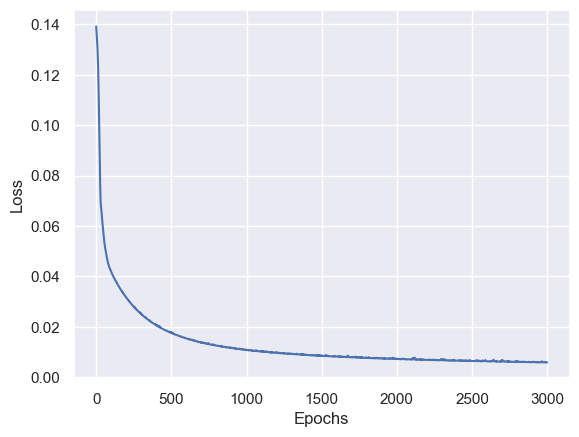

In [49]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

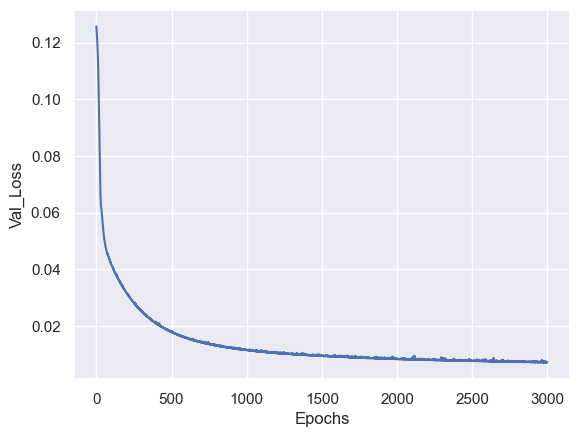

In [50]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [57]:
#modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\TEFF-Giants.h5


In [52]:
predTeff = modelTEFF.predict(X_test)

11/11 [==============================] - 0s 15ms/step


In [53]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0036201   5025.36     3.814   -0.011    -9999.000   
iDR4_3_SPLUS-n06s41_0032552    4726.33     2.273   -0.343        0.184   
iDR4_3_STRIPE82-0024_0036201   5037.72     3.637    0.011    -9999.000   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_SPLUS-n02n28_0022582    4722.60     2.568   -0.343        0.149   
iDR4_3_STRIPE82-0028_0025061   5016.92     3.225   -0.325        0.049   
iDR4_3_STRIPE82-0101_0060114   5115.99     3.256   -0.211    -9999.000   
iDR4_3_STRIPE82-0003_0028861   5138.39     3.701   -0.196        0.033   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n06s41_0032552      0.14389     0.14129     0.08655     0.25450   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_STRIPE82-0028_0025061     0.04974     0.08776     0.00549     0.10387   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_SPLUS-n02n28_0022582      0.09654     0.12628     0.09014     0.21990   
iDR4_3_STRIPE82-0028_0025061     0.05505     0.06915     0.03593     0.09598   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0003_0028861     0.02443     0.06472    -0.04219     0.07310   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.142434   
iDR4_3_SPLUS-n06s41_0032552      0.18797     0.06561    -0.411773   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.131301   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_STRIPE82-0028_0025061     0.03021     0.04384    -0.135174   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_SPLUS-n02n28_0022582      0.13573     0.05718    -0.415133   
iDR4_3_STRIPE82-0028_0025061     0.02750     0.03411    -0.150036   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000    -0.060802   
iDR4_3_STRIPE82-0003_0028861     0.00234     0.02939    -0.040627   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_STRIPE82-0024_0036201          5053.016602  
iDR4_3_SPLUS-n06s41_0032552           4760.219238  
iDR4_3_STRIPE82-0024_0036201          5053.016602  
iDR4_3_STRIPE82-0024_0036201          5053.016602  
iDR4_3_STRIPE82-0028_0025061          5050.278320  
...                                           ...  
iDR4_3_STRIPE82-0024_0036201          5053.016602  
iDR4_3_SPLUS-n02n28_0022582           4822.096680  
iDR4_3_STRIPE82-0028_0025061          5050.278320  
iDR4_3_STRIPE82-0101_0060114          5186.188965  
iDR4_3_STRIPE82-0003_0028861          5099.375000  

[352 rows x 12 columns]

In [54]:
predaux = encoder.decode_DataFrame(predTeff, 'teffMedium')
Y_test['TEFF_PredictDecoded'] = predaux

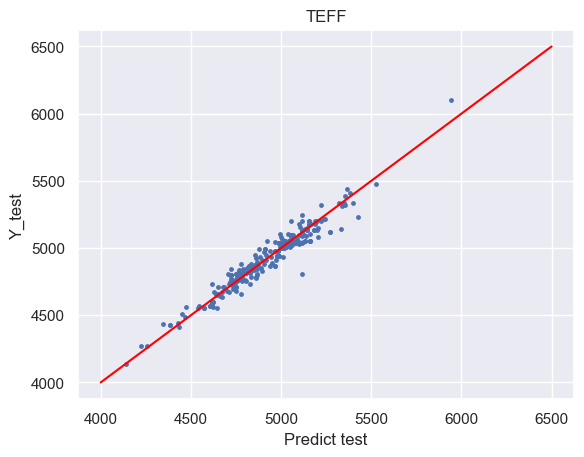

In [55]:
plt.scatter(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 6500], [4000, 6500], c='red')

In [56]:
score = r2_score(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [58]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0036201   5025.36     3.814   -0.011    -9999.000   
iDR4_3_SPLUS-n06s41_0032552    4726.33     2.273   -0.343        0.184   
iDR4_3_STRIPE82-0024_0036201   5037.72     3.637    0.011    -9999.000   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_SPLUS-n02n28_0022582    4722.60     2.568   -0.343        0.149   
iDR4_3_STRIPE82-0028_0025061   5016.92     3.225   -0.325        0.049   
iDR4_3_STRIPE82-0101_0060114   5115.99     3.256   -0.211    -9999.000   
iDR4_3_STRIPE82-0003_0028861   5138.39     3.701   -0.196        0.033   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n06s41_0032552      0.14389     0.14129     0.08655     0.25450   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_STRIPE82-0028_0025061     0.04974     0.08776     0.00549     0.10387   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_SPLUS-n02n28_0022582      0.09654     0.12628     0.09014     0.21990   
iDR4_3_STRIPE82-0028_0025061     0.05505     0.06915     0.03593     0.09598   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0003_0028861     0.02443     0.06472    -0.04219     0.07310   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.142434   
iDR4_3_SPLUS-n06s41_0032552      0.18797     0.06561    -0.411773   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.131301   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_STRIPE82-0028_0025061     0.03021     0.04384    -0.135174   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_SPLUS-n02n28_0022582      0.13573     0.05718    -0.415133   
iDR4_3_STRIPE82-0028_0025061     0.02750     0.03411    -0.150036   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000    -0.060802   
iDR4_3_STRIPE82-0003_0028861     0.00234     0.02939    -0.040627   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_STRIPE82-0024_0036201          5035.528809  
iDR4_3_SPLUS-n06s41_0032552           4754.007812  
iDR4_3_STRIPE82-0024_0036201          5035.528809  
iDR4_3_STRIPE82-0024_0036201          5035.528809  
iDR4_3_STRIPE82-0028_0025061          5036.260254  
...                                           ...  
iDR4_3_STRIPE82-0024_0036201          5035.528809  
iDR4_3_SPLUS-n02n28_0022582           4841.565918  
iDR4_3_STRIPE82-0028_0025061          5036.260254  
iDR4_3_STRIPE82-0101_0060114          5203.057129  
iDR4_3_STRIPE82-0003_0028861          5092.685059  

[352 rows x 12 columns]

In [59]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [60]:
Parametro = "LOGG"
columnTrain = 'logg_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [61]:
modelLOGG = baseline_model_teste()

In [62]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 10.1205 - val_loss: 10.3684 - 561ms/epoch - 561ms/step
Epoch 2/2000
1/1 - 0s - loss: 10.1138 - val_loss: 10.3613 - 40ms/epoch - 40ms/step
Epoch 3/2000
1/1 - 0s - loss: 10.1067 - val_loss: 10.3538 - 41ms/epoch - 41ms/step
Epoch 4/2000
1/1 - 0s - loss: 10.0993 - val_loss: 10.3456 - 39ms/epoch - 39ms/step
Epoch 5/2000
1/1 - 0s - loss: 10.0911 - val_loss: 10.3367 - 38ms/epoch - 38ms/step
Epoch 6/2000
1/1 - 0s - loss: 10.0824 - val_loss: 10.3276 - 39ms/epoch - 39ms/step
Epoch 7/2000
1/1 - 0s - loss: 10.0735 - val_loss: 10.3187 - 38ms/epoch - 38ms/step
Epoch 8/2000
1/1 - 0s - loss: 10.0648 - val_loss: 10.3098 - 41ms/epoch - 41ms/step
Epoch 9/2000
1/1 - 0s - loss: 10.0560 - val_loss: 10.3005 - 38ms/epoch - 38ms/step
Epoch 10/2000
1/1 - 0s - loss: 10.0469 - val_loss: 10.2907 - 38ms/epoch - 38ms/step
Epoch 11/2000
1/1 - 0s - loss: 10.0372 - val_loss: 10.2804 - 40ms/epoch - 40ms/step
Epoch 12/2000
1/1 - 0s - loss: 10.0271 - val_loss: 10.2696 - 42ms/epoch - 42ms/step

Epoch 101/2000
1/1 - 0s - loss: 0.5376 - val_loss: 0.4791 - 42ms/epoch - 42ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.5174 - val_loss: 0.4596 - 41ms/epoch - 41ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.5005 - val_loss: 0.4437 - 35ms/epoch - 35ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.4871 - val_loss: 0.4313 - 38ms/epoch - 38ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.4769 - val_loss: 0.4216 - 41ms/epoch - 41ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.4691 - val_loss: 0.4140 - 40ms/epoch - 40ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.4628 - val_loss: 0.4076 - 41ms/epoch - 41ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.4571 - val_loss: 0.4013 - 37ms/epoch - 37ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.4509 - val_loss: 0.3948 - 36ms/epoch - 36ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.4438 - val_loss: 0.3875 - 37ms/epoch - 37ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.4353 - val_loss: 0.3796 - 39ms/epoch - 39ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.4255 - val_loss: 0.3710 - 40ms/epoch - 40ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.1185 - val_loss: 0.1153 - 47ms/epoch - 47ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.1180 - val_loss: 0.1149 - 47ms/epoch - 47ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.1175 - val_loss: 0.1144 - 45ms/epoch - 45ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.1170 - val_loss: 0.1140 - 44ms/epoch - 44ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.1165 - val_loss: 0.1136 - 43ms/epoch - 43ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.1161 - val_loss: 0.1131 - 46ms/epoch - 46ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.1156 - val_loss: 0.1127 - 41ms/epoch - 41ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.1151 - val_loss: 0.1123 - 40ms/epoch - 40ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.1147 - val_loss: 0.1119 - 43ms/epoch - 43ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.1142 - val_loss: 0.1115 - 44ms/epoch - 44ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.1138 - val_loss: 0.1111 - 44ms/epoch - 44ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.1134 - val_loss: 0.1107 - 42ms/epoch - 42ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0911 - val_loss: 0.0908 - 39ms/epoch - 39ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0910 - val_loss: 0.0907 - 54ms/epoch - 54ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0908 - val_loss: 0.0906 - 38ms/epoch - 38ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0907 - val_loss: 0.0905 - 37ms/epoch - 37ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0906 - val_loss: 0.0904 - 38ms/epoch - 38ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0904 - val_loss: 0.0903 - 35ms/epoch - 35ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0903 - val_loss: 0.0902 - 37ms/epoch - 37ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0902 - val_loss: 0.0901 - 41ms/epoch - 41ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0901 - val_loss: 0.0900 - 37ms/epoch - 37ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0900 - val_loss: 0.0899 - 38ms/epoch - 38ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0898 - val_loss: 0.0898 - 41ms/epoch - 41ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0897 - val_loss: 0.0897 - 38ms/epoch - 38ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0822 - val_loss: 0.0838 - 44ms/epoch - 44ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0821 - val_loss: 0.0838 - 44ms/epoch - 44ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0820 - val_loss: 0.0837 - 39ms/epoch - 39ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0820 - val_loss: 0.0837 - 46ms/epoch - 46ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0819 - val_loss: 0.0836 - 40ms/epoch - 40ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0818 - val_loss: 0.0836 - 41ms/epoch - 41ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0818 - val_loss: 0.0835 - 44ms/epoch - 44ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0817 - val_loss: 0.0835 - 40ms/epoch - 40ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0816 - val_loss: 0.0834 - 43ms/epoch - 43ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0816 - val_loss: 0.0834 - 42ms/epoch - 42ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0815 - val_loss: 0.0833 - 48ms/epoch - 48ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0814 - val_loss: 0.0833 - 41ms/epoch - 41ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0766 - val_loss: 0.0794 - 45ms/epoch - 45ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0766 - val_loss: 0.0794 - 44ms/epoch - 44ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0765 - val_loss: 0.0793 - 42ms/epoch - 42ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0765 - val_loss: 0.0793 - 43ms/epoch - 43ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0764 - val_loss: 0.0793 - 66ms/epoch - 66ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0764 - val_loss: 0.0792 - 43ms/epoch - 43ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0763 - val_loss: 0.0792 - 69ms/epoch - 69ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0763 - val_loss: 0.0791 - 47ms/epoch - 47ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0762 - val_loss: 0.0791 - 69ms/epoch - 69ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0762 - val_loss: 0.0791 - 43ms/epoch - 43ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0761 - val_loss: 0.0790 - 70ms/epoch - 70ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0761 - val_loss: 0.0790 - 43ms/epoch - 43ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0725 - val_loss: 0.0764 - 39ms/epoch - 39ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0724 - val_loss: 0.0764 - 38ms/epoch - 38ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0724 - val_loss: 0.0764 - 42ms/epoch - 42ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0724 - val_loss: 0.0763 - 42ms/epoch - 42ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0723 - val_loss: 0.0763 - 37ms/epoch - 37ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0723 - val_loss: 0.0763 - 38ms/epoch - 38ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0723 - val_loss: 0.0763 - 38ms/epoch - 38ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0722 - val_loss: 0.0763 - 37ms/epoch - 37ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0722 - val_loss: 0.0762 - 37ms/epoch - 37ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0722 - val_loss: 0.0762 - 38ms/epoch - 38ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0721 - val_loss: 0.0762 - 40ms/epoch - 40ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0721 - val_loss: 0.0762 - 38ms/epoch - 38ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0693 - val_loss: 0.0741 - 44ms/epoch - 44ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0693 - val_loss: 0.0740 - 40ms/epoch - 40ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0693 - val_loss: 0.0740 - 48ms/epoch - 48ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0692 - val_loss: 0.0740 - 45ms/epoch - 45ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0692 - val_loss: 0.0740 - 42ms/epoch - 42ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0692 - val_loss: 0.0740 - 45ms/epoch - 45ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0692 - val_loss: 0.0739 - 48ms/epoch - 48ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0691 - val_loss: 0.0739 - 52ms/epoch - 52ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0691 - val_loss: 0.0739 - 51ms/epoch - 51ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0691 - val_loss: 0.0739 - 42ms/epoch - 42ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0690 - val_loss: 0.0739 - 45ms/epoch - 45ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0690 - val_loss: 0.0738 - 40ms/epoch - 40ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0666 - val_loss: 0.0721 - 49ms/epoch - 49ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0666 - val_loss: 0.0721 - 46ms/epoch - 46ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0666 - val_loss: 0.0721 - 44ms/epoch - 44ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0666 - val_loss: 0.0720 - 46ms/epoch - 46ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0665 - val_loss: 0.0720 - 48ms/epoch - 48ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0665 - val_loss: 0.0720 - 42ms/epoch - 42ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0665 - val_loss: 0.0720 - 45ms/epoch - 45ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0665 - val_loss: 0.0720 - 41ms/epoch - 41ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0664 - val_loss: 0.0719 - 47ms/epoch - 47ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0664 - val_loss: 0.0719 - 45ms/epoch - 45ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0664 - val_loss: 0.0719 - 52ms/epoch - 52ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0664 - val_loss: 0.0719 - 52ms/epoch - 52ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0643 - val_loss: 0.0702 - 44ms/epoch - 44ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0643 - val_loss: 0.0702 - 48ms/epoch - 48ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0643 - val_loss: 0.0702 - 47ms/epoch - 47ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0642 - val_loss: 0.0702 - 48ms/epoch - 48ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0642 - val_loss: 0.0702 - 51ms/epoch - 51ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0642 - val_loss: 0.0702 - 44ms/epoch - 44ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0642 - val_loss: 0.0701 - 42ms/epoch - 42ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0701 - 42ms/epoch - 42ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0701 - 45ms/epoch - 45ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0701 - 41ms/epoch - 41ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0701 - 44ms/epoch - 44ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0700 - 49ms/epoch - 49ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0622 - val_loss: 0.0687 - 43ms/epoch - 43ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0622 - val_loss: 0.0687 - 48ms/epoch - 48ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0686 - 45ms/epoch - 45ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0686 - 50ms/epoch - 50ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0686 - 59ms/epoch - 59ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0686 - 65ms/epoch - 65ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0686 - 51ms/epoch - 51ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0686 - 49ms/epoch - 49ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0685 - 46ms/epoch - 46ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0685 - 39ms/epoch - 39ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0685 - 45ms/epoch - 45ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0685 - 45ms/epoch - 45ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0673 - 40ms/epoch - 40ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0673 - 45ms/epoch - 45ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0673 - 42ms/epoch - 42ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0672 - 41ms/epoch - 41ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0672 - 42ms/epoch - 42ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0672 - 41ms/epoch - 41ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0672 - 43ms/epoch - 43ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0672 - 43ms/epoch - 43ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0672 - 40ms/epoch - 40ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0672 - 42ms/epoch - 42ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0672 - 40ms/epoch - 40ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0672 - 38ms/epoch - 38

Epoch 1188/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0662 - 50ms/epoch - 50ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0661 - 48ms/epoch - 48ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0661 - 47ms/epoch - 47ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0661 - 50ms/epoch - 50ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0661 - 67ms/epoch - 67ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0661 - 47ms/epoch - 47ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0661 - 51ms/epoch - 51ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0661 - 49ms/epoch - 49ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0660 - 54ms/epoch - 54ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0660 - 44ms/epoch - 44ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0660 - 50ms/epoch - 50ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0660 - 48ms/epoch - 48

Epoch 1286/2000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0651 - 41ms/epoch - 41ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0651 - 47ms/epoch - 47ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0651 - 40ms/epoch - 40ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0651 - 40ms/epoch - 40ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0651 - 45ms/epoch - 45ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0651 - 48ms/epoch - 48ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 40ms/epoch - 40ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 44ms/epoch - 44ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 47ms/epoch - 47ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 52ms/epoch - 52ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 46ms/epoch - 46ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0650 - 44ms/epoch - 44

Epoch 1384/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 43ms/epoch - 43ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 51ms/epoch - 51ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 45ms/epoch - 45ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 43ms/epoch - 43ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 45ms/epoch - 45ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0642 - 42ms/epoch - 42ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0642 - 40ms/epoch - 40ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0641 - 49ms/epoch - 49ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0641 - 53ms/epoch - 53ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0641 - 50ms/epoch - 50ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0641 - 42ms/epoch - 42ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0641 - 58ms/epoch - 58

Epoch 1482/2000
1/1 - 0s - loss: 0.0535 - val_loss: 0.0633 - 50ms/epoch - 50ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 48ms/epoch - 48ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 56ms/epoch - 56ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 57ms/epoch - 57ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 52ms/epoch - 52ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 60ms/epoch - 60ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0633 - 61ms/epoch - 61ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0633 - 55ms/epoch - 55ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0633 - 47ms/epoch - 47ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0633 - 54ms/epoch - 54ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0633 - 46ms/epoch - 46ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0633 - 45ms/epoch - 45

Epoch 1580/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0626 - 38ms/epoch - 38ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0626 - 38ms/epoch - 38ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0626 - 40ms/epoch - 40ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 39ms/epoch - 39ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 36ms/epoch - 36ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 41ms/epoch - 41ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 42ms/epoch - 42ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 38ms/epoch - 38ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 37ms/epoch - 37ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0626 - 39ms/epoch - 39ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0518 - val_loss: 0.0626 - 39ms/epoch - 39ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0518 - val_loss: 0.0626 - 38ms/epoch - 38

Epoch 1678/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0621 - 42ms/epoch - 42ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0621 - 43ms/epoch - 43ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0621 - 40ms/epoch - 40ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0620 - 44ms/epoch - 44ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0621 - 50ms/epoch - 50ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0620 - 42ms/epoch - 42ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0620 - 45ms/epoch - 45ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0620 - 44ms/epoch - 44ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0620 - 42ms/epoch - 42ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0621 - 44ms/epoch - 44ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0620 - 48ms/epoch - 48ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0620 - 46ms/epoch - 46

Epoch 1776/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0616 - 49ms/epoch - 49ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 42ms/epoch - 42ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 42ms/epoch - 42ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 47ms/epoch - 47ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 45ms/epoch - 45ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 41ms/epoch - 41ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 47ms/epoch - 47ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0615 - 42ms/epoch - 42ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0615 - 48ms/epoch - 48ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0615 - 59ms/epoch - 59ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0615 - 66ms/epoch - 66ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0615 - 46ms/epoch - 46

Epoch 1874/2000
1/1 - 0s - loss: 0.0482 - val_loss: 0.0611 - 39ms/epoch - 39ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 39ms/epoch - 39ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 42ms/epoch - 42ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 43ms/epoch - 43ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0611 - 37ms/epoch - 37ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0610 - 38ms/epoch - 38ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0480 - val_loss: 0.0610 - 38ms/epoch - 38

Epoch 1972/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 71ms/epoch - 71ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 47ms/epoch - 47ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 43ms/epoch - 43ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 44ms/epoch - 44ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 46ms/epoch - 46ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0606 - 55ms/epoch - 55ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 45ms/epoch - 45ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0607 - 97ms/epoch - 97ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0470 - val_loss: 0.0607 - 46ms/epoch - 46ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0470 - val_loss: 0.0606 - 75ms/epoch - 75ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0470 - val_loss: 0.0607 - 41ms/epoch - 41ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0470 - val_loss: 0.0606 - 68ms/epoch - 68

Text(0, 0.5, 'Loss')

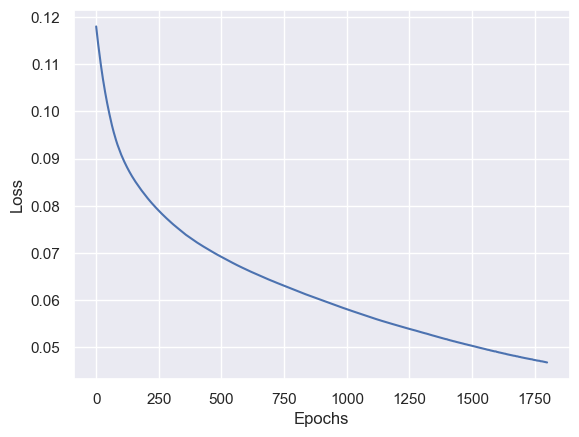

In [68]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][200:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

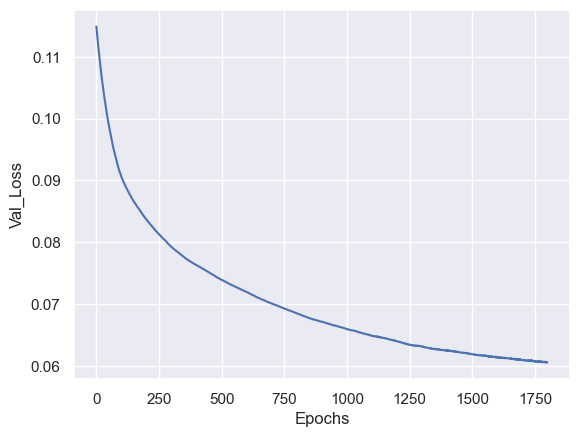

In [67]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][200:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [69]:
#modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\LOGG-Giants.h5


In [70]:
predlogg = modelLOGG.predict(X_test)

11/11 [==============================] - 0s 2ms/step


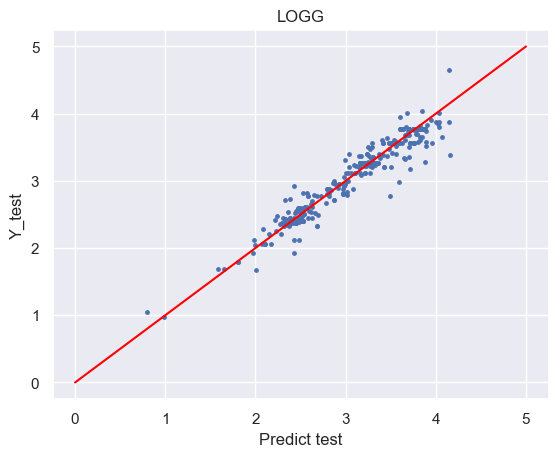

In [71]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
#plt.xlim(3.8, 4.8)
#plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([0, 5], [0, 5], c='red')

plt.grid(True)

In [73]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 93.0%


In [74]:
Y_test['LOGG_Predict'] = predlogg

In [75]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0036201   5025.36     3.814   -0.011    -9999.000   
iDR4_3_SPLUS-n06s41_0032552    4726.33     2.273   -0.343        0.184   
iDR4_3_STRIPE82-0024_0036201   5037.72     3.637    0.011    -9999.000   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_SPLUS-n02n28_0022582    4722.60     2.568   -0.343        0.149   
iDR4_3_STRIPE82-0028_0025061   5016.92     3.225   -0.325        0.049   
iDR4_3_STRIPE82-0101_0060114   5115.99     3.256   -0.211    -9999.000   
iDR4_3_STRIPE82-0003_0028861   5138.39     3.701   -0.196        0.033   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n06s41_0032552      0.14389     0.14129     0.08655     0.25450   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_STRIPE82-0028_0025061     0.04974     0.08776     0.00549     0.10387   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_SPLUS-n02n28_0022582      0.09654     0.12628     0.09014     0.21990   
iDR4_3_STRIPE82-0028_0025061     0.05505     0.06915     0.03593     0.09598   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0003_0028861     0.02443     0.06472    -0.04219     0.07310   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.142434   
iDR4_3_SPLUS-n06s41_0032552      0.18797     0.06561    -0.411773   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.131301   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_STRIPE82-0028_0025061     0.03021     0.04384    -0.135174   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_SPLUS-n02n28_0022582      0.13573     0.05718    -0.415133   
iDR4_3_STRIPE82-0028_0025061     0.02750     0.03411    -0.150036   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000    -0.060802   
iDR4_3_STRIPE82-0003_0028861     0.00234     0.02939    -0.040627   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709  
iDR4_3_SPLUS-n06s41_0032552           4754.007812      2.362252  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709  
iDR4_3_STRIPE82-0028_0025061          5036.260254      3.262746  
...                                           ...           ...  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709  
iDR4_3_SPLUS-n02n28_0022582           4841.565918      2.826291  
iDR4_3_STRIPE82-0028_0025061          5036.260254      3.262746  
iDR4_3_STRIPE82-0101_0060114          5203.057129      3.371349  
iDR4_3_STRIPE82-0003_0028861          5092.685059      3.348206  

[352 rows x 13 columns]

In [76]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [77]:
Parametro = "FEH"
columnTrain = 'feh_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [78]:
modelFEH = baseline_model_teste()

In [80]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.2246 - val_loss: 0.2123 - 943ms/epoch - 943ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.2234 - val_loss: 0.2113 - 41ms/epoch - 41ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2224 - val_loss: 0.2104 - 46ms/epoch - 46ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2214 - val_loss: 0.2095 - 42ms/epoch - 42ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2206 - val_loss: 0.2088 - 40ms/epoch - 40ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2198 - val_loss: 0.2081 - 39ms/epoch - 39ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2191 - val_loss: 0.2074 - 37ms/epoch - 37ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.2183 - val_loss: 0.2068 - 36ms/epoch - 36ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.2176 - val_loss: 0.2061 - 39ms/epoch - 39ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.2169 - val_loss: 0.2054 - 38ms/epoch - 38ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.2162 - val_loss: 0.2046 - 38ms/epoch - 38ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.2154 - val_loss: 0.2038 - 42ms/epoch - 42ms/step
Epoch 13/2000
1/1 - 0s 

Epoch 101/2000
1/1 - 0s - loss: 0.0833 - val_loss: 0.0834 - 42ms/epoch - 42ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0824 - val_loss: 0.0826 - 45ms/epoch - 45ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0814 - val_loss: 0.0817 - 43ms/epoch - 43ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0805 - val_loss: 0.0808 - 42ms/epoch - 42ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0796 - val_loss: 0.0799 - 39ms/epoch - 39ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0786 - val_loss: 0.0790 - 47ms/epoch - 47ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0777 - val_loss: 0.0781 - 43ms/epoch - 43ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0767 - val_loss: 0.0772 - 43ms/epoch - 43ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0758 - val_loss: 0.0763 - 42ms/epoch - 42ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0748 - val_loss: 0.0754 - 44ms/epoch - 44ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0739 - val_loss: 0.0745 - 47ms/epoch - 47ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0730 - val_loss: 0.0736 - 42ms/epoch - 42ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0489 - val_loss: 0.0489 - 53ms/epoch - 53ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0488 - val_loss: 0.0488 - 43ms/epoch - 43ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0487 - val_loss: 0.0486 - 39ms/epoch - 39ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0486 - val_loss: 0.0485 - 54ms/epoch - 54ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0485 - val_loss: 0.0484 - 45ms/epoch - 45ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0483 - val_loss: 0.0483 - 40ms/epoch - 40ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0482 - val_loss: 0.0482 - 40ms/epoch - 40ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0480 - 56ms/epoch - 56ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0480 - val_loss: 0.0479 - 47ms/epoch - 47ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0479 - val_loss: 0.0478 - 58ms/epoch - 58ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0478 - val_loss: 0.0477 - 42ms/epoch - 42ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0476 - val_loss: 0.0476 - 38ms/epoch - 38ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0391 - 40ms/epoch - 40ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0391 - 40ms/epoch - 40ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0391 - val_loss: 0.0390 - 40ms/epoch - 40ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0391 - val_loss: 0.0389 - 42ms/epoch - 42ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0390 - val_loss: 0.0389 - 43ms/epoch - 43ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0389 - val_loss: 0.0388 - 42ms/epoch - 42ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0387 - 45ms/epoch - 45ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0386 - 41ms/epoch - 41ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0387 - val_loss: 0.0386 - 42ms/epoch - 42ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0386 - val_loss: 0.0385 - 44ms/epoch - 44ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0385 - val_loss: 0.0384 - 47ms/epoch - 47ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0385 - val_loss: 0.0383 - 44ms/epoch - 44ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0332 - val_loss: 0.0337 - 56ms/epoch - 56ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0332 - val_loss: 0.0336 - 46ms/epoch - 46ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0336 - 47ms/epoch - 47ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0335 - 48ms/epoch - 48ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0335 - 44ms/epoch - 44ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0330 - val_loss: 0.0334 - 48ms/epoch - 48ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0334 - 48ms/epoch - 48ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0334 - 42ms/epoch - 42ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0333 - 50ms/epoch - 50ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0333 - 44ms/epoch - 44ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0332 - 46ms/epoch - 46ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0332 - 47ms/epoch - 47ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0297 - 37ms/epoch - 37ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0296 - 36ms/epoch - 36ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0297 - 35ms/epoch - 35ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0296 - 39ms/epoch - 39ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0296 - 43ms/epoch - 43ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0295 - 38ms/epoch - 38ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0295 - 35ms/epoch - 35ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0294 - 107ms/epoch - 107ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0294 - 34ms/epoch - 34ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0294 - 71ms/epoch - 71ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0293 - 37ms/epoch - 37ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0294 - 70ms/epoch - 70ms/step
Ep

Epoch 596/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0266 - 43ms/epoch - 43ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0267 - 46ms/epoch - 46ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0266 - 48ms/epoch - 48ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0266 - 48ms/epoch - 48ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0265 - 50ms/epoch - 50ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0265 - 45ms/epoch - 45ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0265 - 46ms/epoch - 46ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0265 - 42ms/epoch - 42ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0265 - 47ms/epoch - 47ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0264 - 43ms/epoch - 43ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0265 - 47ms/epoch - 47ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0264 - 43ms/epoch - 43ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0245 - 55ms/epoch - 55ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0243 - 58ms/epoch - 58ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0244 - 46ms/epoch - 46ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0243 - 43ms/epoch - 43ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0243 - 43ms/epoch - 43ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0242 - 49ms/epoch - 49ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0242 - 51ms/epoch - 51ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0242 - 47ms/epoch - 47ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0242 - 42ms/epoch - 42ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0243 - 44ms/epoch - 44ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0241 - 44ms/epoch - 44ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0243 - 47ms/epoch - 47ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0211 - val_loss: 0.0228 - 45ms/epoch - 45ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0211 - val_loss: 0.0225 - 42ms/epoch - 42ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0210 - val_loss: 0.0226 - 42ms/epoch - 42ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0225 - 49ms/epoch - 49ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0224 - 53ms/epoch - 53ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0226 - 49ms/epoch - 49ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0224 - 45ms/epoch - 45ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0226 - 50ms/epoch - 50ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0224 - 49ms/epoch - 49ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0224 - 43ms/epoch - 43ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0224 - 43ms/epoch - 43ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0223 - 47ms/epoch - 47ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0210 - 42ms/epoch - 42ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0209 - 44ms/epoch - 44ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0211 - 42ms/epoch - 42ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0210 - 39ms/epoch - 39ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0212 - 42ms/epoch - 42ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0210 - 43ms/epoch - 43ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0212 - 42ms/epoch - 42ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0209 - 41ms/epoch - 41ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0211 - 47ms/epoch - 47ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0209 - 53ms/epoch - 53ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0209 - 44ms/epoch - 44ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0208 - 42ms/epoch - 42ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0198 - 39ms/epoch - 39ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0197 - 45ms/epoch - 45ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0198 - 45ms/epoch - 45ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0196 - 43ms/epoch - 43ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0198 - 45ms/epoch - 45ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0196 - 46ms/epoch - 46ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0197 - 45ms/epoch - 45ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0196 - 47ms/epoch - 47ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0197 - 45ms/epoch - 45ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0196 - 39ms/epoch - 39ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0196 - 47ms/epoch - 47ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0195 - 45ms/epoch - 45ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0186 - 37ms/epoch - 37ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0187 - 36ms/epoch - 36ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0186 - 54ms/epoch - 54ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0186 - 60ms/epoch - 60ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0186 - 58ms/epoch - 58ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0186 - 57ms/epoch - 57ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0187 - 56ms/epoch - 56ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0186 - 43ms/epoch - 43ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0186 - 47ms/epoch - 47ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0185 - 44ms/epoch - 44ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0185 - 42ms/epoch - 42ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0185 - 39ms/epoch - 39

Epoch 1188/2000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0177 - 44ms/epoch - 44ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0179 - 42ms/epoch - 42ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0177 - 44ms/epoch - 44ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0178 - 48ms/epoch - 48ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0177 - 50ms/epoch - 50ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0177 - 42ms/epoch - 42ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0177 - 39ms/epoch - 39ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0177 - 46ms/epoch - 46ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0177 - 41ms/epoch - 41ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0176 - 44ms/epoch - 44ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0177 - 44ms/epoch - 44ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0176 - 44ms/epoch - 44

Epoch 1286/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 52ms/epoch - 52ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 51ms/epoch - 51ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0149 - val_loss: 0.0170 - 42ms/epoch - 42ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0149 - val_loss: 0.0171 - 52ms/epoch - 52ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 48ms/epoch - 48ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0171 - 45ms/epoch - 45ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 41ms/epoch - 41ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0171 - 40ms/epoch - 40ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 45ms/epoch - 45ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0172 - 49ms/epoch - 49ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0170 - 42ms/epoch - 42ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0150 - val_loss: 0.0171 - 49ms/epoch - 49

Epoch 1384/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0165 - 54ms/epoch - 54ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0164 - 44ms/epoch - 44ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0165 - 47ms/epoch - 47ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0165 - 51ms/epoch - 51ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0164 - 50ms/epoch - 50ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0164 - 43ms/epoch - 43ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0164 - 47ms/epoch - 47ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0164 - 52ms/epoch - 52ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0165 - 53ms/epoch - 53ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0163 - 44ms/epoch - 44ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0165 - 42ms/epoch - 42

Epoch 1482/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 41ms/epoch - 41ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0160 - 44ms/epoch - 44ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 41ms/epoch - 41ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0160 - 44ms/epoch - 44ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 49ms/epoch - 49ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 51ms/epoch - 51ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 46ms/epoch - 46ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 43ms/epoch - 43ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0159 - 46ms/epoch - 46ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0158 - 44ms/epoch - 44ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0160 - 44ms/epoch - 44ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0158 - 40ms/epoch - 40

Epoch 1580/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0155 - 43ms/epoch - 43ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0154 - 69ms/epoch - 69ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0155 - 45ms/epoch - 45ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0154 - 70ms/epoch - 70ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0156 - 45ms/epoch - 45ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0154 - 50ms/epoch - 50ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0155 - 43ms/epoch - 43ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0154 - 48ms/epoch - 48ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0155 - 47ms/epoch - 47ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0154 - 47ms/epoch - 47ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0154 - 41ms/epoch - 41ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0154 - 53ms/epoch - 53

Epoch 1678/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0151 - 44ms/epoch - 44ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0151 - 45ms/epoch - 45ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0151 - 47ms/epoch - 47ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0150 - 41ms/epoch - 41ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0152 - 51ms/epoch - 51ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0151 - 41ms/epoch - 41ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0153 - 47ms/epoch - 47ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0151 - 50ms/epoch - 50ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0153 - 42ms/epoch - 42ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0150 - 48ms/epoch - 48ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0152 - 47ms/epoch - 47ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0150 - 46ms/epoch - 46

Epoch 1776/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 45ms/epoch - 45ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0148 - 39ms/epoch - 39ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 50ms/epoch - 50ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0148 - 42ms/epoch - 42ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 42ms/epoch - 42ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0148 - 46ms/epoch - 46ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 45ms/epoch - 45ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0149 - 42ms/epoch - 42ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 48ms/epoch - 48ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0148 - 45ms/epoch - 45ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0147 - 59ms/epoch - 59ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0148 - 50ms/epoch - 50

Epoch 1874/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0150 - 51ms/epoch - 51ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0145 - 44ms/epoch - 44ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0148 - 44ms/epoch - 44ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0144 - 52ms/epoch - 52ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0121 - val_loss: 0.0145 - 50ms/epoch - 50ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0144 - 51ms/epoch - 51ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0144 - 45ms/epoch - 45ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0146 - 46ms/epoch - 46ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0144 - 46ms/epoch - 46ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0147 - 49ms/epoch - 49ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0144 - 41ms/epoch - 41ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0145 - 45ms/epoch - 45

Epoch 1972/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0142 - 39ms/epoch - 39ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0143 - 39ms/epoch - 39ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0141 - 40ms/epoch - 40ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0143 - 38ms/epoch - 38ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0141 - 38ms/epoch - 38ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0142 - 38ms/epoch - 38ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0142 - 41ms/epoch - 41ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0142 - 39ms/epoch - 39ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0142 - 38ms/epoch - 38ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0141 - 36ms/epoch - 36ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0142 - 36ms/epoch - 36ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0141 - 38ms/epoch - 38

Text(0, 0.5, 'Loss')

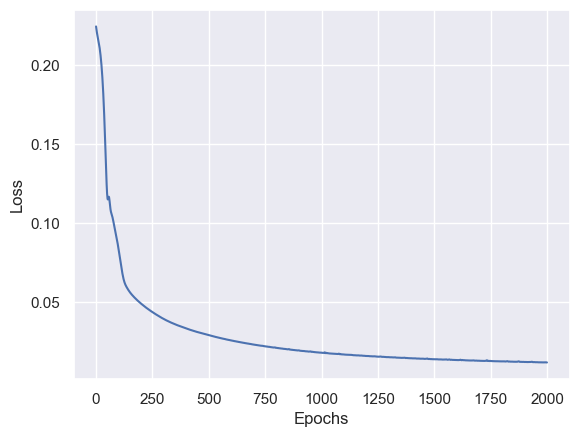

In [81]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

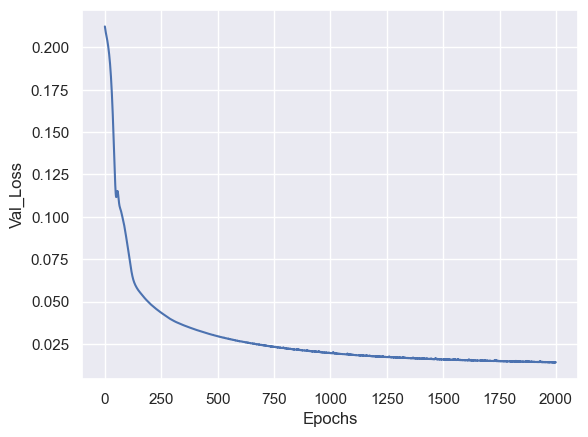

In [82]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [83]:
#modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\FEH-Giants.h5


In [84]:
predfeh = modelFEH.predict(X_test)

11/11 [==============================] - 0s 7ms/step


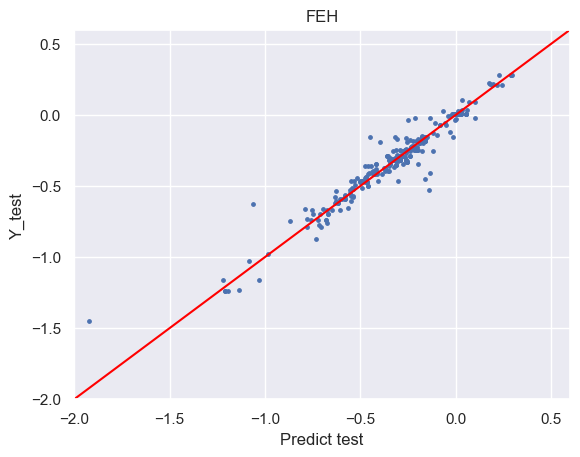

In [85]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-2, 0.6)
plt.ylim(-2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [86]:
score = r2_score(Y_test[columnTrain], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [87]:
Y_test['FEH_Predict'] = predfeh

In [88]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0036201   5025.36     3.814   -0.011    -9999.000   
iDR4_3_SPLUS-n06s41_0032552    4726.33     2.273   -0.343        0.184   
iDR4_3_STRIPE82-0024_0036201   5037.72     3.637    0.011    -9999.000   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0024_0036201   4986.27     3.707    0.023        0.049   
iDR4_3_SPLUS-n02n28_0022582    4722.60     2.568   -0.343        0.149   
iDR4_3_STRIPE82-0028_0025061   5016.92     3.225   -0.325        0.049   
iDR4_3_STRIPE82-0101_0060114   5115.99     3.256   -0.211    -9999.000   
iDR4_3_STRIPE82-0003_0028861   5138.39     3.701   -0.196        0.033   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n06s41_0032552      0.14389     0.14129     0.08655     0.25450   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_STRIPE82-0028_0025061     0.04974     0.08776     0.00549     0.10387   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0024_0036201     0.08003     0.04152     0.07148     0.10261   
iDR4_3_SPLUS-n02n28_0022582      0.09654     0.12628     0.09014     0.21990   
iDR4_3_STRIPE82-0028_0025061     0.05505     0.06915     0.03593     0.09598   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0003_0028861     0.02443     0.06472    -0.04219     0.07310   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.142434   
iDR4_3_SPLUS-n06s41_0032552      0.18797     0.06561    -0.411773   
iDR4_3_STRIPE82-0024_0036201 -9999.00000 -9999.00000    -0.131301   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_STRIPE82-0028_0025061     0.03021     0.04384    -0.135174   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0024_0036201     0.03838     0.03410    -0.177643   
iDR4_3_SPLUS-n02n28_0022582      0.13573     0.05718    -0.415133   
iDR4_3_STRIPE82-0028_0025061     0.02750     0.03411    -0.150036   
iDR4_3_STRIPE82-0101_0060114 -9999.00000 -9999.00000    -0.060802   
iDR4_3_STRIPE82-0003_0028861     0.00234     0.02939    -0.040627   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709     0.006722  
iDR4_3_SPLUS-n06s41_0032552           4754.007812      2.362252    -0.345960  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709     0.006722  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709     0.006722  
iDR4_3_STRIPE82-0028_0025061          5036.260254      3.262746    -0.319077  
...                                           ...           ...          ...  
iDR4_3_STRIPE82-0024_0036201          5035.528809      3.768709     0.006722  
iDR4_3_SPLUS-n02n28_0022582           4841.565918      2.826291    -0.304204  
iDR4_3_STRIPE82-0028_0025061          5036.260254      3.262746    -0.319077  
iDR4_3_STRIPE82-0101_0060114          5203.057129      3.371349    -0.022805  
iDR4_3_STRIPE82-0003_0028861          5092.685059      3.348206    -0.348073  

[352 rows x 14 columns]

In [89]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros Parametros

In [5]:
GigCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Giants.csv", index_col = 'ID')

In [7]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s26_0045087   0.3150  0.5812  1.2739  1.4481  2.0087  2.2011   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s26_0045087   2.6997  2.7722  2.9449  3.0170  ...   4827.18   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201     0.09857   
iDR4_3_SPLUS-n01s26_0045087      3.162   -0.188        0.157     0.12756   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156     0.13170   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197     0.10864   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026      0.20527    -0.05186     0.28106     0.16079   
iDR4_3_SPLUS-n01s26_0045087      0.13231     0.03145     0.24134     0.13181   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
iDR4_3_SPLUS-n01s27_0003409      0.14040     0.09729     0.21270     0.16033   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0168_0021419     0.19329    -0.16436     0.27598     0.13263   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [8]:
GigCoresParams = GigCores.loc[GigCores['alpha_m_cnn'] != -9999]

In [9]:
GigCoresParams

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s26_0045087   0.3150  0.5812  1.2739  1.4481  2.0087  2.2011   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
iDR4_3_SPLUS-n01s27_0003409   0.3598  0.4561  1.1902  1.3186  1.8112  2.0593   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0011946  0.3329  0.5624  1.1757  1.3186  1.8714  2.0605   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s26_0045087   2.6997  2.7722  2.9449  3.0170  ...   4827.18   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
iDR4_3_SPLUS-n01s27_0003409   2.3626  2.5544  2.4077  2.7796  ...   4969.92   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0011946  2.5632  2.6539  2.7989  2.8394  ...   4987.04   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201  0.09857   
iDR4_3_SPLUS-n01s26_0045087      3.162   -0.188        0.157  0.12756   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156  0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156  0.13170   
iDR4_3_SPLUS-n01s27_0003409      2.469   -0.688        0.156  0.13170   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0168_0011946     3.309   -0.313        0.163  0.11010   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197  0.10864   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197  0.10864   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143  0.07077   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143  0.07077   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026   0.20527 -0.05186  0.28106  0.16079  0.06973  
iDR4_3_SPLUS-n01s26_0045087   0.13231  0.03145  0.24134  0.13181  0.08347  
iDR4_3_SPLUS-n01s27_0003409   0.14040  0.09729  0.21270  0.16033  0.07376  
iDR4_3_SPLUS-n01s27_0003409   0.14040  0.09729  0.21270  0.16033  0.07376  
iDR4_3_SPLUS-n01s27_0003409   0.14040  0.09729  0.21270  0.16033  0.07376  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0168_0011946  0.15580  0.01234  0.25676  0.12517  0.05413  
iDR4_3_STRIPE82-0168_0021419  0.19329 -0.16436  0.27598  0.13263  0.10786  
iDR4_3_STRIPE82-0168_0021419  0.19329 -0.16436  0.27598  0.13263  0.10786  
iDR4_3_STRIPE82-0168_0021419  0.17212 -0.15093  0.20247  0.09235  0.07628  
iDR4_3_STRIPE82-0168_0021419  0.17212 -0.15093  0.20247  0.09235  0.07628  

[1494 rows x 76 column

In [10]:
print('cfe =', GigCoresParams['c_fe'].min())
print('cafe = ', GigCoresParams['ca_fe'].min())
print('nfe = ', GigCoresParams['n_fe'].min())
print('mgfe = ', GigCoresParams['mg_fe'].min())
print('sife = ', GigCoresParams['si_fe'].min())
print('nife = ', GigCoresParams['ni_fe'].min())

cfe = -0.8645
cafe =  -0.08675
nfe =  -0.22213
mgfe =  -0.09373
sife =  -0.0602
nife =  -0.13236


In [11]:
xtrain = GigCoresParams.iloc[:, :66]

In [12]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [14]:
ytrain = GigCoresParams[columnYtrain]

In [15]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [16]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [17]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [18]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

### Alpha

In [19]:
Parametro = "Alpha"
columnTrain = 'alpha_m_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [20]:
modelAlpha = baseline_model_teste()

In [21]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500
1/1 - 4s - loss: 0.0676 - val_loss: 0.0698 - 4s/epoch - 4s/step
Epoch 2/1500
1/1 - 0s - loss: 0.0673 - val_loss: 0.0695 - 39ms/epoch - 39ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.0670 - val_loss: 0.0691 - 39ms/epoch - 39ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.0666 - val_loss: 0.0688 - 37ms/epoch - 37ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.0663 - val_loss: 0.0684 - 36ms/epoch - 36ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.0660 - val_loss: 0.0680 - 37ms/epoch - 37ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.0656 - val_loss: 0.0676 - 35ms/epoch - 35ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.0652 - val_loss: 0.0672 - 37ms/epoch - 37ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.0649 - val_loss: 0.0668 - 38ms/epoch - 38ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.0645 - val_loss: 0.0664 - 37ms/epoch - 37ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.0641 - val_loss: 0.0660 - 37ms/epoch - 37ms/step
Epoch 12/1500
1/1 - 0s - loss: 0.0637 - val_loss: 0.0655 - 36ms/epoch - 36ms/step
Epoch 13/1500
1/1 - 0s - loss

1/1 - 0s - loss: 0.0447 - val_loss: 0.0450 - 40ms/epoch - 40ms/step
Epoch 102/1500
1/1 - 0s - loss: 0.0445 - val_loss: 0.0448 - 39ms/epoch - 39ms/step
Epoch 103/1500
1/1 - 0s - loss: 0.0444 - val_loss: 0.0447 - 42ms/epoch - 42ms/step
Epoch 104/1500
1/1 - 0s - loss: 0.0442 - val_loss: 0.0445 - 43ms/epoch - 43ms/step
Epoch 105/1500
1/1 - 0s - loss: 0.0441 - val_loss: 0.0443 - 43ms/epoch - 43ms/step
Epoch 106/1500
1/1 - 0s - loss: 0.0439 - val_loss: 0.0442 - 39ms/epoch - 39ms/step
Epoch 107/1500
1/1 - 0s - loss: 0.0438 - val_loss: 0.0440 - 47ms/epoch - 47ms/step
Epoch 108/1500
1/1 - 0s - loss: 0.0436 - val_loss: 0.0439 - 42ms/epoch - 42ms/step
Epoch 109/1500
1/1 - 0s - loss: 0.0435 - val_loss: 0.0437 - 44ms/epoch - 44ms/step
Epoch 110/1500
1/1 - 0s - loss: 0.0433 - val_loss: 0.0435 - 45ms/epoch - 45ms/step
Epoch 111/1500
1/1 - 0s - loss: 0.0432 - val_loss: 0.0434 - 46ms/epoch - 46ms/step
Epoch 112/1500
1/1 - 0s - loss: 0.0430 - val_loss: 0.0432 - 43ms/epoch - 43ms/step
Epoch 113/1500
1/1 

Epoch 200/1500
1/1 - 0s - loss: 0.0336 - val_loss: 0.0335 - 44ms/epoch - 44ms/step
Epoch 201/1500
1/1 - 0s - loss: 0.0335 - val_loss: 0.0334 - 51ms/epoch - 51ms/step
Epoch 202/1500
1/1 - 0s - loss: 0.0334 - val_loss: 0.0333 - 49ms/epoch - 49ms/step
Epoch 203/1500
1/1 - 0s - loss: 0.0334 - val_loss: 0.0332 - 50ms/epoch - 50ms/step
Epoch 204/1500
1/1 - 0s - loss: 0.0333 - val_loss: 0.0331 - 61ms/epoch - 61ms/step
Epoch 205/1500
1/1 - 0s - loss: 0.0332 - val_loss: 0.0330 - 53ms/epoch - 53ms/step
Epoch 206/1500
1/1 - 0s - loss: 0.0331 - val_loss: 0.0329 - 45ms/epoch - 45ms/step
Epoch 207/1500
1/1 - 0s - loss: 0.0330 - val_loss: 0.0329 - 41ms/epoch - 41ms/step
Epoch 208/1500
1/1 - 0s - loss: 0.0329 - val_loss: 0.0328 - 44ms/epoch - 44ms/step
Epoch 209/1500
1/1 - 0s - loss: 0.0328 - val_loss: 0.0327 - 49ms/epoch - 49ms/step
Epoch 210/1500
1/1 - 0s - loss: 0.0328 - val_loss: 0.0326 - 56ms/epoch - 56ms/step
Epoch 211/1500
1/1 - 0s - loss: 0.0327 - val_loss: 0.0325 - 84ms/epoch - 84ms/step
Epoc

Epoch 299/1500
1/1 - 0s - loss: 0.0261 - val_loss: 0.0261 - 39ms/epoch - 39ms/step
Epoch 300/1500
1/1 - 0s - loss: 0.0261 - val_loss: 0.0260 - 35ms/epoch - 35ms/step
Epoch 301/1500
1/1 - 0s - loss: 0.0260 - val_loss: 0.0260 - 36ms/epoch - 36ms/step
Epoch 302/1500
1/1 - 0s - loss: 0.0259 - val_loss: 0.0259 - 37ms/epoch - 37ms/step
Epoch 303/1500
1/1 - 0s - loss: 0.0259 - val_loss: 0.0258 - 44ms/epoch - 44ms/step
Epoch 304/1500
1/1 - 0s - loss: 0.0258 - val_loss: 0.0258 - 41ms/epoch - 41ms/step
Epoch 305/1500
1/1 - 0s - loss: 0.0257 - val_loss: 0.0257 - 52ms/epoch - 52ms/step
Epoch 306/1500
1/1 - 0s - loss: 0.0257 - val_loss: 0.0256 - 37ms/epoch - 37ms/step
Epoch 307/1500
1/1 - 0s - loss: 0.0256 - val_loss: 0.0256 - 40ms/epoch - 40ms/step
Epoch 308/1500
1/1 - 0s - loss: 0.0255 - val_loss: 0.0255 - 39ms/epoch - 39ms/step
Epoch 309/1500
1/1 - 0s - loss: 0.0255 - val_loss: 0.0255 - 37ms/epoch - 37ms/step
Epoch 310/1500
1/1 - 0s - loss: 0.0254 - val_loss: 0.0254 - 37ms/epoch - 37ms/step
Epoc

Epoch 398/1500
1/1 - 0s - loss: 0.0204 - val_loss: 0.0205 - 35ms/epoch - 35ms/step
Epoch 399/1500
1/1 - 0s - loss: 0.0203 - val_loss: 0.0204 - 36ms/epoch - 36ms/step
Epoch 400/1500
1/1 - 0s - loss: 0.0203 - val_loss: 0.0204 - 37ms/epoch - 37ms/step
Epoch 401/1500
1/1 - 0s - loss: 0.0202 - val_loss: 0.0203 - 36ms/epoch - 36ms/step
Epoch 402/1500
1/1 - 0s - loss: 0.0202 - val_loss: 0.0203 - 36ms/epoch - 36ms/step
Epoch 403/1500
1/1 - 0s - loss: 0.0201 - val_loss: 0.0202 - 37ms/epoch - 37ms/step
Epoch 404/1500
1/1 - 0s - loss: 0.0201 - val_loss: 0.0202 - 38ms/epoch - 38ms/step
Epoch 405/1500
1/1 - 0s - loss: 0.0200 - val_loss: 0.0201 - 39ms/epoch - 39ms/step
Epoch 406/1500
1/1 - 0s - loss: 0.0200 - val_loss: 0.0201 - 39ms/epoch - 39ms/step
Epoch 407/1500
1/1 - 0s - loss: 0.0199 - val_loss: 0.0200 - 34ms/epoch - 34ms/step
Epoch 408/1500
1/1 - 0s - loss: 0.0199 - val_loss: 0.0200 - 34ms/epoch - 34ms/step
Epoch 409/1500
1/1 - 0s - loss: 0.0198 - val_loss: 0.0199 - 36ms/epoch - 36ms/step
Epoc

Epoch 497/1500
1/1 - 0s - loss: 0.0160 - val_loss: 0.0162 - 39ms/epoch - 39ms/step
Epoch 498/1500
1/1 - 0s - loss: 0.0159 - val_loss: 0.0161 - 39ms/epoch - 39ms/step
Epoch 499/1500
1/1 - 0s - loss: 0.0159 - val_loss: 0.0161 - 40ms/epoch - 40ms/step
Epoch 500/1500
1/1 - 0s - loss: 0.0159 - val_loss: 0.0160 - 39ms/epoch - 39ms/step
Epoch 501/1500
1/1 - 0s - loss: 0.0158 - val_loss: 0.0160 - 38ms/epoch - 38ms/step
Epoch 502/1500
1/1 - 0s - loss: 0.0158 - val_loss: 0.0160 - 39ms/epoch - 39ms/step
Epoch 503/1500
1/1 - 0s - loss: 0.0157 - val_loss: 0.0159 - 40ms/epoch - 40ms/step
Epoch 504/1500
1/1 - 0s - loss: 0.0157 - val_loss: 0.0159 - 44ms/epoch - 44ms/step
Epoch 505/1500
1/1 - 0s - loss: 0.0157 - val_loss: 0.0159 - 46ms/epoch - 46ms/step
Epoch 506/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0158 - 44ms/epoch - 44ms/step
Epoch 507/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0158 - 51ms/epoch - 51ms/step
Epoch 508/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0158 - 70ms/epoch - 70ms/step
Epoc

Epoch 596/1500
1/1 - 0s - loss: 0.0126 - val_loss: 0.0129 - 36ms/epoch - 36ms/step
Epoch 597/1500
1/1 - 0s - loss: 0.0126 - val_loss: 0.0128 - 39ms/epoch - 39ms/step
Epoch 598/1500
1/1 - 0s - loss: 0.0125 - val_loss: 0.0128 - 40ms/epoch - 40ms/step
Epoch 599/1500
1/1 - 0s - loss: 0.0125 - val_loss: 0.0128 - 40ms/epoch - 40ms/step
Epoch 600/1500
1/1 - 0s - loss: 0.0125 - val_loss: 0.0128 - 40ms/epoch - 40ms/step
Epoch 601/1500
1/1 - 0s - loss: 0.0125 - val_loss: 0.0127 - 38ms/epoch - 38ms/step
Epoch 602/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0127 - 39ms/epoch - 39ms/step
Epoch 603/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0127 - 41ms/epoch - 41ms/step
Epoch 604/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 40ms/epoch - 40ms/step
Epoch 605/1500
1/1 - 0s - loss: 0.0123 - val_loss: 0.0126 - 38ms/epoch - 38ms/step
Epoch 606/1500
1/1 - 0s - loss: 0.0123 - val_loss: 0.0126 - 36ms/epoch - 36ms/step
Epoch 607/1500
1/1 - 0s - loss: 0.0123 - val_loss: 0.0126 - 37ms/epoch - 37ms/step
Epoc

Epoch 695/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0103 - 49ms/epoch - 49ms/step
Epoch 696/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0103 - 42ms/epoch - 42ms/step
Epoch 697/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0103 - 45ms/epoch - 45ms/step
Epoch 698/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0103 - 45ms/epoch - 45ms/step
Epoch 699/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0102 - 44ms/epoch - 44ms/step
Epoch 700/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0102 - 42ms/epoch - 42ms/step
Epoch 701/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0102 - 37ms/epoch - 37ms/step
Epoch 702/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0102 - 40ms/epoch - 40ms/step
Epoch 703/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0102 - 39ms/epoch - 39ms/step
Epoch 704/1500
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 39ms/epoch - 39ms/step
Epoch 705/1500
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 43ms/epoch - 43ms/step
Epoch 706/1500
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 41ms/epoch - 41ms/step
Epoc

Epoch 794/1500
1/1 - 0s - loss: 0.0081 - val_loss: 0.0084 - 36ms/epoch - 36ms/step
Epoch 795/1500
1/1 - 0s - loss: 0.0081 - val_loss: 0.0084 - 36ms/epoch - 36ms/step
Epoch 796/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0084 - 37ms/epoch - 37ms/step
Epoch 797/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0084 - 37ms/epoch - 37ms/step
Epoch 798/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0084 - 36ms/epoch - 36ms/step
Epoch 799/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0083 - 38ms/epoch - 38ms/step
Epoch 800/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0083 - 38ms/epoch - 38ms/step
Epoch 801/1500
1/1 - 0s - loss: 0.0080 - val_loss: 0.0083 - 37ms/epoch - 37ms/step
Epoch 802/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0083 - 36ms/epoch - 36ms/step
Epoch 803/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0083 - 37ms/epoch - 37ms/step
Epoch 804/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0083 - 38ms/epoch - 38ms/step
Epoch 805/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0082 - 36ms/epoch - 36ms/step
Epoc

Epoch 893/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0070 - 45ms/epoch - 45ms/step
Epoch 894/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0069 - 43ms/epoch - 43ms/step
Epoch 895/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 46ms/epoch - 46ms/step
Epoch 896/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 58ms/epoch - 58ms/step
Epoch 897/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 54ms/epoch - 54ms/step
Epoch 898/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 60ms/epoch - 60ms/step
Epoch 899/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 52ms/epoch - 52ms/step
Epoch 900/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 50ms/epoch - 50ms/step
Epoch 901/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0069 - 52ms/epoch - 52ms/step
Epoch 902/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0068 - 60ms/epoch - 60ms/step
Epoch 903/1500
1/1 - 0s - loss: 0.0064 - val_loss: 0.0068 - 46ms/epoch - 46ms/step
Epoch 904/1500
1/1 - 0s - loss: 0.0064 - val_loss: 0.0068 - 50ms/epoch - 50ms/step
Epoc

Epoch 992/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0059 - 88ms/epoch - 88ms/step
Epoch 993/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 38ms/epoch - 38ms/step
Epoch 994/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 76ms/epoch - 76ms/step
Epoch 995/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 38ms/epoch - 38ms/step
Epoch 996/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 71ms/epoch - 71ms/step
Epoch 997/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 37ms/epoch - 37ms/step
Epoch 998/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 63ms/epoch - 63ms/step
Epoch 999/1500
1/1 - 0s - loss: 0.0054 - val_loss: 0.0058 - 39ms/epoch - 39ms/step
Epoch 1000/1500
1/1 - 0s - loss: 0.0053 - val_loss: 0.0058 - 69ms/epoch - 69ms/step
Epoch 1001/1500
1/1 - 0s - loss: 0.0053 - val_loss: 0.0058 - 43ms/epoch - 43ms/step
Epoch 1002/1500
1/1 - 0s - loss: 0.0053 - val_loss: 0.0057 - 42ms/epoch - 42ms/step
Epoch 1003/1500
1/1 - 0s - loss: 0.0053 - val_loss: 0.0057 - 46ms/epoch - 46ms/step


Epoch 1090/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 44ms/epoch - 44ms/step
Epoch 1091/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 54ms/epoch - 54ms/step
Epoch 1092/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 51ms/epoch - 51ms/step
Epoch 1093/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 44ms/epoch - 44ms/step
Epoch 1094/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 49ms/epoch - 49ms/step
Epoch 1095/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 49ms/epoch - 49ms/step
Epoch 1096/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0049 - 43ms/epoch - 43ms/step
Epoch 1097/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 43ms/epoch - 43ms/step
Epoch 1098/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0049 - 44ms/epoch - 44ms/step
Epoch 1099/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0050 - 55ms/epoch - 55ms/step
Epoch 1100/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0049 - 51ms/epoch - 51ms/step
Epoch 1101/1500
1/1 - 0s - loss: 0.0045 - val_loss: 0.0049 - 44ms/epoch - 44

Epoch 1188/1500
1/1 - 0s - loss: 0.0039 - val_loss: 0.0043 - 44ms/epoch - 44ms/step
Epoch 1189/1500
1/1 - 0s - loss: 0.0039 - val_loss: 0.0044 - 44ms/epoch - 44ms/step
Epoch 1190/1500
1/1 - 0s - loss: 0.0039 - val_loss: 0.0043 - 56ms/epoch - 56ms/step
Epoch 1191/1500
1/1 - 0s - loss: 0.0039 - val_loss: 0.0043 - 57ms/epoch - 57ms/step
Epoch 1192/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 45ms/epoch - 45ms/step
Epoch 1193/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 55ms/epoch - 55ms/step
Epoch 1194/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 44ms/epoch - 44ms/step
Epoch 1195/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 49ms/epoch - 49ms/step
Epoch 1196/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 47ms/epoch - 47ms/step
Epoch 1197/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 60ms/epoch - 60ms/step
Epoch 1198/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 55ms/epoch - 55ms/step
Epoch 1199/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0043 - 55ms/epoch - 55

Epoch 1286/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0039 - 57ms/epoch - 57ms/step
Epoch 1287/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 49ms/epoch - 49ms/step
Epoch 1288/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0039 - 53ms/epoch - 53ms/step
Epoch 1289/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 56ms/epoch - 56ms/step
Epoch 1290/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0039 - 58ms/epoch - 58ms/step
Epoch 1291/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 49ms/epoch - 49ms/step
Epoch 1292/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 47ms/epoch - 47ms/step
Epoch 1293/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 46ms/epoch - 46ms/step
Epoch 1294/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 53ms/epoch - 53ms/step
Epoch 1295/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 59ms/epoch - 59ms/step
Epoch 1296/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 55ms/epoch - 55ms/step
Epoch 1297/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0038 - 53ms/epoch - 53

Epoch 1384/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0035 - 42ms/epoch - 42ms/step
Epoch 1385/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 37ms/epoch - 37ms/step
Epoch 1386/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0035 - 39ms/epoch - 39ms/step
Epoch 1387/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 37ms/epoch - 37ms/step
Epoch 1388/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0035 - 40ms/epoch - 40ms/step
Epoch 1389/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 39ms/epoch - 39ms/step
Epoch 1390/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 39ms/epoch - 39ms/step
Epoch 1391/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 39ms/epoch - 39ms/step
Epoch 1392/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 1393/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 42ms/epoch - 42ms/step
Epoch 1394/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 40ms/epoch - 40ms/step
Epoch 1395/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0034 - 40ms/epoch - 40

Epoch 1482/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 43ms/epoch - 43ms/step
Epoch 1483/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 49ms/epoch - 49ms/step
Epoch 1484/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 44ms/epoch - 44ms/step
Epoch 1485/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 43ms/epoch - 43ms/step
Epoch 1486/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 48ms/epoch - 48ms/step
Epoch 1487/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 44ms/epoch - 44ms/step
Epoch 1488/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 46ms/epoch - 46ms/step
Epoch 1489/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0032 - 58ms/epoch - 58ms/step
Epoch 1490/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 50ms/epoch - 50ms/step
Epoch 1491/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0032 - 48ms/epoch - 48ms/step
Epoch 1492/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0031 - 46ms/epoch - 46ms/step
Epoch 1493/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0032 - 51ms/epoch - 51

Text(0, 0.5, 'Loss')

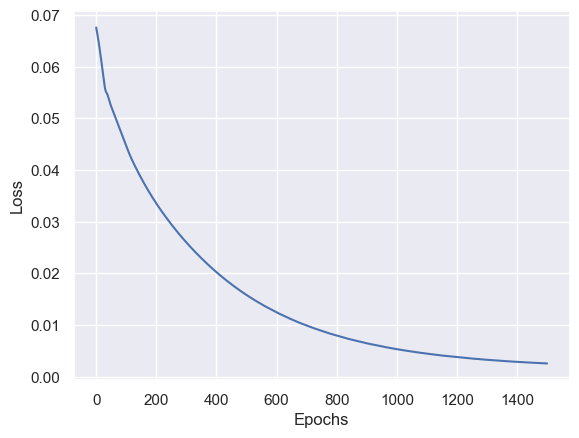

In [22]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

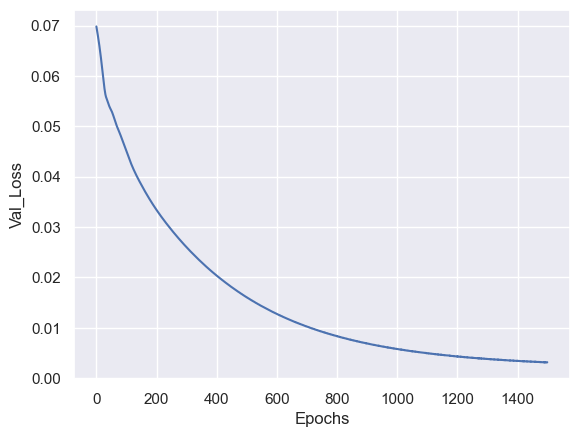

In [23]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [25]:
#modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\Alpha-Giants.h5


In [26]:
predalpha = modelAlpha.predict(X_test)

10/10 [==============================] - 0s 7ms/step


In [27]:
predalpha

array([[ 0.17792046],
       [ 0.04623515],
       [ 0.11350925],
       [ 0.04623515],
       [ 0.00855672],
       [ 0.13597155],
       [ 0.0930157 ],
       [ 0.14201203],
       [ 0.1800431 ],
       [ 0.14342141],
       [ 0.31133866],
       [ 0.21638332],
       [ 0.01854065],
       [ 0.0164429 ],
       [ 0.04646809],
       [ 0.02550518],
       [ 0.0479861 ],
       [ 0.10068764],
       [ 0.04755516],
       [ 0.00238003],
       [ 0.0479861 ],
       [ 0.21638332],
       [ 0.22122076],
       [ 0.14201203],
       [ 0.16524032],
       [ 0.22122076],
       [ 0.04623515],
       [ 0.14901026],
       [-0.00902412],
       [ 0.21484724],
       [ 0.04623515],
       [ 0.07492402],
       [-0.01927429],
       [ 0.20780678],
       [ 0.05929711],
       [ 0.0479861 ],
       [ 0.02550518],
       [ 0.20780678],
       [ 0.19945699],
       [ 0.14165708],
       [ 0.04623515],
       [-0.00902412],
       [-0.01798274],
       [ 0.12357461],
       [ 0.24685314],
       [ 0

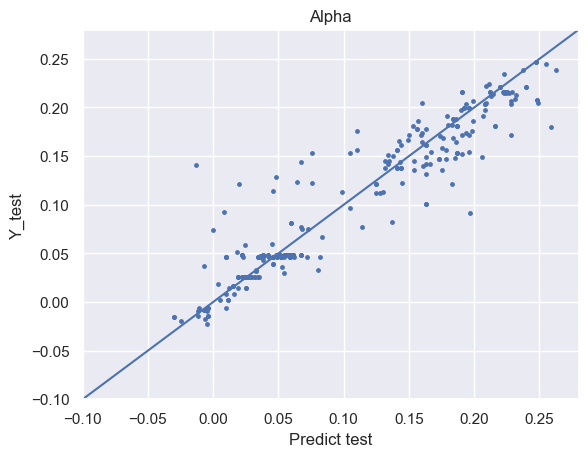

In [28]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [29]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 90.0%


In [30]:
Y_test['alpha_predict'] = predalpha

In [31]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  
ID                                                    
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920  
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235  
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509  
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235  
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557  
...                               ...            ...  
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954  
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929  
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680  
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554  
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392  

[299 rows x 11 columns]

In [32]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [46]:
Parametro = "CFE"
columnTrain = 'c_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [47]:
modelCFE = baseline_model_teste()

In [48]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.0638 - val_loss: 0.0639 - 607ms/epoch - 607ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0635 - val_loss: 0.0635 - 180ms/epoch - 180ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0632 - val_loss: 0.0632 - 38ms/epoch - 38ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0630 - 39ms/epoch - 39ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0627 - val_loss: 0.0627 - 36ms/epoch - 36ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0624 - val_loss: 0.0624 - 40ms/epoch - 40ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0622 - val_loss: 0.0621 - 35ms/epoch - 35ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0619 - val_loss: 0.0618 - 37ms/epoch - 37ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0616 - val_loss: 0.0615 - 37ms/epoch - 37ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0613 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0610 - val_loss: 0.0608 - 36ms/epoch - 36ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0607 - val_loss: 0.0604 - 38ms/epoch - 38ms/step
Epoch 13/2000
1/1 - 0

Epoch 101/2000
1/1 - 0s - loss: 0.0451 - val_loss: 0.0439 - 43ms/epoch - 43ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0450 - val_loss: 0.0438 - 40ms/epoch - 40ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0449 - val_loss: 0.0437 - 41ms/epoch - 41ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0447 - val_loss: 0.0436 - 42ms/epoch - 42ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0435 - 39ms/epoch - 39ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0433 - 51ms/epoch - 51ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0444 - val_loss: 0.0432 - 41ms/epoch - 41ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0443 - val_loss: 0.0431 - 90ms/epoch - 90ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0441 - val_loss: 0.0430 - 38ms/epoch - 38ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0440 - val_loss: 0.0429 - 77ms/epoch - 77ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0428 - 37ms/epoch - 37ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0438 - val_loss: 0.0426 - 68ms/epoch - 68ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0334 - val_loss: 0.0335 - 47ms/epoch - 47ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0333 - val_loss: 0.0334 - 42ms/epoch - 42ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0332 - val_loss: 0.0334 - 39ms/epoch - 39ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0333 - 40ms/epoch - 40ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0330 - val_loss: 0.0332 - 42ms/epoch - 42ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0331 - 40ms/epoch - 40ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0330 - 45ms/epoch - 45ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0330 - 43ms/epoch - 43ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0326 - val_loss: 0.0329 - 48ms/epoch - 48ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0325 - val_loss: 0.0328 - 42ms/epoch - 42ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0324 - val_loss: 0.0327 - 44ms/epoch - 44ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0327 - 43ms/epoch - 43ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0268 - 40ms/epoch - 40ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0267 - 43ms/epoch - 43ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0267 - 45ms/epoch - 45ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0266 - 38ms/epoch - 38ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0266 - 43ms/epoch - 43ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0264 - 49ms/epoch - 49ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0265 - 49ms/epoch - 49ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0263 - 42ms/epoch - 42ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0263 - 54ms/epoch - 54ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0263 - 52ms/epoch - 52ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0262 - 48ms/epoch - 48ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0262 - 46ms/epoch - 46ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0218 - 50ms/epoch - 50ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0206 - val_loss: 0.0217 - 43ms/epoch - 43ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0206 - val_loss: 0.0218 - 41ms/epoch - 41ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0216 - 45ms/epoch - 45ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0217 - 46ms/epoch - 46ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0215 - 42ms/epoch - 42ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0204 - val_loss: 0.0216 - 42ms/epoch - 42ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0204 - val_loss: 0.0215 - 41ms/epoch - 41ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0203 - val_loss: 0.0215 - 39ms/epoch - 39ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0203 - val_loss: 0.0214 - 48ms/epoch - 48ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0202 - val_loss: 0.0213 - 40ms/epoch - 40ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0202 - val_loss: 0.0214 - 44ms/epoch - 44ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0169 - val_loss: 0.0181 - 41ms/epoch - 41ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0181 - 57ms/epoch - 57ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0181 - 51ms/epoch - 51ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0180 - 44ms/epoch - 44ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0180 - 40ms/epoch - 40ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0179 - 41ms/epoch - 41ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0180 - 45ms/epoch - 45ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0178 - 43ms/epoch - 43ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0179 - 43ms/epoch - 43ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0178 - 46ms/epoch - 46ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0178 - 42ms/epoch - 42ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0165 - val_loss: 0.0177 - 40ms/epoch - 40ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0153 - 40ms/epoch - 40ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0152 - 43ms/epoch - 43ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0153 - 41ms/epoch - 41ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0152 - 41ms/epoch - 41ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0152 - 41ms/epoch - 41ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0152 - 46ms/epoch - 46ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0151 - 56ms/epoch - 56ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0151 - 42ms/epoch - 42ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0151 - 42ms/epoch - 42ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0151 - 40ms/epoch - 40ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0150 - 39ms/epoch - 39ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0151 - 42ms/epoch - 42ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0131 - 44ms/epoch - 44ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0131 - 46ms/epoch - 46ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0131 - 40ms/epoch - 40ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0131 - 51ms/epoch - 51ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0130 - 42ms/epoch - 42ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0131 - 42ms/epoch - 42ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0130 - 48ms/epoch - 48ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0131 - 47ms/epoch - 47ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0130 - 48ms/epoch - 48ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0132 - 40ms/epoch - 40ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0129 - 43ms/epoch - 43ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0131 - 54ms/epoch - 54ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0115 - 45ms/epoch - 45ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0114 - 41ms/epoch - 41ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0115 - 42ms/epoch - 42ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0114 - 45ms/epoch - 45ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0114 - 43ms/epoch - 43ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0114 - 42ms/epoch - 42ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0114 - 43ms/epoch - 43ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0114 - 42ms/epoch - 42ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0113 - 42ms/epoch - 42ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0114 - 44ms/epoch - 44ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0113 - 42ms/epoch - 42ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0114 - 41ms/epoch - 41ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0102 - 45ms/epoch - 45ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0101 - 52ms/epoch - 52ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0101 - 41ms/epoch - 41ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0101 - 44ms/epoch - 44ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0101 - 41ms/epoch - 41ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0101 - 43ms/epoch - 43ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0101 - 46ms/epoch - 46ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0101 - 47ms/epoch - 47ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0100 - 43ms/epoch - 43ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0101 - 40ms/epoch - 40ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0100 - 41ms/epoch - 41ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0101 - 43ms/epoch - 43ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0092 - 46ms/epoch - 46ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0091 - 42ms/epoch - 42ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 44ms/epoch - 44ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 40ms/epoch - 40ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 44ms/epoch - 44ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 45ms/epoch - 45ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 41ms/epoch - 41ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 42ms/epoch - 42ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0090 - 53ms/epoch - 53ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 42ms/epoch - 42ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0090 - 48ms/epoch - 48ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0091 - 42ms/epoch - 42ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0083 - 48ms/epoch - 48ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 43ms/epoch - 43ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 40ms/epoch - 40ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 41ms/epoch - 41ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 40ms/epoch - 40ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 41ms/epoch - 41ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 46ms/epoch - 46ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 41ms/epoch - 41ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 42ms/epoch - 42ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0082 - 54ms/epoch - 54ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0083 - 45ms/epoch - 45ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0082 - 50ms/epoch - 50

Epoch 1188/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0076 - 44ms/epoch - 44ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 44ms/epoch - 44ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0076 - 44ms/epoch - 44ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 40ms/epoch - 40ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 43ms/epoch - 43ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0076 - 41ms/epoch - 41ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 45ms/epoch - 45ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0076 - 42ms/epoch - 42ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 42ms/epoch - 42ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0076 - 48ms/epoch - 48ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0062 - val_loss: 0.0076 - 44ms/epoch - 44ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0062 - val_loss: 0.0076 - 43ms/epoch - 43

Epoch 1286/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0071 - 41ms/epoch - 41ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0072 - 38ms/epoch - 38ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0071 - 40ms/epoch - 40ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0071 - 38ms/epoch - 38ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 38ms/epoch - 38ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 41ms/epoch - 41ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 45ms/epoch - 45ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 56ms/epoch - 56ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 49ms/epoch - 49ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 40ms/epoch - 40ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 41ms/epoch - 41ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 40ms/epoch - 40

Epoch 1384/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 69ms/epoch - 69ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 44ms/epoch - 44ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 70ms/epoch - 70ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 42ms/epoch - 42ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 44ms/epoch - 44ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 43ms/epoch - 43ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 41ms/epoch - 41ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 43ms/epoch - 43ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 46ms/epoch - 46ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 39ms/epoch - 39ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0068 - 46ms/epoch - 46ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0067 - 41ms/epoch - 41

Epoch 1482/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 44ms/epoch - 44ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 43ms/epoch - 43ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 42ms/epoch - 42ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 41ms/epoch - 41ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 45ms/epoch - 45ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 42ms/epoch - 42ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 46ms/epoch - 46ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 43ms/epoch - 43ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 39ms/epoch - 39ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0066 - 44ms/epoch - 44ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 43ms/epoch - 43ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 47ms/epoch - 47

Epoch 1580/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 43ms/epoch - 43ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0062 - 45ms/epoch - 45ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 44ms/epoch - 44ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0062 - 39ms/epoch - 39ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 43ms/epoch - 43ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0062 - 59ms/epoch - 59ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 47ms/epoch - 47ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0062 - 67ms/epoch - 67ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 42ms/epoch - 42ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 69ms/epoch - 69ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 39ms/epoch - 39ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0047 - val_loss: 0.0061 - 44ms/epoch - 44

Epoch 1678/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 42ms/epoch - 42ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 42ms/epoch - 42ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 41ms/epoch - 41ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 44ms/epoch - 44ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 39ms/epoch - 39ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 45ms/epoch - 45ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 43ms/epoch - 43ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 40ms/epoch - 40ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 43ms/epoch - 43ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 43ms/epoch - 43ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 45ms/epoch - 45ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0059 - 43ms/epoch - 43

Epoch 1776/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 44ms/epoch - 44ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 45ms/epoch - 45ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 40ms/epoch - 40ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 48ms/epoch - 48ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 46ms/epoch - 46ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 51ms/epoch - 51ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 43ms/epoch - 43ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 42ms/epoch - 42ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 49ms/epoch - 49ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 45ms/epoch - 45ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 42ms/epoch - 42ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 39ms/epoch - 39

Epoch 1874/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0055 - 42ms/epoch - 42ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 37ms/epoch - 37ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0055 - 34ms/epoch - 34ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 39ms/epoch - 39ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0055 - 36ms/epoch - 36ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 34ms/epoch - 34ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 36ms/epoch - 36ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 37ms/epoch - 37ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 34ms/epoch - 34ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 36ms/epoch - 36ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 35ms/epoch - 35ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0055 - 37ms/epoch - 37

Epoch 1972/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 44ms/epoch - 44ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 48ms/epoch - 48ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 47ms/epoch - 47ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 54ms/epoch - 54ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 46ms/epoch - 46ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 55ms/epoch - 55ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 41ms/epoch - 41ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 41ms/epoch - 41ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 41ms/epoch - 41ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 40ms/epoch - 40ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0053 - 43ms/epoch - 43ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 44ms/epoch - 44

Text(0, 0.5, 'Loss')

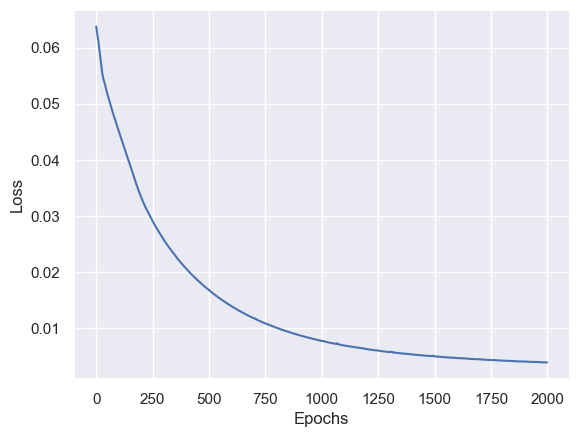

In [49]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

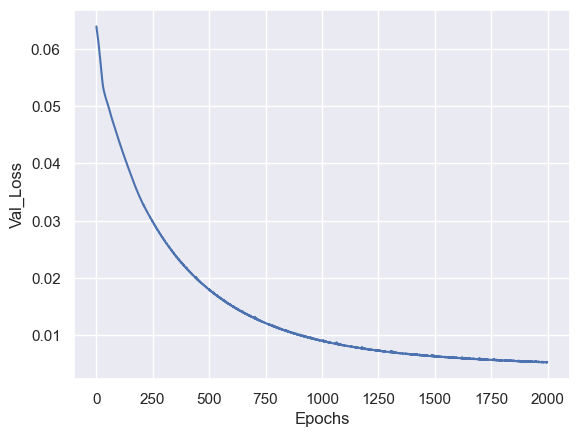

In [50]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [51]:
#modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CFE-Giants.h5


In [52]:
predCFE = modelCFE.predict(X_test)

10/10 [==============================] - 0s 11ms/step


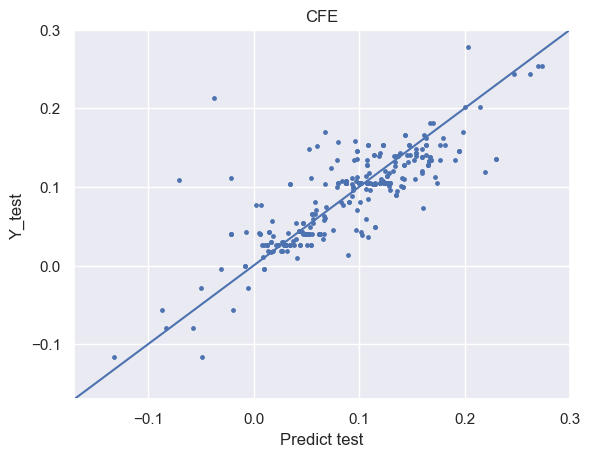

In [53]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [54]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 68.0%


In [43]:
Y_test['CFE_predict'] = predCFE

In [44]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  
ID                                                                 
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233  
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720  
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996  
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720  
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383  
...                               ...            ...          ...  
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641  
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957  
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390  
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384  
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377  

[299 rows x 12 columns]

In [45]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [55]:
Parametro = "CAFE"
columnTrain = 'ca_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [56]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

In [57]:
modelCAFE = baseline_model_teste()

In [58]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 1200, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1200
1/1 - 1s - loss: 0.0651 - val_loss: 0.0664 - 670ms/epoch - 670ms/step
Epoch 2/1200
1/1 - 0s - loss: 0.0648 - val_loss: 0.0661 - 210ms/epoch - 210ms/step
Epoch 3/1200
1/1 - 0s - loss: 0.0645 - val_loss: 0.0658 - 39ms/epoch - 39ms/step
Epoch 4/1200
1/1 - 0s - loss: 0.0643 - val_loss: 0.0655 - 47ms/epoch - 47ms/step
Epoch 5/1200
1/1 - 0s - loss: 0.0640 - val_loss: 0.0652 - 36ms/epoch - 36ms/step
Epoch 6/1200
1/1 - 0s - loss: 0.0638 - val_loss: 0.0650 - 38ms/epoch - 38ms/step
Epoch 7/1200
1/1 - 0s - loss: 0.0635 - val_loss: 0.0647 - 35ms/epoch - 35ms/step
Epoch 8/1200
1/1 - 0s - loss: 0.0633 - val_loss: 0.0644 - 37ms/epoch - 37ms/step
Epoch 9/1200
1/1 - 0s - loss: 0.0630 - val_loss: 0.0642 - 36ms/epoch - 36ms/step
Epoch 10/1200
1/1 - 0s - loss: 0.0627 - val_loss: 0.0639 - 36ms/epoch - 36ms/step
Epoch 11/1200
1/1 - 0s - loss: 0.0624 - val_loss: 0.0636 - 37ms/epoch - 37ms/step
Epoch 12/1200
1/1 - 0s - loss: 0.0622 - val_loss: 0.0633 - 38ms/epoch - 38ms/step
Epoch 13/1200
1/1 - 0

Epoch 101/1200
1/1 - 0s - loss: 0.0434 - val_loss: 0.0435 - 40ms/epoch - 40ms/step
Epoch 102/1200
1/1 - 0s - loss: 0.0433 - val_loss: 0.0434 - 38ms/epoch - 38ms/step
Epoch 103/1200
1/1 - 0s - loss: 0.0432 - val_loss: 0.0433 - 41ms/epoch - 41ms/step
Epoch 104/1200
1/1 - 0s - loss: 0.0430 - val_loss: 0.0431 - 37ms/epoch - 37ms/step
Epoch 105/1200
1/1 - 0s - loss: 0.0429 - val_loss: 0.0430 - 43ms/epoch - 43ms/step
Epoch 106/1200
1/1 - 0s - loss: 0.0428 - val_loss: 0.0429 - 40ms/epoch - 40ms/step
Epoch 107/1200
1/1 - 0s - loss: 0.0426 - val_loss: 0.0428 - 37ms/epoch - 37ms/step
Epoch 108/1200
1/1 - 0s - loss: 0.0425 - val_loss: 0.0426 - 40ms/epoch - 40ms/step
Epoch 109/1200
1/1 - 0s - loss: 0.0424 - val_loss: 0.0425 - 40ms/epoch - 40ms/step
Epoch 110/1200
1/1 - 0s - loss: 0.0423 - val_loss: 0.0424 - 42ms/epoch - 42ms/step
Epoch 111/1200
1/1 - 0s - loss: 0.0421 - val_loss: 0.0423 - 43ms/epoch - 43ms/step
Epoch 112/1200
1/1 - 0s - loss: 0.0420 - val_loss: 0.0422 - 46ms/epoch - 46ms/step
Epoc

Epoch 200/1200
1/1 - 0s - loss: 0.0330 - val_loss: 0.0330 - 44ms/epoch - 44ms/step
Epoch 201/1200
1/1 - 0s - loss: 0.0330 - val_loss: 0.0329 - 45ms/epoch - 45ms/step
Epoch 202/1200
1/1 - 0s - loss: 0.0329 - val_loss: 0.0329 - 43ms/epoch - 43ms/step
Epoch 203/1200
1/1 - 0s - loss: 0.0328 - val_loss: 0.0328 - 39ms/epoch - 39ms/step
Epoch 204/1200
1/1 - 0s - loss: 0.0327 - val_loss: 0.0327 - 48ms/epoch - 48ms/step
Epoch 205/1200
1/1 - 0s - loss: 0.0326 - val_loss: 0.0326 - 45ms/epoch - 45ms/step
Epoch 206/1200
1/1 - 0s - loss: 0.0325 - val_loss: 0.0325 - 46ms/epoch - 46ms/step
Epoch 207/1200
1/1 - 0s - loss: 0.0324 - val_loss: 0.0324 - 45ms/epoch - 45ms/step
Epoch 208/1200
1/1 - 0s - loss: 0.0323 - val_loss: 0.0323 - 49ms/epoch - 49ms/step
Epoch 209/1200
1/1 - 0s - loss: 0.0323 - val_loss: 0.0322 - 45ms/epoch - 45ms/step
Epoch 210/1200
1/1 - 0s - loss: 0.0322 - val_loss: 0.0322 - 45ms/epoch - 45ms/step
Epoch 211/1200
1/1 - 0s - loss: 0.0321 - val_loss: 0.0321 - 45ms/epoch - 45ms/step
Epoc

Epoch 299/1200
1/1 - 0s - loss: 0.0255 - val_loss: 0.0255 - 44ms/epoch - 44ms/step
Epoch 300/1200
1/1 - 0s - loss: 0.0255 - val_loss: 0.0254 - 45ms/epoch - 45ms/step
Epoch 301/1200
1/1 - 0s - loss: 0.0254 - val_loss: 0.0254 - 43ms/epoch - 43ms/step
Epoch 302/1200
1/1 - 0s - loss: 0.0253 - val_loss: 0.0253 - 44ms/epoch - 44ms/step
Epoch 303/1200
1/1 - 0s - loss: 0.0253 - val_loss: 0.0252 - 46ms/epoch - 46ms/step
Epoch 304/1200
1/1 - 0s - loss: 0.0252 - val_loss: 0.0252 - 42ms/epoch - 42ms/step
Epoch 305/1200
1/1 - 0s - loss: 0.0251 - val_loss: 0.0251 - 42ms/epoch - 42ms/step
Epoch 306/1200
1/1 - 0s - loss: 0.0251 - val_loss: 0.0250 - 40ms/epoch - 40ms/step
Epoch 307/1200
1/1 - 0s - loss: 0.0250 - val_loss: 0.0250 - 43ms/epoch - 43ms/step
Epoch 308/1200
1/1 - 0s - loss: 0.0250 - val_loss: 0.0249 - 39ms/epoch - 39ms/step
Epoch 309/1200
1/1 - 0s - loss: 0.0249 - val_loss: 0.0248 - 40ms/epoch - 40ms/step
Epoch 310/1200
1/1 - 0s - loss: 0.0248 - val_loss: 0.0248 - 40ms/epoch - 40ms/step
Epoc

Epoch 398/1200
1/1 - 0s - loss: 0.0198 - val_loss: 0.0198 - 41ms/epoch - 41ms/step
Epoch 399/1200
1/1 - 0s - loss: 0.0198 - val_loss: 0.0198 - 41ms/epoch - 41ms/step
Epoch 400/1200
1/1 - 0s - loss: 0.0197 - val_loss: 0.0197 - 45ms/epoch - 45ms/step
Epoch 401/1200
1/1 - 0s - loss: 0.0197 - val_loss: 0.0197 - 40ms/epoch - 40ms/step
Epoch 402/1200
1/1 - 0s - loss: 0.0196 - val_loss: 0.0196 - 40ms/epoch - 40ms/step
Epoch 403/1200
1/1 - 0s - loss: 0.0196 - val_loss: 0.0196 - 55ms/epoch - 55ms/step
Epoch 404/1200
1/1 - 0s - loss: 0.0195 - val_loss: 0.0195 - 38ms/epoch - 38ms/step
Epoch 405/1200
1/1 - 0s - loss: 0.0195 - val_loss: 0.0195 - 37ms/epoch - 37ms/step
Epoch 406/1200
1/1 - 0s - loss: 0.0194 - val_loss: 0.0195 - 58ms/epoch - 58ms/step
Epoch 407/1200
1/1 - 0s - loss: 0.0194 - val_loss: 0.0194 - 39ms/epoch - 39ms/step
Epoch 408/1200
1/1 - 0s - loss: 0.0193 - val_loss: 0.0194 - 69ms/epoch - 69ms/step
Epoch 409/1200
1/1 - 0s - loss: 0.0193 - val_loss: 0.0193 - 43ms/epoch - 43ms/step
Epoc

Epoch 497/1200
1/1 - 0s - loss: 0.0155 - val_loss: 0.0156 - 44ms/epoch - 44ms/step
Epoch 498/1200
1/1 - 0s - loss: 0.0154 - val_loss: 0.0155 - 41ms/epoch - 41ms/step
Epoch 499/1200
1/1 - 0s - loss: 0.0154 - val_loss: 0.0155 - 42ms/epoch - 42ms/step
Epoch 500/1200
1/1 - 0s - loss: 0.0154 - val_loss: 0.0155 - 47ms/epoch - 47ms/step
Epoch 501/1200
1/1 - 0s - loss: 0.0153 - val_loss: 0.0154 - 49ms/epoch - 49ms/step
Epoch 502/1200
1/1 - 0s - loss: 0.0153 - val_loss: 0.0154 - 56ms/epoch - 56ms/step
Epoch 503/1200
1/1 - 0s - loss: 0.0153 - val_loss: 0.0153 - 49ms/epoch - 49ms/step
Epoch 504/1200
1/1 - 0s - loss: 0.0152 - val_loss: 0.0153 - 48ms/epoch - 48ms/step
Epoch 505/1200
1/1 - 0s - loss: 0.0152 - val_loss: 0.0153 - 48ms/epoch - 48ms/step
Epoch 506/1200
1/1 - 0s - loss: 0.0151 - val_loss: 0.0152 - 41ms/epoch - 41ms/step
Epoch 507/1200
1/1 - 0s - loss: 0.0151 - val_loss: 0.0152 - 50ms/epoch - 50ms/step
Epoch 508/1200
1/1 - 0s - loss: 0.0151 - val_loss: 0.0152 - 46ms/epoch - 46ms/step
Epoc

Epoch 596/1200
1/1 - 0s - loss: 0.0122 - val_loss: 0.0123 - 43ms/epoch - 43ms/step
Epoch 597/1200
1/1 - 0s - loss: 0.0122 - val_loss: 0.0123 - 43ms/epoch - 43ms/step
Epoch 598/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0123 - 46ms/epoch - 46ms/step
Epoch 599/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 48ms/epoch - 48ms/step
Epoch 600/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 47ms/epoch - 47ms/step
Epoch 601/1200
1/1 - 0s - loss: 0.0120 - val_loss: 0.0122 - 46ms/epoch - 46ms/step
Epoch 602/1200
1/1 - 0s - loss: 0.0120 - val_loss: 0.0122 - 46ms/epoch - 46ms/step
Epoch 603/1200
1/1 - 0s - loss: 0.0120 - val_loss: 0.0121 - 40ms/epoch - 40ms/step
Epoch 604/1200
1/1 - 0s - loss: 0.0119 - val_loss: 0.0121 - 42ms/epoch - 42ms/step
Epoch 605/1200
1/1 - 0s - loss: 0.0119 - val_loss: 0.0121 - 51ms/epoch - 51ms/step
Epoch 606/1200
1/1 - 0s - loss: 0.0119 - val_loss: 0.0120 - 43ms/epoch - 43ms/step
Epoch 607/1200
1/1 - 0s - loss: 0.0119 - val_loss: 0.0120 - 46ms/epoch - 46ms/step
Epoc

Epoch 695/1200
1/1 - 0s - loss: 0.0097 - val_loss: 0.0098 - 45ms/epoch - 45ms/step
Epoch 696/1200
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 38ms/epoch - 38ms/step
Epoch 697/1200
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 44ms/epoch - 44ms/step
Epoch 698/1200
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 40ms/epoch - 40ms/step
Epoch 699/1200
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 42ms/epoch - 42ms/step
Epoch 700/1200
1/1 - 0s - loss: 0.0096 - val_loss: 0.0097 - 48ms/epoch - 48ms/step
Epoch 701/1200
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 43ms/epoch - 43ms/step
Epoch 702/1200
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 42ms/epoch - 42ms/step
Epoch 703/1200
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 44ms/epoch - 44ms/step
Epoch 704/1200
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 39ms/epoch - 39ms/step
Epoch 705/1200
1/1 - 0s - loss: 0.0094 - val_loss: 0.0096 - 37ms/epoch - 37ms/step
Epoch 706/1200
1/1 - 0s - loss: 0.0094 - val_loss: 0.0096 - 49ms/epoch - 49ms/step
Epoc

Epoch 794/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0080 - 42ms/epoch - 42ms/step
Epoch 795/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 48ms/epoch - 48ms/step
Epoch 796/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 49ms/epoch - 49ms/step
Epoch 797/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 40ms/epoch - 40ms/step
Epoch 798/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 41ms/epoch - 41ms/step
Epoch 799/1200
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 42ms/epoch - 42ms/step
Epoch 800/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0079 - 55ms/epoch - 55ms/step
Epoch 801/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0078 - 43ms/epoch - 43ms/step
Epoch 802/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0078 - 43ms/epoch - 43ms/step
Epoch 803/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0078 - 42ms/epoch - 42ms/step
Epoch 804/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0078 - 45ms/epoch - 45ms/step
Epoch 805/1200
1/1 - 0s - loss: 0.0076 - val_loss: 0.0078 - 46ms/epoch - 46ms/step
Epoc

Epoch 893/1200
1/1 - 0s - loss: 0.0063 - val_loss: 0.0065 - 46ms/epoch - 46ms/step
Epoch 894/1200
1/1 - 0s - loss: 0.0063 - val_loss: 0.0065 - 39ms/epoch - 39ms/step
Epoch 895/1200
1/1 - 0s - loss: 0.0063 - val_loss: 0.0065 - 44ms/epoch - 44ms/step
Epoch 896/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 43ms/epoch - 43ms/step
Epoch 897/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 42ms/epoch - 42ms/step
Epoch 898/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 41ms/epoch - 41ms/step
Epoch 899/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0064 - 46ms/epoch - 46ms/step
Epoch 900/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0064 - 43ms/epoch - 43ms/step
Epoch 901/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0064 - 51ms/epoch - 51ms/step
Epoch 902/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0064 - 41ms/epoch - 41ms/step
Epoch 903/1200
1/1 - 0s - loss: 0.0062 - val_loss: 0.0064 - 41ms/epoch - 41ms/step
Epoch 904/1200
1/1 - 0s - loss: 0.0061 - val_loss: 0.0064 - 50ms/epoch - 50ms/step
Epoc

Epoch 992/1200
1/1 - 0s - loss: 0.0052 - val_loss: 0.0054 - 48ms/epoch - 48ms/step
Epoch 993/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 42ms/epoch - 42ms/step
Epoch 994/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 42ms/epoch - 42ms/step
Epoch 995/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 47ms/epoch - 47ms/step
Epoch 996/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 47ms/epoch - 47ms/step
Epoch 997/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 47ms/epoch - 47ms/step
Epoch 998/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0053 - 41ms/epoch - 41ms/step
Epoch 999/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0054 - 43ms/epoch - 43ms/step
Epoch 1000/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0053 - 50ms/epoch - 50ms/step
Epoch 1001/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0053 - 43ms/epoch - 43ms/step
Epoch 1002/1200
1/1 - 0s - loss: 0.0051 - val_loss: 0.0053 - 41ms/epoch - 41ms/step
Epoch 1003/1200
1/1 - 0s - loss: 0.0050 - val_loss: 0.0053 - 45ms/epoch - 45ms/step


Epoch 1090/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0046 - 45ms/epoch - 45ms/step
Epoch 1091/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0046 - 47ms/epoch - 47ms/step
Epoch 1092/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0046 - 47ms/epoch - 47ms/step
Epoch 1093/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0045 - 49ms/epoch - 49ms/step
Epoch 1094/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0045 - 40ms/epoch - 40ms/step
Epoch 1095/1200
1/1 - 0s - loss: 0.0043 - val_loss: 0.0045 - 49ms/epoch - 49ms/step
Epoch 1096/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 44ms/epoch - 44ms/step
Epoch 1097/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 43ms/epoch - 43ms/step
Epoch 1098/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 43ms/epoch - 43ms/step
Epoch 1099/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 46ms/epoch - 46ms/step
Epoch 1100/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 50ms/epoch - 50ms/step
Epoch 1101/1200
1/1 - 0s - loss: 0.0042 - val_loss: 0.0045 - 43ms/epoch - 43

Epoch 1188/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 34ms/epoch - 34ms/step
Epoch 1189/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1190/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1191/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1192/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1193/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 39ms/epoch - 39ms/step
Epoch 1194/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1195/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 38ms/epoch - 38ms/step
Epoch 1196/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 38ms/epoch - 38ms/step
Epoch 1197/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36ms/step
Epoch 1198/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 37ms/epoch - 37ms/step
Epoch 1199/1200
1/1 - 0s - loss: 0.0036 - val_loss: 0.0039 - 36ms/epoch - 36

Text(0, 0.5, 'Loss')

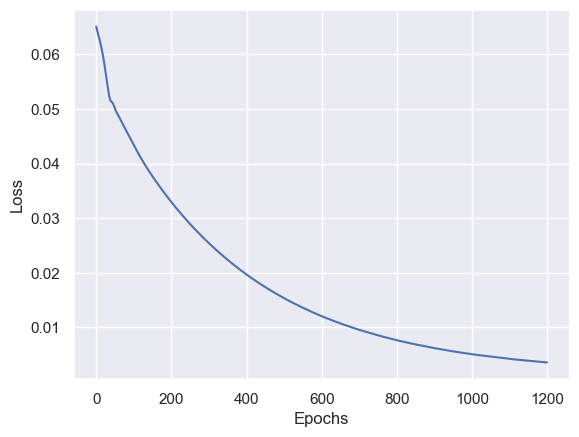

In [59]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

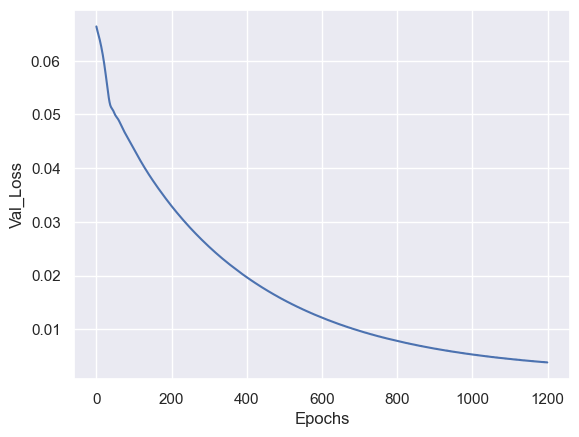

In [60]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [68]:
#modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CAFE-Giants.h5


In [62]:
predCAFE = modelCAFE.predict(X_test)

10/10 [==============================] - 0s 7ms/step


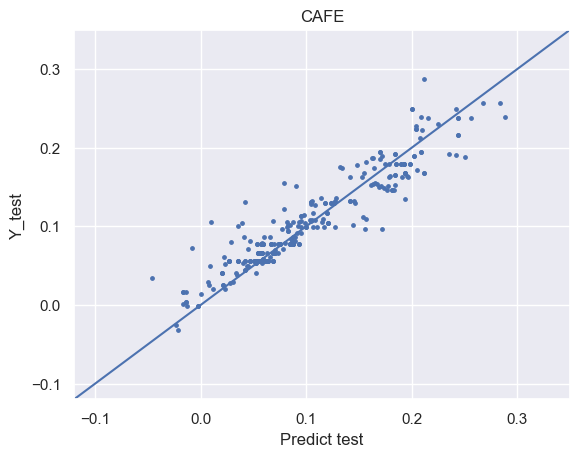

In [63]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [64]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 87.0%


In [65]:
Y_test['CAFE_predict'] = predCAFE

In [66]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233   
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720   
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996   
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720   
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383   
...                               ...            ...          ...   
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641   
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957   
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390   
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384   
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377   

                              CAFE_predict  
ID                                          
iDR4_3_SPLUS-n06s42_0022058       0.131211  
iDR4_3_STRIPE82-0028_0025061      0.077774  
iDR4_3_STRIPE82-0167_0033162      0.098913  
iDR4_3_STRIPE82-0028_0025061      0.077774  
iDR4_3_SPLUS-n07s41_0022767       0.081206  
...                                    ...  
iDR4_3_SPLUS-n06s44_0009510       0.108544  
iDR4_3_STRIPE82-0026_0048087      0.104593  
iDR4_3_SPLUS-n02s44_0024688       0.136484  
iDR4_3_SPLUS-n07s41_0022767       0.081197  
iDR4_3_STRIPE82-0026_0047943      0.179703  

[299 rows x 13 columns]

In [67]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [69]:
Parametro = "NFE"
columnTrain = 'n_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [70]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

In [71]:
modelNFE = baseline_model_teste()

In [72]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.0590 - val_loss: 0.0600 - 597ms/epoch - 597ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0588 - val_loss: 0.0598 - 71ms/epoch - 71ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0586 - val_loss: 0.0597 - 65ms/epoch - 65ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0585 - val_loss: 0.0595 - 251ms/epoch - 251ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0593 - 36ms/epoch - 36ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0592 - 36ms/epoch - 36ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0580 - val_loss: 0.0590 - 35ms/epoch - 35ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0578 - val_loss: 0.0588 - 37ms/epoch - 37ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0576 - val_loss: 0.0587 - 37ms/epoch - 37ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0575 - val_loss: 0.0585 - 36ms/epoch - 36ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0573 - val_loss: 0.0583 - 37ms/epoch - 37ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0571 - val_loss: 0.0581 - 38ms/epoch - 38ms/step
Epoch 13/2000
1/1 - 0

Epoch 101/2000
1/1 - 0s - loss: 0.0434 - val_loss: 0.0451 - 40ms/epoch - 40ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0432 - val_loss: 0.0449 - 37ms/epoch - 37ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0431 - val_loss: 0.0448 - 41ms/epoch - 41ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0430 - val_loss: 0.0446 - 37ms/epoch - 37ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0428 - val_loss: 0.0445 - 87ms/epoch - 87ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0443 - 42ms/epoch - 42ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0426 - val_loss: 0.0442 - 74ms/epoch - 74ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0424 - val_loss: 0.0440 - 39ms/epoch - 39ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0423 - val_loss: 0.0439 - 69ms/epoch - 69ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0422 - val_loss: 0.0437 - 40ms/epoch - 40ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0420 - val_loss: 0.0436 - 69ms/epoch - 69ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0419 - val_loss: 0.0434 - 40ms/epoch - 40ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0324 - val_loss: 0.0334 - 43ms/epoch - 43ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0334 - 47ms/epoch - 47ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0332 - 52ms/epoch - 52ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0332 - 59ms/epoch - 59ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0331 - 55ms/epoch - 55ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0320 - val_loss: 0.0330 - 49ms/epoch - 49ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0319 - val_loss: 0.0329 - 44ms/epoch - 44ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0318 - val_loss: 0.0328 - 42ms/epoch - 42ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0317 - val_loss: 0.0327 - 42ms/epoch - 42ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0316 - val_loss: 0.0326 - 42ms/epoch - 42ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0315 - val_loss: 0.0326 - 44ms/epoch - 44ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0314 - val_loss: 0.0325 - 47ms/epoch - 47ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0249 - val_loss: 0.0260 - 40ms/epoch - 40ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0249 - val_loss: 0.0259 - 45ms/epoch - 45ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0258 - 48ms/epoch - 48ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0258 - 46ms/epoch - 46ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0257 - 42ms/epoch - 42ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0246 - val_loss: 0.0256 - 39ms/epoch - 39ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0256 - 44ms/epoch - 44ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0255 - 41ms/epoch - 41ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0254 - 41ms/epoch - 41ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0254 - 41ms/epoch - 41ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0253 - 45ms/epoch - 45ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0242 - val_loss: 0.0253 - 45ms/epoch - 45ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0206 - 36ms/epoch - 36ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0206 - 37ms/epoch - 37ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0194 - val_loss: 0.0206 - 37ms/epoch - 37ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0194 - val_loss: 0.0205 - 36ms/epoch - 36ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0204 - 38ms/epoch - 38ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0204 - 41ms/epoch - 41ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0203 - 39ms/epoch - 39ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0203 - 39ms/epoch - 39ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0203 - 39ms/epoch - 39ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0202 - 37ms/epoch - 37ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0202 - 37ms/epoch - 37ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0201 - 36ms/epoch - 36ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0167 - 41ms/epoch - 41ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0167 - 44ms/epoch - 44ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0167 - 39ms/epoch - 39ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0166 - 39ms/epoch - 39ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0166 - 38ms/epoch - 38ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0166 - 45ms/epoch - 45ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0166 - 40ms/epoch - 40ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0165 - 40ms/epoch - 40ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0165 - 41ms/epoch - 41ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0165 - 37ms/epoch - 37ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0164 - 42ms/epoch - 42ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0164 - 40ms/epoch - 40ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0139 - 47ms/epoch - 47ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0138 - 58ms/epoch - 58ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0138 - 46ms/epoch - 46ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0138 - 41ms/epoch - 41ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0138 - 46ms/epoch - 46ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0137 - 42ms/epoch - 42ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0137 - 43ms/epoch - 43ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0137 - 44ms/epoch - 44ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0137 - 47ms/epoch - 47ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0136 - 54ms/epoch - 54ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0136 - 45ms/epoch - 45ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0136 - 52ms/epoch - 52ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0117 - 46ms/epoch - 46ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0117 - 46ms/epoch - 46ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0117 - 46ms/epoch - 46ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0116 - 41ms/epoch - 41ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0116 - 44ms/epoch - 44ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0116 - 40ms/epoch - 40ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0116 - 46ms/epoch - 46ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0115 - 44ms/epoch - 44ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0115 - 52ms/epoch - 52ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0115 - 50ms/epoch - 50ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0115 - 51ms/epoch - 51ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0115 - 43ms/epoch - 43ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0100 - 54ms/epoch - 54ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0100 - 45ms/epoch - 45ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0100 - 73ms/epoch - 73ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0100 - 61ms/epoch - 61ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0100 - 62ms/epoch - 62ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0100 - 51ms/epoch - 51ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0099 - 47ms/epoch - 47ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0099 - 45ms/epoch - 45ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0099 - 43ms/epoch - 43ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0099 - 48ms/epoch - 48ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0099 - 48ms/epoch - 48ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0099 - 48ms/epoch - 48ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0088 - 49ms/epoch - 49ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0088 - 43ms/epoch - 43ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0088 - 44ms/epoch - 44ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0087 - 50ms/epoch - 50ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 45ms/epoch - 45ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 39ms/epoch - 39ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 45ms/epoch - 45ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 39ms/epoch - 39ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 41ms/epoch - 41ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 42ms/epoch - 42ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 42ms/epoch - 42ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0086 - 44ms/epoch - 44ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 43ms/epoch - 43ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 44ms/epoch - 44ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 46ms/epoch - 46ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 44ms/epoch - 44ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 41ms/epoch - 41ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 44ms/epoch - 44ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 51ms/epoch - 51ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0078 - 47ms/epoch - 47ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 46ms/epoch - 46ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 41ms/epoch - 41ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 40ms/epoch - 40ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0077 - 40ms/epoch - 40ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0071 - 46ms/epoch - 46ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0070 - 48ms/epoch - 48ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 56ms/epoch - 56ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 44ms/epoch - 44ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 40ms/epoch - 40ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 47ms/epoch - 47ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 45ms/epoch - 45ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 43ms/epoch - 43ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 41ms/epoch - 41ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 44ms/epoch - 44ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 43ms/epoch - 43ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0070 - 43ms/epoch - 43

Epoch 1188/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 44ms/epoch - 44ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 69ms/epoch - 69ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 43ms/epoch - 43ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 69ms/epoch - 69ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 42ms/epoch - 42ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 68ms/epoch - 68ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 44ms/epoch - 44ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 68ms/epoch - 68ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0065 - 41ms/epoch - 41ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 69ms/epoch - 69ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 92ms/epoch - 92ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0064 - 44ms/epoch - 44

Epoch 1286/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 37ms/epoch - 37ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 37ms/epoch - 37ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 37ms/epoch - 37ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 38ms/epoch - 38ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 40ms/epoch - 40ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 38ms/epoch - 38ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0060 - 38ms/epoch - 38

Epoch 1384/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0057 - 41ms/epoch - 41ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0057 - 40ms/epoch - 40ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0057 - 44ms/epoch - 44ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 38ms/epoch - 38ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 44ms/epoch - 44ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0057 - 41ms/epoch - 41ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 46ms/epoch - 46ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 40ms/epoch - 40ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 44ms/epoch - 44ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 53ms/epoch - 53ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 49ms/epoch - 49ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0056 - 93ms/epoch - 93

Epoch 1482/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 43ms/epoch - 43ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 44ms/epoch - 44ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 44ms/epoch - 44ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 44ms/epoch - 44ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 40ms/epoch - 40ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 42ms/epoch - 42ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 39ms/epoch - 39ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 44ms/epoch - 44ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 47ms/epoch - 47ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 44ms/epoch - 44ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 41ms/epoch - 41ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 42ms/epoch - 42

Epoch 1580/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 43ms/epoch - 43ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 42ms/epoch - 42ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 44ms/epoch - 44ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 41ms/epoch - 41ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 40ms/epoch - 40ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 38ms/epoch - 38ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 45ms/epoch - 45ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0052 - 41ms/epoch - 41ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 42ms/epoch - 42ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 45ms/epoch - 45ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 41ms/epoch - 41ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0037 - val_loss: 0.0051 - 44ms/epoch - 44

Epoch 1678/2000
1/1 - 0s - loss: 0.0036 - val_loss: 0.0050 - 44ms/epoch - 44ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0036 - val_loss: 0.0050 - 39ms/epoch - 39ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0036 - val_loss: 0.0050 - 42ms/epoch - 42ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 38ms/epoch - 38ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 43ms/epoch - 43ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 40ms/epoch - 40ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 39ms/epoch - 39ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 39ms/epoch - 39ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 43ms/epoch - 43ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 47ms/epoch - 47ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0050 - 40ms/epoch - 40ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0049 - 38ms/epoch - 38

Epoch 1776/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 36ms/epoch - 36ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 34ms/epoch - 34ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 36ms/epoch - 36ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 36ms/epoch - 36ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 35ms/epoch - 35ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 34ms/epoch - 34ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0048 - 37ms/epoch - 37

Epoch 1874/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 41ms/epoch - 41ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 40ms/epoch - 40ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 40ms/epoch - 40ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 42ms/epoch - 42ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 43ms/epoch - 43ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 43ms/epoch - 43ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 40ms/epoch - 40ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 42ms/epoch - 42ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 42ms/epoch - 42ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 43ms/epoch - 43ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 39ms/epoch - 39ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0047 - 38ms/epoch - 38

Epoch 1972/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 43ms/epoch - 43ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 50ms/epoch - 50ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 42ms/epoch - 42ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 45ms/epoch - 45ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 43ms/epoch - 43ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 44ms/epoch - 44ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 46ms/epoch - 46ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 43ms/epoch - 43ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 43ms/epoch - 43ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 48ms/epoch - 48ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 44ms/epoch - 44ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0032 - val_loss: 0.0046 - 40ms/epoch - 40

Text(0, 0.5, 'Loss')

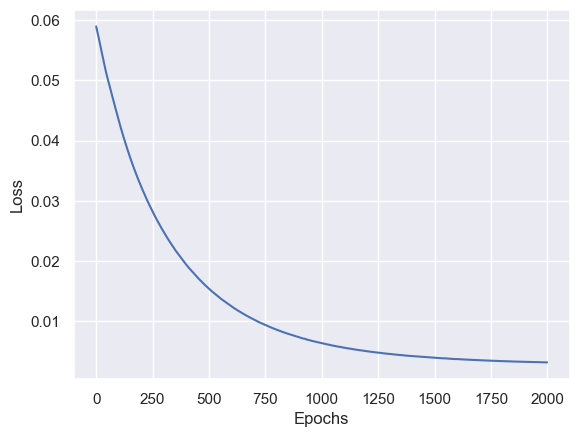

In [73]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

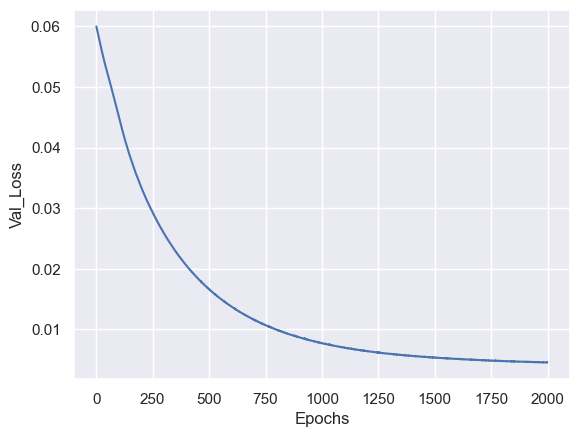

In [74]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [82]:
#modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NFE-Giants.h5


In [76]:
predNFE = modelNFE.predict(X_test)

10/10 [==============================] - 0s 13ms/step


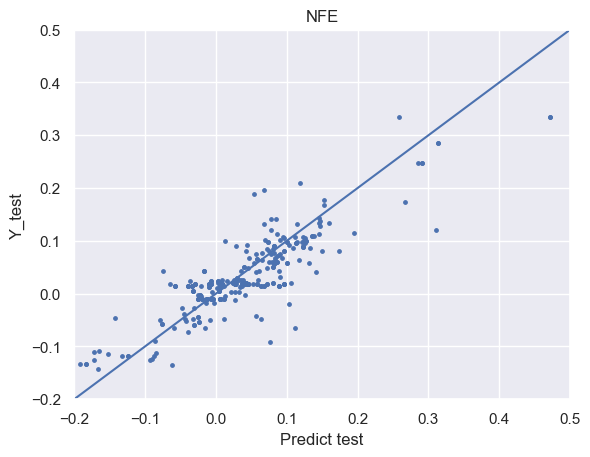

In [77]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [78]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 75.0%


In [79]:
Y_test['NFE_predict'] = predNFE

In [80]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233   
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720   
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996   
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720   
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383   
...                               ...            ...          ...   
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641   
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957   
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390   
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384   
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_SPLUS-n06s42_0022058       0.131211     0.051229  
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333  
iDR4_3_STRIPE82-0167_0033162      0.098913     0.104768  
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333  
iDR4_3_SPLUS-n07s41_0022767       0.081206     0.131893  
...                                    ...          ...  
iDR4_3_SPLUS-n06s44_0009510       0.108544     0.133245  
iDR4_3_STRIPE82-0026_0048087      0.104593     0.090421  
iDR4_3_SPLUS-n02s44_0024688       0.136484     0.076320  
iDR4_3_SPLUS-n07s41_0022767       0.081197     0.131870  
iDR4_3_STRIPE82-0026_0047943      0.179703     0.020349  

[299 rows x 14 columns]

In [81]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [83]:
Parametro = "MGFE"
columnTrain = 'mg_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [84]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

In [85]:
modelMGFE = baseline_model_teste()

In [86]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.0856 - val_loss: 0.0903 - 735ms/epoch - 735ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0850 - val_loss: 0.0897 - 252ms/epoch - 252ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0845 - val_loss: 0.0892 - 39ms/epoch - 39ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0840 - val_loss: 0.0887 - 35ms/epoch - 35ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0835 - val_loss: 0.0882 - 36ms/epoch - 36ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0830 - val_loss: 0.0877 - 49ms/epoch - 49ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0826 - val_loss: 0.0872 - 48ms/epoch - 48ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0821 - val_loss: 0.0867 - 55ms/epoch - 55ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0816 - val_loss: 0.0861 - 42ms/epoch - 42ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0811 - val_loss: 0.0856 - 41ms/epoch - 41ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0806 - val_loss: 0.0850 - 36ms/epoch - 36ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0801 - val_loss: 0.0845 - 36ms/epoch - 36ms/step
Epoch 13/2000
1/1 - 0

Epoch 101/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0500 - 41ms/epoch - 41ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0499 - 91ms/epoch - 91ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0490 - val_loss: 0.0497 - 40ms/epoch - 40ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0489 - val_loss: 0.0495 - 77ms/epoch - 77ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0487 - val_loss: 0.0494 - 43ms/epoch - 43ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0486 - val_loss: 0.0492 - 69ms/epoch - 69ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0491 - 42ms/epoch - 42ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0482 - val_loss: 0.0489 - 42ms/epoch - 42ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0481 - val_loss: 0.0487 - 43ms/epoch - 43ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0479 - val_loss: 0.0485 - 38ms/epoch - 38ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0478 - val_loss: 0.0484 - 47ms/epoch - 47ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0476 - val_loss: 0.0482 - 45ms/epoch - 45ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0368 - 40ms/epoch - 40ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0369 - val_loss: 0.0367 - 41ms/epoch - 41ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0369 - val_loss: 0.0366 - 42ms/epoch - 42ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0368 - val_loss: 0.0365 - 44ms/epoch - 44ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 42ms/epoch - 42ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0366 - val_loss: 0.0363 - 41ms/epoch - 41ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0365 - val_loss: 0.0362 - 41ms/epoch - 41ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 45ms/epoch - 45ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0363 - val_loss: 0.0360 - 43ms/epoch - 43ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0362 - val_loss: 0.0359 - 44ms/epoch - 44ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0359 - 42ms/epoch - 42ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0360 - val_loss: 0.0358 - 43ms/epoch - 43ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0292 - 37ms/epoch - 37ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0291 - 36ms/epoch - 36ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0291 - 35ms/epoch - 35ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0290 - 38ms/epoch - 38ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0289 - 35ms/epoch - 35ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0289 - 35ms/epoch - 35ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0288 - 35ms/epoch - 35ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0288 - 35ms/epoch - 35ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0287 - 37ms/epoch - 37ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0286 - 83ms/epoch - 83ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0286 - 36ms/epoch - 36ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0285 - 74ms/epoch - 74ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0235 - val_loss: 0.0238 - 45ms/epoch - 45ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0234 - val_loss: 0.0238 - 39ms/epoch - 39ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0234 - val_loss: 0.0237 - 38ms/epoch - 38ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0237 - 40ms/epoch - 40ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0236 - 39ms/epoch - 39ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0232 - val_loss: 0.0236 - 37ms/epoch - 37ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0232 - val_loss: 0.0235 - 39ms/epoch - 39ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0231 - val_loss: 0.0235 - 41ms/epoch - 41ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0231 - val_loss: 0.0234 - 39ms/epoch - 39ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0234 - 43ms/epoch - 43ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0234 - 47ms/epoch - 47ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0233 - 41ms/epoch - 41ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0197 - 46ms/epoch - 46ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0196 - 50ms/epoch - 50ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0196 - 54ms/epoch - 54ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0195 - 44ms/epoch - 44ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0195 - 45ms/epoch - 45ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0195 - 44ms/epoch - 44ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0188 - val_loss: 0.0194 - 43ms/epoch - 43ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0188 - val_loss: 0.0194 - 46ms/epoch - 46ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0194 - 40ms/epoch - 40ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0194 - 49ms/epoch - 49ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0193 - 46ms/epoch - 46ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0186 - val_loss: 0.0193 - 40ms/epoch - 40ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0165 - 40ms/epoch - 40ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0165 - 46ms/epoch - 46ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0165 - 49ms/epoch - 49ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0164 - 46ms/epoch - 46ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0164 - 50ms/epoch - 50ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0163 - 46ms/epoch - 46ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0163 - 47ms/epoch - 47ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0163 - 46ms/epoch - 46ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0162 - 45ms/epoch - 45ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0163 - 43ms/epoch - 43ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0162 - 49ms/epoch - 49ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0140 - 41ms/epoch - 41ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0141 - 43ms/epoch - 43ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0140 - 47ms/epoch - 47ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0140 - 45ms/epoch - 45ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0140 - 47ms/epoch - 47ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0140 - 48ms/epoch - 48ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0139 - 45ms/epoch - 45ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0139 - 48ms/epoch - 48ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0139 - 44ms/epoch - 44ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0139 - 43ms/epoch - 43ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0139 - 39ms/epoch - 39ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0138 - 41ms/epoch - 41ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0121 - 47ms/epoch - 47ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0122 - 47ms/epoch - 47ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0121 - 47ms/epoch - 47ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0121 - 47ms/epoch - 47ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0121 - 45ms/epoch - 45ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0121 - 46ms/epoch - 46ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0121 - 46ms/epoch - 46ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0120 - 43ms/epoch - 43ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0121 - 47ms/epoch - 47ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0120 - 49ms/epoch - 49ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0120 - 44ms/epoch - 44ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0119 - 46ms/epoch - 46ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0107 - 42ms/epoch - 42ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0107 - 51ms/epoch - 51ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0106 - 46ms/epoch - 46ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0107 - 47ms/epoch - 47ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0106 - 48ms/epoch - 48ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0106 - 45ms/epoch - 45ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0106 - 46ms/epoch - 46ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0106 - 48ms/epoch - 48ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0106 - 46ms/epoch - 46ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0106 - 46ms/epoch - 46ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0106 - 45ms/epoch - 45ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0105 - 43ms/epoch - 43ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0096 - 41ms/epoch - 41ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0095 - 42ms/epoch - 42ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0096 - 41ms/epoch - 41ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0095 - 39ms/epoch - 39ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0095 - 40ms/epoch - 40ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0095 - 41ms/epoch - 41ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0095 - 44ms/epoch - 44ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0095 - 41ms/epoch - 41ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0094 - 39ms/epoch - 39ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0095 - 44ms/epoch - 44ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0094 - 40ms/epoch - 40ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0095 - 41ms/epoch - 41ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0087 - 50ms/epoch - 50ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0086 - 53ms/epoch - 53ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0087 - 50ms/epoch - 50ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0086 - 56ms/epoch - 56ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0088 - 45ms/epoch - 45ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0086 - 42ms/epoch - 42ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0088 - 49ms/epoch - 49ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0085 - 40ms/epoch - 40ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0087 - 50ms/epoch - 50ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0086 - 53ms/epoch - 53ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0085 - 49ms/epoch - 49ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0086 - 51ms/epoch - 51

Epoch 1188/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 43ms/epoch - 43ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0080 - 48ms/epoch - 48ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 57ms/epoch - 57ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0080 - 40ms/epoch - 40ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 43ms/epoch - 43ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0080 - 41ms/epoch - 41ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 48ms/epoch - 48ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 48ms/epoch - 48ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0079 - 45ms/epoch - 45ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0079 - 51ms/epoch - 51ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0079 - 45ms/epoch - 45ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0079 - 50ms/epoch - 50

Epoch 1286/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 40ms/epoch - 40ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 48ms/epoch - 48ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 46ms/epoch - 46ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0073 - 45ms/epoch - 45ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 45ms/epoch - 45ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0073 - 46ms/epoch - 46ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 45ms/epoch - 45ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0073 - 47ms/epoch - 47ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 42ms/epoch - 42ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0073 - 40ms/epoch - 40ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0074 - 43ms/epoch - 43ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0073 - 41ms/epoch - 41

Epoch 1384/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0070 - 86ms/epoch - 86ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 123ms/epoch - 123ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 56ms/epoch - 56ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0070 - 46ms/epoch - 46ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 46ms/epoch - 46ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0070 - 44ms/epoch - 44ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 45ms/epoch - 45ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0070 - 42ms/epoch - 42ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 55ms/epoch - 55ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0070 - 46ms/epoch - 46ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 44ms/epoch - 44ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0069 - 49ms/epoch - 

Epoch 1482/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0067 - 47ms/epoch - 47ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0065 - 47ms/epoch - 47ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0066 - 43ms/epoch - 43ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0066 - 50ms/epoch - 50ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 53ms/epoch - 53ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0067 - 46ms/epoch - 46ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 47ms/epoch - 47ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 45ms/epoch - 45ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0066 - 45ms/epoch - 45ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 45ms/epoch - 45ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0066 - 47ms/epoch - 47ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0065 - 63ms/epoch - 63

Epoch 1580/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0062 - 69ms/epoch - 69ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 45ms/epoch - 45ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 70ms/epoch - 70ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 45ms/epoch - 45ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 68ms/epoch - 68ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 47ms/epoch - 47ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 70ms/epoch - 70ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0062 - 46ms/epoch - 46ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 67ms/epoch - 67ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0062 - 48ms/epoch - 48ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0063 - 69ms/epoch - 69ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0048 - val_loss: 0.0062 - 40ms/epoch - 40

Epoch 1678/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0061 - 41ms/epoch - 41ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 43ms/epoch - 43ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0061 - 41ms/epoch - 41ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 40ms/epoch - 40ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0061 - 46ms/epoch - 46ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 48ms/epoch - 48ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0061 - 69ms/epoch - 69ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 46ms/epoch - 46ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 48ms/epoch - 48ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 47ms/epoch - 47ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 41ms/epoch - 41ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0045 - val_loss: 0.0060 - 43ms/epoch - 43

Epoch 1776/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0059 - 40ms/epoch - 40ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 43ms/epoch - 43ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0059 - 43ms/epoch - 43ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 42ms/epoch - 42ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0059 - 40ms/epoch - 40ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 40ms/epoch - 40ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0059 - 38ms/epoch - 38ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 45ms/epoch - 45ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0059 - 38ms/epoch - 38ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 42ms/epoch - 42ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 42ms/epoch - 42ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0058 - 86ms/epoch - 86

Epoch 1874/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 43ms/epoch - 43ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0057 - 43ms/epoch - 43ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 43ms/epoch - 43ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0057 - 42ms/epoch - 42ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 45ms/epoch - 45ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 45ms/epoch - 45ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0057 - 40ms/epoch - 40ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 42ms/epoch - 42ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0057 - 42ms/epoch - 42ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 41ms/epoch - 41ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0057 - 44ms/epoch - 44ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0056 - 43ms/epoch - 43

Epoch 1972/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0056 - 52ms/epoch - 52ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0054 - 63ms/epoch - 63ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0056 - 102ms/epoch - 102ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 43ms/epoch - 43ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 75ms/epoch - 75ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 40ms/epoch - 40ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 68ms/epoch - 68ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 44ms/epoch - 44ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 69ms/epoch - 69ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 44ms/epoch - 44ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0054 - 59ms/epoch - 59ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0039 - val_loss: 0.0055 - 44ms/epoch - 

Text(0, 0.5, 'Loss')

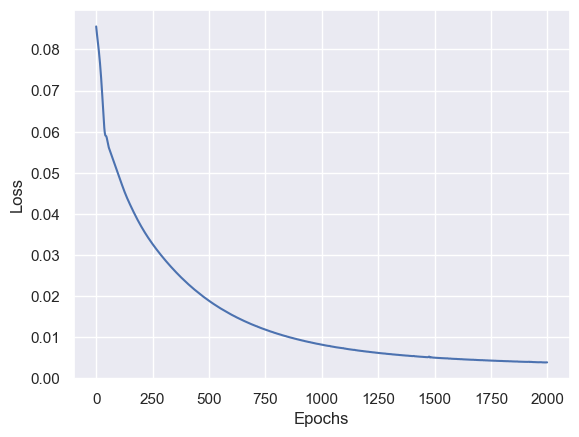

In [87]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

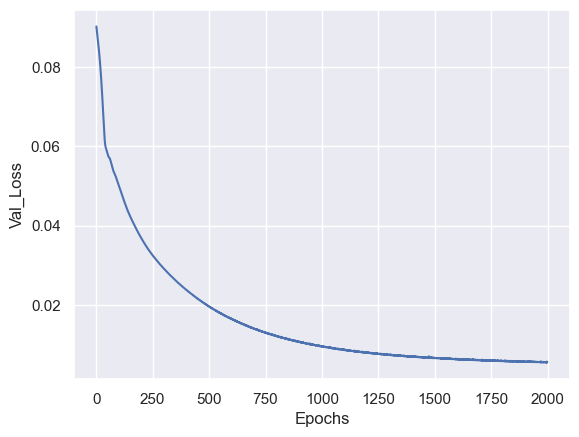

In [88]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [91]:
#modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\MGFE-Giants.h5


In [90]:
predMGFE = modelMGFE.predict(X_test)

10/10 [==============================] - 0s 5ms/step


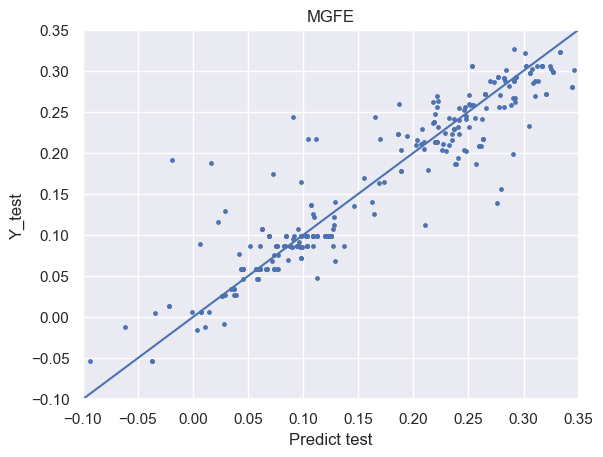

In [92]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.35)
plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [93]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 88.0%


In [94]:
Y_test['MGFE_predict'] = predMGFE

In [95]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233   
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720   
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996   
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720   
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383   
...                               ...            ...          ...   
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641   
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957   
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390   
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384   
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377   

                              CAFE_predict  NFE_predict  MGFE_predict  
ID                                                                     
iDR4_3_SPLUS-n06s42_0022058       0.131211     0.051229      0.236953  
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571  
iDR4_3_STRIPE82-0167_0033162      0.098913     0.104768      0.140248  
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571  
iDR4_3_SPLUS-n07s41_0022767       0.081206     0.131893     -0.011959  
...                                    ...          ...           ...  
iDR4_3_SPLUS-n06s44_0009510       0.108544     0.133245      0.254793  
iDR4_3_STRIPE82-0026_0048087      0.104593     0.090421      0.217234  
iDR4_3_SPLUS-n02s44_0024688       0.136484     0.076320      0.291005  
iDR4_3_SPLUS-n07s41_0022767       0.081197     0.131870     -0.011915  
iDR4_3_STRIPE82-0026_0047943      0.179703     0.020349      0.305486  

[299 rows x 15 columns]

In [96]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [97]:
Parametro = "SIFE"
columnTrain = 'si_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [98]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

In [99]:
modelSIFE = baseline_model_teste()

In [100]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500
1/1 - 1s - loss: 0.0659 - val_loss: 0.0671 - 570ms/epoch - 570ms/step
Epoch 2/1500
1/1 - 0s - loss: 0.0656 - val_loss: 0.0667 - 190ms/epoch - 190ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.0652 - val_loss: 0.0664 - 39ms/epoch - 39ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.0650 - val_loss: 0.0662 - 36ms/epoch - 36ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.0647 - val_loss: 0.0659 - 37ms/epoch - 37ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.0645 - val_loss: 0.0657 - 37ms/epoch - 37ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.0642 - val_loss: 0.0654 - 35ms/epoch - 35ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.0639 - val_loss: 0.0651 - 44ms/epoch - 44ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.0637 - val_loss: 0.0648 - 35ms/epoch - 35ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.0634 - val_loss: 0.0645 - 38ms/epoch - 38ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.0631 - val_loss: 0.0642 - 36ms/epoch - 36ms/step
Epoch 12/1500
1/1 - 0s - loss: 0.0629 - val_loss: 0.0640 - 39ms/epoch - 39ms/step
Epoch 13/1500
1/1 - 0

Epoch 101/1500
1/1 - 0s - loss: 0.0453 - val_loss: 0.0453 - 41ms/epoch - 41ms/step
Epoch 102/1500
1/1 - 0s - loss: 0.0451 - val_loss: 0.0451 - 69ms/epoch - 69ms/step
Epoch 103/1500
1/1 - 0s - loss: 0.0449 - val_loss: 0.0449 - 48ms/epoch - 48ms/step
Epoch 104/1500
1/1 - 0s - loss: 0.0448 - val_loss: 0.0448 - 69ms/epoch - 69ms/step
Epoch 105/1500
1/1 - 0s - loss: 0.0446 - val_loss: 0.0446 - 40ms/epoch - 40ms/step
Epoch 106/1500
1/1 - 0s - loss: 0.0444 - val_loss: 0.0444 - 69ms/epoch - 69ms/step
Epoch 107/1500
1/1 - 0s - loss: 0.0443 - val_loss: 0.0443 - 39ms/epoch - 39ms/step
Epoch 108/1500
1/1 - 0s - loss: 0.0441 - val_loss: 0.0441 - 41ms/epoch - 41ms/step
Epoch 109/1500
1/1 - 0s - loss: 0.0439 - val_loss: 0.0439 - 47ms/epoch - 47ms/step
Epoch 110/1500
1/1 - 0s - loss: 0.0438 - val_loss: 0.0437 - 41ms/epoch - 41ms/step
Epoch 111/1500
1/1 - 0s - loss: 0.0436 - val_loss: 0.0435 - 58ms/epoch - 58ms/step
Epoch 112/1500
1/1 - 0s - loss: 0.0434 - val_loss: 0.0434 - 43ms/epoch - 43ms/step
Epoc

Epoch 200/1500
1/1 - 0s - loss: 0.0334 - val_loss: 0.0330 - 42ms/epoch - 42ms/step
Epoch 201/1500
1/1 - 0s - loss: 0.0333 - val_loss: 0.0329 - 46ms/epoch - 46ms/step
Epoch 202/1500
1/1 - 0s - loss: 0.0332 - val_loss: 0.0328 - 43ms/epoch - 43ms/step
Epoch 203/1500
1/1 - 0s - loss: 0.0331 - val_loss: 0.0327 - 42ms/epoch - 42ms/step
Epoch 204/1500
1/1 - 0s - loss: 0.0331 - val_loss: 0.0327 - 42ms/epoch - 42ms/step
Epoch 205/1500
1/1 - 0s - loss: 0.0330 - val_loss: 0.0326 - 41ms/epoch - 41ms/step
Epoch 206/1500
1/1 - 0s - loss: 0.0329 - val_loss: 0.0325 - 41ms/epoch - 41ms/step
Epoch 207/1500
1/1 - 0s - loss: 0.0328 - val_loss: 0.0324 - 63ms/epoch - 63ms/step
Epoch 208/1500
1/1 - 0s - loss: 0.0327 - val_loss: 0.0323 - 47ms/epoch - 47ms/step
Epoch 209/1500
1/1 - 0s - loss: 0.0326 - val_loss: 0.0322 - 44ms/epoch - 44ms/step
Epoch 210/1500
1/1 - 0s - loss: 0.0325 - val_loss: 0.0321 - 44ms/epoch - 44ms/step
Epoch 211/1500
1/1 - 0s - loss: 0.0324 - val_loss: 0.0320 - 47ms/epoch - 47ms/step
Epoc

Epoch 299/1500
1/1 - 0s - loss: 0.0258 - val_loss: 0.0255 - 41ms/epoch - 41ms/step
Epoch 300/1500
1/1 - 0s - loss: 0.0257 - val_loss: 0.0254 - 51ms/epoch - 51ms/step
Epoch 301/1500
1/1 - 0s - loss: 0.0256 - val_loss: 0.0254 - 51ms/epoch - 51ms/step
Epoch 302/1500
1/1 - 0s - loss: 0.0256 - val_loss: 0.0253 - 41ms/epoch - 41ms/step
Epoch 303/1500
1/1 - 0s - loss: 0.0255 - val_loss: 0.0252 - 46ms/epoch - 46ms/step
Epoch 304/1500
1/1 - 0s - loss: 0.0254 - val_loss: 0.0252 - 46ms/epoch - 46ms/step
Epoch 305/1500
1/1 - 0s - loss: 0.0254 - val_loss: 0.0251 - 52ms/epoch - 52ms/step
Epoch 306/1500
1/1 - 0s - loss: 0.0253 - val_loss: 0.0250 - 37ms/epoch - 37ms/step
Epoch 307/1500
1/1 - 0s - loss: 0.0252 - val_loss: 0.0250 - 45ms/epoch - 45ms/step
Epoch 308/1500
1/1 - 0s - loss: 0.0252 - val_loss: 0.0249 - 49ms/epoch - 49ms/step
Epoch 309/1500
1/1 - 0s - loss: 0.0251 - val_loss: 0.0249 - 50ms/epoch - 50ms/step
Epoch 310/1500
1/1 - 0s - loss: 0.0250 - val_loss: 0.0248 - 39ms/epoch - 39ms/step
Epoc

Epoch 398/1500
1/1 - 0s - loss: 0.0200 - val_loss: 0.0199 - 42ms/epoch - 42ms/step
Epoch 399/1500
1/1 - 0s - loss: 0.0199 - val_loss: 0.0198 - 41ms/epoch - 41ms/step
Epoch 400/1500
1/1 - 0s - loss: 0.0199 - val_loss: 0.0198 - 47ms/epoch - 47ms/step
Epoch 401/1500
1/1 - 0s - loss: 0.0198 - val_loss: 0.0197 - 44ms/epoch - 44ms/step
Epoch 402/1500
1/1 - 0s - loss: 0.0198 - val_loss: 0.0197 - 49ms/epoch - 49ms/step
Epoch 403/1500
1/1 - 0s - loss: 0.0197 - val_loss: 0.0196 - 44ms/epoch - 44ms/step
Epoch 404/1500
1/1 - 0s - loss: 0.0197 - val_loss: 0.0196 - 43ms/epoch - 43ms/step
Epoch 405/1500
1/1 - 0s - loss: 0.0196 - val_loss: 0.0195 - 51ms/epoch - 51ms/step
Epoch 406/1500
1/1 - 0s - loss: 0.0196 - val_loss: 0.0195 - 44ms/epoch - 44ms/step
Epoch 407/1500
1/1 - 0s - loss: 0.0195 - val_loss: 0.0194 - 42ms/epoch - 42ms/step
Epoch 408/1500
1/1 - 0s - loss: 0.0194 - val_loss: 0.0194 - 47ms/epoch - 47ms/step
Epoch 409/1500
1/1 - 0s - loss: 0.0194 - val_loss: 0.0193 - 42ms/epoch - 42ms/step
Epoc

Epoch 497/1500
1/1 - 0s - loss: 0.0155 - val_loss: 0.0156 - 51ms/epoch - 51ms/step
Epoch 498/1500
1/1 - 0s - loss: 0.0155 - val_loss: 0.0155 - 40ms/epoch - 40ms/step
Epoch 499/1500
1/1 - 0s - loss: 0.0155 - val_loss: 0.0155 - 44ms/epoch - 44ms/step
Epoch 500/1500
1/1 - 0s - loss: 0.0154 - val_loss: 0.0155 - 47ms/epoch - 47ms/step
Epoch 501/1500
1/1 - 0s - loss: 0.0154 - val_loss: 0.0154 - 45ms/epoch - 45ms/step
Epoch 502/1500
1/1 - 0s - loss: 0.0153 - val_loss: 0.0154 - 42ms/epoch - 42ms/step
Epoch 503/1500
1/1 - 0s - loss: 0.0153 - val_loss: 0.0153 - 43ms/epoch - 43ms/step
Epoch 504/1500
1/1 - 0s - loss: 0.0153 - val_loss: 0.0153 - 45ms/epoch - 45ms/step
Epoch 505/1500
1/1 - 0s - loss: 0.0152 - val_loss: 0.0153 - 45ms/epoch - 45ms/step
Epoch 506/1500
1/1 - 0s - loss: 0.0152 - val_loss: 0.0153 - 52ms/epoch - 52ms/step
Epoch 507/1500
1/1 - 0s - loss: 0.0152 - val_loss: 0.0152 - 43ms/epoch - 43ms/step
Epoch 508/1500
1/1 - 0s - loss: 0.0151 - val_loss: 0.0152 - 40ms/epoch - 40ms/step
Epoc

Epoch 596/1500
1/1 - 0s - loss: 0.0122 - val_loss: 0.0123 - 42ms/epoch - 42ms/step
Epoch 597/1500
1/1 - 0s - loss: 0.0122 - val_loss: 0.0123 - 48ms/epoch - 48ms/step
Epoch 598/1500
1/1 - 0s - loss: 0.0121 - val_loss: 0.0123 - 46ms/epoch - 46ms/step
Epoch 599/1500
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 41ms/epoch - 41ms/step
Epoch 600/1500
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 39ms/epoch - 39ms/step
Epoch 601/1500
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 43ms/epoch - 43ms/step
Epoch 602/1500
1/1 - 0s - loss: 0.0120 - val_loss: 0.0122 - 43ms/epoch - 43ms/step
Epoch 603/1500
1/1 - 0s - loss: 0.0120 - val_loss: 0.0121 - 55ms/epoch - 55ms/step
Epoch 604/1500
1/1 - 0s - loss: 0.0120 - val_loss: 0.0121 - 40ms/epoch - 40ms/step
Epoch 605/1500
1/1 - 0s - loss: 0.0119 - val_loss: 0.0121 - 43ms/epoch - 43ms/step
Epoch 606/1500
1/1 - 0s - loss: 0.0119 - val_loss: 0.0121 - 43ms/epoch - 43ms/step
Epoch 607/1500
1/1 - 0s - loss: 0.0119 - val_loss: 0.0120 - 43ms/epoch - 43ms/step
Epoc

Epoch 695/1500
1/1 - 0s - loss: 0.0097 - val_loss: 0.0099 - 40ms/epoch - 40ms/step
Epoch 696/1500
1/1 - 0s - loss: 0.0097 - val_loss: 0.0099 - 40ms/epoch - 40ms/step
Epoch 697/1500
1/1 - 0s - loss: 0.0096 - val_loss: 0.0099 - 44ms/epoch - 44ms/step
Epoch 698/1500
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 48ms/epoch - 48ms/step
Epoch 699/1500
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 42ms/epoch - 42ms/step
Epoch 700/1500
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 42ms/epoch - 42ms/step
Epoch 701/1500
1/1 - 0s - loss: 0.0096 - val_loss: 0.0098 - 42ms/epoch - 42ms/step
Epoch 702/1500
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 40ms/epoch - 40ms/step
Epoch 703/1500
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 50ms/epoch - 50ms/step
Epoch 704/1500
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 44ms/epoch - 44ms/step
Epoch 705/1500
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 43ms/epoch - 43ms/step
Epoch 706/1500
1/1 - 0s - loss: 0.0095 - val_loss: 0.0097 - 42ms/epoch - 42ms/step
Epoc

Epoch 794/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0080 - 41ms/epoch - 41ms/step
Epoch 795/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0080 - 46ms/epoch - 46ms/step
Epoch 796/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0080 - 45ms/epoch - 45ms/step
Epoch 797/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0080 - 43ms/epoch - 43ms/step
Epoch 798/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0080 - 39ms/epoch - 39ms/step
Epoch 799/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 47ms/epoch - 47ms/step
Epoch 800/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0080 - 43ms/epoch - 43ms/step
Epoch 801/1500
1/1 - 0s - loss: 0.0077 - val_loss: 0.0079 - 41ms/epoch - 41ms/step
Epoch 802/1500
1/1 - 0s - loss: 0.0076 - val_loss: 0.0079 - 46ms/epoch - 46ms/step
Epoch 803/1500
1/1 - 0s - loss: 0.0076 - val_loss: 0.0079 - 42ms/epoch - 42ms/step
Epoch 804/1500
1/1 - 0s - loss: 0.0076 - val_loss: 0.0079 - 47ms/epoch - 47ms/step
Epoch 805/1500
1/1 - 0s - loss: 0.0076 - val_loss: 0.0079 - 42ms/epoch - 42ms/step
Epoc

Epoch 893/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 44ms/epoch - 44ms/step
Epoch 894/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 42ms/epoch - 42ms/step
Epoch 895/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 38ms/epoch - 38ms/step
Epoch 896/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 45ms/epoch - 45ms/step
Epoch 897/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 45ms/epoch - 45ms/step
Epoch 898/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 41ms/epoch - 41ms/step
Epoch 899/1500
1/1 - 0s - loss: 0.0063 - val_loss: 0.0066 - 48ms/epoch - 48ms/step
Epoch 900/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 56ms/epoch - 56ms/step
Epoch 901/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0066 - 42ms/epoch - 42ms/step
Epoch 902/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 46ms/epoch - 46ms/step
Epoch 903/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 43ms/epoch - 43ms/step
Epoch 904/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0065 - 44ms/epoch - 44ms/step
Epoc

Epoch 992/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0056 - 44ms/epoch - 44ms/step
Epoch 993/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0056 - 47ms/epoch - 47ms/step
Epoch 994/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 40ms/epoch - 40ms/step
Epoch 995/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 42ms/epoch - 42ms/step
Epoch 996/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 52ms/epoch - 52ms/step
Epoch 997/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 42ms/epoch - 42ms/step
Epoch 998/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 47ms/epoch - 47ms/step
Epoch 999/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 44ms/epoch - 44ms/step
Epoch 1000/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 51ms/epoch - 51ms/step
Epoch 1001/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 60ms/epoch - 60ms/step
Epoch 1002/1500
1/1 - 0s - loss: 0.0052 - val_loss: 0.0055 - 70ms/epoch - 70ms/step
Epoch 1003/1500
1/1 - 0s - loss: 0.0051 - val_loss: 0.0055 - 61ms/epoch - 61ms/step


Epoch 1090/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0048 - 56ms/epoch - 56ms/step
Epoch 1091/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0047 - 54ms/epoch - 54ms/step
Epoch 1092/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0048 - 56ms/epoch - 56ms/step
Epoch 1093/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0047 - 43ms/epoch - 43ms/step
Epoch 1094/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0047 - 43ms/epoch - 43ms/step
Epoch 1095/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0047 - 37ms/epoch - 37ms/step
Epoch 1096/1500
1/1 - 0s - loss: 0.0044 - val_loss: 0.0047 - 39ms/epoch - 39ms/step
Epoch 1097/1500
1/1 - 0s - loss: 0.0043 - val_loss: 0.0047 - 41ms/epoch - 41ms/step
Epoch 1098/1500
1/1 - 0s - loss: 0.0043 - val_loss: 0.0047 - 41ms/epoch - 41ms/step
Epoch 1099/1500
1/1 - 0s - loss: 0.0043 - val_loss: 0.0047 - 41ms/epoch - 41ms/step
Epoch 1100/1500
1/1 - 0s - loss: 0.0043 - val_loss: 0.0047 - 40ms/epoch - 40ms/step
Epoch 1101/1500
1/1 - 0s - loss: 0.0043 - val_loss: 0.0047 - 40ms/epoch - 40

Epoch 1188/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0041 - 46ms/epoch - 46ms/step
Epoch 1189/1500
1/1 - 0s - loss: 0.0038 - val_loss: 0.0041 - 39ms/epoch - 39ms/step
Epoch 1190/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 43ms/epoch - 43ms/step
Epoch 1191/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 41ms/epoch - 41ms/step
Epoch 1192/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 41ms/epoch - 41ms/step
Epoch 1193/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 41ms/epoch - 41ms/step
Epoch 1194/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 43ms/epoch - 43ms/step
Epoch 1195/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 45ms/epoch - 45ms/step
Epoch 1196/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 46ms/epoch - 46ms/step
Epoch 1197/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 47ms/epoch - 47ms/step
Epoch 1198/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 45ms/epoch - 45ms/step
Epoch 1199/1500
1/1 - 0s - loss: 0.0037 - val_loss: 0.0041 - 41ms/epoch - 41

Epoch 1286/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0037 - 40ms/epoch - 40ms/step
Epoch 1287/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0036 - 43ms/epoch - 43ms/step
Epoch 1288/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0037 - 39ms/epoch - 39ms/step
Epoch 1289/1500
1/1 - 0s - loss: 0.0033 - val_loss: 0.0036 - 42ms/epoch - 42ms/step
Epoch 1290/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 47ms/epoch - 47ms/step
Epoch 1291/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 43ms/epoch - 43ms/step
Epoch 1292/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 53ms/epoch - 53ms/step
Epoch 1293/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 44ms/epoch - 44ms/step
Epoch 1294/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 41ms/epoch - 41ms/step
Epoch 1295/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 50ms/epoch - 50ms/step
Epoch 1296/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 42ms/epoch - 42ms/step
Epoch 1297/1500
1/1 - 0s - loss: 0.0032 - val_loss: 0.0036 - 40ms/epoch - 40

Epoch 1384/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 69ms/epoch - 69ms/step
Epoch 1385/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 44ms/epoch - 44ms/step
Epoch 1386/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 68ms/epoch - 68ms/step
Epoch 1387/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 48ms/epoch - 48ms/step
Epoch 1388/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 68ms/epoch - 68ms/step
Epoch 1389/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 47ms/epoch - 47ms/step
Epoch 1390/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 70ms/epoch - 70ms/step
Epoch 1391/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 41ms/epoch - 41ms/step
Epoch 1392/1500
1/1 - 0s - loss: 0.0029 - val_loss: 0.0033 - 69ms/epoch - 69ms/step
Epoch 1393/1500
1/1 - 0s - loss: 0.0028 - val_loss: 0.0033 - 48ms/epoch - 48ms/step
Epoch 1394/1500
1/1 - 0s - loss: 0.0028 - val_loss: 0.0033 - 68ms/epoch - 68ms/step
Epoch 1395/1500
1/1 - 0s - loss: 0.0028 - val_loss: 0.0033 - 52ms/epoch - 52

Epoch 1482/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 42ms/epoch - 42ms/step
Epoch 1483/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 43ms/epoch - 43ms/step
Epoch 1484/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 42ms/epoch - 42ms/step
Epoch 1485/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 44ms/epoch - 44ms/step
Epoch 1486/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 39ms/epoch - 39ms/step
Epoch 1487/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 42ms/epoch - 42ms/step
Epoch 1488/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 40ms/epoch - 40ms/step
Epoch 1489/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 41ms/epoch - 41ms/step
Epoch 1490/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 40ms/epoch - 40ms/step
Epoch 1491/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 46ms/epoch - 46ms/step
Epoch 1492/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 42ms/epoch - 42ms/step
Epoch 1493/1500
1/1 - 0s - loss: 0.0026 - val_loss: 0.0030 - 39ms/epoch - 39

Text(0, 0.5, 'Loss')

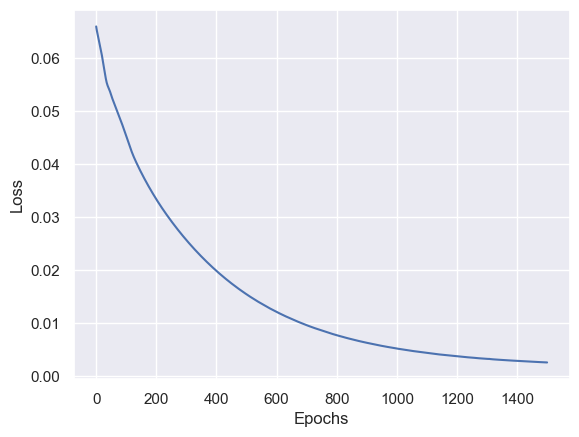

In [101]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

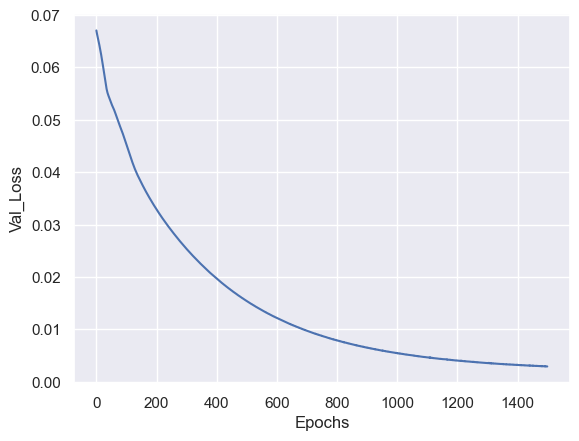

In [102]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [110]:
#modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\SIFE-Giants.h5


In [104]:
predSIFE = modelSIFE.predict(X_test)

10/10 [==============================] - 0s 3ms/step


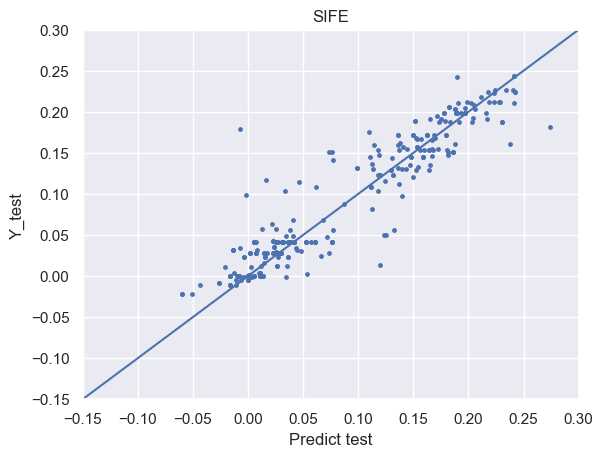

In [105]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [106]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 89.0%


In [107]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [108]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233   
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720   
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996   
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720   
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383   
...                               ...            ...          ...   
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641   
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957   
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390   
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384   
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_SPLUS-n06s42_0022058       0.131211     0.051229      0.236953   
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571   
iDR4_3_STRIPE82-0167_0033162      0.098913     0.104768      0.140248   
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571   
iDR4_3_SPLUS-n07s41_0022767       0.081206     0.131893     -0.011959   
...                                    ...          ...           ...   
iDR4_3_SPLUS-n06s44_0009510       0.108544     0.133245      0.254793   
iDR4_3_STRIPE82-0026_0048087      0.104593     0.090421      0.217234   
iDR4_3_SPLUS-n02s44_0024688       0.136484     0.076320      0.291005   
iDR4_3_SPLUS-n07s41_0022767       0.081197     0.131870     -0.011915   
iDR4_3_STRIPE82-0026_0047943      0.179703     0.020349      0.305486   

                              SIFE_predict  
ID                                          
iDR4_3_SPLUS-n06s42_0022058       0.189094  
iDR4_3_STRIPE82-0028_0025061      0.027876  
iDR4_3_STRIPE82-0167_0033162      0.1

In [109]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [111]:
Parametro = "NIFE"
columnTrain = 'ni_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [112]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s24_0031879    5122.03     3.806   -0.354        0.188   
iDR4_3_STRIPE82-0004_0019072   5094.38     3.691   -0.638        0.192   
iDR4_3_STRIPE82-0026_0054244   4838.35     3.505   -0.198        0.186   
iDR4_3_STRIPE82-0165_0021871   4859.97     2.424   -1.031        0.218   
iDR4_3_SPLUS-n05s43_0036534    5143.71     3.663   -0.258        0.013   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0028_0030694   5057.99     3.501   -0.193        0.032   
iDR4_3_SPLUS-n07s41_0024831    4672.42     2.623   -0.092        0.038   
iDR4_3_STRIPE82-0024_0036201   5079.37     3.763    0.000        0.061   
iDR4_3_SPLUS-s02s24_0026506    5442.52     4.141    0.012        0.015   
iDR4_3_SPLUS-s02s24_0038010    4779.49     2.962   -0.235        0.141   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-s02s24_0031879   0.10084  0.20689 -0.07812  0.27665  0.15107   
iDR4_3_STRIPE82-0004_0019072  0.03439  0.20222 -0.00053  0.30114  0.17203   
iDR4_3_STRIPE82-0026_0054244  0.18391  0.15021  0.03605  0.27655  0.17518   
iDR4_3_STRIPE82-0165_0021871 -0.07760  0.24080 -0.04507  0.23918  0.21801   
iDR4_3_SPLUS-n05s43_0036534   0.03509  0.05763 -0.00453  0.04024 -0.02001   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0028_0030694  0.05036  0.06229 -0.01376  0.07650 -0.00982   
iDR4_3_SPLUS-n07s41_0024831   0.04092  0.02848  0.11089  0.07407  0.03710   
iDR4_3_STRIPE82-0024_0036201  0.10002  0.06828  0.00861  0.11226  0.03774   
iDR4_3_SPLUS-s02s24_0026506   0.02768  0.02782  0.10023  0.06062  0.01539   
iDR4_3_SPLUS-s02s24_0038010   0.11500  0.11762  0.07326  0.21963  0.11944   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-s02s24_0031879   0.07544  
iDR4_3_STRIPE82-0004_0019072  0.05111  
iDR4_3_STRIPE82-0026_0054244  0.09650  
iDR4_3_STRIPE82-0165_0021871  0.03182  
iDR4_3_SPLUS-n05s43_0036534   0.07315  
...                               ...  
iDR4_3_STRIPE82-0028_0030694  0.02279  
iDR4_3_SPLUS-n07s41_0024831   0.01205  
iDR4_3_STRIPE82-0024_0036201  0.03733  
iDR4_3_SPLUS-s02s24_0026506   0.05047  
iDR4_3_SPLUS-s02s24_0038010   0.07581  

[1075 rows x 10 columns]

In [113]:
modelNIFE = baseline_model_teste()

In [114]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.0546 - val_loss: 0.0549 - 557ms/epoch - 557ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0544 - val_loss: 0.0547 - 40ms/epoch - 40ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0542 - val_loss: 0.0545 - 39ms/epoch - 39ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0540 - val_loss: 0.0542 - 36ms/epoch - 36ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0540 - 35ms/epoch - 35ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0535 - val_loss: 0.0538 - 39ms/epoch - 39ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0536 - 36ms/epoch - 36ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0534 - 37ms/epoch - 37ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0529 - val_loss: 0.0531 - 37ms/epoch - 37ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0527 - val_loss: 0.0529 - 39ms/epoch - 39ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0527 - 37ms/epoch - 37ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0525 - 39ms/epoch - 39ms/step
Epoch 13/2000
1/1 - 0s 

Epoch 101/2000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0400 - 39ms/epoch - 39ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0400 - val_loss: 0.0399 - 42ms/epoch - 42ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0398 - val_loss: 0.0398 - 38ms/epoch - 38ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0397 - 47ms/epoch - 47ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0396 - val_loss: 0.0396 - 45ms/epoch - 45ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0395 - val_loss: 0.0395 - 47ms/epoch - 47ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0394 - val_loss: 0.0393 - 41ms/epoch - 41ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0392 - 49ms/epoch - 49ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0391 - 41ms/epoch - 41ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0391 - val_loss: 0.0390 - 40ms/epoch - 40ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0390 - val_loss: 0.0389 - 42ms/epoch - 42ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0388 - 44ms/epoch - 44ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0303 - val_loss: 0.0302 - 42ms/epoch - 42ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0302 - val_loss: 0.0301 - 41ms/epoch - 41ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0301 - val_loss: 0.0300 - 48ms/epoch - 48ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0300 - 41ms/epoch - 41ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0299 - 45ms/epoch - 45ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0298 - 42ms/epoch - 42ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0297 - val_loss: 0.0297 - 47ms/epoch - 47ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0297 - val_loss: 0.0296 - 42ms/epoch - 42ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0296 - val_loss: 0.0295 - 43ms/epoch - 43ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0295 - val_loss: 0.0294 - 42ms/epoch - 42ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0294 - 45ms/epoch - 45ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0293 - 39ms/epoch - 39ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0228 - 43ms/epoch - 43ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0227 - val_loss: 0.0227 - 40ms/epoch - 40ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0227 - val_loss: 0.0227 - 46ms/epoch - 46ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0226 - val_loss: 0.0226 - 42ms/epoch - 42ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0225 - val_loss: 0.0225 - 41ms/epoch - 41ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0225 - val_loss: 0.0225 - 40ms/epoch - 40ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0224 - val_loss: 0.0224 - 43ms/epoch - 43ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0224 - val_loss: 0.0223 - 42ms/epoch - 42ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0223 - val_loss: 0.0223 - 47ms/epoch - 47ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0222 - val_loss: 0.0222 - 42ms/epoch - 42ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0222 - val_loss: 0.0221 - 42ms/epoch - 42ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0221 - val_loss: 0.0221 - 43ms/epoch - 43ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0172 - val_loss: 0.0172 - 52ms/epoch - 52ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0171 - val_loss: 0.0171 - 41ms/epoch - 41ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0171 - val_loss: 0.0171 - 41ms/epoch - 41ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0171 - val_loss: 0.0170 - 43ms/epoch - 43ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0170 - 42ms/epoch - 42ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0169 - 41ms/epoch - 41ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0169 - val_loss: 0.0169 - 43ms/epoch - 43ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0169 - val_loss: 0.0169 - 48ms/epoch - 48ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0168 - 44ms/epoch - 44ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0168 - 40ms/epoch - 40ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0167 - 41ms/epoch - 41ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0167 - 40ms/epoch - 40ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0130 - 47ms/epoch - 47ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0130 - 44ms/epoch - 44ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0129 - 44ms/epoch - 44ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0129 - 43ms/epoch - 43ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0129 - 41ms/epoch - 41ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0128 - 45ms/epoch - 45ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0128 - 41ms/epoch - 41ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 41ms/epoch - 41ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0127 - 46ms/epoch - 46ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0127 - 47ms/epoch - 47ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0127 - 48ms/epoch - 48ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0126 - 43ms/epoch - 43ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0099 - 60ms/epoch - 60ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0098 - 41ms/epoch - 41ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0098 - 43ms/epoch - 43ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0098 - 49ms/epoch - 49ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0098 - 45ms/epoch - 45ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0097 - 48ms/epoch - 48ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0097 - 42ms/epoch - 42ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0097 - 41ms/epoch - 41ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0097 - 43ms/epoch - 43ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0096 - 45ms/epoch - 45ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0096 - 47ms/epoch - 47ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0096 - 43ms/epoch - 43ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0075 - val_loss: 0.0075 - 69ms/epoch - 69ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0075 - 91ms/epoch - 91ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0075 - 43ms/epoch - 43ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0075 - 39ms/epoch - 39ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0074 - 42ms/epoch - 42ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0074 - 41ms/epoch - 41ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0074 - 58ms/epoch - 58ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0074 - 44ms/epoch - 44ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0074 - 103ms/epoch - 103ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0073 - 41ms/epoch - 41ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0073 - 59ms/epoch - 59ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0072 - val_loss: 0.0073 - 52ms/epoch - 52ms/step
Ep

Epoch 794/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0058 - 40ms/epoch - 40ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0058 - 41ms/epoch - 41ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0057 - 51ms/epoch - 51ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0057 - 46ms/epoch - 46ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0057 - 44ms/epoch - 44ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0057 - 42ms/epoch - 42ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0057 - 38ms/epoch - 38ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0057 - 47ms/epoch - 47ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0056 - 44ms/epoch - 44ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0056 - 39ms/epoch - 39ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 43ms/epoch - 43ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 41ms/epoch - 41ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0044 - 70ms/epoch - 70ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0044 - 40ms/epoch - 40ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0044 - 71ms/epoch - 71ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 46ms/epoch - 46ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 68ms/epoch - 68ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 45ms/epoch - 45ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 68ms/epoch - 68ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 46ms/epoch - 46ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0044 - 68ms/epoch - 68ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0043 - 40ms/epoch - 40ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0043 - 70ms/epoch - 70ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0043 - 47ms/epoch - 47ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0035 - 42ms/epoch - 42ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0035 - 44ms/epoch - 44ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0035 - 43ms/epoch - 43ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0034 - 44ms/epoch - 44ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0034 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 42ms/epoch - 42ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 43ms/epoch - 43ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 45ms/epoch - 45ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 44ms/epoch - 44ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0033 - val_loss: 0.0034 - 39ms/epoch - 39ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0027 - val_loss: 0.0027 - 44ms/epoch - 44ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 44ms/epoch - 44ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 46ms/epoch - 46ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 41ms/epoch - 41ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 43ms/epoch - 43ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 40ms/epoch - 40ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 44ms/epoch - 44ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 43ms/epoch - 43ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 40ms/epoch - 40ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 48ms/epoch - 48ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 39ms/epoch - 39ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0026 - val_loss: 0.0027 - 43ms/epoch - 43

Epoch 1188/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 44ms/epoch - 44ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 45ms/epoch - 45ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 42ms/epoch - 42ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 44ms/epoch - 44ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 45ms/epoch - 45ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 43ms/epoch - 43ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 38ms/epoch - 38ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 39ms/epoch - 39ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 41ms/epoch - 41ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 41ms/epoch - 41ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0022 - 45ms/epoch - 45ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0021 - val_loss: 0.0021 - 40ms/epoch - 40

Epoch 1286/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 46ms/epoch - 46ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 43ms/epoch - 43ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 45ms/epoch - 45ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 42ms/epoch - 42ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 39ms/epoch - 39ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 44ms/epoch - 44ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 43ms/epoch - 43ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 40ms/epoch - 40ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 45ms/epoch - 45ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 51ms/epoch - 51ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 44ms/epoch - 44ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0017 - val_loss: 0.0018 - 42ms/epoch - 42

Epoch 1384/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 42ms/epoch - 42ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 46ms/epoch - 46ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 44ms/epoch - 44ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 40ms/epoch - 40ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 42ms/epoch - 42ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 40ms/epoch - 40ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 41ms/epoch - 41ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 43ms/epoch - 43ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 43ms/epoch - 43ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 40ms/epoch - 40ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 40ms/epoch - 40ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0014 - val_loss: 0.0015 - 43ms/epoch - 43

Epoch 1482/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 46ms/epoch - 46ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 43ms/epoch - 43ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 43ms/epoch - 43ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 45ms/epoch - 45ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 43ms/epoch - 43ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 46ms/epoch - 46ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 43ms/epoch - 43ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 43ms/epoch - 43ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 45ms/epoch - 45ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0013 - 40ms/epoch - 40ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0012 - val_loss: 0.0012 - 42ms/epoch - 42ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0011 - val_loss: 0.0012 - 43ms/epoch - 43

Epoch 1580/2000
1/1 - 0s - loss: 0.0010 - val_loss: 0.0011 - 38ms/epoch - 38ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0010 - val_loss: 0.0011 - 36ms/epoch - 36ms/step
Epoch 1582/2000
1/1 - 0s - loss: 9.9893e-04 - val_loss: 0.0011 - 36ms/epoch - 36ms/step
Epoch 1583/2000
1/1 - 0s - loss: 9.9744e-04 - val_loss: 0.0011 - 35ms/epoch - 35ms/step
Epoch 1584/2000
1/1 - 0s - loss: 9.9602e-04 - val_loss: 0.0011 - 39ms/epoch - 39ms/step
Epoch 1585/2000
1/1 - 0s - loss: 9.9469e-04 - val_loss: 0.0011 - 37ms/epoch - 37ms/step
Epoch 1586/2000
1/1 - 0s - loss: 9.9334e-04 - val_loss: 0.0011 - 36ms/epoch - 36ms/step
Epoch 1587/2000
1/1 - 0s - loss: 9.9224e-04 - val_loss: 0.0011 - 37ms/epoch - 37ms/step
Epoch 1588/2000
1/1 - 0s - loss: 9.9103e-04 - val_loss: 0.0011 - 35ms/epoch - 35ms/step
Epoch 1589/2000
1/1 - 0s - loss: 9.8998e-04 - val_loss: 0.0011 - 36ms/epoch - 36ms/step
Epoch 1590/2000
1/1 - 0s - loss: 9.8832e-04 - val_loss: 0.0011 - 35ms/epoch - 35ms/step
Epoch 1591/2000
1/1 - 0s - loss: 9.8675e

Epoch 1673/2000
1/1 - 0s - loss: 8.8286e-04 - val_loss: 9.8306e-04 - 39ms/epoch - 39ms/step
Epoch 1674/2000
1/1 - 0s - loss: 8.8177e-04 - val_loss: 9.8447e-04 - 40ms/epoch - 40ms/step
Epoch 1675/2000
1/1 - 0s - loss: 8.8084e-04 - val_loss: 9.8095e-04 - 39ms/epoch - 39ms/step
Epoch 1676/2000
1/1 - 0s - loss: 8.7960e-04 - val_loss: 9.8203e-04 - 42ms/epoch - 42ms/step
Epoch 1677/2000
1/1 - 0s - loss: 8.7842e-04 - val_loss: 9.7906e-04 - 41ms/epoch - 41ms/step
Epoch 1678/2000
1/1 - 0s - loss: 8.7710e-04 - val_loss: 9.7894e-04 - 41ms/epoch - 41ms/step
Epoch 1679/2000
1/1 - 0s - loss: 8.7583e-04 - val_loss: 9.7717e-04 - 44ms/epoch - 44ms/step
Epoch 1680/2000
1/1 - 0s - loss: 8.7469e-04 - val_loss: 9.7584e-04 - 40ms/epoch - 40ms/step
Epoch 1681/2000
1/1 - 0s - loss: 8.7360e-04 - val_loss: 9.7574e-04 - 63ms/epoch - 63ms/step
Epoch 1682/2000
1/1 - 0s - loss: 8.7265e-04 - val_loss: 9.7333e-04 - 55ms/epoch - 55ms/step
Epoch 1683/2000
1/1 - 0s - loss: 8.7172e-04 - val_loss: 9.7439e-04 - 52ms/epoch 

1/1 - 0s - loss: 7.9578e-04 - val_loss: 8.9785e-04 - 44ms/epoch - 44ms/step
Epoch 1763/2000
1/1 - 0s - loss: 7.9504e-04 - val_loss: 8.9872e-04 - 44ms/epoch - 44ms/step
Epoch 1764/2000
1/1 - 0s - loss: 7.9431e-04 - val_loss: 8.9627e-04 - 108ms/epoch - 108ms/step
Epoch 1765/2000
1/1 - 0s - loss: 7.9349e-04 - val_loss: 8.9741e-04 - 48ms/epoch - 48ms/step
Epoch 1766/2000
1/1 - 0s - loss: 7.9268e-04 - val_loss: 8.9456e-04 - 74ms/epoch - 74ms/step
Epoch 1767/2000
1/1 - 0s - loss: 7.9179e-04 - val_loss: 8.9540e-04 - 45ms/epoch - 45ms/step
Epoch 1768/2000
1/1 - 0s - loss: 7.9081e-04 - val_loss: 8.9327e-04 - 70ms/epoch - 70ms/step
Epoch 1769/2000
1/1 - 0s - loss: 7.8985e-04 - val_loss: 8.9290e-04 - 41ms/epoch - 41ms/step
Epoch 1770/2000
1/1 - 0s - loss: 7.8897e-04 - val_loss: 8.9216e-04 - 69ms/epoch - 69ms/step
Epoch 1771/2000
1/1 - 0s - loss: 7.8813e-04 - val_loss: 8.9092e-04 - 44ms/epoch - 44ms/step
Epoch 1772/2000
1/1 - 0s - loss: 7.8736e-04 - val_loss: 8.9097e-04 - 69ms/epoch - 69ms/step
Ep

Epoch 1852/2000
1/1 - 0s - loss: 7.2915e-04 - val_loss: 8.3260e-04 - 49ms/epoch - 49ms/step
Epoch 1853/2000
1/1 - 0s - loss: 7.2875e-04 - val_loss: 8.3517e-04 - 46ms/epoch - 46ms/step
Epoch 1854/2000
1/1 - 0s - loss: 7.2831e-04 - val_loss: 8.3154e-04 - 44ms/epoch - 44ms/step
Epoch 1855/2000
1/1 - 0s - loss: 7.2760e-04 - val_loss: 8.3367e-04 - 44ms/epoch - 44ms/step
Epoch 1856/2000
1/1 - 0s - loss: 7.2689e-04 - val_loss: 8.3008e-04 - 44ms/epoch - 44ms/step
Epoch 1857/2000
1/1 - 0s - loss: 7.2597e-04 - val_loss: 8.3094e-04 - 42ms/epoch - 42ms/step
Epoch 1858/2000
1/1 - 0s - loss: 7.2507e-04 - val_loss: 8.2925e-04 - 45ms/epoch - 45ms/step
Epoch 1859/2000
1/1 - 0s - loss: 7.2425e-04 - val_loss: 8.2851e-04 - 41ms/epoch - 41ms/step
Epoch 1860/2000
1/1 - 0s - loss: 7.2362e-04 - val_loss: 8.2893e-04 - 41ms/epoch - 41ms/step
Epoch 1861/2000
1/1 - 0s - loss: 7.2311e-04 - val_loss: 8.2709e-04 - 42ms/epoch - 42ms/step
Epoch 1862/2000
1/1 - 0s - loss: 7.2260e-04 - val_loss: 8.2866e-04 - 49ms/epoch 

1/1 - 0s - loss: 6.7840e-04 - val_loss: 7.8485e-04 - 41ms/epoch - 41ms/step
Epoch 1942/2000
1/1 - 0s - loss: 6.7775e-04 - val_loss: 7.8335e-04 - 42ms/epoch - 42ms/step
Epoch 1943/2000
1/1 - 0s - loss: 6.7716e-04 - val_loss: 7.8286e-04 - 41ms/epoch - 41ms/step
Epoch 1944/2000
1/1 - 0s - loss: 6.7662e-04 - val_loss: 7.8299e-04 - 42ms/epoch - 42ms/step
Epoch 1945/2000
1/1 - 0s - loss: 6.7619e-04 - val_loss: 7.8168e-04 - 41ms/epoch - 41ms/step
Epoch 1946/2000
1/1 - 0s - loss: 6.7580e-04 - val_loss: 7.8305e-04 - 44ms/epoch - 44ms/step
Epoch 1947/2000
1/1 - 0s - loss: 6.7547e-04 - val_loss: 7.8080e-04 - 41ms/epoch - 41ms/step
Epoch 1948/2000
1/1 - 0s - loss: 6.7514e-04 - val_loss: 7.8282e-04 - 43ms/epoch - 43ms/step
Epoch 1949/2000
1/1 - 0s - loss: 6.7491e-04 - val_loss: 7.7980e-04 - 43ms/epoch - 43ms/step
Epoch 1950/2000
1/1 - 0s - loss: 6.7450e-04 - val_loss: 7.8217e-04 - 66ms/epoch - 66ms/step
Epoch 1951/2000
1/1 - 0s - loss: 6.7414e-04 - val_loss: 7.7880e-04 - 40ms/epoch - 40ms/step
Epoc

Text(0, 0.5, 'Loss')

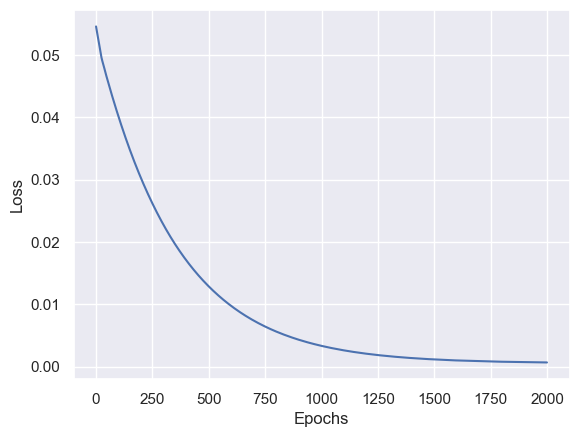

In [115]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

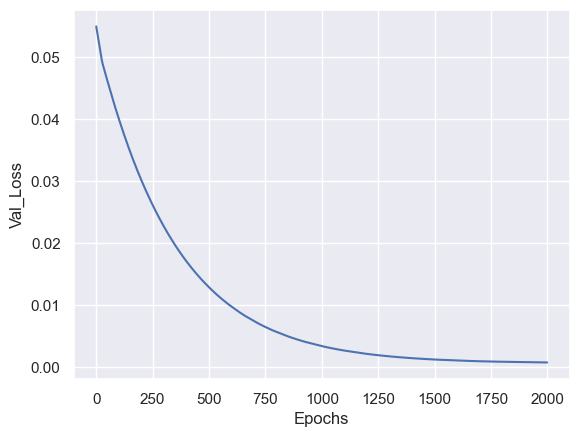

In [116]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [119]:
#modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NIFE-Giants.h5


In [118]:
predNIFE = modelNIFE.predict(X_test)

10/10 [==============================] - 0s 12ms/step


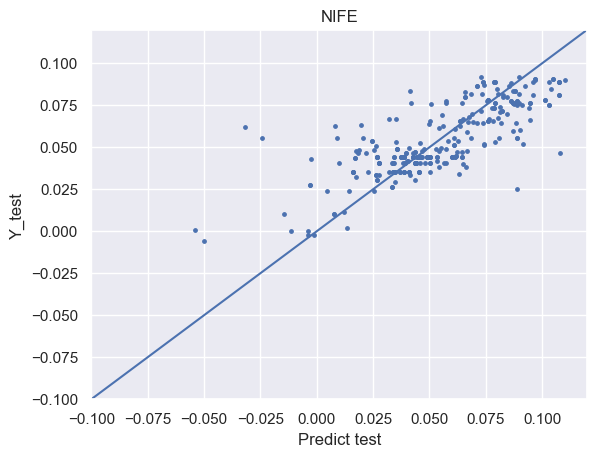

In [120]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [121]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 61.0%


In [122]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [123]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s42_0022058    4824.60     2.561   -0.293        0.156   
iDR4_3_STRIPE82-0028_0025061   5033.42     3.213   -0.350        0.059   
iDR4_3_STRIPE82-0167_0033162   4585.33     1.955   -0.815        0.130   
iDR4_3_STRIPE82-0028_0025061   5056.66     3.308   -0.261        0.046   
iDR4_3_SPLUS-n07s41_0022767    4638.60     3.481   -0.254        0.010   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n06s44_0009510    4411.55     1.769   -0.501        0.183   
iDR4_3_STRIPE82-0026_0048087   4816.33     3.012   -0.245        0.105   
iDR4_3_SPLUS-n02s44_0024688    4871.33     2.291   -0.412        0.208   
iDR4_3_SPLUS-n07s41_0022767    4617.24     3.440   -0.186        0.016   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s42_0022058   0.11425  0.10480  0.08124  0.21853  0.15192   
iDR4_3_STRIPE82-0028_0025061  0.04974  0.08776  0.00549  0.10387  0.03021   
iDR4_3_STRIPE82-0167_0033162 -0.01959  0.10976  0.09668  0.16227  0.14008   
iDR4_3_STRIPE82-0028_0025061  0.04874  0.05362  0.06369  0.08309  0.02243   
iDR4_3_SPLUS-n07s41_0022767  -0.08263  0.08893  0.06821 -0.06202 -0.04386   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n06s44_0009510   0.13241  0.10499  0.15946  0.26595  0.18310   
iDR4_3_STRIPE82-0026_0048087  0.09764  0.09881  0.02854  0.16936  0.07633   
iDR4_3_SPLUS-n02s44_0024688   0.20057  0.12827  0.08183  0.28185  0.22803   
iDR4_3_SPLUS-n07s41_0022767  -0.05765  0.08610  0.11474  0.01119 -0.01664   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n06s42_0022058   0.07092       0.177920     0.148233   
iDR4_3_STRIPE82-0028_0025061  0.04384       0.046235     0.047720   
iDR4_3_STRIPE82-0167_0033162  0.01426       0.113509    -0.045996   
iDR4_3_STRIPE82-0028_0025061  0.03904       0.046235     0.047720   
iDR4_3_SPLUS-n07s41_0022767  -0.00385       0.008557    -0.073383   
...                               ...            ...          ...   
iDR4_3_SPLUS-n06s44_0009510   0.06952       0.181954     0.132641   
iDR4_3_STRIPE82-0026_0048087  0.06462       0.152929     0.150957   
iDR4_3_SPLUS-n02s44_0024688   0.08988       0.197680     0.197390   
iDR4_3_SPLUS-n07s41_0022767  -0.00128       0.008554    -0.073384   
iDR4_3_STRIPE82-0026_0047943  0.10320       0.216392     0.160377   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_SPLUS-n06s42_0022058       0.131211     0.051229      0.236953   
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571   
iDR4_3_STRIPE82-0167_0033162      0.098913     0.104768      0.140248   
iDR4_3_STRIPE82-0028_0025061      0.077774     0.015333      0.086571   
iDR4_3_SPLUS-n07s41_0022767       0.081206     0.131893     -0.011959   
...                                    ...          ...           ...   
iDR4_3_SPLUS-n06s44_0009510       0.108544     0.133245      0.254793   
iDR4_3_STRIPE82-0026_0048087      0.104593     0.090421      0.217234   
iDR4_3_SPLUS-n02s44_0024688       0.136484     0.076320      0.291005   
iDR4_3_SPLUS-n07s41_0022767       0.081197     0.131870     -0.011915   
iDR4_3_STRIPE82-0026_0047943      0.179703     0.020349      0.305486   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_SPLUS-n06s42_0022058       0.189094      0.086175  
iDR4_3_STRIPE82-0028_0025061      0.0278

In [124]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")